# MJO Activity Analysis 

The model used is the eighty CESM2 with the radiative forcing under SSP370, which is one of the highest forcing scenarios for CMIP6 (Riahi et al. 2017; Rodgers et al. 2021). The dataset analyzes changes in SST warming patterns and precipitation in 80 ensemble members from the CESM2 LENS. The base historical state to assess SST and precipitation changes into the future is the ensemble mean from 1985-2005. MJO activity can be diagnosed using various variables including precipitation, net outgoing longwave
radiation (OLR), and upper level and lower level zonal winds (Madden and Julian 1994; Wheeler and Kiladis 1999). MJO activity and its changes in this investigation are defined using precipitation and 850 mb zonal wind. MJO variability is isolated by detrending the data in individual variables, removing the seasonal cycle, and applying a frequency-wavenumber bandpass filter to the dataset (Madden and Julian 1994; Wheeler and Kiladis 1999). The data is detrended by least squared regression fit. The frequency-wavenumber domain shows a strong MJO signal for 30-90 days frequency, 1-5 zonal wavenumber (k) (Wheeler and Kiladis 1999). MJO signals in precipitation and 850 mb zonal wind are isolated by a bandpass filter for this region of the frequency-wavenumber domain (Bingham et al. 1967). The standard deviation of this filtered precipitation and zonal wind dataset defines MJO amplitude, or activity, for the investigation. Since the MJO propagates eastward over the Tropics, the investigation evaluates MJO amplitude change domain over the entire tropics (15°S - 15°N). The investigation first evaluates ensemble mean MJO amplitude change through the filtered precipitation and zonal wind at 850 mb relative to 1985-2005 for future 20 year periods of the 21st century. Standardized MJO amplitude changes are also examined,defined by the percentage change (3.1) in continuous 20-year decadal periods: 2021-2040,
2041-2060, 2061-2080, and 2081-2100 relative to the historical period, consistent with Bui and Maloney (2018). The investigation then evaluates scatterplots of each ensemble member’s MJO amplitude change versus degree of east Pacific warming defined byNiño3.4 for each 20-year period. Pearson’s correlation is used to measure the strength and direction of the linear covariance between the two variables, in this case, SST Niño3.4 change and MJO amplitude change over the tropics for individual ensemble members. Maps of SST change for the 33% of ensemble members with biggest MJO amplitude increases (MJO
plus) minus the bottom 33% (MJO minus) is useful to assess how the SST change pattern differs between these, for direct comparison with Takahashi et al. (2011). A two-tailed t-test is also applied to assess the significance difference between the MJO plus and MJO minus maps for each 20-year decadal period. This method is also applied for projected precipitable water (TMQ) pattern change for MJO plus and minus ensemble members (Wheeler and Hendon 2004; Gottschalck 2014; Bui and Maloney 2018). A more detailed analysis of TMQ meridional gradient changes and vertical humidity profile change for these members is also conducted. The TMQ meridional gradient change for the western and central Pacific is isolated (140°E to 150°W and 10°S to 10°N), as this region sees the most prominent TMQ change for the ensemble members with the strongest increase in MJO activity, and the meridional gradient in this region is likely important for influencing MJO propagation across the Pacific in a warmer climate. Scatterplots of meridional moisture gradient change and lower tropospheric humidity change versus MJO amplitude change across ensemble members are also assessed. Significance testing on the correlation coefficients is also conducted.

# Crop, Detrend, Remove Seasonal Cycle, and Bandpass Filer

Repeat this step for all number of ensemble members (in this case 80 Ensemble Members)

In [1]:
#Import Packages
import numpy as np
import numpy.ma as ma
import pandas as pd
import xarray as xr
import scipy as sp
from scipy import signal
from scipy import signal,fftpack, interpolate
from scipy.interpolate import griddata
import metpy as mp
from datetime import datetime
import calendar
import math

## Unsmoothed Data 

In [2]:
#Parameters change
NCAR_Group='1001'
NCAR_Ensemble='E1'
NCAR_ENumb='001'
Var_or_int='TMQ'
Var_or_int_='SHQ'

#Ensemble Member for Precipitation
PRCE1_1= xr.open_dataset('DATA/'+str(NCAR_Ensemble)+'PRC/b.e21.BHISTcmip6.f09_g17.LE2-'+str(NCAR_Group)+'.'+str(NCAR_ENumb)+'.cam.h1.PRECT.19800101-19891231.nc')
PRCE1_2= xr.open_dataset('DATA/'+str(NCAR_Ensemble)+'PRC/b.e21.BHISTcmip6.f09_g17.LE2-'+str(NCAR_Group)+'.'+str(NCAR_ENumb)+'.cam.h1.PRECT.19900101-19991231.nc')
PRCE1_3= xr.open_dataset('DATA/'+str(NCAR_Ensemble)+'PRC/b.e21.BHISTcmip6.f09_g17.LE2-'+str(NCAR_Group)+'.'+str(NCAR_ENumb)+'.cam.h1.PRECT.20000101-20091231.nc')
PRCE1_4= xr.open_dataset('DATA/'+str(NCAR_Ensemble)+'PRC/b.e21.BSSP370cmip6.f09_g17.LE2-'+str(NCAR_Group)+'.'+str(NCAR_ENumb)+'.cam.h1.PRECT.20150101-20241231.nc')
PRCE1_5= xr.open_dataset('DATA/'+str(NCAR_Ensemble)+'PRC/b.e21.BSSP370cmip6.f09_g17.LE2-'+str(NCAR_Group)+'.'+str(NCAR_ENumb)+'.cam.h1.PRECT.20250101-20341231.nc')
PRCE1_6= xr.open_dataset('DATA/'+str(NCAR_Ensemble)+'PRC/b.e21.BSSP370cmip6.f09_g17.LE2-'+str(NCAR_Group)+'.'+str(NCAR_ENumb)+'.cam.h1.PRECT.20350101-20441231.nc')
PRCE1_7= xr.open_dataset('DATA/'+str(NCAR_Ensemble)+'PRC/b.e21.BSSP370cmip6.f09_g17.LE2-'+str(NCAR_Group)+'.'+str(NCAR_ENumb)+'.cam.h1.PRECT.20450101-20541231.nc')
PRCE1_8= xr.open_dataset('DATA/'+str(NCAR_Ensemble)+'PRC/b.e21.BSSP370cmip6.f09_g17.LE2-'+str(NCAR_Group)+'.'+str(NCAR_ENumb)+'.cam.h1.PRECT.20550101-20641231.nc')
PRCE1_9= xr.open_dataset('DATA/'+str(NCAR_Ensemble)+'PRC/b.e21.BSSP370cmip6.f09_g17.LE2-'+str(NCAR_Group)+'.'+str(NCAR_ENumb)+'.cam.h1.PRECT.20650101-20741231.nc')
PRCE1_10= xr.open_dataset('DATA/'+str(NCAR_Ensemble)+'PRC/b.e21.BSSP370cmip6.f09_g17.LE2-'+str(NCAR_Group)+'.'+str(NCAR_ENumb)+'.cam.h1.PRECT.20750101-20841231.nc')
PRCE1_11= xr.open_dataset('DATA/'+str(NCAR_Ensemble)+'PRC/b.e21.BSSP370cmip6.f09_g17.LE2-'+str(NCAR_Group)+'.'+str(NCAR_ENumb)+'.cam.h1.PRECT.20850101-20941231.nc')
PRCE1_12= xr.open_dataset('DATA/'+str(NCAR_Ensemble)+'PRC/b.e21.BSSP370cmip6.f09_g17.LE2-'+str(NCAR_Group)+'.'+str(NCAR_ENumb)+'.cam.h1.PRECT.20950101-21001231.nc')

#Crop Data base on 30 deg S and 30 deg N
PRCE1_1 =PRCE1_1.PRECT.loc[dict(lat=slice(-30,30))]
PRCE1_2=PRCE1_2.PRECT.loc[dict(lat=slice(-30,30))]
PRCE1_3=PRCE1_3.PRECT.loc[dict(lat=slice(-30,30))]
PRCE1_4=PRCE1_4.PRECT.loc[dict(lat=slice(-30,30))]
PRCE1_5=PRCE1_5.PRECT.loc[dict(lat=slice(-30,30))]
PRCE1_6=PRCE1_6.PRECT.loc[dict(lat=slice(-30,30))]
PRCE1_7=PRCE1_7.PRECT.loc[dict(lat=slice(-30,30))]
PRCE1_8=PRCE1_8.PRECT.loc[dict(lat=slice(-30,30))]
PRCE1_9=PRCE1_9.PRECT.loc[dict(lat=slice(-30,30))]
PRCE1_10=PRCE1_10.PRECT.loc[dict(lat=slice(-30,30))]
PRCE1_11=PRCE1_11.PRECT.loc[dict(lat=slice(-30,30))]
PRCE1_12=PRCE1_12.PRECT.loc[dict(lat=slice(-30,30))]

#Put data together on the same array
PRCE1= xr.concat([PRCE1_1,PRCE1_2,PRCE1_3,PRCE1_4,PRCE1_5,PRCE1_6,PRCE1_7,PRCE1_8,PRCE1_9,PRCE1_10,PRCE1_11,PRCE1_12], dim = "y")
PRCE1=PRCE1.mean(["y"])

#Ensemble Member for Zonal winds at 850 mb
U850E1_1= xr.open_dataset('DATA/'+str(NCAR_Ensemble)+'U850/b.e21.BHISTcmip6.f09_g17.LE2-'+str(NCAR_Group)+'.'+str(NCAR_ENumb)+'.cam.h1.U850.19800101-19891231.nc')
U850E1_2= xr.open_dataset('DATA/'+str(NCAR_Ensemble)+'U850/b.e21.BHISTcmip6.f09_g17.LE2-'+str(NCAR_Group)+'.'+str(NCAR_ENumb)+'.cam.h1.U850.19900101-19991231.nc')
U850E1_3= xr.open_dataset('DATA/'+str(NCAR_Ensemble)+'U850/b.e21.BHISTcmip6.f09_g17.LE2-'+str(NCAR_Group)+'.'+str(NCAR_ENumb)+'.cam.h1.U850.20000101-20091231.nc')
U850E1_4= xr.open_dataset('DATA/'+str(NCAR_Ensemble)+'U850/b.e21.BSSP370cmip6.f09_g17.LE2-'+str(NCAR_Group)+'.'+str(NCAR_ENumb)+'.cam.h1.U850.20150101-20241231.nc')
U850E1_5= xr.open_dataset('DATA/'+str(NCAR_Ensemble)+'U850/b.e21.BSSP370cmip6.f09_g17.LE2-'+str(NCAR_Group)+'.'+str(NCAR_ENumb)+'.cam.h1.U850.20250101-20341231.nc')
U850E1_6= xr.open_dataset('DATA/'+str(NCAR_Ensemble)+'U850/b.e21.BSSP370cmip6.f09_g17.LE2-'+str(NCAR_Group)+'.'+str(NCAR_ENumb)+'.cam.h1.U850.20350101-20441231.nc')
U850E1_7= xr.open_dataset('DATA/'+str(NCAR_Ensemble)+'U850/b.e21.BSSP370cmip6.f09_g17.LE2-'+str(NCAR_Group)+'.'+str(NCAR_ENumb)+'.cam.h1.U850.20450101-20541231.nc')
U850E1_8= xr.open_dataset('DATA/'+str(NCAR_Ensemble)+'U850/b.e21.BSSP370cmip6.f09_g17.LE2-'+str(NCAR_Group)+'.'+str(NCAR_ENumb)+'.cam.h1.U850.20550101-20641231.nc')
U850E1_9= xr.open_dataset('DATA/'+str(NCAR_Ensemble)+'U850/b.e21.BSSP370cmip6.f09_g17.LE2-'+str(NCAR_Group)+'.'+str(NCAR_ENumb)+'.cam.h1.U850.20650101-20741231.nc')
U850E1_10= xr.open_dataset('DATA/'+str(NCAR_Ensemble)+'U850/b.e21.BSSP370cmip6.f09_g17.LE2-'+str(NCAR_Group)+'.'+str(NCAR_ENumb)+'.cam.h1.U850.20750101-20841231.nc')
U850E1_11= xr.open_dataset('DATA/'+str(NCAR_Ensemble)+'U850/b.e21.BSSP370cmip6.f09_g17.LE2-'+str(NCAR_Group)+'.'+str(NCAR_ENumb)+'.cam.h1.U850.20850101-20941231.nc')
U850E1_12= xr.open_dataset('DATA/'+str(NCAR_Ensemble)+'U850/b.e21.BSSP370cmip6.f09_g17.LE2-'+str(NCAR_Group)+'.'+str(NCAR_ENumb)+'.cam.h1.U850.20950101-21001231.nc')

#Crop Data base on 30 deg S and 30 deg N
U850E1_1=U850E1_1.U850.loc[dict(lat=slice(-30,30))]
U850E1_2=U850E1_2.U850.loc[dict(lat=slice(-30,30))]
U850E1_3=U850E1_3.U850.loc[dict(lat=slice(-30,30))]
U850E1_4=U850E1_4.U850.loc[dict(lat=slice(-30,30))]
U850E1_5=U850E1_5.U850.loc[dict(lat=slice(-30,30))]
U850E1_6=U850E1_6.U850.loc[dict(lat=slice(-30,30))]
U850E1_7=U850E1_7.U850.loc[dict(lat=slice(-30,30))]
U850E1_8=U850E1_8.U850.loc[dict(lat=slice(-30,30))]
U850E1_9=U850E1_9.U850.loc[dict(lat=slice(-30,30))]
U850E1_10=U850E1_10.U850.loc[dict(lat=slice(-30,30))]
U850E1_11=U850E1_11.U850.loc[dict(lat=slice(-30,30))]
U850E1_12=U850E1_12.U850.loc[dict(lat=slice(-30,30))]

#Put data together on the same array
U850E1= xr.concat([U850E1_1,U850E1_2,U850E1_3,U850E1_4,U850E1_5,U850E1_6,U850E1_7,U850E1_8,U850E1_9,U850E1_10,U850E1_11,U850E1_12], dim = "y")
U850E1=U850E1.mean(["y"])

#Ensemble Member for Sea Surface Temperatures
SSTE1_1= xr.open_dataset('DATASST/'+str(NCAR_Ensemble)+'SST/b.e21.BHISTcmip6.f09_g17.LE2-'+str(NCAR_Group)+'.'+str(NCAR_ENumb)+'.cam.h0.TS.198001-198912.nc')
SSTE1_2= xr.open_dataset('DATASST/'+str(NCAR_Ensemble)+'SST/b.e21.BHISTcmip6.f09_g17.LE2-'+str(NCAR_Group)+'.'+str(NCAR_ENumb)+'.cam.h0.TS.199001-199912.nc')
SSTE1_3= xr.open_dataset('DATASST/'+str(NCAR_Ensemble)+'SST/b.e21.BHISTcmip6.f09_g17.LE2-'+str(NCAR_Group)+'.'+str(NCAR_ENumb)+'.cam.h0.TS.200001-200912.nc')
SSTE1_4= xr.open_dataset('DATASST/'+str(NCAR_Ensemble)+'SST/b.e21.BSSP370cmip6.f09_g17.LE2-'+str(NCAR_Group)+'.'+str(NCAR_ENumb)+'.cam.h0.TS.201501-202412.nc')
SSTE1_5= xr.open_dataset('DATASST/'+str(NCAR_Ensemble)+'SST/b.e21.BSSP370cmip6.f09_g17.LE2-'+str(NCAR_Group)+'.'+str(NCAR_ENumb)+'.cam.h0.TS.202501-203412.nc')
SSTE1_6= xr.open_dataset('DATASST/'+str(NCAR_Ensemble)+'SST/b.e21.BSSP370cmip6.f09_g17.LE2-'+str(NCAR_Group)+'.'+str(NCAR_ENumb)+'.cam.h0.TS.203501-204412.nc')
SSTE1_7= xr.open_dataset('DATASST/'+str(NCAR_Ensemble)+'SST/b.e21.BSSP370cmip6.f09_g17.LE2-'+str(NCAR_Group)+'.'+str(NCAR_ENumb)+'.cam.h0.TS.204501-205412.nc')
SSTE1_8= xr.open_dataset('DATASST/'+str(NCAR_Ensemble)+'SST/b.e21.BSSP370cmip6.f09_g17.LE2-'+str(NCAR_Group)+'.'+str(NCAR_ENumb)+'.cam.h0.TS.205501-206412.nc')
SSTE1_9= xr.open_dataset('DATASST/'+str(NCAR_Ensemble)+'SST/b.e21.BSSP370cmip6.f09_g17.LE2-'+str(NCAR_Group)+'.'+str(NCAR_ENumb)+'.cam.h0.TS.206501-207412.nc')
SSTE1_10= xr.open_dataset('DATASST/'+str(NCAR_Ensemble)+'SST/b.e21.BSSP370cmip6.f09_g17.LE2-'+str(NCAR_Group)+'.'+str(NCAR_ENumb)+'.cam.h0.TS.207501-208412.nc')
SSTE1_11= xr.open_dataset('DATASST/'+str(NCAR_Ensemble)+'SST/b.e21.BSSP370cmip6.f09_g17.LE2-'+str(NCAR_Group)+'.'+str(NCAR_ENumb)+'.cam.h0.TS.208501-209412.nc')
SSTE1_12= xr.open_dataset('DATASST/'+str(NCAR_Ensemble)+'SST/b.e21.BSSP370cmip6.f09_g17.LE2-'+str(NCAR_Group)+'.'+str(NCAR_ENumb)+'.cam.h0.TS.209501-210012.nc')

#Crop Data base on 30 deg S and 30 deg N
SSTE1_1 =SSTE1_1.TS.loc[dict(lat=slice(-30,30))]
SSTE1_2=SSTE1_2.TS.loc[dict(lat=slice(-30,30))]
SSTE1_3=SSTE1_3.TS.loc[dict(lat=slice(-30,30))]
SSTE1_4=SSTE1_4.TS.loc[dict(lat=slice(-30,30))]
SSTE1_5=SSTE1_5.TS.loc[dict(lat=slice(-30,30))]
SSTE1_6=SSTE1_6.TS.loc[dict(lat=slice(-30,30))]
SSTE1_7=SSTE1_7.TS.loc[dict(lat=slice(-30,30))]
SSTE1_8=SSTE1_8.TS.loc[dict(lat=slice(-30,30))]
SSTE1_9=SSTE1_9.TS.loc[dict(lat=slice(-30,30))]
SSTE1_10=SSTE1_10.TS.loc[dict(lat=slice(-30,30))]
SSTE1_11=SSTE1_11.TS.loc[dict(lat=slice(-30,30))]
SSTE1_12=SSTE1_12.TS.loc[dict(lat=slice(-30,30))]

#Put data together on the same array
SSTE1= xr.concat([SSTE1_1,SSTE1_2,SSTE1_3,SSTE1_4,SSTE1_5,SSTE1_6,SSTE1_7,SSTE1_8,SSTE1_9,SSTE1_10,SSTE1_11,SSTE1_12], dim = "y")
SSTE1=SSTE1.mean(["y"])

#Ensemble Member for Preciptable Water
VOIE1_1= xr.open_dataset('DATA'+str(Var_or_int)+'/'+str(NCAR_Ensemble)+''+str(Var_or_int)+'/b.e21.BHISTcmip6.f09_g17.LE2-'+str(NCAR_Group)+'.'+str(NCAR_ENumb)+'.cam.h0.'+str(Var_or_int)+'.198001-198912.nc')
VOIE1_2= xr.open_dataset('DATA'+str(Var_or_int)+'/'+str(NCAR_Ensemble)+''+str(Var_or_int)+'/b.e21.BHISTcmip6.f09_g17.LE2-'+str(NCAR_Group)+'.'+str(NCAR_ENumb)+'.cam.h0.'+str(Var_or_int)+'.199001-199912.nc')
VOIE1_3= xr.open_dataset('DATA'+str(Var_or_int)+'/'+str(NCAR_Ensemble)+''+str(Var_or_int)+'/b.e21.BHISTcmip6.f09_g17.LE2-'+str(NCAR_Group)+'.'+str(NCAR_ENumb)+'.cam.h0.'+str(Var_or_int)+'.200001-200912.nc')
VOIE1_4= xr.open_dataset('DATA'+str(Var_or_int)+'/'+str(NCAR_Ensemble)+''+str(Var_or_int)+'/b.e21.BSSP370cmip6.f09_g17.LE2-'+str(NCAR_Group)+'.'+str(NCAR_ENumb)+'.cam.h0.'+str(Var_or_int)+'.201501-202412.nc')
VOIE1_5= xr.open_dataset('DATA'+str(Var_or_int)+'/'+str(NCAR_Ensemble)+''+str(Var_or_int)+'/b.e21.BSSP370cmip6.f09_g17.LE2-'+str(NCAR_Group)+'.'+str(NCAR_ENumb)+'.cam.h0.'+str(Var_or_int)+'.202501-203412.nc')
VOIE1_6= xr.open_dataset('DATA'+str(Var_or_int)+'/'+str(NCAR_Ensemble)+''+str(Var_or_int)+'/b.e21.BSSP370cmip6.f09_g17.LE2-'+str(NCAR_Group)+'.'+str(NCAR_ENumb)+'.cam.h0.'+str(Var_or_int)+'.203501-204412.nc')
VOIE1_7= xr.open_dataset('DATA'+str(Var_or_int)+'/'+str(NCAR_Ensemble)+''+str(Var_or_int)+'/b.e21.BSSP370cmip6.f09_g17.LE2-'+str(NCAR_Group)+'.'+str(NCAR_ENumb)+'.cam.h0.'+str(Var_or_int)+'.204501-205412.nc')
VOIE1_8= xr.open_dataset('DATA'+str(Var_or_int)+'/'+str(NCAR_Ensemble)+''+str(Var_or_int)+'/b.e21.BSSP370cmip6.f09_g17.LE2-'+str(NCAR_Group)+'.'+str(NCAR_ENumb)+'.cam.h0.'+str(Var_or_int)+'.205501-206412.nc')
VOIE1_9= xr.open_dataset('DATA'+str(Var_or_int)+'/'+str(NCAR_Ensemble)+''+str(Var_or_int)+'/b.e21.BSSP370cmip6.f09_g17.LE2-'+str(NCAR_Group)+'.'+str(NCAR_ENumb)+'.cam.h0.'+str(Var_or_int)+'.206501-207412.nc')
VOIE1_10= xr.open_dataset('DATA'+str(Var_or_int)+'/'+str(NCAR_Ensemble)+''+str(Var_or_int)+'/b.e21.BSSP370cmip6.f09_g17.LE2-'+str(NCAR_Group)+'.'+str(NCAR_ENumb)+'.cam.h0.'+str(Var_or_int)+'.207501-208412.nc')
VOIE1_11= xr.open_dataset('DATA'+str(Var_or_int)+'/'+str(NCAR_Ensemble)+''+str(Var_or_int)+'/b.e21.BSSP370cmip6.f09_g17.LE2-'+str(NCAR_Group)+'.'+str(NCAR_ENumb)+'.cam.h0.'+str(Var_or_int)+'.208501-209412.nc')
VOIE1_12= xr.open_dataset('DATA'+str(Var_or_int)+'/'+str(NCAR_Ensemble)+''+str(Var_or_int)+'/b.e21.BSSP370cmip6.f09_g17.LE2-'+str(NCAR_Group)+'.'+str(NCAR_ENumb)+'.cam.h0.'+str(Var_or_int)+'.209501-210012.nc')

#Crop Data base on 30 deg S and 30 deg N
VOIE1_1 =VOIE1_1.data_vars[Var_or_int].loc[dict(lat=slice(-30,30))]
VOIE1_2=VOIE1_2.data_vars[Var_or_int].loc[dict(lat=slice(-30,30))]
VOIE1_3=VOIE1_3.data_vars[Var_or_int].loc[dict(lat=slice(-30,30))]
VOIE1_4=VOIE1_4.data_vars[Var_or_int].loc[dict(lat=slice(-30,30))]
VOIE1_5=VOIE1_5.data_vars[Var_or_int].loc[dict(lat=slice(-30,30))]
VOIE1_6=VOIE1_6.data_vars[Var_or_int].loc[dict(lat=slice(-30,30))]
VOIE1_7=VOIE1_7.data_vars[Var_or_int].loc[dict(lat=slice(-30,30))]
VOIE1_8=VOIE1_8.data_vars[Var_or_int].loc[dict(lat=slice(-30,30))]
VOIE1_9=VOIE1_9.data_vars[Var_or_int].loc[dict(lat=slice(-30,30))]
VOIE1_10=VOIE1_10.data_vars[Var_or_int].loc[dict(lat=slice(-30,30))]
VOIE1_11=VOIE1_11.data_vars[Var_or_int].loc[dict(lat=slice(-30,30))]
VOIE1_12=VOIE1_12.data_vars[Var_or_int].loc[dict(lat=slice(-30,30))]

#Put data together on the same array
VOIE1= xr.concat([VOIE1_1,VOIE1_2,VOIE1_3,VOIE1_4,VOIE1_5,VOIE1_6,VOIE1_7,VOIE1_8,VOIE1_9,VOIE1_10,VOIE1_11,VOIE1_12], dim = "y")
VOIE1=VOIE1.mean(["y"])

#Ensemble Member for Specific Humidity Profile
SHQE1_1= xr.open_dataset('DATA'+str(Var_or_int_)+'/'+str(NCAR_Ensemble)+''+str(Var_or_int_)+'/b.e21.BHISTcmip6.f09_g17.LE2-'+str(NCAR_Group)+'.'+str(NCAR_ENumb)+'.cam.h0.'+str(Var_or_int_)+'.198001-198912.nc')
SHQE1_2= xr.open_dataset('DATA'+str(Var_or_int_)+'/'+str(NCAR_Ensemble)+''+str(Var_or_int_)+'/b.e21.BHISTcmip6.f09_g17.LE2-'+str(NCAR_Group)+'.'+str(NCAR_ENumb)+'.cam.h0.'+str(Var_or_int_)+'.199001-199912.nc')
SHQE1_3= xr.open_dataset('DATA'+str(Var_or_int_)+'/'+str(NCAR_Ensemble)+''+str(Var_or_int_)+'/b.e21.BHISTcmip6.f09_g17.LE2-'+str(NCAR_Group)+'.'+str(NCAR_ENumb)+'.cam.h0.'+str(Var_or_int_)+'.200001-200912.nc')
SHQE1_4= xr.open_dataset('DATA'+str(Var_or_int_)+'/'+str(NCAR_Ensemble)+''+str(Var_or_int_)+'/b.e21.BSSP370cmip6.f09_g17.LE2-'+str(NCAR_Group)+'.'+str(NCAR_ENumb)+'.cam.h0.'+str(Var_or_int_)+'.201501-202412.nc')
SHQE1_5= xr.open_dataset('DATA'+str(Var_or_int_)+'/'+str(NCAR_Ensemble)+''+str(Var_or_int_)+'/b.e21.BSSP370cmip6.f09_g17.LE2-'+str(NCAR_Group)+'.'+str(NCAR_ENumb)+'.cam.h0.'+str(Var_or_int_)+'.202501-203412.nc')
SHQE1_6= xr.open_dataset('DATA'+str(Var_or_int_)+'/'+str(NCAR_Ensemble)+''+str(Var_or_int_)+'/b.e21.BSSP370cmip6.f09_g17.LE2-'+str(NCAR_Group)+'.'+str(NCAR_ENumb)+'.cam.h0.'+str(Var_or_int_)+'.203501-204412.nc')
SHQE1_7= xr.open_dataset('DATA'+str(Var_or_int_)+'/'+str(NCAR_Ensemble)+''+str(Var_or_int_)+'/b.e21.BSSP370cmip6.f09_g17.LE2-'+str(NCAR_Group)+'.'+str(NCAR_ENumb)+'.cam.h0.'+str(Var_or_int_)+'.204501-205412.nc')
SHQE1_8= xr.open_dataset('DATA'+str(Var_or_int_)+'/'+str(NCAR_Ensemble)+''+str(Var_or_int_)+'/b.e21.BSSP370cmip6.f09_g17.LE2-'+str(NCAR_Group)+'.'+str(NCAR_ENumb)+'.cam.h0.'+str(Var_or_int_)+'.205501-206412.nc')
SHQE1_9= xr.open_dataset('DATA'+str(Var_or_int_)+'/'+str(NCAR_Ensemble)+''+str(Var_or_int_)+'/b.e21.BSSP370cmip6.f09_g17.LE2-'+str(NCAR_Group)+'.'+str(NCAR_ENumb)+'.cam.h0.'+str(Var_or_int_)+'.206501-207412.nc')
SHQE1_10= xr.open_dataset('DATA'+str(Var_or_int_)+'/'+str(NCAR_Ensemble)+''+str(Var_or_int_)+'/b.e21.BSSP370cmip6.f09_g17.LE2-'+str(NCAR_Group)+'.'+str(NCAR_ENumb)+'.cam.h0.'+str(Var_or_int_)+'.207501-208412.nc')
SHQE1_11= xr.open_dataset('DATA'+str(Var_or_int_)+'/'+str(NCAR_Ensemble)+''+str(Var_or_int_)+'/b.e21.BSSP370cmip6.f09_g17.LE2-'+str(NCAR_Group)+'.'+str(NCAR_ENumb)+'.cam.h0.'+str(Var_or_int_)+'.208501-209412.nc')
SHQE1_12= xr.open_dataset('DATA'+str(Var_or_int_)+'/'+str(NCAR_Ensemble)+''+str(Var_or_int_)+'/b.e21.BSSP370cmip6.f09_g17.LE2-'+str(NCAR_Group)+'.'+str(NCAR_ENumb)+'.cam.h0.'+str(Var_or_int_)+'.209501-210012.nc')

#Crop Data base on 30 deg S and 30 deg N
SHQE1_1 =SHQE1_1.data_vars[Var_or_int_].loc[dict(lat=slice(-30,30))]
SHQE1_2=SHQE1_2.data_vars[Var_or_int_].loc[dict(lat=slice(-30,30))]
SHQE1_3=SHQE1_3.data_vars[Var_or_int_].loc[dict(lat=slice(-30,30))]
SHQE1_4=SHQE1_4.data_vars[Var_or_int_].loc[dict(lat=slice(-30,30))]
SHQE1_5=SHQE1_5.data_vars[Var_or_int_].loc[dict(lat=slice(-30,30))]
SHQE1_6=SHQE1_6.data_vars[Var_or_int_].loc[dict(lat=slice(-30,30))]
SHQE1_7=SHQE1_7.data_vars[Var_or_int_].loc[dict(lat=slice(-30,30))]
SHQE1_8=SHQE1_8.data_vars[Var_or_int_].loc[dict(lat=slice(-30,30))]
SHQE1_9=SHQE1_9.data_vars[Var_or_int_].loc[dict(lat=slice(-30,30))]
SHQE1_10=SHQE1_10.data_vars[Var_or_int_].loc[dict(lat=slice(-30,30))]
SHQE1_11=SHQE1_11.data_vars[Var_or_int_].loc[dict(lat=slice(-30,30))]
SHQE1_12=SHQE1_12.data_vars[Var_or_int_].loc[dict(lat=slice(-30,30))]

#Put data together on the same array
SHQE1= xr.concat([SHQE1_1,SHQE1_2,SHQE1_3,SHQE1_4,SHQE1_5,SHQE1_6,SHQE1_7,SHQE1_8,SHQE1_9,SHQE1_10,SHQE1_11,SHQE1_12], dim = "y")
SHQE1=SHQE1.mean(["y"])

#Make a copy of the data
PRCE1.to_netcdf('./MJO_Orig_Filt_Data/MJO_Orig_Data/PRC_Orig_Data_'+str(NCAR_Group)+'_'+str(NCAR_Ensemble)+'.nc')
PRCE1.close()
U850E1.to_netcdf('./MJO_Orig_Filt_Data/MJO_Orig_Data/U850_Orig_Data_'+str(NCAR_Group)+'_'+str(NCAR_Ensemble)+'.nc')
U850E1.close()

## Smoothed Data 

In [3]:
#Parameters change
NCAR_Group='1001'
NCAR_Ensemble='E1'
NCAR_ENumb='001'
Var_or_int='TMQ'
Var_or_int_='SHQ'

#Ensemble Member for Precipitation
PRCE1_1= xr.open_dataset('REST_OF_DATA/MJO_Orig_Filt_Data_'+str(NCAR_Group)+'/MJO_Filt_Data_'+str(NCAR_Group)+'/b.e21.BHISTsmbb.f09_g17.LE2-'+str(NCAR_Group)+'.'+str(NCAR_ENumb)+'.cam.h1.PRECT.19800101-19891231.nc')
PRCE1_2= xr.open_dataset('REST_OF_DATA/MJO_Orig_Filt_Data_'+str(NCAR_Group)+'/MJO_Filt_Data_'+str(NCAR_Group)+'/b.e21.BHISTsmbb.f09_g17.LE2-'+str(NCAR_Group)+'.'+str(NCAR_ENumb)+'.cam.h1.PRECT.19900101-19991231.nc')
PRCE1_3= xr.open_dataset('REST_OF_DATA/MJO_Orig_Filt_Data_'+str(NCAR_Group)+'/MJO_Filt_Data_'+str(NCAR_Group)+'/b.e21.BHISTsmbb.f09_g17.LE2-'+str(NCAR_Group)+'.'+str(NCAR_ENumb)+'.cam.h1.PRECT.20000101-20091231.nc')
PRCE1_4= xr.open_dataset('REST_OF_DATA/MJO_Orig_Filt_Data_'+str(NCAR_Group)+'/MJO_Filt_Data_'+str(NCAR_Group)+'/b.e21.BSSP370smbb.f09_g17.LE2-'+str(NCAR_Group)+'.'+str(NCAR_ENumb)+'.cam.h1.PRECT.20150101-20241231.nc')
PRCE1_5= xr.open_dataset('REST_OF_DATA/MJO_Orig_Filt_Data_'+str(NCAR_Group)+'/MJO_Filt_Data_'+str(NCAR_Group)+'/b.e21.BSSP370smbb.f09_g17.LE2-'+str(NCAR_Group)+'.'+str(NCAR_ENumb)+'.cam.h1.PRECT.20250101-20341231.nc')
PRCE1_6= xr.open_dataset('REST_OF_DATA/MJO_Orig_Filt_Data_'+str(NCAR_Group)+'/MJO_Filt_Data_'+str(NCAR_Group)+'/b.e21.BSSP370smbb.f09_g17.LE2-'+str(NCAR_Group)+'.'+str(NCAR_ENumb)+'.cam.h1.PRECT.20350101-20441231.nc')
PRCE1_7= xr.open_dataset('REST_OF_DATA/MJO_Orig_Filt_Data_'+str(NCAR_Group)+'/MJO_Filt_Data_'+str(NCAR_Group)+'/b.e21.BSSP370smbb.f09_g17.LE2-'+str(NCAR_Group)+'.'+str(NCAR_ENumb)+'.cam.h1.PRECT.20450101-20541231.nc')
PRCE1_8= xr.open_dataset('REST_OF_DATA/MJO_Orig_Filt_Data_'+str(NCAR_Group)+'/MJO_Filt_Data_'+str(NCAR_Group)+'/b.e21.BSSP370smbb.f09_g17.LE2-'+str(NCAR_Group)+'.'+str(NCAR_ENumb)+'.cam.h1.PRECT.20550101-20641231.nc')
PRCE1_9= xr.open_dataset('REST_OF_DATA/MJO_Orig_Filt_Data_'+str(NCAR_Group)+'/MJO_Filt_Data_'+str(NCAR_Group)+'/b.e21.BSSP370smbb.f09_g17.LE2-'+str(NCAR_Group)+'.'+str(NCAR_ENumb)+'.cam.h1.PRECT.20650101-20741231.nc')
PRCE1_10= xr.open_dataset('REST_OF_DATA/MJO_Orig_Filt_Data_'+str(NCAR_Group)+'/MJO_Filt_Data_'+str(NCAR_Group)+'/b.e21.BSSP370smbb.f09_g17.LE2-'+str(NCAR_Group)+'.'+str(NCAR_ENumb)+'.cam.h1.PRECT.20750101-20841231.nc')
PRCE1_11= xr.open_dataset('REST_OF_DATA/MJO_Orig_Filt_Data_'+str(NCAR_Group)+'/MJO_Filt_Data_'+str(NCAR_Group)+'/b.e21.BSSP370smbb.f09_g17.LE2-'+str(NCAR_Group)+'.'+str(NCAR_ENumb)+'.cam.h1.PRECT.20850101-20941231.nc')
PRCE1_12= xr.open_dataset('REST_OF_DATA/MJO_Orig_Filt_Data_'+str(NCAR_Group)+'/MJO_Filt_Data_'+str(NCAR_Group)+'/b.e21.BSSP370smbb.f09_g17.LE2-'+str(NCAR_Group)+'.'+str(NCAR_ENumb)+'.cam.h1.PRECT.20950101-21001231.nc')

#Crop Data base on 30 deg S and 30 deg N
PRCE1_1 =PRCE1_1.PRECT.loc[dict(lat=slice(-30,30))]
PRCE1_2=PRCE1_2.PRECT.loc[dict(lat=slice(-30,30))]
PRCE1_3=PRCE1_3.PRECT.loc[dict(lat=slice(-30,30))]
PRCE1_4=PRCE1_4.PRECT.loc[dict(lat=slice(-30,30))]
PRCE1_5=PRCE1_5.PRECT.loc[dict(lat=slice(-30,30))]
PRCE1_6=PRCE1_6.PRECT.loc[dict(lat=slice(-30,30))]
PRCE1_7=PRCE1_7.PRECT.loc[dict(lat=slice(-30,30))]
PRCE1_8=PRCE1_8.PRECT.loc[dict(lat=slice(-30,30))]
PRCE1_9=PRCE1_9.PRECT.loc[dict(lat=slice(-30,30))]
PRCE1_10=PRCE1_10.PRECT.loc[dict(lat=slice(-30,30))]
PRCE1_11=PRCE1_11.PRECT.loc[dict(lat=slice(-30,30))]
PRCE1_12=PRCE1_12.PRECT.loc[dict(lat=slice(-30,30))]

#Put data together on the same array
PRCE1= xr.concat([PRCE1_1,PRCE1_2,PRCE1_3,PRCE1_4,PRCE1_5,PRCE1_6,PRCE1_7,PRCE1_8,PRCE1_9,PRCE1_10,PRCE1_11,PRCE1_12], dim = "y")
PRCE1=PRCE1.mean(["y"])

#Ensemble Member for Zonal winds at 850 mb
U850E1_1= xr.open_dataset('REST_OF_DATA/MJO_Orig_Filt_Data_'+str(NCAR_Group)+'/MJO_Filt_Data_'+str(NCAR_Group)+'/b.e21.BHISTsmbb.f09_g17.LE2-'+str(NCAR_Group)+'.'+str(NCAR_ENumb)+'.cam.h1.U850.19800101-19891231.nc')
U850E1_2= xr.open_dataset('REST_OF_DATA/MJO_Orig_Filt_Data_'+str(NCAR_Group)+'/MJO_Filt_Data_'+str(NCAR_Group)+'/b.e21.BHISTsmbb.f09_g17.LE2-'+str(NCAR_Group)+'.'+str(NCAR_ENumb)+'.cam.h1.U850.19900101-19991231.nc')
U850E1_3= xr.open_dataset('REST_OF_DATA/MJO_Orig_Filt_Data_'+str(NCAR_Group)+'/MJO_Filt_Data_'+str(NCAR_Group)+'/b.e21.BHISTsmbb.f09_g17.LE2-'+str(NCAR_Group)+'.'+str(NCAR_ENumb)+'.cam.h1.U850.20000101-20091231.nc')
U850E1_4= xr.open_dataset('REST_OF_DATA/MJO_Orig_Filt_Data_'+str(NCAR_Group)+'/MJO_Filt_Data_'+str(NCAR_Group)+'/b.e21.BSSP370smbb.f09_g17.LE2-'+str(NCAR_Group)+'.'+str(NCAR_ENumb)+'.cam.h1.U850.20150101-20241231.nc')
U850E1_5= xr.open_dataset('REST_OF_DATA/MJO_Orig_Filt_Data_'+str(NCAR_Group)+'/MJO_Filt_Data_'+str(NCAR_Group)+'/b.e21.BSSP370smbb.f09_g17.LE2-'+str(NCAR_Group)+'.'+str(NCAR_ENumb)+'.cam.h1.U850.20250101-20341231.nc')
U850E1_6= xr.open_dataset('REST_OF_DATA/MJO_Orig_Filt_Data_'+str(NCAR_Group)+'/MJO_Filt_Data_'+str(NCAR_Group)+'/b.e21.BSSP370smbb.f09_g17.LE2-'+str(NCAR_Group)+'.'+str(NCAR_ENumb)+'.cam.h1.U850.20350101-20441231.nc')
U850E1_7= xr.open_dataset('REST_OF_DATA/MJO_Orig_Filt_Data_'+str(NCAR_Group)+'/MJO_Filt_Data_'+str(NCAR_Group)+'/b.e21.BSSP370smbb.f09_g17.LE2-'+str(NCAR_Group)+'.'+str(NCAR_ENumb)+'.cam.h1.U850.20450101-20541231.nc')
U850E1_8= xr.open_dataset('REST_OF_DATA/MJO_Orig_Filt_Data_'+str(NCAR_Group)+'/MJO_Filt_Data_'+str(NCAR_Group)+'/b.e21.BSSP370smbb.f09_g17.LE2-'+str(NCAR_Group)+'.'+str(NCAR_ENumb)+'.cam.h1.U850.20550101-20641231.nc')
U850E1_9= xr.open_dataset('REST_OF_DATA/MJO_Orig_Filt_Data_'+str(NCAR_Group)+'/MJO_Filt_Data_'+str(NCAR_Group)+'/b.e21.BSSP370smbb.f09_g17.LE2-'+str(NCAR_Group)+'.'+str(NCAR_ENumb)+'.cam.h1.U850.20650101-20741231.nc')
U850E1_10= xr.open_dataset('REST_OF_DATA/MJO_Orig_Filt_Data_'+str(NCAR_Group)+'/MJO_Filt_Data_'+str(NCAR_Group)+'/b.e21.BSSP370smbb.f09_g17.LE2-'+str(NCAR_Group)+'.'+str(NCAR_ENumb)+'.cam.h1.U850.20750101-20841231.nc')
U850E1_11= xr.open_dataset('REST_OF_DATA/MJO_Orig_Filt_Data_'+str(NCAR_Group)+'/MJO_Filt_Data_'+str(NCAR_Group)+'/b.e21.BSSP370smbb.f09_g17.LE2-'+str(NCAR_Group)+'.'+str(NCAR_ENumb)+'.cam.h1.U850.20850101-20941231.nc')
U850E1_12= xr.open_dataset('REST_OF_DATA/MJO_Orig_Filt_Data_'+str(NCAR_Group)+'/MJO_Filt_Data_'+str(NCAR_Group)+'/b.e21.BSSP370smbb.f09_g17.LE2-'+str(NCAR_Group)+'.'+str(NCAR_ENumb)+'.cam.h1.U850.20950101-21001231.nc')

#Crop Data base on 30 deg S and 30 deg N
U850E1_1=U850E1_1.U850.loc[dict(lat=slice(-30,30))]
U850E1_2=U850E1_2.U850.loc[dict(lat=slice(-30,30))]
U850E1_3=U850E1_3.U850.loc[dict(lat=slice(-30,30))]
U850E1_4=U850E1_4.U850.loc[dict(lat=slice(-30,30))]
U850E1_5=U850E1_5.U850.loc[dict(lat=slice(-30,30))]
U850E1_6=U850E1_6.U850.loc[dict(lat=slice(-30,30))]
U850E1_7=U850E1_7.U850.loc[dict(lat=slice(-30,30))]
U850E1_8=U850E1_8.U850.loc[dict(lat=slice(-30,30))]
U850E1_9=U850E1_9.U850.loc[dict(lat=slice(-30,30))]
U850E1_10=U850E1_10.U850.loc[dict(lat=slice(-30,30))]
U850E1_11=U850E1_11.U850.loc[dict(lat=slice(-30,30))]
U850E1_12=U850E1_12.U850.loc[dict(lat=slice(-30,30))]

#Put data together on the same array
U850E1= xr.concat([U850E1_1,U850E1_2,U850E1_3,U850E1_4,U850E1_5,U850E1_6,U850E1_7,U850E1_8,U850E1_9,U850E1_10,U850E1_11,U850E1_12], dim = "y")
U850E1=U850E1.mean(["y"])

#Ensemble Member for Sea Surface Temperatures
SSTE1_1= xr.open_dataset('REST_OF_DATA/MJO_Orig_Filt_Data_'+str(NCAR_Group)+'/MJO_Orig_Data_'+str(NCAR_Group)+'/b.e21.BHISTsmbb.f09_g17.LE2-'+str(NCAR_Group)+'.'+str(NCAR_ENumb)+'.cam.h0.TS.198001-198912.nc')
SSTE1_2= xr.open_dataset('REST_OF_DATA/MJO_Orig_Filt_Data_'+str(NCAR_Group)+'/MJO_Orig_Data_'+str(NCAR_Group)+'/b.e21.BHISTsmbb.f09_g17.LE2-'+str(NCAR_Group)+'.'+str(NCAR_ENumb)+'.cam.h0.TS.199001-199912.nc')
SSTE1_3= xr.open_dataset('REST_OF_DATA/MJO_Orig_Filt_Data_'+str(NCAR_Group)+'/MJO_Orig_Data_'+str(NCAR_Group)+'/b.e21.BHISTsmbb.f09_g17.LE2-'+str(NCAR_Group)+'.'+str(NCAR_ENumb)+'.cam.h0.TS.200001-200912.nc')
SSTE1_4= xr.open_dataset('REST_OF_DATA/MJO_Orig_Filt_Data_'+str(NCAR_Group)+'/MJO_Orig_Data_'+str(NCAR_Group)+'/b.e21.BSSP370smbb.f09_g17.LE2-'+str(NCAR_Group)+'.'+str(NCAR_ENumb)+'.cam.h0.TS.201501-202412.nc')
SSTE1_5= xr.open_dataset('REST_OF_DATA/MJO_Orig_Filt_Data_'+str(NCAR_Group)+'/MJO_Orig_Data_'+str(NCAR_Group)+'/b.e21.BSSP370smbb.f09_g17.LE2-'+str(NCAR_Group)+'.'+str(NCAR_ENumb)+'.cam.h0.TS.202501-203412.nc')
SSTE1_6= xr.open_dataset('REST_OF_DATA/MJO_Orig_Filt_Data_'+str(NCAR_Group)+'/MJO_Orig_Data_'+str(NCAR_Group)+'/b.e21.BSSP370smbb.f09_g17.LE2-'+str(NCAR_Group)+'.'+str(NCAR_ENumb)+'.cam.h0.TS.203501-204412.nc')
SSTE1_7= xr.open_dataset('REST_OF_DATA/MJO_Orig_Filt_Data_'+str(NCAR_Group)+'/MJO_Orig_Data_'+str(NCAR_Group)+'/b.e21.BSSP370smbb.f09_g17.LE2-'+str(NCAR_Group)+'.'+str(NCAR_ENumb)+'.cam.h0.TS.204501-205412.nc')
SSTE1_8= xr.open_dataset('REST_OF_DATA/MJO_Orig_Filt_Data_'+str(NCAR_Group)+'/MJO_Orig_Data_'+str(NCAR_Group)+'/b.e21.BSSP370smbb.f09_g17.LE2-'+str(NCAR_Group)+'.'+str(NCAR_ENumb)+'.cam.h0.TS.205501-206412.nc')
SSTE1_9= xr.open_dataset('REST_OF_DATA/MJO_Orig_Filt_Data_'+str(NCAR_Group)+'/MJO_Orig_Data_'+str(NCAR_Group)+'/b.e21.BSSP370smbb.f09_g17.LE2-'+str(NCAR_Group)+'.'+str(NCAR_ENumb)+'.cam.h0.TS.206501-207412.nc')
SSTE1_10= xr.open_dataset('REST_OF_DATA/MJO_Orig_Filt_Data_'+str(NCAR_Group)+'/MJO_Orig_Data_'+str(NCAR_Group)+'/b.e21.BSSP370smbb.f09_g17.LE2-'+str(NCAR_Group)+'.'+str(NCAR_ENumb)+'.cam.h0.TS.207501-208412.nc')
SSTE1_11= xr.open_dataset('REST_OF_DATA/MJO_Orig_Filt_Data_'+str(NCAR_Group)+'/MJO_Orig_Data_'+str(NCAR_Group)+'/b.e21.BSSP370smbb.f09_g17.LE2-'+str(NCAR_Group)+'.'+str(NCAR_ENumb)+'.cam.h0.TS.208501-209412.nc')
SSTE1_12= xr.open_dataset('REST_OF_DATA/MJO_Orig_Filt_Data_'+str(NCAR_Group)+'/MJO_Orig_Data_'+str(NCAR_Group)+'/b.e21.BSSP370smbb.f09_g17.LE2-'+str(NCAR_Group)+'.'+str(NCAR_ENumb)+'.cam.h0.TS.209501-210012.nc')

#Crop Data base on 30 deg S and 30 deg N
SSTE1_1 =SSTE1_1.TS.loc[dict(lat=slice(-30,30))]
SSTE1_2=SSTE1_2.TS.loc[dict(lat=slice(-30,30))]
SSTE1_3=SSTE1_3.TS.loc[dict(lat=slice(-30,30))]
SSTE1_4=SSTE1_4.TS.loc[dict(lat=slice(-30,30))]
SSTE1_5=SSTE1_5.TS.loc[dict(lat=slice(-30,30))]
SSTE1_6=SSTE1_6.TS.loc[dict(lat=slice(-30,30))]
SSTE1_7=SSTE1_7.TS.loc[dict(lat=slice(-30,30))]
SSTE1_8=SSTE1_8.TS.loc[dict(lat=slice(-30,30))]
SSTE1_9=SSTE1_9.TS.loc[dict(lat=slice(-30,30))]
SSTE1_10=SSTE1_10.TS.loc[dict(lat=slice(-30,30))]
SSTE1_11=SSTE1_11.TS.loc[dict(lat=slice(-30,30))]
SSTE1_12=SSTE1_12.TS.loc[dict(lat=slice(-30,30))]

#Put data together on the same array
SSTE1= xr.concat([SSTE1_1,SSTE1_2,SSTE1_3,SSTE1_4,SSTE1_5,SSTE1_6,SSTE1_7,SSTE1_8,SSTE1_9,SSTE1_10,SSTE1_11,SSTE1_12], dim = "y")
SSTE1=SSTE1.mean(["y"])

#Ensemble Member for Precipitable Water
VOIE1_1= xr.open_dataset('DATA'+str(Var_or_int)+'/'+str(NCAR_Ensemble)+''+str(Var_or_int)+'/b.e21.BHISTsmbb.f09_g17.LE2-'+str(NCAR_Group)+'.'+str(NCAR_ENumb)+'.cam.h0.'+str(Var_or_int)+'.198001-198912.nc')
VOIE1_2= xr.open_dataset('DATA'+str(Var_or_int)+'/'+str(NCAR_Ensemble)+''+str(Var_or_int)+'/b.e21.BHISTsmbb.f09_g17.LE2-'+str(NCAR_Group)+'.'+str(NCAR_ENumb)+'.cam.h0.'+str(Var_or_int)+'.199001-199912.nc')
VOIE1_3= xr.open_dataset('DATA'+str(Var_or_int)+'/'+str(NCAR_Ensemble)+''+str(Var_or_int)+'/b.e21.BHISTsmbb.f09_g17.LE2-'+str(NCAR_Group)+'.'+str(NCAR_ENumb)+'.cam.h0.'+str(Var_or_int)+'.200001-200912.nc')
VOIE1_4= xr.open_dataset('DATA'+str(Var_or_int)+'/'+str(NCAR_Ensemble)+''+str(Var_or_int)+'/b.e21.BSSP370smbb.f09_g17.LE2-'+str(NCAR_Group)+'.'+str(NCAR_ENumb)+'.cam.h0.'+str(Var_or_int)+'.201501-202412.nc')
VOIE1_5= xr.open_dataset('DATA'+str(Var_or_int)+'/'+str(NCAR_Ensemble)+''+str(Var_or_int)+'/b.e21.BSSP370smbb.f09_g17.LE2-'+str(NCAR_Group)+'.'+str(NCAR_ENumb)+'.cam.h0.'+str(Var_or_int)+'.202501-203412.nc')
VOIE1_6= xr.open_dataset('DATA'+str(Var_or_int)+'/'+str(NCAR_Ensemble)+''+str(Var_or_int)+'/b.e21.BSSP370smbb.f09_g17.LE2-'+str(NCAR_Group)+'.'+str(NCAR_ENumb)+'.cam.h0.'+str(Var_or_int)+'.203501-204412.nc')
VOIE1_7= xr.open_dataset('DATA'+str(Var_or_int)+'/'+str(NCAR_Ensemble)+''+str(Var_or_int)+'/b.e21.BSSP370smbb.f09_g17.LE2-'+str(NCAR_Group)+'.'+str(NCAR_ENumb)+'.cam.h0.'+str(Var_or_int)+'.204501-205412.nc')
VOIE1_8= xr.open_dataset('DATA'+str(Var_or_int)+'/'+str(NCAR_Ensemble)+''+str(Var_or_int)+'/b.e21.BSSP370smbb.f09_g17.LE2-'+str(NCAR_Group)+'.'+str(NCAR_ENumb)+'.cam.h0.'+str(Var_or_int)+'.205501-206412.nc')
VOIE1_9= xr.open_dataset('DATA'+str(Var_or_int)+'/'+str(NCAR_Ensemble)+''+str(Var_or_int)+'/b.e21.BSSP370smbb.f09_g17.LE2-'+str(NCAR_Group)+'.'+str(NCAR_ENumb)+'.cam.h0.'+str(Var_or_int)+'.206501-207412.nc')
VOIE1_10= xr.open_dataset('DATA'+str(Var_or_int)+'/'+str(NCAR_Ensemble)+''+str(Var_or_int)+'/b.e21.BSSP370smbb.f09_g17.LE2-'+str(NCAR_Group)+'.'+str(NCAR_ENumb)+'.cam.h0.'+str(Var_or_int)+'.207501-208412.nc')
VOIE1_11= xr.open_dataset('DATA'+str(Var_or_int)+'/'+str(NCAR_Ensemble)+''+str(Var_or_int)+'/b.e21.BSSP370smbb.f09_g17.LE2-'+str(NCAR_Group)+'.'+str(NCAR_ENumb)+'.cam.h0.'+str(Var_or_int)+'.208501-209412.nc')
VOIE1_12= xr.open_dataset('DATA'+str(Var_or_int)+'/'+str(NCAR_Ensemble)+''+str(Var_or_int)+'/b.e21.BSSP370smbb.f09_g17.LE2-'+str(NCAR_Group)+'.'+str(NCAR_ENumb)+'.cam.h0.'+str(Var_or_int)+'.209501-210012.nc')

#Crop Data base on 30 deg S and 30 deg N
VOIE1_1 =VOIE1_1.data_vars[Var_or_int].loc[dict(lat=slice(-30,30))]
VOIE1_2=VOIE1_2.data_vars[Var_or_int].loc[dict(lat=slice(-30,30))]
VOIE1_3=VOIE1_3.data_vars[Var_or_int].loc[dict(lat=slice(-30,30))]
VOIE1_4=VOIE1_4.data_vars[Var_or_int].loc[dict(lat=slice(-30,30))]
VOIE1_5=VOIE1_5.data_vars[Var_or_int].loc[dict(lat=slice(-30,30))]
VOIE1_6=VOIE1_6.data_vars[Var_or_int].loc[dict(lat=slice(-30,30))]
VOIE1_7=VOIE1_7.data_vars[Var_or_int].loc[dict(lat=slice(-30,30))]
VOIE1_8=VOIE1_8.data_vars[Var_or_int].loc[dict(lat=slice(-30,30))]
VOIE1_9=VOIE1_9.data_vars[Var_or_int].loc[dict(lat=slice(-30,30))]
VOIE1_10=VOIE1_10.data_vars[Var_or_int].loc[dict(lat=slice(-30,30))]
VOIE1_11=VOIE1_11.data_vars[Var_or_int].loc[dict(lat=slice(-30,30))]
VOIE1_12=VOIE1_12.data_vars[Var_or_int].loc[dict(lat=slice(-30,30))]

#Put data together on the same array
VOIE1= xr.concat([VOIE1_1,VOIE1_2,VOIE1_3,VOIE1_4,VOIE1_5,VOIE1_6,VOIE1_7,VOIE1_8,VOIE1_9,VOIE1_10,VOIE1_11,VOIE1_12], dim = "y")
VOIE1=VOIE1.mean(["y"])

#Ensemble Member for Specific Humidity Profile
SHQE1_1= xr.open_dataset('DATA'+str(Var_or_int_)+'/'+str(NCAR_Ensemble)+''+str(Var_or_int_)+'/b.e21.BHISTsmbb.f09_g17.LE2-'+str(NCAR_Group)+'.'+str(NCAR_ENumb)+'.cam.h0.'+str(Var_or_int_)+'.198001-198912.nc')
SHQE1_2= xr.open_dataset('DATA'+str(Var_or_int_)+'/'+str(NCAR_Ensemble)+''+str(Var_or_int_)+'/b.e21.BHISTsmbb.f09_g17.LE2-'+str(NCAR_Group)+'.'+str(NCAR_ENumb)+'.cam.h0.'+str(Var_or_int_)+'.199001-199912.nc')
SHQE1_3= xr.open_dataset('DATA'+str(Var_or_int_)+'/'+str(NCAR_Ensemble)+''+str(Var_or_int_)+'/b.e21.BHISTsmbb.f09_g17.LE2-'+str(NCAR_Group)+'.'+str(NCAR_ENumb)+'.cam.h0.'+str(Var_or_int_)+'.200001-200912.nc')
SHQE1_4= xr.open_dataset('DATA'+str(Var_or_int_)+'/'+str(NCAR_Ensemble)+''+str(Var_or_int_)+'/b.e21.BSSP370smbb.f09_g17.LE2-'+str(NCAR_Group)+'.'+str(NCAR_ENumb)+'.cam.h0.'+str(Var_or_int_)+'.201501-202412.nc')
SHQE1_5= xr.open_dataset('DATA'+str(Var_or_int_)+'/'+str(NCAR_Ensemble)+''+str(Var_or_int_)+'/b.e21.BSSP370smbb.f09_g17.LE2-'+str(NCAR_Group)+'.'+str(NCAR_ENumb)+'.cam.h0.'+str(Var_or_int_)+'.202501-203412.nc')
SHQE1_6= xr.open_dataset('DATA'+str(Var_or_int_)+'/'+str(NCAR_Ensemble)+''+str(Var_or_int_)+'/b.e21.BSSP370smbb.f09_g17.LE2-'+str(NCAR_Group)+'.'+str(NCAR_ENumb)+'.cam.h0.'+str(Var_or_int_)+'.203501-204412.nc')
SHQE1_7= xr.open_dataset('DATA'+str(Var_or_int_)+'/'+str(NCAR_Ensemble)+''+str(Var_or_int_)+'/b.e21.BSSP370smbb.f09_g17.LE2-'+str(NCAR_Group)+'.'+str(NCAR_ENumb)+'.cam.h0.'+str(Var_or_int_)+'.204501-205412.nc')
SHQE1_8= xr.open_dataset('DATA'+str(Var_or_int_)+'/'+str(NCAR_Ensemble)+''+str(Var_or_int_)+'/b.e21.BSSP370smbb.f09_g17.LE2-'+str(NCAR_Group)+'.'+str(NCAR_ENumb)+'.cam.h0.'+str(Var_or_int_)+'.205501-206412.nc')
SHQE1_9= xr.open_dataset('DATA'+str(Var_or_int_)+'/'+str(NCAR_Ensemble)+''+str(Var_or_int_)+'/b.e21.BSSP370smbb.f09_g17.LE2-'+str(NCAR_Group)+'.'+str(NCAR_ENumb)+'.cam.h0.'+str(Var_or_int_)+'.206501-207412.nc')
SHQE1_10= xr.open_dataset('DATA'+str(Var_or_int_)+'/'+str(NCAR_Ensemble)+''+str(Var_or_int_)+'/b.e21.BSSP370smbb.f09_g17.LE2-'+str(NCAR_Group)+'.'+str(NCAR_ENumb)+'.cam.h0.'+str(Var_or_int_)+'.207501-208412.nc')
SHQE1_11= xr.open_dataset('DATA'+str(Var_or_int_)+'/'+str(NCAR_Ensemble)+''+str(Var_or_int_)+'/b.e21.BSSP370smbb.f09_g17.LE2-'+str(NCAR_Group)+'.'+str(NCAR_ENumb)+'.cam.h0.'+str(Var_or_int_)+'.208501-209412.nc')
SHQE1_12= xr.open_dataset('DATA'+str(Var_or_int_)+'/'+str(NCAR_Ensemble)+''+str(Var_or_int_)+'/b.e21.BSSP370smbb.f09_g17.LE2-'+str(NCAR_Group)+'.'+str(NCAR_ENumb)+'.cam.h0.'+str(Var_or_int_)+'.209501-210012.nc')

#Crop Data base on 30 deg S and 30 deg N
SHQE1_1 =SHQE1_1.data_vars[Var_or_int_].loc[dict(lat=slice(-30,30))]
SHQE1_2=SHQE1_2.data_vars[Var_or_int_].loc[dict(lat=slice(-30,30))]
SHQE1_3=SHQE1_3.data_vars[Var_or_int_].loc[dict(lat=slice(-30,30))]
SHQE1_4=SHQE1_4.data_vars[Var_or_int_].loc[dict(lat=slice(-30,30))]
SHQE1_5=SHQE1_5.data_vars[Var_or_int_].loc[dict(lat=slice(-30,30))]
SHQE1_6=SHQE1_6.data_vars[Var_or_int_].loc[dict(lat=slice(-30,30))]
SHQE1_7=SHQE1_7.data_vars[Var_or_int_].loc[dict(lat=slice(-30,30))]
SHQE1_8=SHQE1_8.data_vars[Var_or_int_].loc[dict(lat=slice(-30,30))]
SHQE1_9=SHQE1_9.data_vars[Var_or_int_].loc[dict(lat=slice(-30,30))]
SHQE1_10=SHQE1_10.data_vars[Var_or_int_].loc[dict(lat=slice(-30,30))]
SHQE1_11=SHQE1_11.data_vars[Var_or_int_].loc[dict(lat=slice(-30,30))]
SHQE1_12=SHQE1_12.data_vars[Var_or_int_].loc[dict(lat=slice(-30,30))]

#Put data together on the same array
SHQE1= xr.concat([SHQE1_1,SHQE1_2,SHQE1_3,SHQE1_4,SHQE1_5,SHQE1_6,SHQE1_7,SHQE1_8,SHQE1_9,SHQE1_10,SHQE1_11,SHQE1_12], dim = "y")
SHQE1=SHQE1.mean(["y"])

#Make a copy of the data
PRCE1.to_netcdf('./MJO_Orig_Filt_Data/MJO_Orig_Data/PRC_Orig_Data_'+str(NCAR_Group)+'_'+str(NCAR_Ensemble)+'.nc')
PRCE1.close()
U850E1.to_netcdf('./MJO_Orig_Filt_Data/MJO_Orig_Data/U850_Orig_Data_'+str(NCAR_Group)+'_'+str(NCAR_Ensemble)+'.nc')
U850E1.close()

## Make Copy for Detrend 

In [4]:
#Make copy of varibales to start Detrend, Remove Seasonal Cysle, and KF Bandpass Filter
PRC_E1=xr.DataArray.copy(PRCE1)*(3600*24)*1000
U850_E1=xr.DataArray.copy(U850E1)

## Detrend the Data 

In [5]:
#time start and time end index
timestart_index=len(PRC_E1.time)-len(PRC_E1.time)
timeend_index=len(PRC_E1.time)-1

#detrended data
signal.detrend(PRC_E1,type='linear',overwrite_data = True)
signal.detrend(U850_E1,type='linear',overwrite_data = True)

## Removed Seasonal Cycle 

In [6]:
#Make the seasonal cycle 
PRC_E1_sc=np.mean(PRC_E1.groupby("time.dayofyear"))
U850_E1_sc=np.mean(U850_E1.groupby("time.dayofyear"))

#Seasonal cycle smoothing factor 
smooth=np.ones(31)/31

PRC_E1_index=np.concatenate((PRC_E1_sc, PRC_E1_sc, PRC_E1_sc), axis=0)
PRC_E1_TIME_smooth=np.full((len(PRC_E1_index),len(PRC_E1.lat),len(PRC_E1.lon)),np.nan)
for i in range(0,len(PRC_E1.lat)):
    for j in range(0,len(PRC_E1.lon)):
        PRC_E1_TIME_smooth[:,i,j]=np.convolve(PRC_E1_index[:,i,j], smooth, mode='same')
PRC_E1_TIME_smooth=PRC_E1_TIME_smooth[365:730,:,:]

U850_E1_index=np.concatenate((U850_E1_sc, U850_E1_sc, U850_E1_sc), axis=0)
U850_E1_TIME_smooth=np.full((len(U850_E1_index),len(U850_E1.lat),len(U850_E1.lon)),np.nan)
for i in range(0,len(U850_E1.lat)):
    for j in range(0,len(U850_E1.lon)):
        U850_E1_TIME_smooth[:,i,j]=np.convolve(U850_E1_index[:,i,j], smooth, mode='same')
U850_E1_TIME_smooth=U850_E1_TIME_smooth[365:730,:,:]

#The lengh of the seasonal cycle array
num_sc_needed=len(PRC_E1[timestart_index:timeend_index])/len(PRC_E1_TIME_smooth)

#Removed seasonal cycle

PRC_E1_length_sc=np.tile(PRC_E1_TIME_smooth,(int(num_sc_needed),1,1))
PRC_E1_sc_removed=PRC_E1[timestart_index:timeend_index]-PRC_E1_length_sc

U850_E1_length_sc=np.tile(U850_E1_TIME_smooth,(int(num_sc_needed),1,1))
U850_E1_sc_removed=U850_E1[timestart_index:timeend_index]-U850_E1_length_sc



## Frequency-Bandpass (KF)  Bandpass Filter

In [7]:
#KF Filter function from Jared Rennie and Carl Shrek
#Link: https://k3.cicsnc.org/carl/monitor/-/blob/master/python/realtime_filter.py

def kf_filter(inData,obsPerDay,tMin,tMax,kMin,kMax,hMin,hMax,waveName):
    timeDim = inData.shape[0]
    lonDim = inData.shape[1]
    
    # Reshape data from [time,lon] to [lon,time]
    originalData=np.zeros([lonDim,timeDim],dtype='f')
    for counterX in range(timeDim):
        test=0
        for counterY in range(lonDim-1,-1,-1):
            originalData[test,counterX]=inData[counterX,counterY]
            test+=1
    
#     # Detrend the Data
#     detrendData=np.zeros([lonDim,timeDim],dtype='f')
#     for counterX in range(lonDim):
#         detrendData[counterX,:]=signal.detrend(originalData[counterX,:])
    
    # Taper 
    taper=signal.tukey(timeDim,0.05,True)
    taperData=np.zeros([lonDim,timeDim],dtype='f')
    for counterX in range(lonDim):
        taperData[counterX,:]= originalData[counterX,:]*taper
    
    # Perform 2-D Fourier Transform
    fftData=np.fft.rfft2(taperData)
    kDim=lonDim 
    freqDim=round(fftData.shape[1])
    
    # Find the indeces for the period cut-offs
    jMin = int(round( ( timeDim * 1. / ( tMax * obsPerDay ) ), 0 ))
    jMax = int(round( ( timeDim * 1. / ( tMin * obsPerDay ) ), 0 ))
    jMax = min( ( jMax, freqDim ) )

    # Find the indices for the wavenumber cut-offs
    # This is more complicated because east and west are separate
    if( kMin < 0 ):
        iMin = round( ( kDim + kMin ), 3 )
        iMin = max( ( iMin, ( kDim / 2 ) ) )
    else:
        iMin = round( kMin, 3 )
        iMin = min( ( iMin, ( kDim / 2 ) ) )

    if( kMax < 0 ):
        iMax = round( ( kDim + kMax ), 3 )
        iMax = max( ( iMax, ( kDim / 2 ) ) )
    else:
        iMax = round( kMax, 3 )
        iMax = min( ( iMax, ( kDim / 2 ) ) )
      
    # set the appropriate coefficients to zero
    iMin=int(iMin)
    iMax=int(iMax)
    jMin=int(jMin)
    jMax=int(jMax)
    if( jMin > 0 ):
        fftData[:, :jMin-1 ] = 0
    if( jMax < ( freqDim - 1 ) ):
        fftData[:, jMax+1: ] = 0

    if( iMin < iMax ):
        # Set things outside the range to zero, this is more normal
        if( iMin > 0 ):
            fftData[:iMin-1, : ] = 0
        if( iMax < ( kDim - 1 ) ):
            fftData[iMax+1:, : ] = 0
    else:
        # Set things inside the range to zero, this should be somewhat unusual
        fftData[iMax+1:iMin-1, : ] = 0
    
    # Find constants
    PI = math.pi
    beta = 2.28e-11
    if hMin != -999:
        cMin = float( 9.8 * float(hMin) )**0.5
    else:
        cMin=hMin
    if hMax != -999:
        cMax = float( 9.8 * float(hMax) )**0.5
    else:
        cMax=hMax
    c = np.array([cMin,cMax])
    spc = 24 * 3600. / ( 2 * PI * obsPerDay ) # seconds per cycle
    
    # Now set things to zero that are outside the Kelvin dispersion
    for i in range(0,kDim):
        # Find Non-Dimensional WaveNumber (k)
        if( i > ( kDim / 2 ) ):
            # k is negative
            k = ( i - kDim  ) * 1. / (6.37e6) # adjusting for circumfrence of earth
        else:
            # k is positive
            k = i * 1. / (6.37e6) # adjusting for circumfrence of earth
        
        # Find Frequency
        freq = np.array([ 0, freqDim * (1. / spc) ]) #waveName='None'
        jMinWave = 0
        jMaxWave = freqDim	
        if waveName.lower() == "kelvin":
            freq = k * c
        if waveName.lower() == "er":
            freq = -beta * k / ( k**2 + 3. * beta / c )
        if waveName.lower() == "ig1":
            freq = ( 3 * beta * c + k**2 * c**2 )**0.5
        if waveName.lower() == "ig2":
            freq = ( 5 * beta * c + k**2 * c**2 )**0.5
        if waveName.lower() == "mrg" or waveName.lower()=="ig0":   	
            if( k == 0 ):
                freq = ( beta * c )**0.5
            else:
                if( k > 0):
                    freq = k * c * ( 0.5 + 0.5 * ( 1 + 4 * beta / ( k**2 * c ) )**0.5 )
                else:
                    freq = k * c * ( 0.5 - 0.5 * ( 1 + 4 * beta / ( k**2 * c ) )**0.5 )	
        
        # Get Min/Max Wave 
        if(hMin==mis):
            jMinWave = 0
        else:
            jMinWave = int( math.floor( freq[0] * spc * timeDim ) )

        if(hMax==mis):
            jMaxWave = freqDim
        else:
            jMaxWave = int( math.ceil( freq[1] * spc * timeDim ) )

        jMaxWave = max(jMaxWave, 0)
        jMinWave = min(jMinWave, freqDim)
        
        # set the appropriate coefficients to zero
        i=int(i)
        jMinWave=int(jMinWave)
        jMaxWave=int(jMaxWave)
        if( jMinWave > 0 ):
            fftData[i, :jMinWave-1] = 0
        if( jMaxWave < ( freqDim - 1 ) ):
            fftData[i, jMaxWave+1:] = 0
    
    # perform the inverse transform to reconstruct the data
    returnedData=np.fft.irfft2(fftData) 
    
    # Reshape data from [lon,time] to [time,lon]
    outData=np.zeros([timeDim,lonDim],dtype='f')
    for counterX in range(returnedData.shape[1]):
        test=0
        for counterY in range(lonDim-1,-1,-1):
            outData[counterX,counterY]=returnedData[test,counterX] 
            test+=1
    
    # Return Result
    return outData

In [8]:
# Set Pre-Defined Arguments
mis = -999
obsPerDay = 1
algoName='cfs'
minLat=-45
maxLat=45

#MJO analysis PRC

PRC_E1_obsData = PRC_E1_sc_removed
PRC_E1_filtData=np.zeros([len(PRC_E1_obsData.time),len(PRC_E1_obsData.lat),len(PRC_E1_obsData.lon)],dtype='f')

#Lengh of the time array rather than the 45-700 days
PRC_E1_filtData[0:PRC_E1_obsData.shape[0],:,:]=PRC_E1_obsData

PRC_E1_mjo = PRC_E1_filtData
PRC_E1_mjo_longname="Madden-Julian Oscillation in PRC"
PRC_E1_mjo_filter="Kiladis et al. (2005 JAS) for 20-100"
PRC_E1_mjo_wavenumber=np.array([1,5],dtype='f')#0-9
PRC_E1_mjo_period=np.array([30,90],dtype='f')#20-100
PRC_E1_mjo_depth=np.array([mis,mis],dtype='f')

for PRC_E1_lat_counter in range(0,len(PRC_E1_sc_removed.lat)):
    PRC_E1_mjo[:,PRC_E1_lat_counter,:]=kf_filter(PRC_E1_filtData[:,PRC_E1_lat_counter,:],obsPerDay,\
        PRC_E1_mjo_period[0],PRC_E1_mjo_period[1],\
        PRC_E1_mjo_wavenumber[0],PRC_E1_mjo_wavenumber[1],\
        PRC_E1_mjo_depth[0],PRC_E1_mjo_depth[1],"none")
    
    
#MJO analysis U850

U850_E1_obsData = U850_E1_sc_removed
U850_E1_filtData=np.zeros([len(U850_E1_obsData.time),len(U850_E1_obsData.lat),len(U850_E1_obsData.lon)],dtype='f')

#Lengh of the time array rather than the 45-700 days
U850_E1_filtData[0:U850_E1_obsData.shape[0],:,:]=U850_E1_obsData

U850_E1_mjo = U850_E1_filtData
U850_E1_mjo_longname="Madden-Julian Oscillation in U850"
U850_E1_mjo_filter="Kiladis et al. (2005 JAS) for 20-100"
U850_E1_mjo_wavenumber=np.array([1,5],dtype='f')#0-9
U850_E1_mjo_period=np.array([30,90],dtype='f')#20-100
U850_E1_mjo_depth=np.array([mis,mis],dtype='f')

for U850_E1_lat_counter in range(0,len(U850_E1_sc_removed.lat)):
    U850_E1_mjo[:,U850_E1_lat_counter,:]=kf_filter(U850_E1_filtData[:,U850_E1_lat_counter,:],obsPerDay,\
        U850_E1_mjo_period[0],U850_E1_mjo_period[1],\
        U850_E1_mjo_wavenumber[0],U850_E1_mjo_wavenumber[1],\
        U850_E1_mjo_depth[0],U850_E1_mjo_depth[1],"none")

## Output MJO Activity Data 

In [9]:
Time_MJO=PRC_E1_sc_removed.time
Lat_MJO=PRC_E1_sc_removed.lat
Lon_MJO=PRC_E1_sc_removed.lon


#PRC

PRC_E1_filt_MJO = xr.DataArray(
    data=PRC_E1_filt,
    dims=["time", "lat", "lon"],
    coords=dict(
        time=Time_MJO,
        lat=Lat_MJO,
        lon=Lon_MJO,
    ),
    attrs=dict(
        description="PRC",
        units="mm/day",
    ),
)

PRC_E1_filt_MJO = PRC_E1_filt_MJO.to_dataset(name='PRC_'+str(NCAR_Group)+'_'+str(NCAR_Ensemble))



#U850

U850_E1_filt_MJO = xr.DataArray(
    data=U850_E1_filt,
    dims=["time", "lat", "lon"],
    coords=dict(
        time=Time_MJO,
        lat=Lat_MJO,
        lon=Lon_MJO,
    ),
    attrs=dict(
        description="U850",
        units="m/s",
    ),
)

U850_E1_filt_MJO = U850_E1_filt_MJO.to_dataset(name='U850_'+str(NCAR_Group)+'_'+str(NCAR_Ensemble))

PRC_E1_filt_MJO.to_netcdf('./MJO_Orig_Filt_Data/MJO_Filt_Data/PRC_Filt_Data_'+str(NCAR_Group)+'_'+str(NCAR_Ensemble)+'.nc')
PRC_E1_filt_MJO.close()
U850_E1_filt_MJO.to_netcdf('./MJO_Orig_Filt_Data/MJO_Filt_Data/U850_Filt_Data_'+str(NCAR_Group)+'_'+str(NCAR_Ensemble)+'.nc')
U850_E1_filt_MJO.close()
SSTE1.to_netcdf('FILTDATA/MJO_Orig_Filt_Data_1001_1181/MJO_Orig_Data_1001_1181/SST_Orig_Data_'+str(NCAR_Group)+'_'+str(NCAR_Ensemble)+'_MON.nc')
SSTE1.close()
VOIE1.to_netcdf('./CROPDATA/'+str(Var_or_int)+'_Orig_Data_1001_1181/'+str(Var_or_int)+'_Orig_Data_'+str(NCAR_Group)+'_'+str(NCAR_Ensemble)+'_MON.nc')
VOIE1.close()
SHQE1.to_netcdf('./CROPDATA/'+str(Var_or_int_)+'_Orig_Data_1001_1181/'+str(Var_or_int_)+'_Orig_Data_'+str(NCAR_Group)+'_'+str(NCAR_Ensemble)+'_MON.nc')
SHQE1.close()

# MJO Analysis

## Pre-parameters

In [ ]:
# ====================================================================
#Pre parameters
# ====================================================================

#Graphics Format
# ====================================================================

#Temporal parameters
# ====================================================================

The_Season = 'Boreal Winter (November - March)'
First_Month_Season = 1
Middle_Month_Season = 3
Last_Month_Season = 11
First_Time_Period_Past = 1985
Last_Time_Period_Past = 2005
First_Time_Period_DP1 = 2021
Last_Time_Period_DP1 = 2040
First_Time_Period_DP2 = 2041
Last_Time_Period_DP2 = 2060
First_Time_Period_DP3 = 2061
Last_Time_Period_DP3 = 2080
First_Time_Period_DP4 = 2081
Last_Time_Period_DP4 = 2100
First_to_Last_Time_Period_Past='1985-2005'
First_to_Last_Time_Period_DP1='2021-2040'
First_to_Last_Time_Period_DP2='2041-2060'
First_to_Last_Time_Period_DP3='2061-2080'
First_to_Last_Time_Period_DP4='2081-2100'
First_to_Last_Time_Period_Past_Q="1985-2005"
First_to_Last_Time_Period_DP1_Q="2021-2040"
First_to_Last_Time_Period_DP2_Q="2041-2060"
First_to_Last_Time_Period_DP3_Q="2061-2080"
First_to_Last_Time_Period_DP4_Q="2081-2100"

# ====================================================================
# ====================================================================
# ====================================================================


#Spacial Parameter
# ====================================================================

#(Extended) Warm Pool Domain
Warm_Pool_Lon_1 = 50
Warm_Pool_Lon_2 = 210
Warm_Pool_Lat_1 = -15 
Warm_Pool_Lat_2 = 15
Warm_Pool_Name = 'Extended Warm Pool'

#Entire Tropics Domain
ET_Pool_Lon_1 = 0
ET_Pool_Lon_2 = 360
ET_Pool_Lat_1 = -15
ET_Pool_Lat_2 = 15
ET_Pool_Name = 'Entire Tropics'

#Niño3.4 Domain
Nino34_Pool_Lon_1 = 190 #210
Nino34_Pool_Lon_2 = 240 #220
Nino34_Pool_Lat_1 = -5 #-5
Nino34_Pool_Lat_2 = 5 #5
Nino34_Pool_Name= 'Niño3.4'

#SST Region of Interest
Tropical_Ocean_SST_Lon_1 = 190 
Tropical_Ocean_SST_Lon_2 = 240 
Tropical_Ocean_SST_Lat_1 = -5 
Tropical_Ocean_SST_Lat_2 = 5
Tropical_Ocean_SST_Name='Niño3.4'
Tropical_Ocean_SST_Lon_3 = 210
Tropical_Ocean_SST_Lon_4 = 220
Tropical_Ocean_SST_Lat_3 = -5
Tropical_Ocean_SST_Lat_4 = 5
Tropical_Ocean_SST_Name_2='Find SST Gradients'

#TMQ Region of Interest
Tropical_Ocean_TMQ_Lon_1 = 140 
Tropical_Ocean_TMQ_Lon_2 = 210 
Tropical_Ocean_TMQ_Lat_1 = -10 
Tropical_Ocean_TMQ_Lat_2 = 10
Tropical_Ocean_TMQ_Name= 'Central Pacific'
Tropical_Ocean_TMQ_Lon_3 = 210
Tropical_Ocean_TMQ_Lon_4 = 220
Tropical_Ocean_TMQ_Lat_3 = -5
Tropical_Ocean_TMQ_Lat_4 = 5
Tropical_Ocean_TMQ_Name_2='Find TMQ Gradients'

#SHQ Region of Interest
Tropical_Ocean_SHQ_Lon_1 = 140 
Tropical_Ocean_SHQ_Lon_2 = 280 
Tropical_Ocean_SHQ_Lat_1 = -10 
Tropical_Ocean_SHQ_Lat_2 = 10
Tropical_Ocean_SHQ_Lev_1 = 850
Tropical_Ocean_SHQ_Lev_2 = 1000
Tropical_Ocean_SHQ_Name= 'Equatorial Pacific'
Tropical_Ocean_SHQ_Lev_3 = 450
Tropical_Ocean_SHQ_Lev_4 = 600
Tropical_Ocean_SHQ_Lon_3 = 210
Tropical_Ocean_SHQ_Lon_4 = 220
Tropical_Ocean_SHQ_Lat_3 = -5
Tropical_Ocean_SHQ_Lat_4 = 5
Tropical_Ocean_SHQ_Name_2='Find SHQ Gradients'




## Packages to Import 

In [11]:
#Import Packages
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
import xarray as xr
import os
import scipy as sp
import cartopy as cart
import cartopy.crs as ccrs
import cartopy.feature as cfeature
%matplotlib inline
mpl.rcParams['figure.dpi'] = 150
plt.rcParams['figure.figsize'] = (12.0/2, 8.0/2)
from datetime import datetime, date, time, timedelta
import calendar
import math
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.ticker as mticker
import matplotlib.colors as mcolors
import shapely
from shapely.geometry import Point, Polygon
import natsort
from natsort import natsorted
import matplotlib.patches as mpatches
import matplotlib.colors
from matplotlib.colors import SymLogNorm
import matplotlib.transforms as mtransforms


## Import Data 

In [12]:
# Function: concat MJO Activity files from directory

def concat_xr_from_directory(file_dir_list,varname,chunks={'time':365*10}):
    '''
    file_dir: Directory where files are stored
    varname : Name of variable of interest
    '''
    
    print(f"Concatenating Data for Variable: {varname}")
    
    # Generate a list of files from the directory
    print("="*79)
    
    files = []
    for file_dir in file_dir_list:
        files += [file_dir + x for x in os.listdir(file_dir) if varname in x]
        
    files = natsorted(files)
    print(files)

    
    # Read in individual files
    # Empty dict to hold data
    dset_dict = {}
    
    for file in files:
        
        # Get ens name from filename
        ens_name = file.split("/")[-1][len(varname) + 11:].split(".")[0]
        

        # Read in data from this ens member and rename field
        dset_tmp = xr.open_dataset(
            file,
            chunks   = chunks,
            # parallel = True
        )
        dset_save = xr.Dataset()
        dset_save[varname] = dset_tmp[f"{varname}_{ens_name}"]
        
        # Save to the dictionary
        dset_dict[ens_name] = dset_save 
        
    # Concat files
    dset = xr.concat([x for x in dset_dict.values()],dim="Ensemble")
    
    return dset

# Function: concat non-MJO Activity files from directory

def concat_xr_from_directory_orig(file_dir_list,varname,varname_var,chunks={'time':365*10}):
    '''
    file_dir: Directory where files are stored
    varname : Name of variable of interest
    '''
    
    print(f"Concatenating Data for Variable: {varname}")
    
    # Generate a list of files from the directory
    print("="*79)
    
    files = []
    for file_dir in file_dir_list:
        files += [file_dir + x for x in os.listdir(file_dir) if varname in x]
        
    files = natsorted(files)
    print(files)
    

    
    # Read in individual files    
    # Empty dict to hold data
    dset_dict = {}
    
    for file in files:
        
        # Get ens name from filename
        ens_name = file.split("/")[-1][len(varname) + 11:].split(".")[0]
        


        # Read in data from this ens member and rename field
        dset_tmp = xr.open_dataset(
            file,
            chunks   = chunks,
            # parallel = True
        )
        
        dset_save = xr.Dataset()
        dset_save[varname_var] = dset_tmp[f"{varname_var}"]
        
        
        # Save to the dictionary
        dset_dict[ens_name] = dset_save 
        
        
    # Concat files
    dset = xr.concat(dset_dict.values(),dim="Ensemble")
    
    return dset

In [13]:
#File Directory Path and their respective folder names

#MJO Activity (Precip and U850) File Directory Path
file_directory_filt_MJO = [
    "/home/mandy453/scratch/MasterThesisCH2/FILTDATA/MJO_Orig_Filt_Data_1001_1181/MJO_Filt_Data_1001_1181/",
    "/home/mandy453/scratch/MasterThesisCH2/FILTDATA/MJO_Orig_Filt_Data_1231/MJO_Filt_Data_1231/",
    "/home/mandy453/scratch/MasterThesisCH2/FILTDATA/MJO_Orig_Filt_Data_1251/MJO_Filt_Data_1251/",
    "/home/mandy453/scratch/MasterThesisCH2/FILTDATA/MJO_Orig_Filt_Data_1281/MJO_Filt_Data_1281/",
    "/home/mandy453/scratch/MasterThesisCH2/FILTDATA/MJO_Orig_Filt_Data_1301/MJO_Filt_Data_1301/",
]

#Sea Surface Temperature (Surface Temperature; SST) File Directory Path
file_directory_orig_SST = [
    "/home/mandy453/scratch/MasterThesisCH2/FILTDATA/MJO_Orig_Filt_Data_1001_1181/MJO_Orig_Data_1001_1181/",
    "/home/mandy453/scratch/MasterThesisCH2/FILTDATA/MJO_Orig_Filt_Data_1231/MJO_Orig_Data_1231/",
    "/home/mandy453/scratch/MasterThesisCH2/FILTDATA/MJO_Orig_Filt_Data_1251/MJO_Orig_Data_1251/",
    "/home/mandy453/scratch/MasterThesisCH2/FILTDATA/MJO_Orig_Filt_Data_1281/MJO_Orig_Data_1281/",
    "/home/mandy453/scratch/MasterThesisCH2/FILTDATA/MJO_Orig_Filt_Data_1301/MJO_Orig_Data_1301/",
]

#Precipitable Water (TMQ) File Directory Path
file_directory_crop_orig_TMQ = [
    "/home/mandy453/scratch/MasterThesisCH2/FILTDATA/MJO_Orig_Filt_Data_1001_1181/MJO_Orig_Data_1001_1181/TMQ_Orig_Data_1001_1181/",
    "/home/mandy453/scratch/MasterThesisCH2/FILTDATA/MJO_Orig_Filt_Data_1231/MJO_Orig_Data_1231/TMQ_Orig_Data_1231/",
    "/home/mandy453/scratch/MasterThesisCH2/FILTDATA/MJO_Orig_Filt_Data_1251/MJO_Orig_Data_1251/TMQ_Orig_Data_1251/",
    "/home/mandy453/scratch/MasterThesisCH2/FILTDATA/MJO_Orig_Filt_Data_1281/MJO_Orig_Data_1281/TMQ_Orig_Data_1281/",
    "/home/mandy453/scratch/MasterThesisCH2/FILTDATA/MJO_Orig_Filt_Data_1301/MJO_Orig_Data_1301/TMQ_Orig_Data_1301/",
]

#Specific Humidity Profile (Q/SHQ) File Directory Path
file_directory_crop_orig_SHQ = [
    "/home/mandy453/scratch/MasterThesisCH2/FILTDATA/MJO_Orig_Filt_Data_1001_1181/MJO_Orig_Data_1001_1181/SHQ_Orig_Data_1001_1181/",
    "/home/mandy453/scratch/MasterThesisCH2/FILTDATA/MJO_Orig_Filt_Data_1231/MJO_Orig_Data_1231/SHQ_Orig_Data_1231/",
    "/home/mandy453/scratch/MasterThesisCH2/FILTDATA/MJO_Orig_Filt_Data_1251/MJO_Orig_Data_1251/SHQ_Orig_Data_1251/",
    "/home/mandy453/scratch/MasterThesisCH2/FILTDATA/MJO_Orig_Filt_Data_1281/MJO_Orig_Data_1281/SHQ_Orig_Data_1281/",
    "/home/mandy453/scratch/MasterThesisCH2/FILTDATA/MJO_Orig_Filt_Data_1301/MJO_Orig_Data_1301/SHQ_Orig_Data_1301/",
]

#Applied concating function for all CESM2 Varibales
U850_All_Ensembles_1 = concat_xr_from_directory(file_directory_filt_MJO,"U850")
PRC_All_Ensembles_1 = concat_xr_from_directory(file_directory_filt_MJO,"PRC")
SST_All_Ensembles_1 = concat_xr_from_directory_orig(file_directory_orig_SST,"SST","TS",chunks={'time':2})
SHQ_All_Ensembles_1 = concat_xr_from_directory_orig(file_directory_crop_orig_SHQ,"SHQ","Q",chunks={'time':2})
TMQ_All_Ensembles_1 = concat_xr_from_directory_orig(file_directory_crop_orig_TMQ,"TMQ","TMQ",chunks={'time':2})

Concatenating Data for Variable: U850
['/home/mandy453/scratch/MasterThesisCH2/FILTDATA/MJO_Orig_Filt_Data_1001_1181/MJO_Filt_Data_1001_1181/U850_Filt_Data_1001_E1.nc', '/home/mandy453/scratch/MasterThesisCH2/FILTDATA/MJO_Orig_Filt_Data_1001_1181/MJO_Filt_Data_1001_1181/U850_Filt_Data_1021_E2.nc', '/home/mandy453/scratch/MasterThesisCH2/FILTDATA/MJO_Orig_Filt_Data_1001_1181/MJO_Filt_Data_1001_1181/U850_Filt_Data_1041_E3.nc', '/home/mandy453/scratch/MasterThesisCH2/FILTDATA/MJO_Orig_Filt_Data_1001_1181/MJO_Filt_Data_1001_1181/U850_Filt_Data_1061_E4.nc', '/home/mandy453/scratch/MasterThesisCH2/FILTDATA/MJO_Orig_Filt_Data_1001_1181/MJO_Filt_Data_1001_1181/U850_Filt_Data_1081_E5.nc', '/home/mandy453/scratch/MasterThesisCH2/FILTDATA/MJO_Orig_Filt_Data_1001_1181/MJO_Filt_Data_1001_1181/U850_Filt_Data_1101_E6.nc', '/home/mandy453/scratch/MasterThesisCH2/FILTDATA/MJO_Orig_Filt_Data_1001_1181/MJO_Filt_Data_1001_1181/U850_Filt_Data_1121_E7.nc', '/home/mandy453/scratch/MasterThesisCH2/FILTDATA/MJ

Concatenating Data for Variable: PRC
['/home/mandy453/scratch/MasterThesisCH2/FILTDATA/MJO_Orig_Filt_Data_1001_1181/MJO_Filt_Data_1001_1181/PRC_Filt_Data_1001_E1.nc', '/home/mandy453/scratch/MasterThesisCH2/FILTDATA/MJO_Orig_Filt_Data_1001_1181/MJO_Filt_Data_1001_1181/PRC_Filt_Data_1021_E2.nc', '/home/mandy453/scratch/MasterThesisCH2/FILTDATA/MJO_Orig_Filt_Data_1001_1181/MJO_Filt_Data_1001_1181/PRC_Filt_Data_1041_E3.nc', '/home/mandy453/scratch/MasterThesisCH2/FILTDATA/MJO_Orig_Filt_Data_1001_1181/MJO_Filt_Data_1001_1181/PRC_Filt_Data_1061_E4.nc', '/home/mandy453/scratch/MasterThesisCH2/FILTDATA/MJO_Orig_Filt_Data_1001_1181/MJO_Filt_Data_1001_1181/PRC_Filt_Data_1081_E5.nc', '/home/mandy453/scratch/MasterThesisCH2/FILTDATA/MJO_Orig_Filt_Data_1001_1181/MJO_Filt_Data_1001_1181/PRC_Filt_Data_1101_E6.nc', '/home/mandy453/scratch/MasterThesisCH2/FILTDATA/MJO_Orig_Filt_Data_1001_1181/MJO_Filt_Data_1001_1181/PRC_Filt_Data_1121_E7.nc', '/home/mandy453/scratch/MasterThesisCH2/FILTDATA/MJO_Orig_F

Concatenating Data for Variable: SST
['/home/mandy453/scratch/MasterThesisCH2/FILTDATA/MJO_Orig_Filt_Data_1001_1181/MJO_Orig_Data_1001_1181/SST_Orig_Data_1001_E1_MON.nc', '/home/mandy453/scratch/MasterThesisCH2/FILTDATA/MJO_Orig_Filt_Data_1001_1181/MJO_Orig_Data_1001_1181/SST_Orig_Data_1021_E2_MON.nc', '/home/mandy453/scratch/MasterThesisCH2/FILTDATA/MJO_Orig_Filt_Data_1001_1181/MJO_Orig_Data_1001_1181/SST_Orig_Data_1041_E3_MON.nc', '/home/mandy453/scratch/MasterThesisCH2/FILTDATA/MJO_Orig_Filt_Data_1001_1181/MJO_Orig_Data_1001_1181/SST_Orig_Data_1061_E4_MON.nc', '/home/mandy453/scratch/MasterThesisCH2/FILTDATA/MJO_Orig_Filt_Data_1001_1181/MJO_Orig_Data_1001_1181/SST_Orig_Data_1081_E5_MON.nc', '/home/mandy453/scratch/MasterThesisCH2/FILTDATA/MJO_Orig_Filt_Data_1001_1181/MJO_Orig_Data_1001_1181/SST_Orig_Data_1101_E6_MON.nc', '/home/mandy453/scratch/MasterThesisCH2/FILTDATA/MJO_Orig_Filt_Data_1001_1181/MJO_Orig_Data_1001_1181/SST_Orig_Data_1121_E7_MON.nc', '/home/mandy453/scratch/MasterT

Concatenating Data for Variable: SHQ
['/home/mandy453/scratch/MasterThesisCH2/FILTDATA/MJO_Orig_Filt_Data_1001_1181/MJO_Orig_Data_1001_1181/SHQ_Orig_Data_1001_1181/SHQ_Orig_Data_1001_E1_MON.nc', '/home/mandy453/scratch/MasterThesisCH2/FILTDATA/MJO_Orig_Filt_Data_1001_1181/MJO_Orig_Data_1001_1181/SHQ_Orig_Data_1001_1181/SHQ_Orig_Data_1021_E2_MON.nc', '/home/mandy453/scratch/MasterThesisCH2/FILTDATA/MJO_Orig_Filt_Data_1001_1181/MJO_Orig_Data_1001_1181/SHQ_Orig_Data_1001_1181/SHQ_Orig_Data_1041_E3_MON.nc', '/home/mandy453/scratch/MasterThesisCH2/FILTDATA/MJO_Orig_Filt_Data_1001_1181/MJO_Orig_Data_1001_1181/SHQ_Orig_Data_1001_1181/SHQ_Orig_Data_1061_E4_MON.nc', '/home/mandy453/scratch/MasterThesisCH2/FILTDATA/MJO_Orig_Filt_Data_1001_1181/MJO_Orig_Data_1001_1181/SHQ_Orig_Data_1001_1181/SHQ_Orig_Data_1081_E5_MON.nc', '/home/mandy453/scratch/MasterThesisCH2/FILTDATA/MJO_Orig_Filt_Data_1001_1181/MJO_Orig_Data_1001_1181/SHQ_Orig_Data_1001_1181/SHQ_Orig_Data_1101_E6_MON.nc', '/home/mandy453/scra

Concatenating Data for Variable: TMQ
['/home/mandy453/scratch/MasterThesisCH2/FILTDATA/MJO_Orig_Filt_Data_1001_1181/MJO_Orig_Data_1001_1181/TMQ_Orig_Data_1001_1181/TMQ_Orig_Data_1001_E1_MON.nc', '/home/mandy453/scratch/MasterThesisCH2/FILTDATA/MJO_Orig_Filt_Data_1001_1181/MJO_Orig_Data_1001_1181/TMQ_Orig_Data_1001_1181/TMQ_Orig_Data_1021_E2_MON.nc', '/home/mandy453/scratch/MasterThesisCH2/FILTDATA/MJO_Orig_Filt_Data_1001_1181/MJO_Orig_Data_1001_1181/TMQ_Orig_Data_1001_1181/TMQ_Orig_Data_1041_E3_MON.nc', '/home/mandy453/scratch/MasterThesisCH2/FILTDATA/MJO_Orig_Filt_Data_1001_1181/MJO_Orig_Data_1001_1181/TMQ_Orig_Data_1001_1181/TMQ_Orig_Data_1061_E4_MON.nc', '/home/mandy453/scratch/MasterThesisCH2/FILTDATA/MJO_Orig_Filt_Data_1001_1181/MJO_Orig_Data_1001_1181/TMQ_Orig_Data_1001_1181/TMQ_Orig_Data_1081_E5_MON.nc', '/home/mandy453/scratch/MasterThesisCH2/FILTDATA/MJO_Orig_Filt_Data_1001_1181/MJO_Orig_Data_1001_1181/TMQ_Orig_Data_1001_1181/TMQ_Orig_Data_1101_E6_MON.nc', '/home/mandy453/scra

In [14]:
#Check CESM2 variables format and storage size

print("="*79)
print(U850_All_Ensembles_1)
print("="*79)
print(U850_All_Ensembles_1.nbytes / 1e9)

print("="*79)
print(PRC_All_Ensembles_1)
print("="*79)
print(PRC_All_Ensembles_1.nbytes / 1e9)

print("="*79)
print(SST_All_Ensembles_1)
print("="*79)
print(SST_All_Ensembles_1.nbytes / 1e9)
print("="*79)

print("="*79)
print(SHQ_All_Ensembles_1)
print("="*79)
print(SHQ_All_Ensembles_1.nbytes / 1e9)
print("="*79)

print("="*79)
print(TMQ_All_Ensembles_1)
print("="*79)
print(TMQ_All_Ensembles_1.nbytes / 1e9)
print("="*79)

<xarray.Dataset>
Dimensions:  (time: 42340, lat: 64, lon: 288, Ensemble: 80)
Coordinates:
  * time     (time) object 1980-01-01 00:00:00 ... 2100-12-31 00:00:00
  * lat      (lat) float64 -29.69 -28.74 -27.8 -26.86 ... 26.86 27.8 28.74 29.69
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Dimensions without coordinates: Ensemble
Data variables:
    U850     (Ensemble, time, lat, lon) float32 dask.array<chunksize=(1, 3650, 64, 288), meta=np.ndarray>
249.731823136
<xarray.Dataset>
Dimensions:  (time: 42340, lat: 64, lon: 288, Ensemble: 80)
Coordinates:
  * time     (time) object 1980-01-01 00:00:00 ... 2100-12-31 00:00:00
  * lat      (lat) float64 -29.69 -28.74 -27.8 -26.86 ... 26.86 27.8 28.74 29.69
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Dimensions without coordinates: Ensemble
Data variables:
    PRC      (Ensemble, time, lat, lon) float32 dask.array<chunksize=(1, 3650, 64, 288), meta=np.ndarray>
249.731823136
<xarray.

In [15]:
#Read only the Variables based on lat, lon, and time
U850_All_Ensembles = U850_All_Ensembles_1.U850
PRC_All_Ensembles = PRC_All_Ensembles_1.PRC
SST_All_Ensembles = SST_All_Ensembles_1.TS
SHQ_All_Ensembles = SHQ_All_Ensembles_1.Q
TMQ_All_Ensembles = TMQ_All_Ensembles_1.TMQ

In [16]:
#Extended Season Time Index for Daily and Monthly

#Time for the Season of interest for OLR, Precip, and U850 (Daily)

time_TSI = PRC_All_Ensembles.time.values
time_The_Season = xr.CFTimeIndex(time_TSI)
index_The_Season = []
for i_The_Season in range(len(time_The_Season)):
    if First_Month_Season <= int(time_The_Season[i_The_Season].strftime("%m")) <= Middle_Month_Season or int(time_The_Season[i_The_Season].strftime("%m")) >= Last_Month_Season:
        index_The_Season.append(i_The_Season)


        
#Time for the Season of interest for SST, TMQ, SHQ (Monthly)

time_TSI_MON = SST_All_Ensembles.time.values
time_The_Season_MON = xr.CFTimeIndex(time_TSI_MON)
index_The_Season_MON = []
for i_The_Season_MON in range(len(time_The_Season_MON)):
    if First_Month_Season <= int(time_The_Season_MON[i_The_Season_MON].strftime("%m")) <= Middle_Month_Season or int(time_The_Season_MON[i_The_Season_MON].strftime("%m")) >= Last_Month_Season:
        index_The_Season_MON.append(i_The_Season_MON)
    

In [17]:
#Each Ensemble being indexed for The Season of Interest 

#MJO Activity (Daily)
U850_All_Ensembles_The_Season=U850_All_Ensembles.isel(time=index_The_Season)
PRC_All_Ensembles_The_Season=PRC_All_Ensembles.isel(time=index_The_Season)

#Monthly Varibales 
SST_All_Ensembles_The_Season=SST_All_Ensembles.isel(time=index_The_Season_MON)
SHQ_All_Ensembles_The_Season=SHQ_All_Ensembles.isel(time=index_The_Season_MON)
TMQ_All_Ensembles_The_Season=TMQ_All_Ensembles.isel(time=index_The_Season_MON)

/scratch/mandy453/anaconda_environments/PythonRun/lib/python3.8/site-packages/xarray/core/indexing.py:1228: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


In [18]:
#Each Ensemble being indexed for Decadal Period of Interest for MJO Activity (Daily) and Monthly Varibales
# ====================================================================

#Background (Relative state for comparison) Data Period
time_TSI_past = PRC_All_Ensembles_The_Season.time.values
time_The_Season_past = xr.CFTimeIndex(time_TSI_past)
index_The_Season_past = []
for i_The_Season_past in range(len(time_The_Season_past)):
    if First_Time_Period_Past <= int(time_The_Season_past[i_The_Season_past].strftime("%Y")) <= Last_Time_Period_Past:
        index_The_Season_past.append(i_The_Season_past)
        
time_TSI_past_MON = SST_All_Ensembles_The_Season.time.values
time_The_Season_past_MON = xr.CFTimeIndex(time_TSI_past_MON)
index_The_Season_past_MON = []
for i_The_Season_past_MON in range(len(time_The_Season_past_MON)):
    if First_Time_Period_Past <= int(time_The_Season_past_MON[i_The_Season_past_MON].strftime("%Y")) <= Last_Time_Period_Past:
        index_The_Season_past_MON.append(i_The_Season_past_MON)

# ====================================================================

        
#Decadal Period 1
time_TSI_DP1 = PRC_All_Ensembles_The_Season.time.values
time_The_Season_DP1 = xr.CFTimeIndex(time_TSI_DP1)
index_The_Season_DP1 = []
for i_The_Season_DP1 in range(len(time_The_Season_DP1)):
    if First_Time_Period_DP1 <= int(time_The_Season_DP1[i_The_Season_DP1].strftime("%Y")) <= Last_Time_Period_DP1:
        index_The_Season_DP1.append(i_The_Season_DP1)
        
time_TSI_DP1_MON = SST_All_Ensembles_The_Season.time.values
time_The_Season_DP1_MON = xr.CFTimeIndex(time_TSI_DP1_MON)
index_The_Season_DP1_MON = []
for i_The_Season_DP1_MON in range(len(time_The_Season_DP1_MON)):
    if First_Time_Period_DP1 <= int(time_The_Season_DP1_MON[i_The_Season_DP1_MON].strftime("%Y")) <= Last_Time_Period_DP1:
        index_The_Season_DP1_MON.append(i_The_Season_DP1_MON)
        
# ====================================================================
                
        
#Decadal Period 2
time_TSI_DP2 = PRC_All_Ensembles_The_Season.time.values
time_The_Season_DP2 = xr.CFTimeIndex(time_TSI_DP2)
index_The_Season_DP2 = []
for i_The_Season_DP2 in range(len(time_The_Season_DP2)):
    if First_Time_Period_DP2 <= int(time_The_Season_DP2[i_The_Season_DP2].strftime("%Y")) <= Last_Time_Period_DP2:
        index_The_Season_DP2.append(i_The_Season_DP2)
        
time_TSI_DP2_MON = SST_All_Ensembles_The_Season.time.values
time_The_Season_DP2_MON = xr.CFTimeIndex(time_TSI_DP2_MON)
index_The_Season_DP2_MON = []
for i_The_Season_DP2_MON in range(len(time_The_Season_DP2_MON)):
    if First_Time_Period_DP2 <= int(time_The_Season_DP2_MON[i_The_Season_DP2_MON].strftime("%Y")) <= Last_Time_Period_DP2:
        index_The_Season_DP2_MON.append(i_The_Season_DP2_MON)

        
# ====================================================================

#Decadal Period 3
time_TSI_DP3 = PRC_All_Ensembles_The_Season.time.values
time_The_Season_DP3 = xr.CFTimeIndex(time_TSI_DP3)
index_The_Season_DP3 = []
for i_The_Season_DP3 in range(len(time_The_Season_DP3)):
    if First_Time_Period_DP3 <= int(time_The_Season_DP3[i_The_Season_DP3].strftime("%Y")) <= Last_Time_Period_DP3:
        index_The_Season_DP3.append(i_The_Season_DP3)
        
time_TSI_DP3_MON = SST_All_Ensembles_The_Season.time.values
time_The_Season_DP3_MON = xr.CFTimeIndex(time_TSI_DP3_MON)
index_The_Season_DP3_MON = []
for i_The_Season_DP3_MON in range(len(time_The_Season_DP3_MON)):
    if First_Time_Period_DP3 <= int(time_The_Season_DP3_MON[i_The_Season_DP3_MON].strftime("%Y")) <= Last_Time_Period_DP3:
        index_The_Season_DP3_MON.append(i_The_Season_DP3_MON)
        
        
                
# ====================================================================


#Decadal Period 4
time_TSI_DP4 = PRC_All_Ensembles_The_Season.time.values
time_The_Season_DP4 = xr.CFTimeIndex(time_TSI_DP4)
index_The_Season_DP4 = []
for i_The_Season_DP4 in range(len(time_The_Season_DP4)):
    if First_Time_Period_DP4 <= int(time_The_Season_DP4[i_The_Season_DP4].strftime("%Y")) <= Last_Time_Period_DP4:
        index_The_Season_DP4.append(i_The_Season_DP4)

time_TSI_DP4_MON = SST_All_Ensembles_The_Season.time.values
time_The_Season_DP4_MON = xr.CFTimeIndex(time_TSI_DP4_MON)
index_The_Season_DP4_MON = []
for i_The_Season_DP4_MON in range(len(time_The_Season_DP4_MON)):
    if First_Time_Period_DP4 <= int(time_The_Season_DP4_MON[i_The_Season_DP4_MON].strftime("%Y")) <= Last_Time_Period_DP4:
        index_The_Season_DP4_MON.append(i_The_Season_DP4_MON)
        
        


In [19]:
#The Decadal Indexing of MJO Acivity and Monthly Varibales

#MJO Activity (Daily)
U850_All_Ensembles_The_Season_past=U850_All_Ensembles_The_Season.isel(time=index_The_Season_past)#.std(dim=["time"])
U850_All_Ensembles_The_Season_DP1=U850_All_Ensembles_The_Season.isel(time=index_The_Season_DP1)
U850_All_Ensembles_The_Season_DP2=U850_All_Ensembles_The_Season.isel(time=index_The_Season_DP2)
U850_All_Ensembles_The_Season_DP3=U850_All_Ensembles_The_Season.isel(time=index_The_Season_DP3)
U850_All_Ensembles_The_Season_DP4=U850_All_Ensembles_The_Season.isel(time=index_The_Season_DP4)

PRC_All_Ensembles_The_Season_past=PRC_All_Ensembles_The_Season.isel(time=index_The_Season_past)
PRC_All_Ensembles_The_Season_DP1=PRC_All_Ensembles_The_Season.isel(time=index_The_Season_DP1)
PRC_All_Ensembles_The_Season_DP2=PRC_All_Ensembles_The_Season.isel(time=index_The_Season_DP2)
PRC_All_Ensembles_The_Season_DP3=PRC_All_Ensembles_The_Season.isel(time=index_The_Season_DP3)
PRC_All_Ensembles_The_Season_DP4=PRC_All_Ensembles_The_Season.isel(time=index_The_Season_DP4)


# ====================================================================


#Monthly Varibales
SST_All_Ensembles_The_Season_past=SST_All_Ensembles_The_Season.isel(time=index_The_Season_past_MON)#.std(axis=0)
SST_All_Ensembles_The_Season_DP1=SST_All_Ensembles_The_Season.isel(time=index_The_Season_DP1_MON)#.std(axis=0)
SST_All_Ensembles_The_Season_DP2=SST_All_Ensembles_The_Season.isel(time=index_The_Season_DP2_MON)#.std(axis=0)
SST_All_Ensembles_The_Season_DP3=SST_All_Ensembles_The_Season.isel(time=index_The_Season_DP3_MON)#.std(axis=0)
SST_All_Ensembles_The_Season_DP4=SST_All_Ensembles_The_Season.isel(time=index_The_Season_DP4_MON)#.std(axis=0)

SHQ_All_Ensembles_The_Season_past=SHQ_All_Ensembles_The_Season.isel(time=index_The_Season_past_MON)#.std(axis=0)
SHQ_All_Ensembles_The_Season_DP1=SHQ_All_Ensembles_The_Season.isel(time=index_The_Season_DP1_MON)#.std(axis=0)
SHQ_All_Ensembles_The_Season_DP2=SHQ_All_Ensembles_The_Season.isel(time=index_The_Season_DP2_MON)#.std(axis=0)
SHQ_All_Ensembles_The_Season_DP3=SHQ_All_Ensembles_The_Season.isel(time=index_The_Season_DP3_MON)#.std(axis=0)
SHQ_All_Ensembles_The_Season_DP4=SHQ_All_Ensembles_The_Season.isel(time=index_The_Season_DP4_MON)#.std(axis=0)

TMQ_All_Ensembles_The_Season_past=TMQ_All_Ensembles_The_Season.isel(time=index_The_Season_past_MON)#.std(axis=0)
TMQ_All_Ensembles_The_Season_DP1=TMQ_All_Ensembles_The_Season.isel(time=index_The_Season_DP1_MON)#.std(axis=0)
TMQ_All_Ensembles_The_Season_DP2=TMQ_All_Ensembles_The_Season.isel(time=index_The_Season_DP2_MON)#.std(axis=0)
TMQ_All_Ensembles_The_Season_DP3=TMQ_All_Ensembles_The_Season.isel(time=index_The_Season_DP3_MON)#.std(axis=0)
TMQ_All_Ensembles_The_Season_DP4=TMQ_All_Ensembles_The_Season.isel(time=index_The_Season_DP4_MON)#.std(axis=0)

In [20]:
#The Decadal Change of MJO Acivity and Monthly Varibales (Part 1)

#MJO Activity (Daily) (Standarized temporal)
U850_All_Ensembles_The_Season_std_past=U850_All_Ensembles_The_Season.isel(time=index_The_Season_past).std(["time"])
U850_All_Ensembles_The_Season_std_DP1=U850_All_Ensembles_The_Season.isel(time=index_The_Season_DP1).std(["time"])
U850_All_Ensembles_The_Season_std_DP2=U850_All_Ensembles_The_Season.isel(time=index_The_Season_DP2).std(["time"])
U850_All_Ensembles_The_Season_std_DP3=U850_All_Ensembles_The_Season.isel(time=index_The_Season_DP3).std(["time"])
U850_All_Ensembles_The_Season_std_DP4=U850_All_Ensembles_The_Season.isel(time=index_The_Season_DP4).std(["time"])

PRC_All_Ensembles_The_Season_std_past=PRC_All_Ensembles_The_Season.isel(time=index_The_Season_past).std(["time"])
PRC_All_Ensembles_The_Season_std_DP1=PRC_All_Ensembles_The_Season.isel(time=index_The_Season_DP1).std(["time"])
PRC_All_Ensembles_The_Season_std_DP2=PRC_All_Ensembles_The_Season.isel(time=index_The_Season_DP2).std(["time"])
PRC_All_Ensembles_The_Season_std_DP3=PRC_All_Ensembles_The_Season.isel(time=index_The_Season_DP3).std(["time"])
PRC_All_Ensembles_The_Season_std_DP4=PRC_All_Ensembles_The_Season.isel(time=index_The_Season_DP4).std(["time"])


# ====================================================================


#Monthly Varibales (Average temporal)
SST_All_Ensembles_The_Season_mean_past=SST_All_Ensembles_The_Season.isel(time=index_The_Season_past_MON).mean(["time"])
SST_All_Ensembles_The_Season_mean_DP1=SST_All_Ensembles_The_Season.isel(time=index_The_Season_DP1_MON).mean(["time"])
SST_All_Ensembles_The_Season_mean_DP2=SST_All_Ensembles_The_Season.isel(time=index_The_Season_DP2_MON).mean(["time"])
SST_All_Ensembles_The_Season_mean_DP3=SST_All_Ensembles_The_Season.isel(time=index_The_Season_DP3_MON).mean(["time"])
SST_All_Ensembles_The_Season_mean_DP4=SST_All_Ensembles_The_Season.isel(time=index_The_Season_DP4_MON).mean(["time"])

SHQ_All_Ensembles_The_Season_mean_past=SHQ_All_Ensembles_The_Season.isel(time=index_The_Season_past_MON).mean(["time"])
SHQ_All_Ensembles_The_Season_mean_DP1=SHQ_All_Ensembles_The_Season.isel(time=index_The_Season_DP1_MON).mean(["time"])
SHQ_All_Ensembles_The_Season_mean_DP2=SHQ_All_Ensembles_The_Season.isel(time=index_The_Season_DP2_MON).mean(["time"])
SHQ_All_Ensembles_The_Season_mean_DP3=SHQ_All_Ensembles_The_Season.isel(time=index_The_Season_DP3_MON).mean(["time"])
SHQ_All_Ensembles_The_Season_mean_DP4=SHQ_All_Ensembles_The_Season.isel(time=index_The_Season_DP4_MON).mean(["time"])

TMQ_All_Ensembles_The_Season_mean_past=TMQ_All_Ensembles_The_Season.isel(time=index_The_Season_past_MON).mean(["time"])
TMQ_All_Ensembles_The_Season_mean_DP1=TMQ_All_Ensembles_The_Season.isel(time=index_The_Season_DP1_MON).mean(["time"])
TMQ_All_Ensembles_The_Season_mean_DP2=TMQ_All_Ensembles_The_Season.isel(time=index_The_Season_DP2_MON).mean(["time"])
TMQ_All_Ensembles_The_Season_mean_DP3=TMQ_All_Ensembles_The_Season.isel(time=index_The_Season_DP3_MON).mean(["time"])
TMQ_All_Ensembles_The_Season_mean_DP4=TMQ_All_Ensembles_The_Season.isel(time=index_The_Season_DP4_MON).mean(["time"])

/scratch/mandy453/anaconda_environments/PythonRun/lib/python3.8/site-packages/xarray/core/indexing.py:1228: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/scratch/mandy453/anaconda_environments/PythonRun/lib/python3.8/site-packages/xarray/core/indexing.py:1228: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[inde

In [21]:
#The Decadal Mean Change of MJO Acivity and SST (Part 1)

#MJO Activity (Daily)
U850_All_Ensembles_The_Season_std_DP1_ch=U850_All_Ensembles_The_Season_std_DP1-U850_All_Ensembles_The_Season_std_past
U850_All_Ensembles_The_Season_std_DP2_ch=U850_All_Ensembles_The_Season_std_DP2-U850_All_Ensembles_The_Season_std_past
U850_All_Ensembles_The_Season_std_DP3_ch=U850_All_Ensembles_The_Season_std_DP3-U850_All_Ensembles_The_Season_std_past
U850_All_Ensembles_The_Season_std_DP4_ch=U850_All_Ensembles_The_Season_std_DP4-U850_All_Ensembles_The_Season_std_past

PRC_All_Ensembles_The_Season_std_DP1_ch=PRC_All_Ensembles_The_Season_std_DP1-PRC_All_Ensembles_The_Season_std_past
PRC_All_Ensembles_The_Season_std_DP2_ch=PRC_All_Ensembles_The_Season_std_DP2-PRC_All_Ensembles_The_Season_std_past
PRC_All_Ensembles_The_Season_std_DP3_ch=PRC_All_Ensembles_The_Season_std_DP3-PRC_All_Ensembles_The_Season_std_past
PRC_All_Ensembles_The_Season_std_DP4_ch=PRC_All_Ensembles_The_Season_std_DP4-PRC_All_Ensembles_The_Season_std_past


# ====================================================================


#Monthly Varibales
SST_All_Ensembles_The_Season_mean_DP1_ch=SST_All_Ensembles_The_Season_mean_DP1-SST_All_Ensembles_The_Season_mean_past
SST_All_Ensembles_The_Season_mean_DP2_ch=SST_All_Ensembles_The_Season_mean_DP2-SST_All_Ensembles_The_Season_mean_past
SST_All_Ensembles_The_Season_mean_DP3_ch=SST_All_Ensembles_The_Season_mean_DP3-SST_All_Ensembles_The_Season_mean_past
SST_All_Ensembles_The_Season_mean_DP4_ch=SST_All_Ensembles_The_Season_mean_DP4-SST_All_Ensembles_The_Season_mean_past

SHQ_All_Ensembles_The_Season_mean_DP1_ch=SHQ_All_Ensembles_The_Season_mean_DP1-SHQ_All_Ensembles_The_Season_mean_past
SHQ_All_Ensembles_The_Season_mean_DP2_ch=SHQ_All_Ensembles_The_Season_mean_DP2-SHQ_All_Ensembles_The_Season_mean_past
SHQ_All_Ensembles_The_Season_mean_DP3_ch=SHQ_All_Ensembles_The_Season_mean_DP3-SHQ_All_Ensembles_The_Season_mean_past
SHQ_All_Ensembles_The_Season_mean_DP4_ch=SHQ_All_Ensembles_The_Season_mean_DP4-SHQ_All_Ensembles_The_Season_mean_past

TMQ_All_Ensembles_The_Season_mean_DP1_ch=TMQ_All_Ensembles_The_Season_mean_DP1-TMQ_All_Ensembles_The_Season_mean_past
TMQ_All_Ensembles_The_Season_mean_DP2_ch=TMQ_All_Ensembles_The_Season_mean_DP2-TMQ_All_Ensembles_The_Season_mean_past
TMQ_All_Ensembles_The_Season_mean_DP3_ch=TMQ_All_Ensembles_The_Season_mean_DP3-TMQ_All_Ensembles_The_Season_mean_past
TMQ_All_Ensembles_The_Season_mean_DP4_ch=TMQ_All_Ensembles_The_Season_mean_DP4-TMQ_All_Ensembles_The_Season_mean_past


In [22]:
#Average Across all Ensembles

#MJO Activity (Daily)
U850_All_Ensembles_The_Season_std_past_AEM=U850_All_Ensembles_The_Season_std_past.mean(["Ensemble"])
U850_All_Ensembles_The_Season_std_DP1_ch_AEM=U850_All_Ensembles_The_Season_std_DP1_ch.mean(["Ensemble"])
U850_All_Ensembles_The_Season_std_DP2_ch_AEM=U850_All_Ensembles_The_Season_std_DP2_ch.mean(["Ensemble"])
U850_All_Ensembles_The_Season_std_DP3_ch_AEM=U850_All_Ensembles_The_Season_std_DP3_ch.mean(["Ensemble"])
U850_All_Ensembles_The_Season_std_DP4_ch_AEM=U850_All_Ensembles_The_Season_std_DP4_ch.mean(["Ensemble"])

PRC_All_Ensembles_The_Season_std_past_AEM=PRC_All_Ensembles_The_Season_std_past.mean(["Ensemble"])
PRC_All_Ensembles_The_Season_std_DP1_ch_AEM=PRC_All_Ensembles_The_Season_std_DP1_ch.mean(["Ensemble"])
PRC_All_Ensembles_The_Season_std_DP2_ch_AEM=PRC_All_Ensembles_The_Season_std_DP2_ch.mean(["Ensemble"])
PRC_All_Ensembles_The_Season_std_DP3_ch_AEM=PRC_All_Ensembles_The_Season_std_DP3_ch.mean(["Ensemble"])
PRC_All_Ensembles_The_Season_std_DP4_ch_AEM=PRC_All_Ensembles_The_Season_std_DP4_ch.mean(["Ensemble"])


# ====================================================================


#Monthly Varibales
SST_All_Ensembles_The_Season_mean_past_AEM=SST_All_Ensembles_The_Season_mean_past.mean(["Ensemble"])
SST_All_Ensembles_The_Season_mean_DP1_ch_AEM=SST_All_Ensembles_The_Season_mean_DP1_ch.mean(["Ensemble"])
SST_All_Ensembles_The_Season_mean_DP2_ch_AEM=SST_All_Ensembles_The_Season_mean_DP2_ch.mean(["Ensemble"])
SST_All_Ensembles_The_Season_mean_DP3_ch_AEM=SST_All_Ensembles_The_Season_mean_DP3_ch.mean(["Ensemble"])
SST_All_Ensembles_The_Season_mean_DP4_ch_AEM=SST_All_Ensembles_The_Season_mean_DP4_ch.mean(["Ensemble"])

SHQ_All_Ensembles_The_Season_mean_past_AEM=SHQ_All_Ensembles_The_Season_mean_past.mean(["Ensemble"])
SHQ_All_Ensembles_The_Season_mean_DP1_ch_AEM=SHQ_All_Ensembles_The_Season_mean_DP1_ch.mean(["Ensemble"])
SHQ_All_Ensembles_The_Season_mean_DP2_ch_AEM=SHQ_All_Ensembles_The_Season_mean_DP2_ch.mean(["Ensemble"])
SHQ_All_Ensembles_The_Season_mean_DP3_ch_AEM=SHQ_All_Ensembles_The_Season_mean_DP3_ch.mean(["Ensemble"])
SHQ_All_Ensembles_The_Season_mean_DP4_ch_AEM=SHQ_All_Ensembles_The_Season_mean_DP4_ch.mean(["Ensemble"])

TMQ_All_Ensembles_The_Season_mean_past_AEM=TMQ_All_Ensembles_The_Season_mean_past.mean(["Ensemble"])
TMQ_All_Ensembles_The_Season_mean_DP1_ch_AEM=TMQ_All_Ensembles_The_Season_mean_DP1_ch.mean(["Ensemble"])
TMQ_All_Ensembles_The_Season_mean_DP2_ch_AEM=TMQ_All_Ensembles_The_Season_mean_DP2_ch.mean(["Ensemble"])
TMQ_All_Ensembles_The_Season_mean_DP3_ch_AEM=TMQ_All_Ensembles_The_Season_mean_DP3_ch.mean(["Ensemble"])
TMQ_All_Ensembles_The_Season_mean_DP4_ch_AEM=TMQ_All_Ensembles_The_Season_mean_DP4_ch.mean(["Ensemble"])



In [23]:
#Load the data for MJO Activity (Daily)
PRC_All_Ensembles_The_Season_std_past_AEM=PRC_All_Ensembles_The_Season_std_past_AEM.load()
PRC_All_Ensembles_The_Season_std_DP1_ch_AEM=PRC_All_Ensembles_The_Season_std_DP1_ch_AEM.load()
PRC_All_Ensembles_The_Season_std_DP2_ch_AEM=PRC_All_Ensembles_The_Season_std_DP2_ch_AEM.load()
PRC_All_Ensembles_The_Season_std_DP3_ch_AEM=PRC_All_Ensembles_The_Season_std_DP3_ch_AEM.load()
PRC_All_Ensembles_The_Season_std_DP4_ch_AEM=PRC_All_Ensembles_The_Season_std_DP4_ch_AEM.load()


U850_All_Ensembles_The_Season_std_past_AEM=U850_All_Ensembles_The_Season_std_past_AEM.load()
U850_All_Ensembles_The_Season_std_DP1_ch_AEM=U850_All_Ensembles_The_Season_std_DP1_ch_AEM.load()
U850_All_Ensembles_The_Season_std_DP2_ch_AEM=U850_All_Ensembles_The_Season_std_DP2_ch_AEM.load()
U850_All_Ensembles_The_Season_std_DP3_ch_AEM=U850_All_Ensembles_The_Season_std_DP3_ch_AEM.load()
U850_All_Ensembles_The_Season_std_DP4_ch_AEM=U850_All_Ensembles_The_Season_std_DP4_ch_AEM.load()

In [24]:
#Load the data for Monthly Varibales
SST_All_Ensembles_The_Season_mean_past_AEM=SST_All_Ensembles_The_Season_mean_past_AEM.load()
SST_All_Ensembles_The_Season_mean_DP1_ch_AEM=SST_All_Ensembles_The_Season_mean_DP1_ch_AEM.load()
SST_All_Ensembles_The_Season_mean_DP2_ch_AEM=SST_All_Ensembles_The_Season_mean_DP2_ch_AEM.load()
SST_All_Ensembles_The_Season_mean_DP3_ch_AEM=SST_All_Ensembles_The_Season_mean_DP3_ch_AEM.load()
SST_All_Ensembles_The_Season_mean_DP4_ch_AEM=SST_All_Ensembles_The_Season_mean_DP4_ch_AEM.load()


SHQ_All_Ensembles_The_Season_mean_past_AEM=SHQ_All_Ensembles_The_Season_mean_past_AEM.load()
SHQ_All_Ensembles_The_Season_mean_DP1_ch_AEM=SHQ_All_Ensembles_The_Season_mean_DP1_ch_AEM.load()
SHQ_All_Ensembles_The_Season_mean_DP2_ch_AEM=SHQ_All_Ensembles_The_Season_mean_DP2_ch_AEM.load()
SHQ_All_Ensembles_The_Season_mean_DP3_ch_AEM=SHQ_All_Ensembles_The_Season_mean_DP3_ch_AEM.load()
SHQ_All_Ensembles_The_Season_mean_DP4_ch_AEM=SHQ_All_Ensembles_The_Season_mean_DP4_ch_AEM.load()


TMQ_All_Ensembles_The_Season_mean_past_AEM=TMQ_All_Ensembles_The_Season_mean_past_AEM.load()
TMQ_All_Ensembles_The_Season_mean_DP1_ch_AEM=TMQ_All_Ensembles_The_Season_mean_DP1_ch_AEM.load()
TMQ_All_Ensembles_The_Season_mean_DP2_ch_AEM=TMQ_All_Ensembles_The_Season_mean_DP2_ch_AEM.load()
TMQ_All_Ensembles_The_Season_mean_DP3_ch_AEM=TMQ_All_Ensembles_The_Season_mean_DP3_ch_AEM.load()
TMQ_All_Ensembles_The_Season_mean_DP4_ch_AEM=TMQ_All_Ensembles_The_Season_mean_DP4_ch_AEM.load()


# 

# 

# 

In [25]:
#Entire Tropics (ET) Analysis w/ Change for MJO Activity (Daily)

#Slice and Average Domain of ET
U850_All_Ensembles_The_Season_std_past_ET=U850_All_Ensembles_The_Season_std_past.loc[dict(lon=slice(ET_Pool_Lon_1,ET_Pool_Lon_2))].loc[dict(lat=slice(ET_Pool_Lat_1,ET_Pool_Lat_2))].mean(["lat","lon"]) 
U850_All_Ensembles_The_Season_std_DP1_ch_ET=U850_All_Ensembles_The_Season_std_DP1_ch.loc[dict(lon=slice(ET_Pool_Lon_1,ET_Pool_Lon_2))].loc[dict(lat=slice(ET_Pool_Lat_1,ET_Pool_Lat_2))].mean(["lat","lon"])
U850_All_Ensembles_The_Season_std_DP2_ch_ET=U850_All_Ensembles_The_Season_std_DP2_ch.loc[dict(lon=slice(ET_Pool_Lon_1,ET_Pool_Lon_2))].loc[dict(lat=slice(ET_Pool_Lat_1,ET_Pool_Lat_2))].mean(["lat","lon"]) 
U850_All_Ensembles_The_Season_std_DP3_ch_ET=U850_All_Ensembles_The_Season_std_DP3_ch.loc[dict(lon=slice(ET_Pool_Lon_1,ET_Pool_Lon_2))].loc[dict(lat=slice(ET_Pool_Lat_1,ET_Pool_Lat_2))].mean(["lat","lon"]) 
U850_All_Ensembles_The_Season_std_DP4_ch_ET=U850_All_Ensembles_The_Season_std_DP4_ch.loc[dict(lon=slice(ET_Pool_Lon_1,ET_Pool_Lon_2))].loc[dict(lat=slice(ET_Pool_Lat_1,ET_Pool_Lat_2))].mean(["lat","lon"]) 

PRC_All_Ensembles_The_Season_std_past_ET=PRC_All_Ensembles_The_Season_std_past.loc[dict(lon=slice(ET_Pool_Lon_1,ET_Pool_Lon_2))].loc[dict(lat=slice(ET_Pool_Lat_1,ET_Pool_Lat_2))].mean(["lat","lon"]) 
PRC_All_Ensembles_The_Season_std_DP1_ch_ET=PRC_All_Ensembles_The_Season_std_DP1_ch.loc[dict(lon=slice(ET_Pool_Lon_1,ET_Pool_Lon_2))].loc[dict(lat=slice(ET_Pool_Lat_1,ET_Pool_Lat_2))].mean(["lat","lon"])
PRC_All_Ensembles_The_Season_std_DP2_ch_ET=PRC_All_Ensembles_The_Season_std_DP2_ch.loc[dict(lon=slice(ET_Pool_Lon_1,ET_Pool_Lon_2))].loc[dict(lat=slice(ET_Pool_Lat_1,ET_Pool_Lat_2))].mean(["lat","lon"]) 
PRC_All_Ensembles_The_Season_std_DP3_ch_ET=PRC_All_Ensembles_The_Season_std_DP3_ch.loc[dict(lon=slice(ET_Pool_Lon_1,ET_Pool_Lon_2))].loc[dict(lat=slice(ET_Pool_Lat_1,ET_Pool_Lat_2))].mean(["lat","lon"]) 
PRC_All_Ensembles_The_Season_std_DP4_ch_ET=PRC_All_Ensembles_The_Season_std_DP4_ch.loc[dict(lon=slice(ET_Pool_Lon_1,ET_Pool_Lon_2))].loc[dict(lat=slice(ET_Pool_Lat_1,ET_Pool_Lat_2))].mean(["lat","lon"]) 


In [26]:
#Region of Interest w/ Change for Monthly Varibales

#Slice and Average Domain of Region of Interest

#One Region
SST_All_Ensembles_The_Season_mean_past_TPRI=SST_All_Ensembles_The_Season_mean_past.loc[dict(lon=slice(Tropical_Ocean_SST_Lon_1,Tropical_Ocean_SST_Lon_2))].loc[dict(lat=slice(Tropical_Ocean_SST_Lat_1,Tropical_Ocean_SST_Lat_2))].mean(["lat","lon"])
SST_All_Ensembles_The_Season_mean_DP1_ch_TPRI=SST_All_Ensembles_The_Season_mean_DP1_ch.loc[dict(lon=slice(Tropical_Ocean_SST_Lon_1,Tropical_Ocean_SST_Lon_2))].loc[dict(lat=slice(Tropical_Ocean_SST_Lat_1,Tropical_Ocean_SST_Lat_2))].mean(["lat","lon"])
SST_All_Ensembles_The_Season_mean_DP2_ch_TPRI=SST_All_Ensembles_The_Season_mean_DP2_ch.loc[dict(lon=slice(Tropical_Ocean_SST_Lon_1,Tropical_Ocean_SST_Lon_2))].loc[dict(lat=slice(Tropical_Ocean_SST_Lat_1,Tropical_Ocean_SST_Lat_2))].mean(["lat","lon"])
SST_All_Ensembles_The_Season_mean_DP3_ch_TPRI=SST_All_Ensembles_The_Season_mean_DP3_ch.loc[dict(lon=slice(Tropical_Ocean_SST_Lon_1,Tropical_Ocean_SST_Lon_2))].loc[dict(lat=slice(Tropical_Ocean_SST_Lat_1,Tropical_Ocean_SST_Lat_2))].mean(["lat","lon"])  
SST_All_Ensembles_The_Season_mean_DP4_ch_TPRI=SST_All_Ensembles_The_Season_mean_DP4_ch.loc[dict(lon=slice(Tropical_Ocean_SST_Lon_1,Tropical_Ocean_SST_Lon_2))].loc[dict(lat=slice(Tropical_Ocean_SST_Lat_1,Tropical_Ocean_SST_Lat_2))].mean(["lat","lon"])

TMQ_All_Ensembles_The_Season_mean_past_TPRI=TMQ_All_Ensembles_The_Season_mean_past.loc[dict(lon=slice(Tropical_Ocean_TMQ_Lon_1,Tropical_Ocean_TMQ_Lon_2))].loc[dict(lat=slice(Tropical_Ocean_TMQ_Lat_1,Tropical_Ocean_TMQ_Lat_2))].mean(["lat","lon"])
TMQ_All_Ensembles_The_Season_mean_DP1_ch_TPRI=TMQ_All_Ensembles_The_Season_mean_DP1_ch.loc[dict(lon=slice(Tropical_Ocean_TMQ_Lon_1,Tropical_Ocean_TMQ_Lon_2))].loc[dict(lat=slice(Tropical_Ocean_TMQ_Lat_1,Tropical_Ocean_TMQ_Lat_2))].mean(["lat","lon"])
TMQ_All_Ensembles_The_Season_mean_DP2_ch_TPRI=TMQ_All_Ensembles_The_Season_mean_DP2_ch.loc[dict(lon=slice(Tropical_Ocean_TMQ_Lon_1,Tropical_Ocean_TMQ_Lon_2))].loc[dict(lat=slice(Tropical_Ocean_TMQ_Lat_1,Tropical_Ocean_TMQ_Lat_2))].mean(["lat","lon"])
TMQ_All_Ensembles_The_Season_mean_DP3_ch_TPRI=TMQ_All_Ensembles_The_Season_mean_DP3_ch.loc[dict(lon=slice(Tropical_Ocean_TMQ_Lon_1,Tropical_Ocean_TMQ_Lon_2))].loc[dict(lat=slice(Tropical_Ocean_TMQ_Lat_1,Tropical_Ocean_TMQ_Lat_2))].mean(["lat","lon"])  
TMQ_All_Ensembles_The_Season_mean_DP4_ch_TPRI=TMQ_All_Ensembles_The_Season_mean_DP4_ch.loc[dict(lon=slice(Tropical_Ocean_TMQ_Lon_1,Tropical_Ocean_TMQ_Lon_2))].loc[dict(lat=slice(Tropical_Ocean_TMQ_Lat_1,Tropical_Ocean_TMQ_Lat_2))].mean(["lat","lon"])

SHQ_All_Ensembles_The_Season_mean_past_TPRI=SHQ_All_Ensembles_The_Season_mean_past.loc[dict(lon=slice(Tropical_Ocean_SHQ_Lon_1,Tropical_Ocean_SHQ_Lon_2))].loc[dict(lat=slice(Tropical_Ocean_SHQ_Lat_1,Tropical_Ocean_SHQ_Lat_2))].mean(["lat","lon"])
SHQ_All_Ensembles_The_Season_mean_DP1_ch_TPRI=SHQ_All_Ensembles_The_Season_mean_DP1_ch.loc[dict(lon=slice(Tropical_Ocean_SHQ_Lon_1,Tropical_Ocean_SHQ_Lon_2))].loc[dict(lat=slice(Tropical_Ocean_SHQ_Lat_1,Tropical_Ocean_SHQ_Lat_2))].mean(["lat","lon"])
SHQ_All_Ensembles_The_Season_mean_DP2_ch_TPRI=SHQ_All_Ensembles_The_Season_mean_DP2_ch.loc[dict(lon=slice(Tropical_Ocean_SHQ_Lon_1,Tropical_Ocean_SHQ_Lon_2))].loc[dict(lat=slice(Tropical_Ocean_SHQ_Lat_1,Tropical_Ocean_SHQ_Lat_2))].mean(["lat","lon"])
SHQ_All_Ensembles_The_Season_mean_DP3_ch_TPRI=SHQ_All_Ensembles_The_Season_mean_DP3_ch.loc[dict(lon=slice(Tropical_Ocean_SHQ_Lon_1,Tropical_Ocean_SHQ_Lon_2))].loc[dict(lat=slice(Tropical_Ocean_SHQ_Lat_1,Tropical_Ocean_SHQ_Lat_2))].mean(["lat","lon"])  
SHQ_All_Ensembles_The_Season_mean_DP4_ch_TPRI=SHQ_All_Ensembles_The_Season_mean_DP4_ch.loc[dict(lon=slice(Tropical_Ocean_SHQ_Lon_1,Tropical_Ocean_SHQ_Lon_2))].loc[dict(lat=slice(Tropical_Ocean_SHQ_Lat_1,Tropical_Ocean_SHQ_Lat_2))].mean(["lat","lon"])


# ====================================================================


#Two Regions (uncomment out for two regions)

# SST_All_Ensembles_The_Season_mean_past_TPRI=SST_All_Ensembles_The_Season_mean_past.loc[dict(lon=slice(Tropical_Ocean_SST_Lon_1,Tropical_Ocean_SST_Lon_2))].loc[dict(lat=slice(Tropical_Ocean_SST_Lat_1,Tropical_Ocean_SST_Lat_2))].mean(["lat","lon"])-SST_All_Ensembles_The_Season_mean_past.loc[dict(lon=slice(Tropical_Ocean_SST_Lon_3,Tropical_Ocean_SST_Lon_4))].loc[dict(lat=slice(Tropical_Ocean_SST_Lat_3,Tropical_Ocean_SST_Lat_4))].mean(["lat","lon"]) 
# SST_All_Ensembles_The_Season_mean_DP1_ch_TPRI=SST_All_Ensembles_The_Season_mean_DP1_ch.loc[dict(lon=slice(Tropical_Ocean_SST_Lon_1,Tropical_Ocean_SST_Lon_2))].loc[dict(lat=slice(Tropical_Ocean_SST_Lat_1,Tropical_Ocean_SST_Lat_2))].mean(["lat","lon"])-SST_All_Ensembles_The_Season_mean_DP1_ch.loc[dict(lon=slice(Tropical_Ocean_SST_Lon_3,Tropical_Ocean_SST_Lon_4))].loc[dict(lat=slice(Tropical_Ocean_SST_Lat_3,Tropical_Ocean_SST_Lat_4))].mean(["lat","lon"]) 
# SST_All_Ensembles_The_Season_mean_DP2_ch_TPRI=SST_All_Ensembles_The_Season_mean_DP2_ch.loc[dict(lon=slice(Tropical_Ocean_SST_Lon_1,Tropical_Ocean_SST_Lon_2))].loc[dict(lat=slice(Tropical_Ocean_SST_Lat_1,Tropical_Ocean_SST_Lat_2))].mean(["lat","lon"])-SST_All_Ensembles_The_Season_mean_DP2_ch.loc[dict(lon=slice(Tropical_Ocean_SST_Lon_3,Tropical_Ocean_SST_Lon_4))].loc[dict(lat=slice(Tropical_Ocean_SST_Lat_3,Tropical_Ocean_SST_Lat_4))].mean(["lat","lon"])  
# SST_All_Ensembles_The_Season_mean_DP3_ch_TPRI=SST_All_Ensembles_The_Season_mean_DP3_ch.loc[dict(lon=slice(Tropical_Ocean_SST_Lon_1,Tropical_Ocean_SST_Lon_2))].loc[dict(lat=slice(Tropical_Ocean_SST_Lat_1,Tropical_Ocean_SST_Lat_2))].mean(["lat","lon"])-SST_All_Ensembles_The_Season_mean_DP3_ch.loc[dict(lon=slice(Tropical_Ocean_SST_Lon_3,Tropical_Ocean_SST_Lon_4))].loc[dict(lat=slice(Tropical_Ocean_SST_Lat_3,Tropical_Ocean_SST_Lat_4))].mean(["lat","lon"])  
# SST_All_Ensembles_The_Season_mean_DP4_ch_TPRI=SST_All_Ensembles_The_Season_mean_DP4_ch.loc[dict(lon=slice(Tropical_Ocean_SST_Lon_1,Tropical_Ocean_SST_Lon_2))].loc[dict(lat=slice(Tropical_Ocean_SST_Lat_1,Tropical_Ocean_SST_Lat_2))].mean(["lat","lon"])-SST_All_Ensembles_The_Season_mean_DP4_ch.loc[dict(lon=slice(Tropical_Ocean_SST_Lon_3,Tropical_Ocean_SST_Lon_4))].loc[dict(lat=slice(Tropical_Ocean_SST_Lat_3,Tropical_Ocean_SST_Lat_4))].mean(["lat","lon"])  

# SHQ_All_Ensembles_The_Season_mean_past_TPRI=SHQ_All_Ensembles_The_Season_mean_past.loc[dict(lon=slice(Tropical_Ocean_SHQ_Lon_1,Tropical_Ocean_SHQ_Lon_2))].loc[dict(lat=slice(Tropical_Ocean_SHQ_Lat_1,Tropical_Ocean_SHQ_Lat_2))].mean(["lat","lon"])-SHQ_All_Ensembles_The_Season_mean_past.loc[dict(lon=slice(Tropical_Ocean_SHQ_Lon_3,Tropical_Ocean_SHQ_Lon_4))].loc[dict(lat=slice(Tropical_Ocean_SHQ_Lat_3,Tropical_Ocean_SHQ_Lat_4))].mean(["lat","lon"]) 
# SHQ_All_Ensembles_The_Season_mean_DP1_ch_TPRI=SHQ_All_Ensembles_The_Season_mean_DP1_ch.loc[dict(lon=slice(Tropical_Ocean_SHQ_Lon_1,Tropical_Ocean_SHQ_Lon_2))].loc[dict(lat=slice(Tropical_Ocean_SHQ_Lat_1,Tropical_Ocean_SHQ_Lat_2))].mean(["lat","lon"])-SHQ_All_Ensembles_The_Season_mean_DP1_ch.loc[dict(lon=slice(Tropical_Ocean_SHQ_Lon_3,Tropical_Ocean_SHQ_Lon_4))].loc[dict(lat=slice(Tropical_Ocean_SHQ_Lat_3,Tropical_Ocean_SHQ_Lat_4))].mean(["lat","lon"]) 
# SHQ_All_Ensembles_The_Season_mean_DP2_ch_TPRI=SHQ_All_Ensembles_The_Season_mean_DP2_ch.loc[dict(lon=slice(Tropical_Ocean_SHQ_Lon_1,Tropical_Ocean_SHQ_Lon_2))].loc[dict(lat=slice(Tropical_Ocean_SHQ_Lat_1,Tropical_Ocean_SHQ_Lat_2))].mean(["lat","lon"])-SHQ_All_Ensembles_The_Season_mean_DP2_ch.loc[dict(lon=slice(Tropical_Ocean_SHQ_Lon_3,Tropical_Ocean_SHQ_Lon_4))].loc[dict(lat=slice(Tropical_Ocean_SHQ_Lat_3,Tropical_Ocean_SHQ_Lat_4))].mean(["lat","lon"])  
# SHQ_All_Ensembles_The_Season_mean_DP3_ch_TPRI=SHQ_All_Ensembles_The_Season_mean_DP3_ch.loc[dict(lon=slice(Tropical_Ocean_SHQ_Lon_1,Tropical_Ocean_SHQ_Lon_2))].loc[dict(lat=slice(Tropical_Ocean_SHQ_Lat_1,Tropical_Ocean_SHQ_Lat_2))].mean(["lat","lon"])-SHQ_All_Ensembles_The_Season_mean_DP3_ch.loc[dict(lon=slice(Tropical_Ocean_SHQ_Lon_3,Tropical_Ocean_SHQ_Lon_4))].loc[dict(lat=slice(Tropical_Ocean_SHQ_Lat_3,Tropical_Ocean_SHQ_Lat_4))].mean(["lat","lon"])  
# SHQ_All_Ensembles_The_Season_mean_DP4_ch_TPRI=SHQ_All_Ensembles_The_Season_mean_DP4_ch.loc[dict(lon=slice(Tropical_Ocean_SHQ_Lon_1,Tropical_Ocean_SHQ_Lon_2))].loc[dict(lat=slice(Tropical_Ocean_SHQ_Lat_1,Tropical_Ocean_SHQ_Lat_2))].mean(["lat","lon"])-SHQ_All_Ensembles_The_Season_mean_DP4_ch.loc[dict(lon=slice(Tropical_Ocean_SHQ_Lon_3,Tropical_Ocean_SHQ_Lon_4))].loc[dict(lat=slice(Tropical_Ocean_SHQ_Lat_3,Tropical_Ocean_SHQ_Lat_4))].mean(["lat","lon"])  

# TMQ_All_Ensembles_The_Season_mean_past_TPRI=TMQ_All_Ensembles_The_Season_mean_past.loc[dict(lon=slice(Tropical_Ocean_TMQ_Lon_1,Tropical_Ocean_TMQ_Lon_2))].loc[dict(lat=slice(Tropical_Ocean_TMQ_Lat_1,Tropical_Ocean_TMQ_Lat_2))].mean(["lat","lon"])-TMQ_All_Ensembles_The_Season_mean_past.loc[dict(lon=slice(Tropical_Ocean_TMQ_Lon_3,Tropical_Ocean_TMQ_Lon_4))].loc[dict(lat=slice(Tropical_Ocean_TMQ_Lat_3,Tropical_Ocean_TMQ_Lat_4))].mean(["lat","lon"]) 
# TMQ_All_Ensembles_The_Season_mean_DP1_ch_TPRI=TMQ_All_Ensembles_The_Season_mean_DP1_ch.loc[dict(lon=slice(Tropical_Ocean_TMQ_Lon_1,Tropical_Ocean_TMQ_Lon_2))].loc[dict(lat=slice(Tropical_Ocean_TMQ_Lat_1,Tropical_Ocean_TMQ_Lat_2))].mean(["lat","lon"])-TMQ_All_Ensembles_The_Season_mean_DP1_ch.loc[dict(lon=slice(Tropical_Ocean_TMQ_Lon_3,Tropical_Ocean_TMQ_Lon_4))].loc[dict(lat=slice(Tropical_Ocean_TMQ_Lat_3,Tropical_Ocean_TMQ_Lat_4))].mean(["lat","lon"]) 
# TMQ_All_Ensembles_The_Season_mean_DP2_ch_TPRI=TMQ_All_Ensembles_The_Season_mean_DP2_ch.loc[dict(lon=slice(Tropical_Ocean_TMQ_Lon_1,Tropical_Ocean_TMQ_Lon_2))].loc[dict(lat=slice(Tropical_Ocean_TMQ_Lat_1,Tropical_Ocean_TMQ_Lat_2))].mean(["lat","lon"])-TMQ_All_Ensembles_The_Season_mean_DP2_ch.loc[dict(lon=slice(Tropical_Ocean_TMQ_Lon_3,Tropical_Ocean_TMQ_Lon_4))].loc[dict(lat=slice(Tropical_Ocean_TMQ_Lat_3,Tropical_Ocean_TMQ_Lat_4))].mean(["lat","lon"])  
# TMQ_All_Ensembles_The_Season_mean_DP3_ch_TPRI=TMQ_All_Ensembles_The_Season_mean_DP3_ch.loc[dict(lon=slice(Tropical_Ocean_TMQ_Lon_1,Tropical_Ocean_TMQ_Lon_2))].loc[dict(lat=slice(Tropical_Ocean_TMQ_Lat_1,Tropical_Ocean_TMQ_Lat_2))].mean(["lat","lon"])-TMQ_All_Ensembles_The_Season_mean_DP3_ch.loc[dict(lon=slice(Tropical_Ocean_TMQ_Lon_3,Tropical_Ocean_TMQ_Lon_4))].loc[dict(lat=slice(Tropical_Ocean_TMQ_Lat_3,Tropical_Ocean_TMQ_Lat_4))].mean(["lat","lon"])  
# TMQ_All_Ensembles_The_Season_mean_DP4_ch_TPRI=TMQ_All_Ensembles_The_Season_mean_DP4_ch.loc[dict(lon=slice(Tropical_Ocean_TMQ_Lon_1,Tropical_Ocean_TMQ_Lon_2))].loc[dict(lat=slice(Tropical_Ocean_TMQ_Lat_1,Tropical_Ocean_TMQ_Lat_2))].mean(["lat","lon"])-TMQ_All_Ensembles_The_Season_mean_DP4_ch.loc[dict(lon=slice(Tropical_Ocean_TMQ_Lon_3,Tropical_Ocean_TMQ_Lon_4))].loc[dict(lat=slice(Tropical_Ocean_TMQ_Lat_3,Tropical_Ocean_TMQ_Lat_4))].mean(["lat","lon"])  


In [27]:
#Load the data for Monthly Varibales

#MJO Activity (Daily)
#ET Pool Region
U850_All_Ensembles_The_Season_std_past_ET=U850_All_Ensembles_The_Season_std_past_ET.load()
U850_All_Ensembles_The_Season_std_DP1_ch_ET=U850_All_Ensembles_The_Season_std_DP1_ch_ET.load()
U850_All_Ensembles_The_Season_std_DP2_ch_ET=U850_All_Ensembles_The_Season_std_DP2_ch_ET.load()
U850_All_Ensembles_The_Season_std_DP3_ch_ET=U850_All_Ensembles_The_Season_std_DP3_ch_ET.load()
U850_All_Ensembles_The_Season_std_DP4_ch_ET=U850_All_Ensembles_The_Season_std_DP4_ch_ET.load()

PRC_All_Ensembles_The_Season_std_past_ET=PRC_All_Ensembles_The_Season_std_past_ET.load()
PRC_All_Ensembles_The_Season_std_DP1_ch_ET=PRC_All_Ensembles_The_Season_std_DP1_ch_ET.load()
PRC_All_Ensembles_The_Season_std_DP2_ch_ET=PRC_All_Ensembles_The_Season_std_DP2_ch_ET.load()
PRC_All_Ensembles_The_Season_std_DP3_ch_ET=PRC_All_Ensembles_The_Season_std_DP3_ch_ET.load()
PRC_All_Ensembles_The_Season_std_DP4_ch_ET=PRC_All_Ensembles_The_Season_std_DP4_ch_ET.load()


# ====================================================================


#Monthly Varibales
# SST Region of Interest
SST_All_Ensembles_The_Season_mean_past_TPRI=SST_All_Ensembles_The_Season_mean_past_TPRI.load()
SST_All_Ensembles_The_Season_mean_DP1_ch_TPRI=SST_All_Ensembles_The_Season_mean_DP1_ch_TPRI.load()
SST_All_Ensembles_The_Season_mean_DP2_ch_TPRI=SST_All_Ensembles_The_Season_mean_DP2_ch_TPRI.load()
SST_All_Ensembles_The_Season_mean_DP3_ch_TPRI=SST_All_Ensembles_The_Season_mean_DP3_ch_TPRI.load()
SST_All_Ensembles_The_Season_mean_DP4_ch_TPRI=SST_All_Ensembles_The_Season_mean_DP4_ch_TPRI.load()

# TMQ Region of Interest
TMQ_All_Ensembles_The_Season_mean_past_TPRI=TMQ_All_Ensembles_The_Season_mean_past_TPRI.load()
TMQ_All_Ensembles_The_Season_mean_DP1_ch_TPRI=TMQ_All_Ensembles_The_Season_mean_DP1_ch_TPRI.load()
TMQ_All_Ensembles_The_Season_mean_DP2_ch_TPRI=TMQ_All_Ensembles_The_Season_mean_DP2_ch_TPRI.load()
TMQ_All_Ensembles_The_Season_mean_DP3_ch_TPRI=TMQ_All_Ensembles_The_Season_mean_DP3_ch_TPRI.load()
TMQ_All_Ensembles_The_Season_mean_DP4_ch_TPRI=TMQ_All_Ensembles_The_Season_mean_DP4_ch_TPRI.load()

# SHQ Region of Interest
SHQ_All_Ensembles_The_Season_mean_past_TPRI=SHQ_All_Ensembles_The_Season_mean_past_TPRI.load()
SHQ_All_Ensembles_The_Season_mean_DP1_ch_TPRI=SHQ_All_Ensembles_The_Season_mean_DP1_ch_TPRI.load()
SHQ_All_Ensembles_The_Season_mean_DP2_ch_TPRI=SHQ_All_Ensembles_The_Season_mean_DP2_ch_TPRI.load()
SHQ_All_Ensembles_The_Season_mean_DP3_ch_TPRI=SHQ_All_Ensembles_The_Season_mean_DP3_ch_TPRI.load()
SHQ_All_Ensembles_The_Season_mean_DP4_ch_TPRI=SHQ_All_Ensembles_The_Season_mean_DP4_ch_TPRI.load()

# 

# 

# 

In [28]:
#Make the MJO minus (bottom 33%) and MJO plus (top 33%) 
#Number of Ensemble Members
Num_of_EM=len(U850_All_Ensembles.Ensemble)

#Percentiles for Entire Tropics for each period

#SST

#DP1
SST_All_Ensembles_The_Season_mean_DP1_ch_neg33_my_wU850_ET=SST_All_Ensembles_The_Season_mean_DP1_ch[np.where(U850_All_Ensembles_The_Season_std_DP1_ch_ET <= np.tile(np.nanpercentile(U850_All_Ensembles_The_Season_std_DP1_ch_ET,33),Num_of_EM))]
SST_All_Ensembles_The_Season_mean_DP1_ch_pos66_my_wU850_ET=SST_All_Ensembles_The_Season_mean_DP1_ch[np.where(U850_All_Ensembles_The_Season_std_DP1_ch_ET >= np.tile(np.nanpercentile(U850_All_Ensembles_The_Season_std_DP1_ch_ET,66),Num_of_EM))]

SST_All_Ensembles_The_Season_mean_DP1_ch_neg33_my_wPRC_ET=SST_All_Ensembles_The_Season_mean_DP1_ch[np.where(PRC_All_Ensembles_The_Season_std_DP1_ch_ET <= np.tile(np.nanpercentile(PRC_All_Ensembles_The_Season_std_DP1_ch_ET,33),Num_of_EM))]
SST_All_Ensembles_The_Season_mean_DP1_ch_pos66_my_wPRC_ET=SST_All_Ensembles_The_Season_mean_DP1_ch[np.where(PRC_All_Ensembles_The_Season_std_DP1_ch_ET >= np.tile(np.nanpercentile(PRC_All_Ensembles_The_Season_std_DP1_ch_ET,66),Num_of_EM))]



#DP2
SST_All_Ensembles_The_Season_mean_DP2_ch_neg33_my_wU850_ET=SST_All_Ensembles_The_Season_mean_DP2_ch[np.where(U850_All_Ensembles_The_Season_std_DP2_ch_ET <= np.tile(np.nanpercentile(U850_All_Ensembles_The_Season_std_DP2_ch_ET,33),Num_of_EM))]
SST_All_Ensembles_The_Season_mean_DP2_ch_pos66_my_wU850_ET=SST_All_Ensembles_The_Season_mean_DP2_ch[np.where(U850_All_Ensembles_The_Season_std_DP2_ch_ET >= np.tile(np.nanpercentile(U850_All_Ensembles_The_Season_std_DP2_ch_ET,66),Num_of_EM))]

SST_All_Ensembles_The_Season_mean_DP2_ch_neg33_my_wPRC_ET=SST_All_Ensembles_The_Season_mean_DP2_ch[np.where(PRC_All_Ensembles_The_Season_std_DP2_ch_ET <= np.tile(np.nanpercentile(PRC_All_Ensembles_The_Season_std_DP2_ch_ET,33),Num_of_EM))]
SST_All_Ensembles_The_Season_mean_DP2_ch_pos66_my_wPRC_ET=SST_All_Ensembles_The_Season_mean_DP2_ch[np.where(PRC_All_Ensembles_The_Season_std_DP2_ch_ET >= np.tile(np.nanpercentile(PRC_All_Ensembles_The_Season_std_DP2_ch_ET,66),Num_of_EM))]



#DP3
SST_All_Ensembles_The_Season_mean_DP3_ch_neg33_my_wU850_ET=SST_All_Ensembles_The_Season_mean_DP3_ch[np.where(U850_All_Ensembles_The_Season_std_DP3_ch_ET <= np.tile(np.nanpercentile(U850_All_Ensembles_The_Season_std_DP3_ch_ET,33),Num_of_EM))]
SST_All_Ensembles_The_Season_mean_DP3_ch_pos66_my_wU850_ET=SST_All_Ensembles_The_Season_mean_DP3_ch[np.where(U850_All_Ensembles_The_Season_std_DP3_ch_ET >= np.tile(np.nanpercentile(U850_All_Ensembles_The_Season_std_DP3_ch_ET,66),Num_of_EM))]

SST_All_Ensembles_The_Season_mean_DP3_ch_neg33_my_wPRC_ET=SST_All_Ensembles_The_Season_mean_DP3_ch[np.where(PRC_All_Ensembles_The_Season_std_DP3_ch_ET <= np.tile(np.nanpercentile(PRC_All_Ensembles_The_Season_std_DP3_ch_ET,33),Num_of_EM))]
SST_All_Ensembles_The_Season_mean_DP3_ch_pos66_my_wPRC_ET=SST_All_Ensembles_The_Season_mean_DP3_ch[np.where(PRC_All_Ensembles_The_Season_std_DP3_ch_ET >= np.tile(np.nanpercentile(PRC_All_Ensembles_The_Season_std_DP3_ch_ET,66),Num_of_EM))]



#DP4
SST_All_Ensembles_The_Season_mean_DP4_ch_neg33_my_wU850_ET=SST_All_Ensembles_The_Season_mean_DP4_ch[np.where(U850_All_Ensembles_The_Season_std_DP4_ch_ET <= np.tile(np.nanpercentile(U850_All_Ensembles_The_Season_std_DP4_ch_ET,33),Num_of_EM))]
SST_All_Ensembles_The_Season_mean_DP4_ch_pos66_my_wU850_ET=SST_All_Ensembles_The_Season_mean_DP4_ch[np.where(U850_All_Ensembles_The_Season_std_DP4_ch_ET >= np.tile(np.nanpercentile(U850_All_Ensembles_The_Season_std_DP4_ch_ET,66),Num_of_EM))]

SST_All_Ensembles_The_Season_mean_DP4_ch_neg33_my_wPRC_ET=SST_All_Ensembles_The_Season_mean_DP4_ch[np.where(PRC_All_Ensembles_The_Season_std_DP4_ch_ET <= np.tile(np.nanpercentile(PRC_All_Ensembles_The_Season_std_DP4_ch_ET,33),Num_of_EM))]
SST_All_Ensembles_The_Season_mean_DP4_ch_pos66_my_wPRC_ET=SST_All_Ensembles_The_Season_mean_DP4_ch[np.where(PRC_All_Ensembles_The_Season_std_DP4_ch_ET >= np.tile(np.nanpercentile(PRC_All_Ensembles_The_Season_std_DP4_ch_ET,66),Num_of_EM))]


# ====================================================================
# ====================================================================



#TMQ


#DP1
TMQ_All_Ensembles_The_Season_mean_DP1_ch_neg33_my_wU850_ET=TMQ_All_Ensembles_The_Season_mean_DP1_ch[np.where(U850_All_Ensembles_The_Season_std_DP1_ch_ET <= np.tile(np.nanpercentile(U850_All_Ensembles_The_Season_std_DP1_ch_ET,33),Num_of_EM))]
TMQ_All_Ensembles_The_Season_mean_DP1_ch_pos66_my_wU850_ET=TMQ_All_Ensembles_The_Season_mean_DP1_ch[np.where(U850_All_Ensembles_The_Season_std_DP1_ch_ET >= np.tile(np.nanpercentile(U850_All_Ensembles_The_Season_std_DP1_ch_ET,66),Num_of_EM))]

TMQ_All_Ensembles_The_Season_mean_DP1_ch_neg33_my_wPRC_ET=TMQ_All_Ensembles_The_Season_mean_DP1_ch[np.where(PRC_All_Ensembles_The_Season_std_DP1_ch_ET <= np.tile(np.nanpercentile(PRC_All_Ensembles_The_Season_std_DP1_ch_ET,33),Num_of_EM))]
TMQ_All_Ensembles_The_Season_mean_DP1_ch_pos66_my_wPRC_ET=TMQ_All_Ensembles_The_Season_mean_DP1_ch[np.where(PRC_All_Ensembles_The_Season_std_DP1_ch_ET >= np.tile(np.nanpercentile(PRC_All_Ensembles_The_Season_std_DP1_ch_ET,66),Num_of_EM))]



#DP2
TMQ_All_Ensembles_The_Season_mean_DP2_ch_neg33_my_wU850_ET=TMQ_All_Ensembles_The_Season_mean_DP2_ch[np.where(U850_All_Ensembles_The_Season_std_DP2_ch_ET <= np.tile(np.nanpercentile(U850_All_Ensembles_The_Season_std_DP2_ch_ET,33),Num_of_EM))]
TMQ_All_Ensembles_The_Season_mean_DP2_ch_pos66_my_wU850_ET=TMQ_All_Ensembles_The_Season_mean_DP2_ch[np.where(U850_All_Ensembles_The_Season_std_DP2_ch_ET >= np.tile(np.nanpercentile(U850_All_Ensembles_The_Season_std_DP2_ch_ET,66),Num_of_EM))]

TMQ_All_Ensembles_The_Season_mean_DP2_ch_neg33_my_wPRC_ET=TMQ_All_Ensembles_The_Season_mean_DP2_ch[np.where(PRC_All_Ensembles_The_Season_std_DP2_ch_ET <= np.tile(np.nanpercentile(PRC_All_Ensembles_The_Season_std_DP2_ch_ET,33),Num_of_EM))]
TMQ_All_Ensembles_The_Season_mean_DP2_ch_pos66_my_wPRC_ET=TMQ_All_Ensembles_The_Season_mean_DP2_ch[np.where(PRC_All_Ensembles_The_Season_std_DP2_ch_ET >= np.tile(np.nanpercentile(PRC_All_Ensembles_The_Season_std_DP2_ch_ET,66),Num_of_EM))]



#DP3
TMQ_All_Ensembles_The_Season_mean_DP3_ch_neg33_my_wU850_ET=TMQ_All_Ensembles_The_Season_mean_DP3_ch[np.where(U850_All_Ensembles_The_Season_std_DP3_ch_ET <= np.tile(np.nanpercentile(U850_All_Ensembles_The_Season_std_DP3_ch_ET,33),Num_of_EM))]
TMQ_All_Ensembles_The_Season_mean_DP3_ch_pos66_my_wU850_ET=TMQ_All_Ensembles_The_Season_mean_DP3_ch[np.where(U850_All_Ensembles_The_Season_std_DP3_ch_ET >= np.tile(np.nanpercentile(U850_All_Ensembles_The_Season_std_DP3_ch_ET,66),Num_of_EM))]

TMQ_All_Ensembles_The_Season_mean_DP3_ch_neg33_my_wPRC_ET=TMQ_All_Ensembles_The_Season_mean_DP3_ch[np.where(PRC_All_Ensembles_The_Season_std_DP3_ch_ET <= np.tile(np.nanpercentile(PRC_All_Ensembles_The_Season_std_DP3_ch_ET,33),Num_of_EM))]
TMQ_All_Ensembles_The_Season_mean_DP3_ch_pos66_my_wPRC_ET=TMQ_All_Ensembles_The_Season_mean_DP3_ch[np.where(PRC_All_Ensembles_The_Season_std_DP3_ch_ET >= np.tile(np.nanpercentile(PRC_All_Ensembles_The_Season_std_DP3_ch_ET,66),Num_of_EM))]



#DP4
TMQ_All_Ensembles_The_Season_mean_DP4_ch_neg33_my_wU850_ET=TMQ_All_Ensembles_The_Season_mean_DP4_ch[np.where(U850_All_Ensembles_The_Season_std_DP4_ch_ET <= np.tile(np.nanpercentile(U850_All_Ensembles_The_Season_std_DP4_ch_ET,33),Num_of_EM))]
TMQ_All_Ensembles_The_Season_mean_DP4_ch_pos66_my_wU850_ET=TMQ_All_Ensembles_The_Season_mean_DP4_ch[np.where(U850_All_Ensembles_The_Season_std_DP4_ch_ET >= np.tile(np.nanpercentile(U850_All_Ensembles_The_Season_std_DP4_ch_ET,66),Num_of_EM))]

TMQ_All_Ensembles_The_Season_mean_DP4_ch_neg33_my_wPRC_ET=TMQ_All_Ensembles_The_Season_mean_DP4_ch[np.where(PRC_All_Ensembles_The_Season_std_DP4_ch_ET <= np.tile(np.nanpercentile(PRC_All_Ensembles_The_Season_std_DP4_ch_ET,33),Num_of_EM))]
TMQ_All_Ensembles_The_Season_mean_DP4_ch_pos66_my_wPRC_ET=TMQ_All_Ensembles_The_Season_mean_DP4_ch[np.where(PRC_All_Ensembles_The_Season_std_DP4_ch_ET >= np.tile(np.nanpercentile(PRC_All_Ensembles_The_Season_std_DP4_ch_ET,66),Num_of_EM))]




In [29]:
#Mean the MJO minus (bottom 33%) and MJO plus (top 33%) Ensembles

#SST

#DP1
SST_All_Ensembles_The_Season_mean_DP1_ch_neg33_my_wU850_ET_avg=SST_All_Ensembles_The_Season_mean_DP1_ch_neg33_my_wU850_ET.mean(["Ensemble"])
SST_All_Ensembles_The_Season_mean_DP1_ch_pos66_my_wU850_ET_avg=SST_All_Ensembles_The_Season_mean_DP1_ch_pos66_my_wU850_ET.mean(["Ensemble"])

SST_All_Ensembles_The_Season_mean_DP1_ch_neg33_my_wPRC_ET_avg=SST_All_Ensembles_The_Season_mean_DP1_ch_neg33_my_wPRC_ET.mean(["Ensemble"])
SST_All_Ensembles_The_Season_mean_DP1_ch_pos66_my_wPRC_ET_avg=SST_All_Ensembles_The_Season_mean_DP1_ch_pos66_my_wPRC_ET.mean(["Ensemble"])



#DP2
SST_All_Ensembles_The_Season_mean_DP2_ch_neg33_my_wU850_ET_avg=SST_All_Ensembles_The_Season_mean_DP2_ch_neg33_my_wU850_ET.mean(["Ensemble"])
SST_All_Ensembles_The_Season_mean_DP2_ch_pos66_my_wU850_ET_avg=SST_All_Ensembles_The_Season_mean_DP2_ch_pos66_my_wU850_ET.mean(["Ensemble"])

SST_All_Ensembles_The_Season_mean_DP2_ch_neg33_my_wPRC_ET_avg=SST_All_Ensembles_The_Season_mean_DP2_ch_neg33_my_wPRC_ET.mean(["Ensemble"])
SST_All_Ensembles_The_Season_mean_DP2_ch_pos66_my_wPRC_ET_avg=SST_All_Ensembles_The_Season_mean_DP2_ch_pos66_my_wPRC_ET.mean(["Ensemble"])



#DP3
SST_All_Ensembles_The_Season_mean_DP3_ch_neg33_my_wU850_ET_avg=SST_All_Ensembles_The_Season_mean_DP3_ch_neg33_my_wU850_ET.mean(["Ensemble"])
SST_All_Ensembles_The_Season_mean_DP3_ch_pos66_my_wU850_ET_avg=SST_All_Ensembles_The_Season_mean_DP3_ch_pos66_my_wU850_ET.mean(["Ensemble"])

SST_All_Ensembles_The_Season_mean_DP3_ch_neg33_my_wPRC_ET_avg=SST_All_Ensembles_The_Season_mean_DP3_ch_neg33_my_wPRC_ET.mean(["Ensemble"])
SST_All_Ensembles_The_Season_mean_DP3_ch_pos66_my_wPRC_ET_avg=SST_All_Ensembles_The_Season_mean_DP3_ch_pos66_my_wPRC_ET.mean(["Ensemble"])



#DP4
SST_All_Ensembles_The_Season_mean_DP4_ch_neg33_my_wU850_ET_avg=SST_All_Ensembles_The_Season_mean_DP4_ch_neg33_my_wU850_ET.mean(["Ensemble"])
SST_All_Ensembles_The_Season_mean_DP4_ch_pos66_my_wU850_ET_avg=SST_All_Ensembles_The_Season_mean_DP4_ch_pos66_my_wU850_ET.mean(["Ensemble"])

SST_All_Ensembles_The_Season_mean_DP4_ch_neg33_my_wPRC_ET_avg=SST_All_Ensembles_The_Season_mean_DP4_ch_neg33_my_wPRC_ET.mean(["Ensemble"])
SST_All_Ensembles_The_Season_mean_DP4_ch_pos66_my_wPRC_ET_avg=SST_All_Ensembles_The_Season_mean_DP4_ch_pos66_my_wPRC_ET.mean(["Ensemble"])


# ====================================================================
# ====================================================================



#TMQ

#DP1
TMQ_All_Ensembles_The_Season_mean_DP1_ch_neg33_my_wU850_ET_avg=TMQ_All_Ensembles_The_Season_mean_DP1_ch_neg33_my_wU850_ET.mean(["Ensemble"])
TMQ_All_Ensembles_The_Season_mean_DP1_ch_pos66_my_wU850_ET_avg=TMQ_All_Ensembles_The_Season_mean_DP1_ch_pos66_my_wU850_ET.mean(["Ensemble"])

TMQ_All_Ensembles_The_Season_mean_DP1_ch_neg33_my_wPRC_ET_avg=TMQ_All_Ensembles_The_Season_mean_DP1_ch_neg33_my_wPRC_ET.mean(["Ensemble"])
TMQ_All_Ensembles_The_Season_mean_DP1_ch_pos66_my_wPRC_ET_avg=TMQ_All_Ensembles_The_Season_mean_DP1_ch_pos66_my_wPRC_ET.mean(["Ensemble"])



#DP2
TMQ_All_Ensembles_The_Season_mean_DP2_ch_neg33_my_wU850_ET_avg=TMQ_All_Ensembles_The_Season_mean_DP2_ch_neg33_my_wU850_ET.mean(["Ensemble"])
TMQ_All_Ensembles_The_Season_mean_DP2_ch_pos66_my_wU850_ET_avg=TMQ_All_Ensembles_The_Season_mean_DP2_ch_pos66_my_wU850_ET.mean(["Ensemble"])

TMQ_All_Ensembles_The_Season_mean_DP2_ch_neg33_my_wPRC_ET_avg=TMQ_All_Ensembles_The_Season_mean_DP2_ch_neg33_my_wPRC_ET.mean(["Ensemble"])
TMQ_All_Ensembles_The_Season_mean_DP2_ch_pos66_my_wPRC_ET_avg=TMQ_All_Ensembles_The_Season_mean_DP2_ch_pos66_my_wPRC_ET.mean(["Ensemble"])



#DP3
TMQ_All_Ensembles_The_Season_mean_DP3_ch_neg33_my_wU850_ET_avg=TMQ_All_Ensembles_The_Season_mean_DP3_ch_neg33_my_wU850_ET.mean(["Ensemble"])
TMQ_All_Ensembles_The_Season_mean_DP3_ch_pos66_my_wU850_ET_avg=TMQ_All_Ensembles_The_Season_mean_DP3_ch_pos66_my_wU850_ET.mean(["Ensemble"])

TMQ_All_Ensembles_The_Season_mean_DP3_ch_neg33_my_wPRC_ET_avg=TMQ_All_Ensembles_The_Season_mean_DP3_ch_neg33_my_wPRC_ET.mean(["Ensemble"])
TMQ_All_Ensembles_The_Season_mean_DP3_ch_pos66_my_wPRC_ET_avg=TMQ_All_Ensembles_The_Season_mean_DP3_ch_pos66_my_wPRC_ET.mean(["Ensemble"])



#DP4
TMQ_All_Ensembles_The_Season_mean_DP4_ch_neg33_my_wU850_ET_avg=TMQ_All_Ensembles_The_Season_mean_DP4_ch_neg33_my_wU850_ET.mean(["Ensemble"])
TMQ_All_Ensembles_The_Season_mean_DP4_ch_pos66_my_wU850_ET_avg=TMQ_All_Ensembles_The_Season_mean_DP4_ch_pos66_my_wU850_ET.mean(["Ensemble"])

TMQ_All_Ensembles_The_Season_mean_DP4_ch_neg33_my_wPRC_ET_avg=TMQ_All_Ensembles_The_Season_mean_DP4_ch_neg33_my_wPRC_ET.mean(["Ensemble"])
TMQ_All_Ensembles_The_Season_mean_DP4_ch_pos66_my_wPRC_ET_avg=TMQ_All_Ensembles_The_Season_mean_DP4_ch_pos66_my_wPRC_ET.mean(["Ensemble"])



In [30]:
#Difference between the MJO plus (top 33%) and MJO minus (bottom 33%)

#SST

#DP1
SST_All_Ensembles_The_Season_mean_DP1_ch_pos66_minus_neg33_my_wU850_ET_avg=SST_All_Ensembles_The_Season_mean_DP1_ch_pos66_my_wU850_ET_avg-SST_All_Ensembles_The_Season_mean_DP1_ch_neg33_my_wU850_ET_avg
SST_All_Ensembles_The_Season_mean_DP1_ch_pos66_minus_neg33_my_wPRC_ET_avg=SST_All_Ensembles_The_Season_mean_DP1_ch_pos66_my_wPRC_ET_avg-SST_All_Ensembles_The_Season_mean_DP1_ch_neg33_my_wPRC_ET_avg

#DP2
SST_All_Ensembles_The_Season_mean_DP2_ch_pos66_minus_neg33_my_wU850_ET_avg=SST_All_Ensembles_The_Season_mean_DP2_ch_pos66_my_wU850_ET_avg-SST_All_Ensembles_The_Season_mean_DP2_ch_neg33_my_wU850_ET_avg
SST_All_Ensembles_The_Season_mean_DP2_ch_pos66_minus_neg33_my_wPRC_ET_avg=SST_All_Ensembles_The_Season_mean_DP2_ch_pos66_my_wPRC_ET_avg-SST_All_Ensembles_The_Season_mean_DP2_ch_neg33_my_wPRC_ET_avg

#DP3
SST_All_Ensembles_The_Season_mean_DP3_ch_pos66_minus_neg33_my_wU850_ET_avg=SST_All_Ensembles_The_Season_mean_DP3_ch_pos66_my_wU850_ET_avg-SST_All_Ensembles_The_Season_mean_DP3_ch_neg33_my_wU850_ET_avg
SST_All_Ensembles_The_Season_mean_DP3_ch_pos66_minus_neg33_my_wPRC_ET_avg=SST_All_Ensembles_The_Season_mean_DP3_ch_pos66_my_wPRC_ET_avg-SST_All_Ensembles_The_Season_mean_DP3_ch_neg33_my_wPRC_ET_avg

#DP4
SST_All_Ensembles_The_Season_mean_DP4_ch_pos66_minus_neg33_my_wU850_ET_avg=SST_All_Ensembles_The_Season_mean_DP4_ch_pos66_my_wU850_ET_avg-SST_All_Ensembles_The_Season_mean_DP4_ch_neg33_my_wU850_ET_avg
SST_All_Ensembles_The_Season_mean_DP4_ch_pos66_minus_neg33_my_wPRC_ET_avg=SST_All_Ensembles_The_Season_mean_DP4_ch_pos66_my_wPRC_ET_avg-SST_All_Ensembles_The_Season_mean_DP4_ch_neg33_my_wPRC_ET_avg



# ====================================================================
# ====================================================================



#TMQ

#DP1
TMQ_All_Ensembles_The_Season_mean_DP1_ch_pos66_minus_neg33_my_wU850_ET_avg=TMQ_All_Ensembles_The_Season_mean_DP1_ch_pos66_my_wU850_ET_avg-TMQ_All_Ensembles_The_Season_mean_DP1_ch_neg33_my_wU850_ET_avg
TMQ_All_Ensembles_The_Season_mean_DP1_ch_pos66_minus_neg33_my_wPRC_ET_avg=TMQ_All_Ensembles_The_Season_mean_DP1_ch_pos66_my_wPRC_ET_avg-TMQ_All_Ensembles_The_Season_mean_DP1_ch_neg33_my_wPRC_ET_avg

#DP2
TMQ_All_Ensembles_The_Season_mean_DP2_ch_pos66_minus_neg33_my_wU850_ET_avg=TMQ_All_Ensembles_The_Season_mean_DP2_ch_pos66_my_wU850_ET_avg-TMQ_All_Ensembles_The_Season_mean_DP2_ch_neg33_my_wU850_ET_avg
TMQ_All_Ensembles_The_Season_mean_DP2_ch_pos66_minus_neg33_my_wPRC_ET_avg=TMQ_All_Ensembles_The_Season_mean_DP2_ch_pos66_my_wPRC_ET_avg-TMQ_All_Ensembles_The_Season_mean_DP2_ch_neg33_my_wPRC_ET_avg

#DP3
TMQ_All_Ensembles_The_Season_mean_DP3_ch_pos66_minus_neg33_my_wU850_ET_avg=TMQ_All_Ensembles_The_Season_mean_DP3_ch_pos66_my_wU850_ET_avg-TMQ_All_Ensembles_The_Season_mean_DP3_ch_neg33_my_wU850_ET_avg
TMQ_All_Ensembles_The_Season_mean_DP3_ch_pos66_minus_neg33_my_wPRC_ET_avg=TMQ_All_Ensembles_The_Season_mean_DP3_ch_pos66_my_wPRC_ET_avg-TMQ_All_Ensembles_The_Season_mean_DP3_ch_neg33_my_wPRC_ET_avg

#DP4
TMQ_All_Ensembles_The_Season_mean_DP4_ch_pos66_minus_neg33_my_wU850_ET_avg=TMQ_All_Ensembles_The_Season_mean_DP4_ch_pos66_my_wU850_ET_avg-TMQ_All_Ensembles_The_Season_mean_DP4_ch_neg33_my_wU850_ET_avg
TMQ_All_Ensembles_The_Season_mean_DP4_ch_pos66_minus_neg33_my_wPRC_ET_avg=TMQ_All_Ensembles_The_Season_mean_DP4_ch_pos66_my_wPRC_ET_avg-TMQ_All_Ensembles_The_Season_mean_DP4_ch_neg33_my_wPRC_ET_avg



In [31]:
#Load the data for Monthly Varibales

#SST

SST_All_Ensembles_The_Season_mean_DP1_ch_pos66_minus_neg33_my_wU850_ET_avg=SST_All_Ensembles_The_Season_mean_DP1_ch_pos66_minus_neg33_my_wU850_ET_avg.load()
SST_All_Ensembles_The_Season_mean_DP1_ch_pos66_minus_neg33_my_wPRC_ET_avg=SST_All_Ensembles_The_Season_mean_DP1_ch_pos66_minus_neg33_my_wPRC_ET_avg.load()

SST_All_Ensembles_The_Season_mean_DP2_ch_pos66_minus_neg33_my_wU850_ET_avg=SST_All_Ensembles_The_Season_mean_DP2_ch_pos66_minus_neg33_my_wU850_ET_avg.load()
SST_All_Ensembles_The_Season_mean_DP2_ch_pos66_minus_neg33_my_wPRC_ET_avg=SST_All_Ensembles_The_Season_mean_DP2_ch_pos66_minus_neg33_my_wPRC_ET_avg.load()

SST_All_Ensembles_The_Season_mean_DP3_ch_pos66_minus_neg33_my_wU850_ET_avg=SST_All_Ensembles_The_Season_mean_DP3_ch_pos66_minus_neg33_my_wU850_ET_avg.load()
SST_All_Ensembles_The_Season_mean_DP3_ch_pos66_minus_neg33_my_wPRC_ET_avg=SST_All_Ensembles_The_Season_mean_DP3_ch_pos66_minus_neg33_my_wPRC_ET_avg.load()

SST_All_Ensembles_The_Season_mean_DP4_ch_pos66_minus_neg33_my_wU850_ET_avg=SST_All_Ensembles_The_Season_mean_DP4_ch_pos66_minus_neg33_my_wU850_ET_avg.load()
SST_All_Ensembles_The_Season_mean_DP4_ch_pos66_minus_neg33_my_wPRC_ET_avg=SST_All_Ensembles_The_Season_mean_DP4_ch_pos66_minus_neg33_my_wPRC_ET_avg.load()



# ====================================================================
# ====================================================================



#TMQ

TMQ_All_Ensembles_The_Season_mean_DP1_ch_pos66_minus_neg33_my_wU850_ET_avg=TMQ_All_Ensembles_The_Season_mean_DP1_ch_pos66_minus_neg33_my_wU850_ET_avg.load()
TMQ_All_Ensembles_The_Season_mean_DP1_ch_pos66_minus_neg33_my_wPRC_ET_avg=TMQ_All_Ensembles_The_Season_mean_DP1_ch_pos66_minus_neg33_my_wPRC_ET_avg.load()

TMQ_All_Ensembles_The_Season_mean_DP2_ch_pos66_minus_neg33_my_wU850_ET_avg=TMQ_All_Ensembles_The_Season_mean_DP2_ch_pos66_minus_neg33_my_wU850_ET_avg.load()
TMQ_All_Ensembles_The_Season_mean_DP2_ch_pos66_minus_neg33_my_wPRC_ET_avg=TMQ_All_Ensembles_The_Season_mean_DP2_ch_pos66_minus_neg33_my_wPRC_ET_avg.load()

TMQ_All_Ensembles_The_Season_mean_DP3_ch_pos66_minus_neg33_my_wU850_ET_avg=TMQ_All_Ensembles_The_Season_mean_DP3_ch_pos66_minus_neg33_my_wU850_ET_avg.load()
TMQ_All_Ensembles_The_Season_mean_DP3_ch_pos66_minus_neg33_my_wPRC_ET_avg=TMQ_All_Ensembles_The_Season_mean_DP3_ch_pos66_minus_neg33_my_wPRC_ET_avg.load()

TMQ_All_Ensembles_The_Season_mean_DP4_ch_pos66_minus_neg33_my_wU850_ET_avg=TMQ_All_Ensembles_The_Season_mean_DP4_ch_pos66_minus_neg33_my_wU850_ET_avg.load()
TMQ_All_Ensembles_The_Season_mean_DP4_ch_pos66_minus_neg33_my_wPRC_ET_avg=TMQ_All_Ensembles_The_Season_mean_DP4_ch_pos66_minus_neg33_my_wPRC_ET_avg.load()

In [32]:
#Two Tailed T-Test for the MJO plus (top 33%) and MJO minus (bottom 33%)

#SST

SST_All_Ensembles_The_Season_mean_DP1_ch_pos66_minus_neg33_my_wU850_ET_EM80ttest_pvalue=sp.stats.ttest_ind(SST_All_Ensembles_The_Season_mean_DP1_ch_pos66_my_wU850_ET,SST_All_Ensembles_The_Season_mean_DP1_ch_neg33_my_wU850_ET)[1]
SST_All_Ensembles_The_Season_mean_DP1_ch_pos66_minus_neg33_my_wU850_ET_EM80ttest_pvalue=SST_All_Ensembles_The_Season_mean_DP1_ch_pos66_my_wU850_ET.mean(['Ensemble']).copy(data=SST_All_Ensembles_The_Season_mean_DP1_ch_pos66_minus_neg33_my_wU850_ET_EM80ttest_pvalue)

SST_All_Ensembles_The_Season_mean_DP1_ch_pos66_minus_neg33_my_wPRC_ET_EM80ttest_pvalue=sp.stats.ttest_ind(SST_All_Ensembles_The_Season_mean_DP1_ch_pos66_my_wPRC_ET,SST_All_Ensembles_The_Season_mean_DP1_ch_neg33_my_wPRC_ET)[1]
SST_All_Ensembles_The_Season_mean_DP1_ch_pos66_minus_neg33_my_wPRC_ET_EM80ttest_pvalue=SST_All_Ensembles_The_Season_mean_DP1_ch_pos66_my_wPRC_ET.mean(['Ensemble']).copy(data=SST_All_Ensembles_The_Season_mean_DP1_ch_pos66_minus_neg33_my_wPRC_ET_EM80ttest_pvalue)

SST_All_Ensembles_The_Season_mean_DP2_ch_pos66_minus_neg33_my_wU850_ET_EM80ttest_pvalue=sp.stats.ttest_ind(SST_All_Ensembles_The_Season_mean_DP2_ch_pos66_my_wU850_ET,SST_All_Ensembles_The_Season_mean_DP2_ch_neg33_my_wU850_ET)[1]
SST_All_Ensembles_The_Season_mean_DP2_ch_pos66_minus_neg33_my_wU850_ET_EM80ttest_pvalue=SST_All_Ensembles_The_Season_mean_DP2_ch_pos66_my_wU850_ET.mean(['Ensemble']).copy(data=SST_All_Ensembles_The_Season_mean_DP2_ch_pos66_minus_neg33_my_wU850_ET_EM80ttest_pvalue)

SST_All_Ensembles_The_Season_mean_DP2_ch_pos66_minus_neg33_my_wPRC_ET_EM80ttest_pvalue=sp.stats.ttest_ind(SST_All_Ensembles_The_Season_mean_DP2_ch_pos66_my_wPRC_ET,SST_All_Ensembles_The_Season_mean_DP2_ch_neg33_my_wPRC_ET)[1]
SST_All_Ensembles_The_Season_mean_DP2_ch_pos66_minus_neg33_my_wPRC_ET_EM80ttest_pvalue=SST_All_Ensembles_The_Season_mean_DP2_ch_pos66_my_wPRC_ET.mean(['Ensemble']).copy(data=SST_All_Ensembles_The_Season_mean_DP2_ch_pos66_minus_neg33_my_wPRC_ET_EM80ttest_pvalue)

SST_All_Ensembles_The_Season_mean_DP3_ch_pos66_minus_neg33_my_wU850_ET_EM80ttest_pvalue=sp.stats.ttest_ind(SST_All_Ensembles_The_Season_mean_DP3_ch_pos66_my_wU850_ET,SST_All_Ensembles_The_Season_mean_DP3_ch_neg33_my_wU850_ET)[1]
SST_All_Ensembles_The_Season_mean_DP3_ch_pos66_minus_neg33_my_wU850_ET_EM80ttest_pvalue=SST_All_Ensembles_The_Season_mean_DP3_ch_pos66_my_wU850_ET.mean(['Ensemble']).copy(data=SST_All_Ensembles_The_Season_mean_DP3_ch_pos66_minus_neg33_my_wU850_ET_EM80ttest_pvalue)

SST_All_Ensembles_The_Season_mean_DP3_ch_pos66_minus_neg33_my_wPRC_ET_EM80ttest_pvalue=sp.stats.ttest_ind(SST_All_Ensembles_The_Season_mean_DP3_ch_pos66_my_wPRC_ET,SST_All_Ensembles_The_Season_mean_DP3_ch_neg33_my_wPRC_ET)[1]
SST_All_Ensembles_The_Season_mean_DP3_ch_pos66_minus_neg33_my_wPRC_ET_EM80ttest_pvalue=SST_All_Ensembles_The_Season_mean_DP3_ch_pos66_my_wPRC_ET.mean(['Ensemble']).copy(data=SST_All_Ensembles_The_Season_mean_DP3_ch_pos66_minus_neg33_my_wPRC_ET_EM80ttest_pvalue)

SST_All_Ensembles_The_Season_mean_DP4_ch_pos66_minus_neg33_my_wU850_ET_EM80ttest_pvalue=sp.stats.ttest_ind(SST_All_Ensembles_The_Season_mean_DP4_ch_pos66_my_wU850_ET,SST_All_Ensembles_The_Season_mean_DP4_ch_neg33_my_wU850_ET)[1]
SST_All_Ensembles_The_Season_mean_DP4_ch_pos66_minus_neg33_my_wU850_ET_EM80ttest_pvalue=SST_All_Ensembles_The_Season_mean_DP4_ch_pos66_my_wU850_ET.mean(['Ensemble']).copy(data=SST_All_Ensembles_The_Season_mean_DP4_ch_pos66_minus_neg33_my_wU850_ET_EM80ttest_pvalue)

SST_All_Ensembles_The_Season_mean_DP4_ch_pos66_minus_neg33_my_wPRC_ET_EM80ttest_pvalue=sp.stats.ttest_ind(SST_All_Ensembles_The_Season_mean_DP4_ch_pos66_my_wPRC_ET,SST_All_Ensembles_The_Season_mean_DP4_ch_neg33_my_wPRC_ET)[1]
SST_All_Ensembles_The_Season_mean_DP4_ch_pos66_minus_neg33_my_wPRC_ET_EM80ttest_pvalue=SST_All_Ensembles_The_Season_mean_DP4_ch_pos66_my_wPRC_ET.mean(['Ensemble']).copy(data=SST_All_Ensembles_The_Season_mean_DP4_ch_pos66_minus_neg33_my_wPRC_ET_EM80ttest_pvalue)



# ====================================================================
# ====================================================================


#TMQ

TMQ_All_Ensembles_The_Season_mean_DP1_ch_pos66_minus_neg33_my_wU850_ET_EM80ttest_pvalue=sp.stats.ttest_ind(TMQ_All_Ensembles_The_Season_mean_DP1_ch_pos66_my_wU850_ET,TMQ_All_Ensembles_The_Season_mean_DP1_ch_neg33_my_wU850_ET)[1]
TMQ_All_Ensembles_The_Season_mean_DP1_ch_pos66_minus_neg33_my_wU850_ET_EM80ttest_pvalue=TMQ_All_Ensembles_The_Season_mean_DP1_ch_pos66_my_wU850_ET.mean(['Ensemble']).copy(data=TMQ_All_Ensembles_The_Season_mean_DP1_ch_pos66_minus_neg33_my_wU850_ET_EM80ttest_pvalue)

TMQ_All_Ensembles_The_Season_mean_DP1_ch_pos66_minus_neg33_my_wPRC_ET_EM80ttest_pvalue=sp.stats.ttest_ind(TMQ_All_Ensembles_The_Season_mean_DP1_ch_pos66_my_wPRC_ET,TMQ_All_Ensembles_The_Season_mean_DP1_ch_neg33_my_wPRC_ET)[1]
TMQ_All_Ensembles_The_Season_mean_DP1_ch_pos66_minus_neg33_my_wPRC_ET_EM80ttest_pvalue=TMQ_All_Ensembles_The_Season_mean_DP1_ch_pos66_my_wPRC_ET.mean(['Ensemble']).copy(data=TMQ_All_Ensembles_The_Season_mean_DP1_ch_pos66_minus_neg33_my_wPRC_ET_EM80ttest_pvalue)

TMQ_All_Ensembles_The_Season_mean_DP2_ch_pos66_minus_neg33_my_wU850_ET_EM80ttest_pvalue=sp.stats.ttest_ind(TMQ_All_Ensembles_The_Season_mean_DP2_ch_pos66_my_wU850_ET,TMQ_All_Ensembles_The_Season_mean_DP2_ch_neg33_my_wU850_ET)[1]
TMQ_All_Ensembles_The_Season_mean_DP2_ch_pos66_minus_neg33_my_wU850_ET_EM80ttest_pvalue=TMQ_All_Ensembles_The_Season_mean_DP2_ch_pos66_my_wU850_ET.mean(['Ensemble']).copy(data=TMQ_All_Ensembles_The_Season_mean_DP2_ch_pos66_minus_neg33_my_wU850_ET_EM80ttest_pvalue)

TMQ_All_Ensembles_The_Season_mean_DP2_ch_pos66_minus_neg33_my_wPRC_ET_EM80ttest_pvalue=sp.stats.ttest_ind(TMQ_All_Ensembles_The_Season_mean_DP2_ch_pos66_my_wPRC_ET,TMQ_All_Ensembles_The_Season_mean_DP2_ch_neg33_my_wPRC_ET)[1]
TMQ_All_Ensembles_The_Season_mean_DP2_ch_pos66_minus_neg33_my_wPRC_ET_EM80ttest_pvalue=TMQ_All_Ensembles_The_Season_mean_DP2_ch_pos66_my_wPRC_ET.mean(['Ensemble']).copy(data=TMQ_All_Ensembles_The_Season_mean_DP2_ch_pos66_minus_neg33_my_wPRC_ET_EM80ttest_pvalue)

TMQ_All_Ensembles_The_Season_mean_DP3_ch_pos66_minus_neg33_my_wU850_ET_EM80ttest_pvalue=sp.stats.ttest_ind(TMQ_All_Ensembles_The_Season_mean_DP3_ch_pos66_my_wU850_ET,TMQ_All_Ensembles_The_Season_mean_DP3_ch_neg33_my_wU850_ET)[1]
TMQ_All_Ensembles_The_Season_mean_DP3_ch_pos66_minus_neg33_my_wU850_ET_EM80ttest_pvalue=TMQ_All_Ensembles_The_Season_mean_DP3_ch_pos66_my_wU850_ET.mean(['Ensemble']).copy(data=TMQ_All_Ensembles_The_Season_mean_DP3_ch_pos66_minus_neg33_my_wU850_ET_EM80ttest_pvalue)

TMQ_All_Ensembles_The_Season_mean_DP3_ch_pos66_minus_neg33_my_wPRC_ET_EM80ttest_pvalue=sp.stats.ttest_ind(TMQ_All_Ensembles_The_Season_mean_DP3_ch_pos66_my_wPRC_ET,TMQ_All_Ensembles_The_Season_mean_DP3_ch_neg33_my_wPRC_ET)[1]
TMQ_All_Ensembles_The_Season_mean_DP3_ch_pos66_minus_neg33_my_wPRC_ET_EM80ttest_pvalue=TMQ_All_Ensembles_The_Season_mean_DP3_ch_pos66_my_wPRC_ET.mean(['Ensemble']).copy(data=TMQ_All_Ensembles_The_Season_mean_DP3_ch_pos66_minus_neg33_my_wPRC_ET_EM80ttest_pvalue)

TMQ_All_Ensembles_The_Season_mean_DP4_ch_pos66_minus_neg33_my_wU850_ET_EM80ttest_pvalue=sp.stats.ttest_ind(TMQ_All_Ensembles_The_Season_mean_DP4_ch_pos66_my_wU850_ET,TMQ_All_Ensembles_The_Season_mean_DP4_ch_neg33_my_wU850_ET)[1]
TMQ_All_Ensembles_The_Season_mean_DP4_ch_pos66_minus_neg33_my_wU850_ET_EM80ttest_pvalue=TMQ_All_Ensembles_The_Season_mean_DP4_ch_pos66_my_wU850_ET.mean(['Ensemble']).copy(data=TMQ_All_Ensembles_The_Season_mean_DP4_ch_pos66_minus_neg33_my_wU850_ET_EM80ttest_pvalue)

TMQ_All_Ensembles_The_Season_mean_DP4_ch_pos66_minus_neg33_my_wPRC_ET_EM80ttest_pvalue=sp.stats.ttest_ind(TMQ_All_Ensembles_The_Season_mean_DP4_ch_pos66_my_wPRC_ET,TMQ_All_Ensembles_The_Season_mean_DP4_ch_neg33_my_wPRC_ET)[1]
TMQ_All_Ensembles_The_Season_mean_DP4_ch_pos66_minus_neg33_my_wPRC_ET_EM80ttest_pvalue=TMQ_All_Ensembles_The_Season_mean_DP4_ch_pos66_my_wPRC_ET.mean(['Ensemble']).copy(data=TMQ_All_Ensembles_The_Season_mean_DP4_ch_pos66_minus_neg33_my_wPRC_ET_EM80ttest_pvalue)

In [33]:
#Load the statistically significant data for Monthly Varibales 

#SST

SST_All_Ensembles_The_Season_mean_DP1_ch_pos66_minus_neg33_my_wU850_ET_EM80ttest_pvalue=SST_All_Ensembles_The_Season_mean_DP1_ch_pos66_minus_neg33_my_wU850_ET_EM80ttest_pvalue.load()
SST_All_Ensembles_The_Season_mean_DP1_ch_pos66_minus_neg33_my_wPRC_ET_EM80ttest_pvalue=SST_All_Ensembles_The_Season_mean_DP1_ch_pos66_minus_neg33_my_wPRC_ET_EM80ttest_pvalue.load()

SST_All_Ensembles_The_Season_mean_DP2_ch_pos66_minus_neg33_my_wU850_ET_EM80ttest_pvalue=SST_All_Ensembles_The_Season_mean_DP2_ch_pos66_minus_neg33_my_wU850_ET_EM80ttest_pvalue.load()
SST_All_Ensembles_The_Season_mean_DP2_ch_pos66_minus_neg33_my_wPRC_ET_EM80ttest_pvalue=SST_All_Ensembles_The_Season_mean_DP2_ch_pos66_minus_neg33_my_wPRC_ET_EM80ttest_pvalue.load()

SST_All_Ensembles_The_Season_mean_DP3_ch_pos66_minus_neg33_my_wU850_ET_EM80ttest_pvalue=SST_All_Ensembles_The_Season_mean_DP3_ch_pos66_minus_neg33_my_wU850_ET_EM80ttest_pvalue.load()
SST_All_Ensembles_The_Season_mean_DP3_ch_pos66_minus_neg33_my_wPRC_ET_EM80ttest_pvalue=SST_All_Ensembles_The_Season_mean_DP3_ch_pos66_minus_neg33_my_wPRC_ET_EM80ttest_pvalue.load()

SST_All_Ensembles_The_Season_mean_DP4_ch_pos66_minus_neg33_my_wU850_ET_EM80ttest_pvalue=SST_All_Ensembles_The_Season_mean_DP4_ch_pos66_minus_neg33_my_wU850_ET_EM80ttest_pvalue.load()
SST_All_Ensembles_The_Season_mean_DP4_ch_pos66_minus_neg33_my_wPRC_ET_EM80ttest_pvalue=SST_All_Ensembles_The_Season_mean_DP4_ch_pos66_minus_neg33_my_wPRC_ET_EM80ttest_pvalue.load()



# ====================================================================
# ====================================================================


#TMQ

TMQ_All_Ensembles_The_Season_mean_DP1_ch_pos66_minus_neg33_my_wU850_ET_EM80ttest_pvalue=TMQ_All_Ensembles_The_Season_mean_DP1_ch_pos66_minus_neg33_my_wU850_ET_EM80ttest_pvalue.load()
TMQ_All_Ensembles_The_Season_mean_DP1_ch_pos66_minus_neg33_my_wPRC_ET_EM80ttest_pvalue=TMQ_All_Ensembles_The_Season_mean_DP1_ch_pos66_minus_neg33_my_wPRC_ET_EM80ttest_pvalue.load()

TMQ_All_Ensembles_The_Season_mean_DP2_ch_pos66_minus_neg33_my_wU850_ET_EM80ttest_pvalue=TMQ_All_Ensembles_The_Season_mean_DP2_ch_pos66_minus_neg33_my_wU850_ET_EM80ttest_pvalue.load()
TMQ_All_Ensembles_The_Season_mean_DP2_ch_pos66_minus_neg33_my_wPRC_ET_EM80ttest_pvalue=TMQ_All_Ensembles_The_Season_mean_DP2_ch_pos66_minus_neg33_my_wPRC_ET_EM80ttest_pvalue.load()

TMQ_All_Ensembles_The_Season_mean_DP3_ch_pos66_minus_neg33_my_wU850_ET_EM80ttest_pvalue=TMQ_All_Ensembles_The_Season_mean_DP3_ch_pos66_minus_neg33_my_wU850_ET_EM80ttest_pvalue.load()
TMQ_All_Ensembles_The_Season_mean_DP3_ch_pos66_minus_neg33_my_wPRC_ET_EM80ttest_pvalue=TMQ_All_Ensembles_The_Season_mean_DP3_ch_pos66_minus_neg33_my_wPRC_ET_EM80ttest_pvalue.load()

TMQ_All_Ensembles_The_Season_mean_DP4_ch_pos66_minus_neg33_my_wU850_ET_EM80ttest_pvalue=TMQ_All_Ensembles_The_Season_mean_DP4_ch_pos66_minus_neg33_my_wU850_ET_EM80ttest_pvalue.load()
TMQ_All_Ensembles_The_Season_mean_DP4_ch_pos66_minus_neg33_my_wPRC_ET_EM80ttest_pvalue=TMQ_All_Ensembles_The_Season_mean_DP4_ch_pos66_minus_neg33_my_wPRC_ET_EM80ttest_pvalue.load()


In [34]:
#Calculate TMQ meridonal gradient from top 33% and bottom 33% MJO Activity Change

TMQ_All_Ensembles_The_Season_mean_DP1_ch_pos66_minus_neg33_my_wPRC_ET_avg_grd_lat=TMQ_All_Ensembles_The_Season_mean_DP1_ch_pos66_minus_neg33_my_wPRC_ET_avg.differentiate("lat", edge_order=1, datetime_unit="M")
TMQ_All_Ensembles_The_Season_mean_DP2_ch_pos66_minus_neg33_my_wPRC_ET_avg_grd_lat=TMQ_All_Ensembles_The_Season_mean_DP2_ch_pos66_minus_neg33_my_wPRC_ET_avg.differentiate("lat", edge_order=1, datetime_unit="M")
TMQ_All_Ensembles_The_Season_mean_DP3_ch_pos66_minus_neg33_my_wPRC_ET_avg_grd_lat=TMQ_All_Ensembles_The_Season_mean_DP3_ch_pos66_minus_neg33_my_wPRC_ET_avg.differentiate("lat", edge_order=1, datetime_unit="M")
TMQ_All_Ensembles_The_Season_mean_DP4_ch_pos66_minus_neg33_my_wPRC_ET_avg_grd_lat=TMQ_All_Ensembles_The_Season_mean_DP4_ch_pos66_minus_neg33_my_wPRC_ET_avg.differentiate("lat", edge_order=1, datetime_unit="M")


TMQ_All_Ensembles_The_Season_mean_DP1_ch_pos66_minus_neg33_my_wU850_ET_avg_grd_lat=TMQ_All_Ensembles_The_Season_mean_DP1_ch_pos66_minus_neg33_my_wU850_ET_avg.differentiate("lat", edge_order=1, datetime_unit="M")
TMQ_All_Ensembles_The_Season_mean_DP2_ch_pos66_minus_neg33_my_wU850_ET_avg_grd_lat=TMQ_All_Ensembles_The_Season_mean_DP2_ch_pos66_minus_neg33_my_wU850_ET_avg.differentiate("lat", edge_order=1, datetime_unit="M")
TMQ_All_Ensembles_The_Season_mean_DP3_ch_pos66_minus_neg33_my_wU850_ET_avg_grd_lat=TMQ_All_Ensembles_The_Season_mean_DP3_ch_pos66_minus_neg33_my_wU850_ET_avg.differentiate("lat", edge_order=1, datetime_unit="M")
TMQ_All_Ensembles_The_Season_mean_DP4_ch_pos66_minus_neg33_my_wU850_ET_avg_grd_lat=TMQ_All_Ensembles_The_Season_mean_DP4_ch_pos66_minus_neg33_my_wU850_ET_avg.differentiate("lat", edge_order=1, datetime_unit="M")



#Calculate TMQ both zonal and meridonal gradient from top 33% and bottom 33% associated with MJO Activity Change


TMQ_All_Ensembles_The_Season_mean_DP1_ch_neg33_my_wU850_ET_avg_grd_lat_EM80=TMQ_All_Ensembles_The_Season_mean_DP1_ch_neg33_my_wU850_ET.differentiate("lat", edge_order=1, datetime_unit="M")
TMQ_All_Ensembles_The_Season_mean_DP1_ch_pos66_my_wU850_ET_avg_grd_lat_EM80=TMQ_All_Ensembles_The_Season_mean_DP1_ch_pos66_my_wU850_ET.differentiate("lat", edge_order=1, datetime_unit="M")

TMQ_All_Ensembles_The_Season_mean_DP1_ch_neg33_my_wPRC_ET_avg_grd_lat_EM80=TMQ_All_Ensembles_The_Season_mean_DP1_ch_neg33_my_wPRC_ET.differentiate("lat", edge_order=1, datetime_unit="M")
TMQ_All_Ensembles_The_Season_mean_DP1_ch_pos66_my_wPRC_ET_avg_grd_lat_EM80=TMQ_All_Ensembles_The_Season_mean_DP1_ch_pos66_my_wPRC_ET.differentiate("lat", edge_order=1, datetime_unit="M")


TMQ_All_Ensembles_The_Season_mean_DP2_ch_neg33_my_wU850_ET_avg_grd_lat_EM80=TMQ_All_Ensembles_The_Season_mean_DP2_ch_neg33_my_wU850_ET.differentiate("lat", edge_order=1, datetime_unit="M")
TMQ_All_Ensembles_The_Season_mean_DP2_ch_pos66_my_wU850_ET_avg_grd_lat_EM80=TMQ_All_Ensembles_The_Season_mean_DP2_ch_pos66_my_wU850_ET.differentiate("lat", edge_order=1, datetime_unit="M")

TMQ_All_Ensembles_The_Season_mean_DP2_ch_neg33_my_wPRC_ET_avg_grd_lat_EM80=TMQ_All_Ensembles_The_Season_mean_DP2_ch_neg33_my_wPRC_ET.differentiate("lat", edge_order=1, datetime_unit="M")
TMQ_All_Ensembles_The_Season_mean_DP2_ch_pos66_my_wPRC_ET_avg_grd_lat_EM80=TMQ_All_Ensembles_The_Season_mean_DP2_ch_pos66_my_wPRC_ET.differentiate("lat", edge_order=1, datetime_unit="M")


TMQ_All_Ensembles_The_Season_mean_DP3_ch_neg33_my_wU850_ET_avg_grd_lat_EM80=TMQ_All_Ensembles_The_Season_mean_DP3_ch_neg33_my_wU850_ET.differentiate("lat", edge_order=1, datetime_unit="M")
TMQ_All_Ensembles_The_Season_mean_DP3_ch_pos66_my_wU850_ET_avg_grd_lat_EM80=TMQ_All_Ensembles_The_Season_mean_DP3_ch_pos66_my_wU850_ET.differentiate("lat", edge_order=1, datetime_unit="M")

TMQ_All_Ensembles_The_Season_mean_DP3_ch_neg33_my_wPRC_ET_avg_grd_lat_EM80=TMQ_All_Ensembles_The_Season_mean_DP3_ch_neg33_my_wPRC_ET.differentiate("lat", edge_order=1, datetime_unit="M")
TMQ_All_Ensembles_The_Season_mean_DP3_ch_pos66_my_wPRC_ET_avg_grd_lat_EM80=TMQ_All_Ensembles_The_Season_mean_DP3_ch_pos66_my_wPRC_ET.differentiate("lat", edge_order=1, datetime_unit="M")


TMQ_All_Ensembles_The_Season_mean_DP4_ch_neg33_my_wU850_ET_avg_grd_lat_EM80=TMQ_All_Ensembles_The_Season_mean_DP4_ch_neg33_my_wU850_ET.differentiate("lat", edge_order=1, datetime_unit="M")
TMQ_All_Ensembles_The_Season_mean_DP4_ch_pos66_my_wU850_ET_avg_grd_lat_EM80=TMQ_All_Ensembles_The_Season_mean_DP4_ch_pos66_my_wU850_ET.differentiate("lat", edge_order=1, datetime_unit="M")

TMQ_All_Ensembles_The_Season_mean_DP4_ch_neg33_my_wPRC_ET_avg_grd_lat_EM80=TMQ_All_Ensembles_The_Season_mean_DP4_ch_neg33_my_wPRC_ET.differentiate("lat", edge_order=1, datetime_unit="M")
TMQ_All_Ensembles_The_Season_mean_DP4_ch_pos66_my_wPRC_ET_avg_grd_lat_EM80=TMQ_All_Ensembles_The_Season_mean_DP4_ch_pos66_my_wPRC_ET.differentiate("lat", edge_order=1, datetime_unit="M")




# ====================================================================
# ====================================================================



#Rename meridonal gradient from top 33% and bottom 33% associated with MJO Activity Change (Ensemble, lat, lon)


TMQ_All_Ensembles_The_Season_mean_DP1_ch_neg33_my_wU850_ET_avg_grd_lat_EM80=TMQ_All_Ensembles_The_Season_mean_DP1_ch_neg33_my_wU850_ET_avg_grd_lat_EM80#.mean(["time"])
TMQ_All_Ensembles_The_Season_mean_DP1_ch_pos66_my_wU850_ET_avg_grd_lat_EM80=TMQ_All_Ensembles_The_Season_mean_DP1_ch_pos66_my_wU850_ET_avg_grd_lat_EM80#.mean(["time"])

TMQ_All_Ensembles_The_Season_mean_DP1_ch_neg33_my_wPRC_ET_avg_grd_lat_EM80=TMQ_All_Ensembles_The_Season_mean_DP1_ch_neg33_my_wPRC_ET_avg_grd_lat_EM80#.mean(["time"])
TMQ_All_Ensembles_The_Season_mean_DP1_ch_pos66_my_wPRC_ET_avg_grd_lat_EM80=TMQ_All_Ensembles_The_Season_mean_DP1_ch_pos66_my_wPRC_ET_avg_grd_lat_EM80#.mean(["time"])


TMQ_All_Ensembles_The_Season_mean_DP2_ch_neg33_my_wU850_ET_avg_grd_lat_EM80=TMQ_All_Ensembles_The_Season_mean_DP2_ch_neg33_my_wU850_ET_avg_grd_lat_EM80#.mean(["time"])
TMQ_All_Ensembles_The_Season_mean_DP2_ch_pos66_my_wU850_ET_avg_grd_lat_EM80=TMQ_All_Ensembles_The_Season_mean_DP2_ch_pos66_my_wU850_ET_avg_grd_lat_EM80#.mean(["time"])

TMQ_All_Ensembles_The_Season_mean_DP2_ch_neg33_my_wPRC_ET_avg_grd_lat_EM80=TMQ_All_Ensembles_The_Season_mean_DP2_ch_neg33_my_wPRC_ET_avg_grd_lat_EM80#.mean(["time"])
TMQ_All_Ensembles_The_Season_mean_DP2_ch_pos66_my_wPRC_ET_avg_grd_lat_EM80=TMQ_All_Ensembles_The_Season_mean_DP2_ch_pos66_my_wPRC_ET_avg_grd_lat_EM80#.mean(["time"])


TMQ_All_Ensembles_The_Season_mean_DP3_ch_neg33_my_wU850_ET_avg_grd_lat_EM80=TMQ_All_Ensembles_The_Season_mean_DP3_ch_neg33_my_wU850_ET_avg_grd_lat_EM80#.mean(["time"])
TMQ_All_Ensembles_The_Season_mean_DP3_ch_pos66_my_wU850_ET_avg_grd_lat_EM80=TMQ_All_Ensembles_The_Season_mean_DP3_ch_pos66_my_wU850_ET_avg_grd_lat_EM80#.mean(["time"])

TMQ_All_Ensembles_The_Season_mean_DP3_ch_neg33_my_wPRC_ET_avg_grd_lat_EM80=TMQ_All_Ensembles_The_Season_mean_DP3_ch_neg33_my_wPRC_ET_avg_grd_lat_EM80#.mean(["time"])
TMQ_All_Ensembles_The_Season_mean_DP3_ch_pos66_my_wPRC_ET_avg_grd_lat_EM80=TMQ_All_Ensembles_The_Season_mean_DP3_ch_pos66_my_wPRC_ET_avg_grd_lat_EM80#.mean(["time"])


TMQ_All_Ensembles_The_Season_mean_DP4_ch_neg33_my_wU850_ET_avg_grd_lat_EM80=TMQ_All_Ensembles_The_Season_mean_DP4_ch_neg33_my_wU850_ET_avg_grd_lat_EM80#.mean(["time"])
TMQ_All_Ensembles_The_Season_mean_DP4_ch_pos66_my_wU850_ET_avg_grd_lat_EM80=TMQ_All_Ensembles_The_Season_mean_DP4_ch_pos66_my_wU850_ET_avg_grd_lat_EM80#.mean(["time"])

TMQ_All_Ensembles_The_Season_mean_DP4_ch_neg33_my_wPRC_ET_avg_grd_lat_EM80=TMQ_All_Ensembles_The_Season_mean_DP4_ch_neg33_my_wPRC_ET_avg_grd_lat_EM80#.mean(["time"])
TMQ_All_Ensembles_The_Season_mean_DP4_ch_pos66_my_wPRC_ET_avg_grd_lat_EM80=TMQ_All_Ensembles_The_Season_mean_DP4_ch_pos66_my_wPRC_ET_avg_grd_lat_EM80#.mean(["time"])





# ====================================================================
# ====================================================================





#Two Tailed T-Test for the MJO plus (top 33%) and MJO minus (bottom 33%) for meridonal TMQ gradient


TMQ_All_Ensembles_The_Season_mean_DP1_ch_pos66_minus_neg33_my_wU850_ET_avg_grd_lat_EM80ttest_pvalue=sp.stats.ttest_ind(TMQ_All_Ensembles_The_Season_mean_DP1_ch_pos66_my_wU850_ET_avg_grd_lat_EM80,TMQ_All_Ensembles_The_Season_mean_DP1_ch_neg33_my_wU850_ET_avg_grd_lat_EM80)[1]
TMQ_All_Ensembles_The_Season_mean_DP1_ch_pos66_minus_neg33_my_wU850_ET_avg_grd_lat_EM80ttest_pvalue=TMQ_All_Ensembles_The_Season_mean_DP1_ch_pos66_my_wU850_ET_avg_grd_lat_EM80.mean(['Ensemble']).copy(data=TMQ_All_Ensembles_The_Season_mean_DP1_ch_pos66_minus_neg33_my_wU850_ET_avg_grd_lat_EM80ttest_pvalue)

TMQ_All_Ensembles_The_Season_mean_DP1_ch_pos66_minus_neg33_my_wPRC_ET_avg_grd_lat_EM80ttest_pvalue=sp.stats.ttest_ind(TMQ_All_Ensembles_The_Season_mean_DP1_ch_pos66_my_wPRC_ET_avg_grd_lat_EM80,TMQ_All_Ensembles_The_Season_mean_DP1_ch_neg33_my_wPRC_ET_avg_grd_lat_EM80)[1]
TMQ_All_Ensembles_The_Season_mean_DP1_ch_pos66_minus_neg33_my_wPRC_ET_avg_grd_lat_EM80ttest_pvalue=TMQ_All_Ensembles_The_Season_mean_DP1_ch_pos66_my_wPRC_ET_avg_grd_lat_EM80.mean(['Ensemble']).copy(data=TMQ_All_Ensembles_The_Season_mean_DP1_ch_pos66_minus_neg33_my_wPRC_ET_avg_grd_lat_EM80ttest_pvalue)

TMQ_All_Ensembles_The_Season_mean_DP2_ch_pos66_minus_neg33_my_wU850_ET_avg_grd_lat_EM80ttest_pvalue=sp.stats.ttest_ind(TMQ_All_Ensembles_The_Season_mean_DP2_ch_pos66_my_wU850_ET_avg_grd_lat_EM80,TMQ_All_Ensembles_The_Season_mean_DP2_ch_neg33_my_wU850_ET_avg_grd_lat_EM80)[1]
TMQ_All_Ensembles_The_Season_mean_DP2_ch_pos66_minus_neg33_my_wU850_ET_avg_grd_lat_EM80ttest_pvalue=TMQ_All_Ensembles_The_Season_mean_DP2_ch_pos66_my_wU850_ET_avg_grd_lat_EM80.mean(['Ensemble']).copy(data=TMQ_All_Ensembles_The_Season_mean_DP2_ch_pos66_minus_neg33_my_wU850_ET_avg_grd_lat_EM80ttest_pvalue)

TMQ_All_Ensembles_The_Season_mean_DP2_ch_pos66_minus_neg33_my_wPRC_ET_avg_grd_lat_EM80ttest_pvalue=sp.stats.ttest_ind(TMQ_All_Ensembles_The_Season_mean_DP2_ch_pos66_my_wPRC_ET_avg_grd_lat_EM80,TMQ_All_Ensembles_The_Season_mean_DP2_ch_neg33_my_wPRC_ET_avg_grd_lat_EM80)[1]
TMQ_All_Ensembles_The_Season_mean_DP2_ch_pos66_minus_neg33_my_wPRC_ET_avg_grd_lat_EM80ttest_pvalue=TMQ_All_Ensembles_The_Season_mean_DP2_ch_pos66_my_wPRC_ET_avg_grd_lat_EM80.mean(['Ensemble']).copy(data=TMQ_All_Ensembles_The_Season_mean_DP2_ch_pos66_minus_neg33_my_wPRC_ET_avg_grd_lat_EM80ttest_pvalue)

TMQ_All_Ensembles_The_Season_mean_DP3_ch_pos66_minus_neg33_my_wU850_ET_avg_grd_lat_EM80ttest_pvalue=sp.stats.ttest_ind(TMQ_All_Ensembles_The_Season_mean_DP3_ch_pos66_my_wU850_ET_avg_grd_lat_EM80,TMQ_All_Ensembles_The_Season_mean_DP3_ch_neg33_my_wU850_ET_avg_grd_lat_EM80)[1]
TMQ_All_Ensembles_The_Season_mean_DP3_ch_pos66_minus_neg33_my_wU850_ET_avg_grd_lat_EM80ttest_pvalue=TMQ_All_Ensembles_The_Season_mean_DP3_ch_pos66_my_wU850_ET_avg_grd_lat_EM80.mean(['Ensemble']).copy(data=TMQ_All_Ensembles_The_Season_mean_DP3_ch_pos66_minus_neg33_my_wU850_ET_avg_grd_lat_EM80ttest_pvalue)

TMQ_All_Ensembles_The_Season_mean_DP3_ch_pos66_minus_neg33_my_wPRC_ET_avg_grd_lat_EM80ttest_pvalue=sp.stats.ttest_ind(TMQ_All_Ensembles_The_Season_mean_DP3_ch_pos66_my_wPRC_ET_avg_grd_lat_EM80,TMQ_All_Ensembles_The_Season_mean_DP3_ch_neg33_my_wPRC_ET_avg_grd_lat_EM80)[1]
TMQ_All_Ensembles_The_Season_mean_DP3_ch_pos66_minus_neg33_my_wPRC_ET_avg_grd_lat_EM80ttest_pvalue=TMQ_All_Ensembles_The_Season_mean_DP3_ch_pos66_my_wPRC_ET_avg_grd_lat_EM80.mean(['Ensemble']).copy(data=TMQ_All_Ensembles_The_Season_mean_DP3_ch_pos66_minus_neg33_my_wPRC_ET_avg_grd_lat_EM80ttest_pvalue)

TMQ_All_Ensembles_The_Season_mean_DP4_ch_pos66_minus_neg33_my_wU850_ET_avg_grd_lat_EM80ttest_pvalue=sp.stats.ttest_ind(TMQ_All_Ensembles_The_Season_mean_DP4_ch_pos66_my_wU850_ET_avg_grd_lat_EM80,TMQ_All_Ensembles_The_Season_mean_DP4_ch_neg33_my_wU850_ET_avg_grd_lat_EM80)[1]
TMQ_All_Ensembles_The_Season_mean_DP4_ch_pos66_minus_neg33_my_wU850_ET_avg_grd_lat_EM80ttest_pvalue=TMQ_All_Ensembles_The_Season_mean_DP4_ch_pos66_my_wU850_ET_avg_grd_lat_EM80.mean(['Ensemble']).copy(data=TMQ_All_Ensembles_The_Season_mean_DP4_ch_pos66_minus_neg33_my_wU850_ET_avg_grd_lat_EM80ttest_pvalue)

TMQ_All_Ensembles_The_Season_mean_DP4_ch_pos66_minus_neg33_my_wPRC_ET_avg_grd_lat_EM80ttest_pvalue=sp.stats.ttest_ind(TMQ_All_Ensembles_The_Season_mean_DP4_ch_pos66_my_wPRC_ET_avg_grd_lat_EM80,TMQ_All_Ensembles_The_Season_mean_DP4_ch_neg33_my_wPRC_ET_avg_grd_lat_EM80)[1]
TMQ_All_Ensembles_The_Season_mean_DP4_ch_pos66_minus_neg33_my_wPRC_ET_avg_grd_lat_EM80ttest_pvalue=TMQ_All_Ensembles_The_Season_mean_DP4_ch_pos66_my_wPRC_ET_avg_grd_lat_EM80.mean(['Ensemble']).copy(data=TMQ_All_Ensembles_The_Season_mean_DP4_ch_pos66_minus_neg33_my_wPRC_ET_avg_grd_lat_EM80ttest_pvalue)





# Plotting

In [35]:
#Function to make figures
def add_cartopy_params(ax):
    #make gridlines
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                 linewidth=0.2, color='gray', alpha=0.5, linestyle='--')
    # These make the labels formatted as latitude/longitude  
    #Formatter for lat and long
    gl.xformatter = LongitudeFormatter()
    gl.yformatter = LatitudeFormatter()
    # Clean up                                                                                                                                                                                                                                                                                               
    gl.xlocator = mticker.FixedLocator(np.arange(-180,180,60))
    gl.ylocator = mticker.FixedLocator(np.arange(-60.,60.,20))
    #Write Labels
    gl.top_labels = False
    gl.right_labels = False
    gl.bottom_labels = True
    gl.left_labels = True
    ax.set_xlabel('Longitude', fontsize=25)
    ax.set_ylabel('Latitude', fontsize=25)
    #Make coastlines appear
    ax.coastlines('50m', linewidth=0.75)
    ax.add_feature(cfeature.COASTLINE, linewidth=0.5)

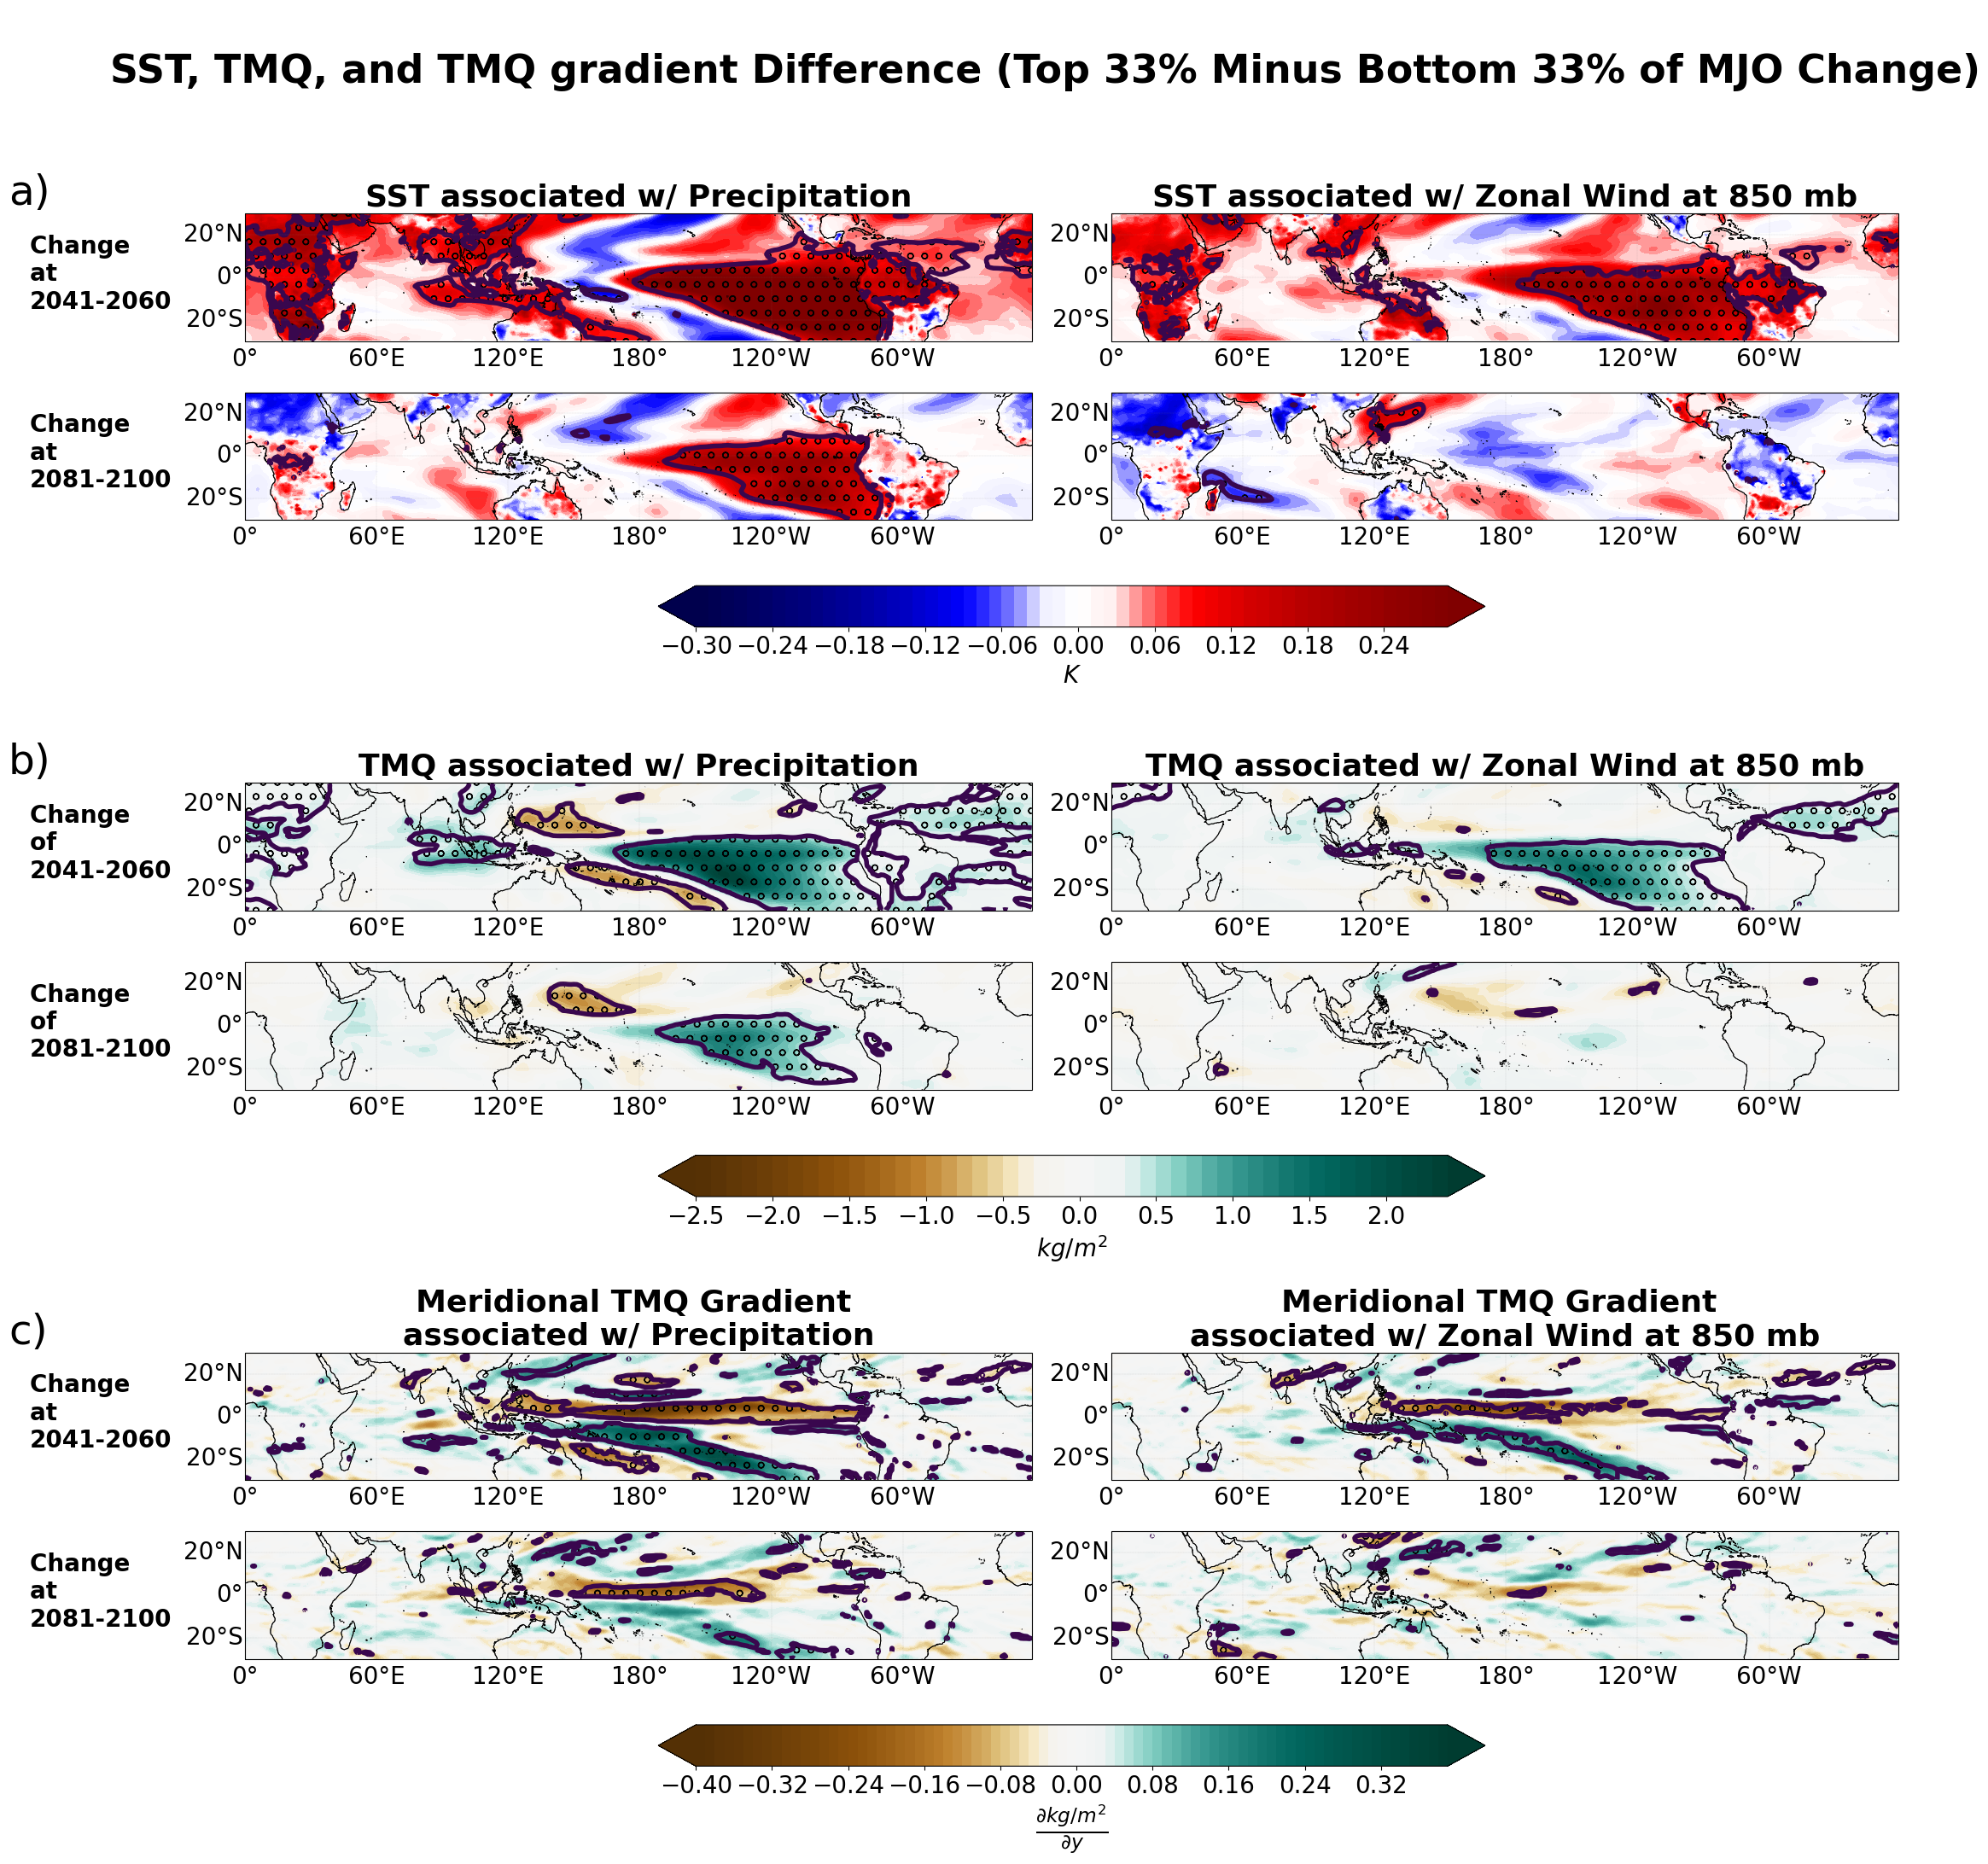

In [53]:
#Seaosnal Cycle Removed of OLR, U850, and Precip of the Past
#Projection
plotproj = ccrs.PlateCarree(central_longitude=180)

#Figure format
fig = plt.figure(figsize=(25.,24.),facecolor='white')
plt.style.use('default')
#Title
plt.suptitle('\nSST, TMQ, and TMQ gradient Difference (Top 33% Minus Bottom 33% of MJO Change)',fontweight="bold",fontsize=33)#,y=3.35

#figure subplot information
gs = fig.add_gridspec(3, 1, hspace=0.3)

gs0 = gs[0].subgridspec(2, 2, wspace=0.1, hspace=0.4)
gs1 = gs[1].subgridspec(2, 2, wspace=0.1, hspace=0.4)
gs2 = gs[2].subgridspec(2, 2, wspace=0.1, hspace=0.4)

#Subplot 1
ax1 = fig.add_subplot(gs0[0, 0],projection=plotproj)
#Map pre-defined boundaries 
add_cartopy_params(ax1)
#Map extension
ax1.set_extent([-180, 179, -30., 30.],plotproj)
#Range for shading of the variable
clevs1 = np.arange(-0.3,0.3,0.01)
#Color shading application
cs1 = ax1.contourf(SST_All_Ensembles_The_Season_mean_DP2_ch_pos66_minus_neg33_my_wPRC_ET_avg.lon,SST_All_Ensembles_The_Season_mean_DP2_ch_pos66_minus_neg33_my_wPRC_ET_avg.lat,SST_All_Ensembles_The_Season_mean_DP2_ch_pos66_minus_neg33_my_wPRC_ET_avg,
                 clevs1,norm=SymLogNorm(linthresh=0.03, linscale=0.03, vmin=-0.3, vmax=0.3),extend='both',cmap='seismic', transform=ccrs.PlateCarree())
#Range for shading and countour for statistical significance
clevs1_plus_sig = np.arange(-0.05,0.05,0.04)
#Color shading application for statistical significance
cs1_plus_sig = ax1.contourf(SST_All_Ensembles_The_Season_mean_DP2_ch_pos66_minus_neg33_my_wPRC_ET_EM80ttest_pvalue.lon,SST_All_Ensembles_The_Season_mean_DP2_ch_pos66_minus_neg33_my_wPRC_ET_EM80ttest_pvalue.lat,SST_All_Ensembles_The_Season_mean_DP2_ch_pos66_minus_neg33_my_wPRC_ET_EM80ttest_pvalue,
                 clevs1_plus_sig, colors='none', hatches=['o'], transform=ccrs.PlateCarree())
#Countour outlining application for statistical significance
cs1_plus_sig = ax1.contour(SST_All_Ensembles_The_Season_mean_DP2_ch_pos66_minus_neg33_my_wPRC_ET_EM80ttest_pvalue.lon,SST_All_Ensembles_The_Season_mean_DP2_ch_pos66_minus_neg33_my_wPRC_ET_EM80ttest_pvalue.lat,SST_All_Ensembles_The_Season_mean_DP2_ch_pos66_minus_neg33_my_wPRC_ET_EM80ttest_pvalue,
                 clevs1_plus_sig, colors='#39074E', linewidths=4, transform=ccrs.PlateCarree())
#text features
ax1.text(-278,1.5,"Change \nat \n"+str(First_to_Last_Time_Period_DP2_Q), fontweight="bold",size=20, verticalalignment='center', rotation=0)
#subplot title
plt.title('SST associated w/ Precipitation',fontweight="bold",fontsize=26)
#labeling of subplots
ax1.text(-0.3, 1.0, 'a)', transform=ax1.transAxes , fontsize=35, va='bottom')




ax2 = fig.add_subplot(gs0[0, 1],projection=plotproj) 
add_cartopy_params(ax2)
ax2.set_extent([-180, 179, -30., 30.],plotproj)
clevs2 = np.arange(-0.3,0.3,0.01)
cs2 = ax2.contourf(SST_All_Ensembles_The_Season_mean_DP2_ch_pos66_minus_neg33_my_wU850_ET_avg.lon,SST_All_Ensembles_The_Season_mean_DP2_ch_pos66_minus_neg33_my_wU850_ET_avg.lat,SST_All_Ensembles_The_Season_mean_DP2_ch_pos66_minus_neg33_my_wU850_ET_avg,
                 clevs2,norm=SymLogNorm(linthresh=0.03, linscale=0.03, vmin=-0.3, vmax=0.3),extend='both',cmap='seismic', transform=ccrs.PlateCarree())
clevs2_plus_sig = np.arange(-0.05,0.05,0.04)
cs2_plus_sig = ax2.contourf(SST_All_Ensembles_The_Season_mean_DP2_ch_pos66_minus_neg33_my_wU850_ET_EM80ttest_pvalue.lon,SST_All_Ensembles_The_Season_mean_DP2_ch_pos66_minus_neg33_my_wU850_ET_EM80ttest_pvalue.lat,SST_All_Ensembles_The_Season_mean_DP2_ch_pos66_minus_neg33_my_wU850_ET_EM80ttest_pvalue,
                 clevs2_plus_sig, colors='none', hatches=['o'], transform=ccrs.PlateCarree())
cs2_plus_sig = ax2.contour(SST_All_Ensembles_The_Season_mean_DP2_ch_pos66_minus_neg33_my_wU850_ET_EM80ttest_pvalue.lon,SST_All_Ensembles_The_Season_mean_DP2_ch_pos66_minus_neg33_my_wU850_ET_EM80ttest_pvalue.lat,SST_All_Ensembles_The_Season_mean_DP2_ch_pos66_minus_neg33_my_wU850_ET_EM80ttest_pvalue,
                 clevs2_plus_sig, colors='#39074E', linewidths=4, transform=ccrs.PlateCarree())
plt.title('SST associated w/ Zonal Wind at 850 mb',fontweight="bold",fontsize=26)




ax3 = fig.add_subplot(gs0[1, 0],projection=plotproj)
add_cartopy_params(ax3)
ax3.set_extent([-180, 179, -30., 30.],plotproj)
clevs3 = np.arange(-0.3,0.3,0.01)
cs3 = ax3.contourf(SST_All_Ensembles_The_Season_mean_DP4_ch_pos66_minus_neg33_my_wPRC_ET_avg.lon,SST_All_Ensembles_The_Season_mean_DP4_ch_pos66_minus_neg33_my_wPRC_ET_avg.lat,SST_All_Ensembles_The_Season_mean_DP4_ch_pos66_minus_neg33_my_wPRC_ET_avg,
                 clevs3,norm=SymLogNorm(linthresh=0.03, linscale=0.03, vmin=-0.3, vmax=0.3),extend='both',cmap='seismic', transform=ccrs.PlateCarree())
clevs3_plus_sig = np.arange(-0.05,0.05,0.04)
cs3_plus_sig = ax3.contourf(SST_All_Ensembles_The_Season_mean_DP4_ch_pos66_minus_neg33_my_wPRC_ET_EM80ttest_pvalue.lon,SST_All_Ensembles_The_Season_mean_DP4_ch_pos66_minus_neg33_my_wPRC_ET_EM80ttest_pvalue.lat,SST_All_Ensembles_The_Season_mean_DP4_ch_pos66_minus_neg33_my_wPRC_ET_EM80ttest_pvalue,
                 clevs3_plus_sig, colors='none', hatches=['o'], transform=ccrs.PlateCarree())
cs3_plus_sig = ax3.contour(SST_All_Ensembles_The_Season_mean_DP4_ch_pos66_minus_neg33_my_wPRC_ET_EM80ttest_pvalue.lon,SST_All_Ensembles_The_Season_mean_DP4_ch_pos66_minus_neg33_my_wPRC_ET_EM80ttest_pvalue.lat,SST_All_Ensembles_The_Season_mean_DP4_ch_pos66_minus_neg33_my_wPRC_ET_EM80ttest_pvalue,
                 clevs3_plus_sig, colors='#39074E', linewidths=4, transform=ccrs.PlateCarree())
ax3.text(-278,1.5,"Change \nat \n"+str(First_to_Last_Time_Period_DP4_Q), fontweight="bold",size=20, verticalalignment='center', rotation=0)






ax4 = fig.add_subplot(gs0[1, 1],projection=plotproj)
add_cartopy_params(ax4)
ax4.set_extent([-180, 179, -30., 30.],plotproj)
clevs4 = np.arange(-0.3,0.3,0.01)
cs4 = ax4.contourf(SST_All_Ensembles_The_Season_mean_DP4_ch_pos66_minus_neg33_my_wU850_ET_avg.lon,SST_All_Ensembles_The_Season_mean_DP4_ch_pos66_minus_neg33_my_wU850_ET_avg.lat,SST_All_Ensembles_The_Season_mean_DP4_ch_pos66_minus_neg33_my_wU850_ET_avg,
                 clevs4,norm=SymLogNorm(linthresh=0.03, linscale=0.03, vmin=-0.3, vmax=0.3),extend='both',cmap='seismic', transform=ccrs.PlateCarree())
clevs4_plus_sig = np.arange(-0.05,0.05,0.04)
cs4_plus_sig = ax4.contourf(SST_All_Ensembles_The_Season_mean_DP4_ch_pos66_minus_neg33_my_wU850_ET_EM80ttest_pvalue.lon,SST_All_Ensembles_The_Season_mean_DP4_ch_pos66_minus_neg33_my_wU850_ET_EM80ttest_pvalue.lat,SST_All_Ensembles_The_Season_mean_DP4_ch_pos66_minus_neg33_my_wU850_ET_EM80ttest_pvalue,
                 clevs4_plus_sig, colors='none', hatches=['o'],transform=ccrs.PlateCarree())
cs4_plus_sig = ax4.contour(SST_All_Ensembles_The_Season_mean_DP4_ch_pos66_minus_neg33_my_wU850_ET_EM80ttest_pvalue.lon,SST_All_Ensembles_The_Season_mean_DP4_ch_pos66_minus_neg33_my_wU850_ET_EM80ttest_pvalue.lat,SST_All_Ensembles_The_Season_mean_DP4_ch_pos66_minus_neg33_my_wU850_ET_EM80ttest_pvalue,
                 clevs4_plus_sig, colors='#39074E', linewidths=4, transform=ccrs.PlateCarree())


ax1.set_aspect("auto")
ax2.set_aspect("auto")
ax3.set_aspect("auto")
ax4.set_aspect("auto")


#Appling sharable colorbar
cbar_axs0 = fig.colorbar(cs4, 
                          ax=[ax1, ax2, ax3, ax4],
#                           use_gridspec = True,
                          orientation='horizontal',
                          extend='both',
#                           aspect=65,
                          shrink=0.5,
#                           pad=0.9,
#                           anchor=(0.5, 1.3),
                          )
#Colorbar label and size 
cbar_axs0.ax.tick_params(labelsize=20)
cbar_axs0.set_label(label='$K$', fontsize=20)

#######################################################################################################################################################################################################################################################


ax5 = fig.add_subplot(gs1[0, 0],projection=plotproj)
add_cartopy_params(ax5)
ax5.set_extent([-180, 179, -30., 30.],plotproj)
clevs5 = np.arange(-2.5,2.5,0.1)
cs5 = ax5.contourf(TMQ_All_Ensembles_The_Season_mean_DP2_ch_pos66_minus_neg33_my_wPRC_ET_avg.lon,TMQ_All_Ensembles_The_Season_mean_DP2_ch_pos66_minus_neg33_my_wPRC_ET_avg.lat,TMQ_All_Ensembles_The_Season_mean_DP2_ch_pos66_minus_neg33_my_wPRC_ET_avg,
                 clevs5,norm=SymLogNorm(linthresh=0.3, linscale=0.03, vmin=-2.5, vmax=2.5),extend='both',cmap='BrBG', transform=ccrs.PlateCarree())
clevs5_plus_sig = np.arange(-0.05,0.05,0.04)
cs5_plus_sig = ax5.contourf(TMQ_All_Ensembles_The_Season_mean_DP2_ch_pos66_minus_neg33_my_wPRC_ET_EM80ttest_pvalue.lon,TMQ_All_Ensembles_The_Season_mean_DP2_ch_pos66_minus_neg33_my_wPRC_ET_EM80ttest_pvalue.lat,TMQ_All_Ensembles_The_Season_mean_DP2_ch_pos66_minus_neg33_my_wPRC_ET_EM80ttest_pvalue,
                 clevs5_plus_sig, colors='none', hatches=['o'], transform=ccrs.PlateCarree())
cs5_plus_sig = ax5.contour(TMQ_All_Ensembles_The_Season_mean_DP2_ch_pos66_minus_neg33_my_wPRC_ET_EM80ttest_pvalue.lon,TMQ_All_Ensembles_The_Season_mean_DP2_ch_pos66_minus_neg33_my_wPRC_ET_EM80ttest_pvalue.lat,TMQ_All_Ensembles_The_Season_mean_DP2_ch_pos66_minus_neg33_my_wPRC_ET_EM80ttest_pvalue,
                 clevs5_plus_sig, colors='#39074E', linewidths=4, transform=ccrs.PlateCarree())
plt.title('TMQ associated w/ Precipitation',fontweight="bold",fontsize=26)
ax5.text(-278,1.5,"Change \nof \n"+str(First_to_Last_Time_Period_DP2_Q), fontweight="bold",size=20, verticalalignment='center', rotation=0)
ax5.text(-0.3, 1.0, 'b)', transform=ax5.transAxes , fontsize=35, va='bottom')



ax6 = fig.add_subplot(gs1[0, 1],projection=plotproj)
add_cartopy_params(ax6)
ax6.set_extent([-180, 179, -30., 30.],plotproj)
clevs6 = np.arange(-2.5,2.5,0.1)
cs6 = ax6.contourf(TMQ_All_Ensembles_The_Season_mean_DP2_ch_pos66_minus_neg33_my_wU850_ET_avg.lon,TMQ_All_Ensembles_The_Season_mean_DP2_ch_pos66_minus_neg33_my_wU850_ET_avg.lat,TMQ_All_Ensembles_The_Season_mean_DP2_ch_pos66_minus_neg33_my_wU850_ET_avg,
                 clevs6,norm=SymLogNorm(linthresh=0.3, linscale=0.03, vmin=-2.5, vmax=2.5),extend='both',cmap='BrBG', transform=ccrs.PlateCarree())
clevs6_plus_sig = np.arange(-0.05,0.05,0.04)
cs6_plus_sig = ax6.contourf(TMQ_All_Ensembles_The_Season_mean_DP2_ch_pos66_minus_neg33_my_wU850_ET_EM80ttest_pvalue.lon,TMQ_All_Ensembles_The_Season_mean_DP2_ch_pos66_minus_neg33_my_wU850_ET_EM80ttest_pvalue.lat,TMQ_All_Ensembles_The_Season_mean_DP2_ch_pos66_minus_neg33_my_wU850_ET_EM80ttest_pvalue,
                 clevs6_plus_sig, colors='none', hatches=['o'], transform=ccrs.PlateCarree())
cs6_plus_sig = ax6.contour(TMQ_All_Ensembles_The_Season_mean_DP2_ch_pos66_minus_neg33_my_wU850_ET_EM80ttest_pvalue.lon,TMQ_All_Ensembles_The_Season_mean_DP2_ch_pos66_minus_neg33_my_wU850_ET_EM80ttest_pvalue.lat,TMQ_All_Ensembles_The_Season_mean_DP2_ch_pos66_minus_neg33_my_wU850_ET_EM80ttest_pvalue,
                 clevs6_plus_sig, colors='#39074E', linewidths=4, transform=ccrs.PlateCarree())
plt.title('TMQ associated w/ Zonal Wind at 850 mb',fontweight="bold",fontsize=26)




ax7 = fig.add_subplot(gs1[1, 0],projection=plotproj)
add_cartopy_params(ax7)
ax7.set_extent([-180, 179, -30., 30.],plotproj)
clevs7 = np.arange(-2.5,2.5,0.1)
cs7 = ax7.contourf(TMQ_All_Ensembles_The_Season_mean_DP4_ch_pos66_minus_neg33_my_wPRC_ET_avg.lon,TMQ_All_Ensembles_The_Season_mean_DP4_ch_pos66_minus_neg33_my_wPRC_ET_avg.lat,TMQ_All_Ensembles_The_Season_mean_DP4_ch_pos66_minus_neg33_my_wPRC_ET_avg,
                 clevs7,norm=SymLogNorm(linthresh=0.3, linscale=0.03, vmin=-2.5, vmax=2.5),extend='both',cmap='BrBG', transform=ccrs.PlateCarree())
clevs7_plus_sig = np.arange(-0.05,0.05,0.04)
cs7_plus_sig = ax7.contourf(TMQ_All_Ensembles_The_Season_mean_DP4_ch_pos66_minus_neg33_my_wPRC_ET_EM80ttest_pvalue.lon,TMQ_All_Ensembles_The_Season_mean_DP4_ch_pos66_minus_neg33_my_wPRC_ET_EM80ttest_pvalue.lat,TMQ_All_Ensembles_The_Season_mean_DP4_ch_pos66_minus_neg33_my_wPRC_ET_EM80ttest_pvalue,
                 clevs7_plus_sig, colors='none', hatches=['o'], transform=ccrs.PlateCarree())
cs7_plus_sig = ax7.contour(TMQ_All_Ensembles_The_Season_mean_DP4_ch_pos66_minus_neg33_my_wPRC_ET_EM80ttest_pvalue.lon,TMQ_All_Ensembles_The_Season_mean_DP4_ch_pos66_minus_neg33_my_wPRC_ET_EM80ttest_pvalue.lat,TMQ_All_Ensembles_The_Season_mean_DP4_ch_pos66_minus_neg33_my_wPRC_ET_EM80ttest_pvalue,
                 clevs7_plus_sig, colors='#39074E', linewidths=4, transform=ccrs.PlateCarree())
ax7.text(-278,1.5,"Change \nof \n"+str(First_to_Last_Time_Period_DP4_Q), fontweight="bold",size=20, verticalalignment='center', rotation=0)





ax8 = fig.add_subplot(gs1[1, 1],projection=plotproj)#plt.subplot(224,projection=plotproj)
add_cartopy_params(ax8)
ax8.set_extent([-180, 179, -30., 30.],plotproj)
clevs8 = np.arange(-2.5,2.5,0.1)
cs8 = ax8.contourf(TMQ_All_Ensembles_The_Season_mean_DP4_ch_pos66_minus_neg33_my_wU850_ET_avg.lon,TMQ_All_Ensembles_The_Season_mean_DP4_ch_pos66_minus_neg33_my_wU850_ET_avg.lat,TMQ_All_Ensembles_The_Season_mean_DP4_ch_pos66_minus_neg33_my_wU850_ET_avg,
                 clevs8,norm=SymLogNorm(linthresh=0.3, linscale=0.03, vmin=-2.5, vmax=2.5),extend='both',cmap='BrBG', transform=ccrs.PlateCarree())
clevs8_plus_sig = np.arange(-0.05,0.05,0.04)
cs8_plus_sig = ax8.contourf(TMQ_All_Ensembles_The_Season_mean_DP4_ch_pos66_minus_neg33_my_wU850_ET_EM80ttest_pvalue.lon,TMQ_All_Ensembles_The_Season_mean_DP4_ch_pos66_minus_neg33_my_wU850_ET_EM80ttest_pvalue.lat,TMQ_All_Ensembles_The_Season_mean_DP4_ch_pos66_minus_neg33_my_wU850_ET_EM80ttest_pvalue,
                 clevs8_plus_sig, colors='none', hatches=['o'],transform=ccrs.PlateCarree())
cs8_plus_sig = ax8.contour(TMQ_All_Ensembles_The_Season_mean_DP4_ch_pos66_minus_neg33_my_wU850_ET_EM80ttest_pvalue.lon,TMQ_All_Ensembles_The_Season_mean_DP4_ch_pos66_minus_neg33_my_wU850_ET_EM80ttest_pvalue.lat,TMQ_All_Ensembles_The_Season_mean_DP4_ch_pos66_minus_neg33_my_wU850_ET_EM80ttest_pvalue,
                 clevs8_plus_sig, colors='#39074E', linewidths=4, transform=ccrs.PlateCarree())


ax5.set_aspect("auto")
ax6.set_aspect("auto")
ax7.set_aspect("auto")
ax8.set_aspect("auto")

cbar_axs1 = fig.colorbar(cs8, 
                          ax=[ax5, ax6, ax7, ax8],
#                           use_gridspec = True,
                          orientation='horizontal',
                          extend='both',
#                           aspect=65,
                          shrink=0.5,
#                           pad=0.9,
#                           anchor=(0, 4.3),
                          )

cbar_axs1.ax.tick_params( labelsize=20)
cbar_axs1.set_label(label='$kg/m^2$',fontsize=20)

#######################################################################################################################################################################################################################################################


ax9 = fig.add_subplot(gs2[0, 0],projection=plotproj)
add_cartopy_params(ax9)
ax9.set_extent([-180, 179, -30., 30.],plotproj)
clevs9 = np.arange(-0.4,0.4,0.01)
cs9 = ax9.contourf(TMQ_All_Ensembles_The_Season_mean_DP2_ch_pos66_minus_neg33_my_wPRC_ET_avg_grd_lat.lon,TMQ_All_Ensembles_The_Season_mean_DP2_ch_pos66_minus_neg33_my_wPRC_ET_avg_grd_lat.lat,TMQ_All_Ensembles_The_Season_mean_DP2_ch_pos66_minus_neg33_my_wPRC_ET_avg_grd_lat,
                 clevs9,norm=SymLogNorm(linthresh=0.03, linscale=0.03, vmin=-0.4, vmax=0.4),extend='both',cmap='BrBG', transform=ccrs.PlateCarree())
clevs9_plus_sig = np.arange(-0.05,0.05,0.04)
cs9_plus_sig = ax9.contourf(TMQ_All_Ensembles_The_Season_mean_DP2_ch_pos66_minus_neg33_my_wPRC_ET_avg_grd_lat_EM80ttest_pvalue.lon,TMQ_All_Ensembles_The_Season_mean_DP2_ch_pos66_minus_neg33_my_wPRC_ET_avg_grd_lat_EM80ttest_pvalue.lat,TMQ_All_Ensembles_The_Season_mean_DP2_ch_pos66_minus_neg33_my_wPRC_ET_avg_grd_lat_EM80ttest_pvalue,
                 clevs9_plus_sig, colors='none', hatches=['o'], transform=ccrs.PlateCarree())
cs9_plus_sig = ax9.contour(TMQ_All_Ensembles_The_Season_mean_DP2_ch_pos66_minus_neg33_my_wPRC_ET_avg_grd_lat_EM80ttest_pvalue.lon,TMQ_All_Ensembles_The_Season_mean_DP2_ch_pos66_minus_neg33_my_wPRC_ET_avg_grd_lat_EM80ttest_pvalue.lat,TMQ_All_Ensembles_The_Season_mean_DP2_ch_pos66_minus_neg33_my_wPRC_ET_avg_grd_lat_EM80ttest_pvalue,
                 clevs9_plus_sig, colors='#39074E', linewidths=4, transform=ccrs.PlateCarree())
ax9.text(-278,1.5,"Change \nat \n"+str(First_to_Last_Time_Period_DP2_Q), fontweight="bold",size=20, verticalalignment='center', rotation=0)
plt.title('Meridional TMQ Gradient \nassociated w/ Precipitation',fontweight="bold",fontsize=26)
ax9.text(-0.3, 1.0, 'c)', transform=ax9.transAxes , fontsize=35, va='bottom')



ax10 = fig.add_subplot(gs2[0, 1],projection=plotproj)
add_cartopy_params(ax10)
ax10.set_extent([-180, 179, -30., 30.],plotproj)
clevs10 = np.arange(-0.4,0.4,0.01)
cs10 = ax10.contourf(TMQ_All_Ensembles_The_Season_mean_DP2_ch_pos66_minus_neg33_my_wU850_ET_avg_grd_lat.lon,TMQ_All_Ensembles_The_Season_mean_DP2_ch_pos66_minus_neg33_my_wU850_ET_avg_grd_lat.lat,TMQ_All_Ensembles_The_Season_mean_DP2_ch_pos66_minus_neg33_my_wU850_ET_avg_grd_lat,
                 clevs10,norm=SymLogNorm(linthresh=0.03, linscale=0.03, vmin=-0.4, vmax=0.4),extend='both',cmap='BrBG', transform=ccrs.PlateCarree())
clevs10_plus_sig = np.arange(-0.05,0.05,0.04)
cs10_plus_sig = ax10.contourf(TMQ_All_Ensembles_The_Season_mean_DP2_ch_pos66_minus_neg33_my_wU850_ET_avg_grd_lat_EM80ttest_pvalue.lon,TMQ_All_Ensembles_The_Season_mean_DP2_ch_pos66_minus_neg33_my_wU850_ET_avg_grd_lat_EM80ttest_pvalue.lat,TMQ_All_Ensembles_The_Season_mean_DP2_ch_pos66_minus_neg33_my_wU850_ET_avg_grd_lat_EM80ttest_pvalue,
                 clevs10_plus_sig, colors='none', hatches=['o'], transform=ccrs.PlateCarree())
cs10_plus_sig = ax10.contour(TMQ_All_Ensembles_The_Season_mean_DP2_ch_pos66_minus_neg33_my_wU850_ET_avg_grd_lat_EM80ttest_pvalue.lon,TMQ_All_Ensembles_The_Season_mean_DP2_ch_pos66_minus_neg33_my_wU850_ET_avg_grd_lat_EM80ttest_pvalue.lat,TMQ_All_Ensembles_The_Season_mean_DP2_ch_pos66_minus_neg33_my_wU850_ET_avg_grd_lat_EM80ttest_pvalue,
                 clevs10_plus_sig, colors='#39074E', linewidths=4, transform=ccrs.PlateCarree())
plt.title('Meridional TMQ Gradient \nassociated w/ Zonal Wind at 850 mb',fontweight="bold",fontsize=26)


ax11 = fig.add_subplot(gs2[1, 0],projection=plotproj)
add_cartopy_params(ax11)
ax11.set_extent([-180, 179, -30., 30.],plotproj)
clevs11 = np.arange(-0.4,0.4,0.01)
cs11 = ax11.contourf(TMQ_All_Ensembles_The_Season_mean_DP4_ch_pos66_minus_neg33_my_wPRC_ET_avg_grd_lat.lon,TMQ_All_Ensembles_The_Season_mean_DP4_ch_pos66_minus_neg33_my_wPRC_ET_avg_grd_lat.lat,TMQ_All_Ensembles_The_Season_mean_DP4_ch_pos66_minus_neg33_my_wPRC_ET_avg_grd_lat,
                 clevs11,norm=SymLogNorm(linthresh=0.03, linscale=0.03, vmin=-0.4, vmax=0.4),extend='both',cmap='BrBG', transform=ccrs.PlateCarree())
clevs11_plus_sig = np.arange(-0.05,0.05,0.04)
cs11_plus_sig = ax11.contourf(TMQ_All_Ensembles_The_Season_mean_DP4_ch_pos66_minus_neg33_my_wPRC_ET_avg_grd_lat_EM80ttest_pvalue.lon,TMQ_All_Ensembles_The_Season_mean_DP4_ch_pos66_minus_neg33_my_wPRC_ET_avg_grd_lat_EM80ttest_pvalue.lat,TMQ_All_Ensembles_The_Season_mean_DP4_ch_pos66_minus_neg33_my_wPRC_ET_avg_grd_lat_EM80ttest_pvalue,
                 clevs11_plus_sig, colors='none', hatches=['o'], transform=ccrs.PlateCarree())
cs11_plus_sig = ax11.contour(TMQ_All_Ensembles_The_Season_mean_DP4_ch_pos66_minus_neg33_my_wPRC_ET_avg_grd_lat_EM80ttest_pvalue.lon,TMQ_All_Ensembles_The_Season_mean_DP4_ch_pos66_minus_neg33_my_wPRC_ET_avg_grd_lat_EM80ttest_pvalue.lat,TMQ_All_Ensembles_The_Season_mean_DP4_ch_pos66_minus_neg33_my_wPRC_ET_avg_grd_lat_EM80ttest_pvalue,
                 clevs11_plus_sig, colors='#39074E', linewidths=4, transform=ccrs.PlateCarree())
ax11.text(-278,1.5,"Change \nat \n"+str(First_to_Last_Time_Period_DP4_Q), fontweight="bold",size=20, verticalalignment='center', rotation=0)





ax12 = fig.add_subplot(gs2[1, 1],projection=plotproj)
add_cartopy_params(ax12)
ax12.set_extent([-180, 179, -30., 30.],plotproj)
clevs12 = np.arange(-0.4,0.4,0.01)
cs12 = ax12.contourf(TMQ_All_Ensembles_The_Season_mean_DP4_ch_pos66_minus_neg33_my_wU850_ET_avg_grd_lat.lon,TMQ_All_Ensembles_The_Season_mean_DP4_ch_pos66_minus_neg33_my_wU850_ET_avg_grd_lat.lat,TMQ_All_Ensembles_The_Season_mean_DP4_ch_pos66_minus_neg33_my_wU850_ET_avg_grd_lat,
                 clevs12,norm=SymLogNorm(linthresh=0.03, linscale=0.03, vmin=-0.4, vmax=0.4),extend='both',cmap='BrBG', transform=ccrs.PlateCarree())
clevs12_plus_sig = np.arange(-0.05,0.05,0.04)
cs12_plus_sig = ax12.contourf(TMQ_All_Ensembles_The_Season_mean_DP4_ch_pos66_minus_neg33_my_wU850_ET_avg_grd_lat_EM80ttest_pvalue.lon,TMQ_All_Ensembles_The_Season_mean_DP4_ch_pos66_minus_neg33_my_wU850_ET_avg_grd_lat_EM80ttest_pvalue.lat,TMQ_All_Ensembles_The_Season_mean_DP4_ch_pos66_minus_neg33_my_wU850_ET_avg_grd_lat_EM80ttest_pvalue,
                 clevs12_plus_sig, colors='none', hatches=['o'],transform=ccrs.PlateCarree())
cs12_plus_sig = ax12.contour(TMQ_All_Ensembles_The_Season_mean_DP4_ch_pos66_minus_neg33_my_wU850_ET_avg_grd_lat_EM80ttest_pvalue.lon,TMQ_All_Ensembles_The_Season_mean_DP4_ch_pos66_minus_neg33_my_wU850_ET_avg_grd_lat_EM80ttest_pvalue.lat,TMQ_All_Ensembles_The_Season_mean_DP4_ch_pos66_minus_neg33_my_wU850_ET_avg_grd_lat_EM80ttest_pvalue,
                 clevs12_plus_sig, colors='#39074E', linewidths=4, transform=ccrs.PlateCarree())


ax9.set_aspect("auto")
ax10.set_aspect("auto")
ax11.set_aspect("auto")
ax12.set_aspect("auto")


cbar_axs2 = fig.colorbar(cs12, 
                          ax=[ax9, ax10, ax11, ax12],
#                           use_gridspec = True,
                          orientation='horizontal',
                          extend='both',
#                           aspect=65,
                          shrink=0.5,
#                           pad=0.9,
#                           anchor=(0.5, 1.3),
                          )
cbar_axs2.ax.tick_params(labelsize=20)
cbar_axs2.set_label(label=r'$\frac{∂kg/m^2}{∂y}$', fontsize=24)
plt.rcParams.update({'font.size': 20}, )
plt.show()
plt.close()




# 

# 

# 

# 

# 

# 

# 

# 

# 

# 

# 

# 

# 

# 

In [37]:
#TMQ meridonal gradient for scatterplots

#Calculate TMQ meridonal gradient from top 33% and bottom 33% MJO Activity Change
TMQ_All_Ensembles_The_Season_mean_DP1_ch_AEM_SP_avg_grd_lat=TMQ_All_Ensembles_The_Season_mean_DP1_ch.differentiate("lat", edge_order=1, datetime_unit="M")
TMQ_All_Ensembles_The_Season_mean_DP2_ch_AEM_SP_avg_grd_lat=TMQ_All_Ensembles_The_Season_mean_DP2_ch.differentiate("lat", edge_order=1, datetime_unit="M")
TMQ_All_Ensembles_The_Season_mean_DP3_ch_AEM_SP_avg_grd_lat=TMQ_All_Ensembles_The_Season_mean_DP3_ch.differentiate("lat", edge_order=1, datetime_unit="M")
TMQ_All_Ensembles_The_Season_mean_DP4_ch_AEM_SP_avg_grd_lat=TMQ_All_Ensembles_The_Season_mean_DP4_ch.differentiate("lat", edge_order=1, datetime_unit="M")

#Slice Domain of Region of Interest
TMQ_All_Ensembles_The_Season_mean_DP1_ch_AEM_SP_avg_grd_lat_max =TMQ_All_Ensembles_The_Season_mean_DP1_ch_AEM_SP_avg_grd_lat.loc[dict(lon=slice(Tropical_Ocean_TMQ_Lon_1,Tropical_Ocean_TMQ_Lon_2))].loc[dict(lat=slice(Tropical_Ocean_TMQ_Lat_1,Tropical_Ocean_TMQ_Lat_2))]
TMQ_All_Ensembles_The_Season_mean_DP2_ch_AEM_SP_avg_grd_lat_max =TMQ_All_Ensembles_The_Season_mean_DP2_ch_AEM_SP_avg_grd_lat.loc[dict(lon=slice(Tropical_Ocean_TMQ_Lon_1,Tropical_Ocean_TMQ_Lon_2))].loc[dict(lat=slice(Tropical_Ocean_TMQ_Lat_1,Tropical_Ocean_TMQ_Lat_2))]
TMQ_All_Ensembles_The_Season_mean_DP3_ch_AEM_SP_avg_grd_lat_max =TMQ_All_Ensembles_The_Season_mean_DP3_ch_AEM_SP_avg_grd_lat.loc[dict(lon=slice(Tropical_Ocean_TMQ_Lon_1,Tropical_Ocean_TMQ_Lon_2))].loc[dict(lat=slice(Tropical_Ocean_TMQ_Lat_1,Tropical_Ocean_TMQ_Lat_2))]
TMQ_All_Ensembles_The_Season_mean_DP4_ch_AEM_SP_avg_grd_lat_max =TMQ_All_Ensembles_The_Season_mean_DP4_ch_AEM_SP_avg_grd_lat.loc[dict(lon=slice(Tropical_Ocean_TMQ_Lon_1,Tropical_Ocean_TMQ_Lon_2))].loc[dict(lat=slice(Tropical_Ocean_TMQ_Lat_1,Tropical_Ocean_TMQ_Lat_2))]

#Average Spatial Domain of Region of Interest
TMQ_All_Ensembles_The_Season_mean_DP1_ch_AEM_SP_avg_grd_lat_max_abs =np.abs(TMQ_All_Ensembles_The_Season_mean_DP1_ch_AEM_SP_avg_grd_lat_max).mean(["lat","lon"])
TMQ_All_Ensembles_The_Season_mean_DP2_ch_AEM_SP_avg_grd_lat_max_abs =np.abs(TMQ_All_Ensembles_The_Season_mean_DP2_ch_AEM_SP_avg_grd_lat_max).mean(["lat","lon"])
TMQ_All_Ensembles_The_Season_mean_DP3_ch_AEM_SP_avg_grd_lat_max_abs =np.abs(TMQ_All_Ensembles_The_Season_mean_DP3_ch_AEM_SP_avg_grd_lat_max).mean(["lat","lon"])
TMQ_All_Ensembles_The_Season_mean_DP4_ch_AEM_SP_avg_grd_lat_max_abs =np.abs(TMQ_All_Ensembles_The_Season_mean_DP4_ch_AEM_SP_avg_grd_lat_max).mean(["lat","lon"])

#Load for Monthly Varibales
TMQ_All_Ensembles_The_Season_mean_DP1_ch_AEM_SP_avg_grd_lat_max_abs =TMQ_All_Ensembles_The_Season_mean_DP1_ch_AEM_SP_avg_grd_lat_max_abs.load()
TMQ_All_Ensembles_The_Season_mean_DP2_ch_AEM_SP_avg_grd_lat_max_abs =TMQ_All_Ensembles_The_Season_mean_DP2_ch_AEM_SP_avg_grd_lat_max_abs.load()
TMQ_All_Ensembles_The_Season_mean_DP3_ch_AEM_SP_avg_grd_lat_max_abs =TMQ_All_Ensembles_The_Season_mean_DP3_ch_AEM_SP_avg_grd_lat_max_abs.load()
TMQ_All_Ensembles_The_Season_mean_DP4_ch_AEM_SP_avg_grd_lat_max_abs =TMQ_All_Ensembles_The_Season_mean_DP4_ch_AEM_SP_avg_grd_lat_max_abs.load()



In [38]:
#Regression Lines of MJO Activity and TMQ gradient Region of Interest

#dependent variable
TMQ_All_Ensembles_The_Season_mean_DP1_ch_AEM_SP_avg_grd_lat_max_abs_xprime=TMQ_All_Ensembles_The_Season_mean_DP1_ch_AEM_SP_avg_grd_lat_max_abs-np.nanmean(TMQ_All_Ensembles_The_Season_mean_DP1_ch_AEM_SP_avg_grd_lat_max_abs,axis=0)
#independent variable
U850_All_Ensembles_SP_DP1_ET_yprime=U850_All_Ensembles_The_Season_std_DP1_ch_ET-np.nanmean(U850_All_Ensembles_The_Season_std_DP1_ch_ET,axis=0)
#Regression Coefficient
TMQ_GMP_U850_ET_All_Ensembles_SP_DP1_a1=np.nanmean(TMQ_All_Ensembles_The_Season_mean_DP1_ch_AEM_SP_avg_grd_lat_max_abs_xprime*U850_All_Ensembles_SP_DP1_ET_yprime)/np.nanmean(TMQ_All_Ensembles_The_Season_mean_DP1_ch_AEM_SP_avg_grd_lat_max_abs_xprime**2)
#correlation coefficient
TMQ_GMP_U850_ET_All_Ensembles_SP_DP1_r=TMQ_GMP_U850_ET_All_Ensembles_SP_DP1_a1*(np.nanstd(TMQ_All_Ensembles_The_Season_mean_DP1_ch_AEM_SP_avg_grd_lat_max_abs_xprime)/np.nanstd(U850_All_Ensembles_SP_DP1_ET_yprime))
#variance explained
TMQ_GMP_U850_ET_All_Ensembles_SP_DP1_r_sqr=TMQ_GMP_U850_ET_All_Ensembles_SP_DP1_r**2
#y-intercept
TMQ_GMP_U850_ET_All_Ensembles_SP_DP1_a0=np.nanmean(U850_All_Ensembles_The_Season_std_DP1_ch_ET,axis=0)-(TMQ_GMP_U850_ET_All_Ensembles_SP_DP1_a1*np.nanmean(TMQ_All_Ensembles_The_Season_mean_DP1_ch_AEM_SP_avg_grd_lat_max_abs))
#linear line of best fit
TMQ_GMP_U850_ET_All_Ensembles_SP_DP1_yline = TMQ_GMP_U850_ET_All_Ensembles_SP_DP1_a0+(TMQ_GMP_U850_ET_All_Ensembles_SP_DP1_a1*TMQ_All_Ensembles_The_Season_mean_DP1_ch_AEM_SP_avg_grd_lat_max_abs)

#dependent variable
TMQ_All_Ensembles_The_Season_mean_DP1_ch_AEM_SP_avg_grd_lat_max_abs_xprime=TMQ_All_Ensembles_The_Season_mean_DP1_ch_AEM_SP_avg_grd_lat_max_abs-np.nanmean(TMQ_All_Ensembles_The_Season_mean_DP1_ch_AEM_SP_avg_grd_lat_max_abs,axis=0)
#independent variable
PRC_All_Ensembles_SP_DP1_ET_yprime=PRC_All_Ensembles_The_Season_std_DP1_ch_ET-np.nanmean(PRC_All_Ensembles_The_Season_std_DP1_ch_ET,axis=0)
#Regression Coefficient
TMQ_GMP_PRC_ET_All_Ensembles_SP_DP1_a1=np.nanmean(TMQ_All_Ensembles_The_Season_mean_DP1_ch_AEM_SP_avg_grd_lat_max_abs_xprime*PRC_All_Ensembles_SP_DP1_ET_yprime)/np.nanmean(TMQ_All_Ensembles_The_Season_mean_DP1_ch_AEM_SP_avg_grd_lat_max_abs_xprime**2)
#correlation coefficient
TMQ_GMP_PRC_ET_All_Ensembles_SP_DP1_r=TMQ_GMP_PRC_ET_All_Ensembles_SP_DP1_a1*(np.nanstd(TMQ_All_Ensembles_The_Season_mean_DP1_ch_AEM_SP_avg_grd_lat_max_abs_xprime)/np.nanstd(PRC_All_Ensembles_SP_DP1_ET_yprime))
#variance explained, y-intercept, and linear line of best fit
TMQ_GMP_PRC_ET_All_Ensembles_SP_DP1_r_sqr=TMQ_GMP_PRC_ET_All_Ensembles_SP_DP1_r**2
TMQ_GMP_PRC_ET_All_Ensembles_SP_DP1_a0=np.nanmean(PRC_All_Ensembles_The_Season_std_DP1_ch_ET,axis=0)-(TMQ_GMP_PRC_ET_All_Ensembles_SP_DP1_a1*np.nanmean(TMQ_All_Ensembles_The_Season_mean_DP1_ch_AEM_SP_avg_grd_lat_max_abs))
TMQ_GMP_PRC_ET_All_Ensembles_SP_DP1_yline = TMQ_GMP_PRC_ET_All_Ensembles_SP_DP1_a0+(TMQ_GMP_PRC_ET_All_Ensembles_SP_DP1_a1*TMQ_All_Ensembles_The_Season_mean_DP1_ch_AEM_SP_avg_grd_lat_max_abs)

#dependent variable
TMQ_All_Ensembles_The_Season_mean_DP2_ch_AEM_SP_avg_grd_lat_max_abs_xprime=TMQ_All_Ensembles_The_Season_mean_DP2_ch_AEM_SP_avg_grd_lat_max_abs-np.nanmean(TMQ_All_Ensembles_The_Season_mean_DP2_ch_AEM_SP_avg_grd_lat_max_abs,axis=0)
#independent variable
U850_All_Ensembles_SP_DP2_ET_yprime=U850_All_Ensembles_The_Season_std_DP2_ch_ET-np.nanmean(U850_All_Ensembles_The_Season_std_DP2_ch_ET,axis=0)
#Regression Coefficient
TMQ_GMP_U850_ET_All_Ensembles_SP_DP2_a1=np.nanmean(TMQ_All_Ensembles_The_Season_mean_DP2_ch_AEM_SP_avg_grd_lat_max_abs_xprime*U850_All_Ensembles_SP_DP2_ET_yprime)/np.nanmean(TMQ_All_Ensembles_The_Season_mean_DP2_ch_AEM_SP_avg_grd_lat_max_abs_xprime**2)
#correlation coefficient
TMQ_GMP_U850_ET_All_Ensembles_SP_DP2_r=TMQ_GMP_U850_ET_All_Ensembles_SP_DP2_a1*(np.nanstd(TMQ_All_Ensembles_The_Season_mean_DP2_ch_AEM_SP_avg_grd_lat_max_abs_xprime)/np.nanstd(U850_All_Ensembles_SP_DP2_ET_yprime))
#variance explained, y-intercept, and linear line of best fit
TMQ_GMP_U850_ET_All_Ensembles_SP_DP2_r_sqr=TMQ_GMP_U850_ET_All_Ensembles_SP_DP2_r**2
TMQ_GMP_U850_ET_All_Ensembles_SP_DP2_a0=np.nanmean(U850_All_Ensembles_The_Season_std_DP2_ch_ET,axis=0)-(TMQ_GMP_U850_ET_All_Ensembles_SP_DP2_a1*np.nanmean(TMQ_All_Ensembles_The_Season_mean_DP2_ch_AEM_SP_avg_grd_lat_max_abs))
TMQ_GMP_U850_ET_All_Ensembles_SP_DP2_yline = TMQ_GMP_U850_ET_All_Ensembles_SP_DP2_a0+(TMQ_GMP_U850_ET_All_Ensembles_SP_DP2_a1*TMQ_All_Ensembles_The_Season_mean_DP2_ch_AEM_SP_avg_grd_lat_max_abs)

#dependent variable
TMQ_All_Ensembles_The_Season_mean_DP2_ch_AEM_SP_avg_grd_lat_max_abs_xprime=TMQ_All_Ensembles_The_Season_mean_DP2_ch_AEM_SP_avg_grd_lat_max_abs-np.nanmean(TMQ_All_Ensembles_The_Season_mean_DP2_ch_AEM_SP_avg_grd_lat_max_abs,axis=0)
#independent variable
PRC_All_Ensembles_SP_DP2_ET_yprime=PRC_All_Ensembles_The_Season_std_DP2_ch_ET-np.nanmean(PRC_All_Ensembles_The_Season_std_DP2_ch_ET,axis=0)
#Regression Coefficient
TMQ_GMP_PRC_ET_All_Ensembles_SP_DP2_a1=np.nanmean(TMQ_All_Ensembles_The_Season_mean_DP2_ch_AEM_SP_avg_grd_lat_max_abs_xprime*PRC_All_Ensembles_SP_DP2_ET_yprime)/np.nanmean(TMQ_All_Ensembles_The_Season_mean_DP2_ch_AEM_SP_avg_grd_lat_max_abs_xprime**2)
#correlation coefficient
TMQ_GMP_PRC_ET_All_Ensembles_SP_DP2_r=TMQ_GMP_PRC_ET_All_Ensembles_SP_DP2_a1*(np.nanstd(TMQ_All_Ensembles_The_Season_mean_DP2_ch_AEM_SP_avg_grd_lat_max_abs_xprime)/np.nanstd(PRC_All_Ensembles_SP_DP2_ET_yprime))
#variance explained, y-intercept, and linear line of best fit
TMQ_GMP_PRC_ET_All_Ensembles_SP_DP2_r_sqr=TMQ_GMP_PRC_ET_All_Ensembles_SP_DP2_r**2
TMQ_GMP_PRC_ET_All_Ensembles_SP_DP2_a0=np.nanmean(PRC_All_Ensembles_The_Season_std_DP2_ch_ET,axis=0)-(TMQ_GMP_PRC_ET_All_Ensembles_SP_DP2_a1*np.nanmean(TMQ_All_Ensembles_The_Season_mean_DP2_ch_AEM_SP_avg_grd_lat_max_abs))
TMQ_GMP_PRC_ET_All_Ensembles_SP_DP2_yline = TMQ_GMP_PRC_ET_All_Ensembles_SP_DP2_a0+(TMQ_GMP_PRC_ET_All_Ensembles_SP_DP2_a1*TMQ_All_Ensembles_The_Season_mean_DP2_ch_AEM_SP_avg_grd_lat_max_abs)

#dependent variable
TMQ_All_Ensembles_The_Season_mean_DP3_ch_AEM_SP_avg_grd_lat_max_abs_xprime=TMQ_All_Ensembles_The_Season_mean_DP3_ch_AEM_SP_avg_grd_lat_max_abs-np.nanmean(TMQ_All_Ensembles_The_Season_mean_DP3_ch_AEM_SP_avg_grd_lat_max_abs,axis=0)
#independent variable
U850_All_Ensembles_SP_DP3_ET_yprime=U850_All_Ensembles_The_Season_std_DP3_ch_ET-np.nanmean(U850_All_Ensembles_The_Season_std_DP3_ch_ET,axis=0)
#Regression Coefficient
TMQ_GMP_U850_ET_All_Ensembles_SP_DP3_a1=np.nanmean(TMQ_All_Ensembles_The_Season_mean_DP3_ch_AEM_SP_avg_grd_lat_max_abs_xprime*U850_All_Ensembles_SP_DP3_ET_yprime)/np.nanmean(TMQ_All_Ensembles_The_Season_mean_DP3_ch_AEM_SP_avg_grd_lat_max_abs_xprime**2)
#correlation coefficient
TMQ_GMP_U850_ET_All_Ensembles_SP_DP3_r=TMQ_GMP_U850_ET_All_Ensembles_SP_DP3_a1*(np.nanstd(TMQ_All_Ensembles_The_Season_mean_DP3_ch_AEM_SP_avg_grd_lat_max_abs_xprime)/np.nanstd(U850_All_Ensembles_SP_DP3_ET_yprime))
#variance explained, y-intercept, and linear line of best fit
TMQ_GMP_U850_ET_All_Ensembles_SP_DP3_r_sqr=TMQ_GMP_U850_ET_All_Ensembles_SP_DP3_r**2
TMQ_GMP_U850_ET_All_Ensembles_SP_DP3_a0=np.nanmean(U850_All_Ensembles_The_Season_std_DP3_ch_ET,axis=0)-(TMQ_GMP_U850_ET_All_Ensembles_SP_DP3_a1*np.nanmean(TMQ_All_Ensembles_The_Season_mean_DP3_ch_AEM_SP_avg_grd_lat_max_abs))
TMQ_GMP_U850_ET_All_Ensembles_SP_DP3_yline = TMQ_GMP_U850_ET_All_Ensembles_SP_DP3_a0+(TMQ_GMP_U850_ET_All_Ensembles_SP_DP3_a1*TMQ_All_Ensembles_The_Season_mean_DP3_ch_AEM_SP_avg_grd_lat_max_abs)

#dependent variable
TMQ_All_Ensembles_The_Season_mean_DP3_ch_AEM_SP_avg_grd_lat_max_abs_xprime=TMQ_All_Ensembles_The_Season_mean_DP3_ch_AEM_SP_avg_grd_lat_max_abs-np.nanmean(TMQ_All_Ensembles_The_Season_mean_DP3_ch_AEM_SP_avg_grd_lat_max_abs,axis=0)
#independent variable
PRC_All_Ensembles_SP_DP3_ET_yprime=PRC_All_Ensembles_The_Season_std_DP3_ch_ET-np.nanmean(PRC_All_Ensembles_The_Season_std_DP3_ch_ET,axis=0)
#Regression Coefficient
TMQ_GMP_PRC_ET_All_Ensembles_SP_DP3_a1=np.nanmean(TMQ_All_Ensembles_The_Season_mean_DP3_ch_AEM_SP_avg_grd_lat_max_abs_xprime*PRC_All_Ensembles_SP_DP3_ET_yprime)/np.nanmean(TMQ_All_Ensembles_The_Season_mean_DP3_ch_AEM_SP_avg_grd_lat_max_abs_xprime**2)
#correlation coefficient
TMQ_GMP_PRC_ET_All_Ensembles_SP_DP3_r=TMQ_GMP_PRC_ET_All_Ensembles_SP_DP3_a1*(np.nanstd(TMQ_All_Ensembles_The_Season_mean_DP3_ch_AEM_SP_avg_grd_lat_max_abs_xprime)/np.nanstd(PRC_All_Ensembles_SP_DP3_ET_yprime))
#variance explained, y-intercept, and linear line of best fit
TMQ_GMP_PRC_ET_All_Ensembles_SP_DP3_r_sqr=TMQ_GMP_PRC_ET_All_Ensembles_SP_DP3_r**2
TMQ_GMP_PRC_ET_All_Ensembles_SP_DP3_a0=np.nanmean(PRC_All_Ensembles_The_Season_std_DP3_ch_ET,axis=0)-(TMQ_GMP_PRC_ET_All_Ensembles_SP_DP3_a1*np.nanmean(TMQ_All_Ensembles_The_Season_mean_DP3_ch_AEM_SP_avg_grd_lat_max_abs))
TMQ_GMP_PRC_ET_All_Ensembles_SP_DP3_yline = TMQ_GMP_PRC_ET_All_Ensembles_SP_DP3_a0+(TMQ_GMP_PRC_ET_All_Ensembles_SP_DP3_a1*TMQ_All_Ensembles_The_Season_mean_DP3_ch_AEM_SP_avg_grd_lat_max_abs)


#dependent variable
TMQ_All_Ensembles_The_Season_mean_DP4_ch_AEM_SP_avg_grd_lat_max_abs_xprime=TMQ_All_Ensembles_The_Season_mean_DP4_ch_AEM_SP_avg_grd_lat_max_abs-np.nanmean(TMQ_All_Ensembles_The_Season_mean_DP4_ch_AEM_SP_avg_grd_lat_max_abs,axis=0)
#independent variable
U850_All_Ensembles_SP_DP4_ET_yprime=U850_All_Ensembles_The_Season_std_DP4_ch_ET-np.nanmean(U850_All_Ensembles_The_Season_std_DP4_ch_ET,axis=0)
#Regression Coefficient
TMQ_GMP_U850_ET_All_Ensembles_SP_DP4_a1=np.nanmean(TMQ_All_Ensembles_The_Season_mean_DP4_ch_AEM_SP_avg_grd_lat_max_abs_xprime*U850_All_Ensembles_SP_DP4_ET_yprime)/np.nanmean(TMQ_All_Ensembles_The_Season_mean_DP4_ch_AEM_SP_avg_grd_lat_max_abs_xprime**2)
#correlation coefficient
TMQ_GMP_U850_ET_All_Ensembles_SP_DP4_r=TMQ_GMP_U850_ET_All_Ensembles_SP_DP4_a1*(np.nanstd(TMQ_All_Ensembles_The_Season_mean_DP4_ch_AEM_SP_avg_grd_lat_max_abs_xprime)/np.nanstd(U850_All_Ensembles_SP_DP4_ET_yprime))
#variance explained, y-intercept, and linear line of best fit
TMQ_GMP_U850_ET_All_Ensembles_SP_DP4_r_sqr=TMQ_GMP_U850_ET_All_Ensembles_SP_DP4_r**2
TMQ_GMP_U850_ET_All_Ensembles_SP_DP4_a0=np.nanmean(U850_All_Ensembles_The_Season_std_DP4_ch_ET,axis=0)-(TMQ_GMP_U850_ET_All_Ensembles_SP_DP4_a1*np.nanmean(TMQ_All_Ensembles_The_Season_mean_DP4_ch_AEM_SP_avg_grd_lat_max_abs))
TMQ_GMP_U850_ET_All_Ensembles_SP_DP4_yline = TMQ_GMP_U850_ET_All_Ensembles_SP_DP4_a0+(TMQ_GMP_U850_ET_All_Ensembles_SP_DP4_a1*TMQ_All_Ensembles_The_Season_mean_DP4_ch_AEM_SP_avg_grd_lat_max_abs)

#dependent variable
TMQ_All_Ensembles_The_Season_mean_DP4_ch_AEM_SP_avg_grd_lat_max_abs_xprime=TMQ_All_Ensembles_The_Season_mean_DP4_ch_AEM_SP_avg_grd_lat_max_abs-np.nanmean(TMQ_All_Ensembles_The_Season_mean_DP4_ch_AEM_SP_avg_grd_lat_max_abs,axis=0)
#independent variable
PRC_All_Ensembles_SP_DP4_ET_yprime=PRC_All_Ensembles_The_Season_std_DP4_ch_ET-np.nanmean(PRC_All_Ensembles_The_Season_std_DP4_ch_ET,axis=0)
#Regression Coefficient
TMQ_GMP_PRC_ET_All_Ensembles_SP_DP4_a1=np.nanmean(TMQ_All_Ensembles_The_Season_mean_DP4_ch_AEM_SP_avg_grd_lat_max_abs_xprime*PRC_All_Ensembles_SP_DP4_ET_yprime)/np.nanmean(TMQ_All_Ensembles_The_Season_mean_DP4_ch_AEM_SP_avg_grd_lat_max_abs_xprime**2)
#correlation coefficient
TMQ_GMP_PRC_ET_All_Ensembles_SP_DP4_r=TMQ_GMP_PRC_ET_All_Ensembles_SP_DP4_a1*(np.nanstd(TMQ_All_Ensembles_The_Season_mean_DP4_ch_AEM_SP_avg_grd_lat_max_abs_xprime)/np.nanstd(PRC_All_Ensembles_SP_DP4_ET_yprime))
#variance explained, y-intercept, and linear line of best fit
TMQ_GMP_PRC_ET_All_Ensembles_SP_DP4_r_sqr=TMQ_GMP_PRC_ET_All_Ensembles_SP_DP4_r**2
TMQ_GMP_PRC_ET_All_Ensembles_SP_DP4_a0=np.nanmean(PRC_All_Ensembles_The_Season_std_DP4_ch_ET,axis=0)-(TMQ_GMP_PRC_ET_All_Ensembles_SP_DP4_a1*np.nanmean(TMQ_All_Ensembles_The_Season_mean_DP4_ch_AEM_SP_avg_grd_lat_max_abs))
TMQ_GMP_PRC_ET_All_Ensembles_SP_DP4_yline = TMQ_GMP_PRC_ET_All_Ensembles_SP_DP4_a0+(TMQ_GMP_PRC_ET_All_Ensembles_SP_DP4_a1*TMQ_All_Ensembles_The_Season_mean_DP4_ch_AEM_SP_avg_grd_lat_max_abs)

In [39]:
#TMQ gradient statitical test (Pearson, Spearman)

TMQ_grd_GMP_DP1_PRC_ET_DP1_spearmanr=sp.stats.spearmanr(TMQ_All_Ensembles_The_Season_mean_DP1_ch_AEM_SP_avg_grd_lat_max_abs,PRC_All_Ensembles_The_Season_std_DP1_ch_ET)
TMQ_grd_GMP_DP1_PRC_ET_DP1_pearsonr=sp.stats.pearsonr(TMQ_All_Ensembles_The_Season_mean_DP1_ch_AEM_SP_avg_grd_lat_max_abs,PRC_All_Ensembles_The_Season_std_DP1_ch_ET)

TMQ_grd_GMP_DP2_PRC_ET_DP2_spearmanr=sp.stats.spearmanr(TMQ_All_Ensembles_The_Season_mean_DP2_ch_AEM_SP_avg_grd_lat_max_abs,PRC_All_Ensembles_The_Season_std_DP2_ch_ET)
TMQ_grd_GMP_DP2_PRC_ET_DP2_pearsonr=sp.stats.pearsonr(TMQ_All_Ensembles_The_Season_mean_DP2_ch_AEM_SP_avg_grd_lat_max_abs,PRC_All_Ensembles_The_Season_std_DP2_ch_ET)

TMQ_grd_GMP_DP3_PRC_ET_DP3_spearmanr=sp.stats.spearmanr(TMQ_All_Ensembles_The_Season_mean_DP3_ch_AEM_SP_avg_grd_lat_max_abs,PRC_All_Ensembles_The_Season_std_DP3_ch_ET)
TMQ_grd_GMP_DP3_PRC_ET_DP3_pearsonr=sp.stats.pearsonr(TMQ_All_Ensembles_The_Season_mean_DP3_ch_AEM_SP_avg_grd_lat_max_abs,PRC_All_Ensembles_The_Season_std_DP3_ch_ET)

TMQ_grd_GMP_DP4_PRC_ET_DP4_spearmanr=sp.stats.spearmanr(TMQ_All_Ensembles_The_Season_mean_DP4_ch_AEM_SP_avg_grd_lat_max_abs,PRC_All_Ensembles_The_Season_std_DP4_ch_ET)
TMQ_grd_GMP_DP4_PRC_ET_DP4_pearsonr=sp.stats.pearsonr(TMQ_All_Ensembles_The_Season_mean_DP4_ch_AEM_SP_avg_grd_lat_max_abs,PRC_All_Ensembles_The_Season_std_DP4_ch_ET)


TMQ_grd_GMP_DP1_U850_ET_DP1_spearmanr=sp.stats.spearmanr(TMQ_All_Ensembles_The_Season_mean_DP1_ch_AEM_SP_avg_grd_lat_max_abs,U850_All_Ensembles_The_Season_std_DP1_ch_ET)
TMQ_grd_GMP_DP1_U850_ET_DP1_pearsonr=sp.stats.pearsonr(TMQ_All_Ensembles_The_Season_mean_DP1_ch_AEM_SP_avg_grd_lat_max_abs,U850_All_Ensembles_The_Season_std_DP1_ch_ET)

TMQ_grd_GMP_DP2_U850_ET_DP2_spearmanr=sp.stats.spearmanr(TMQ_All_Ensembles_The_Season_mean_DP2_ch_AEM_SP_avg_grd_lat_max_abs,U850_All_Ensembles_The_Season_std_DP2_ch_ET)
TMQ_grd_GMP_DP2_U850_ET_DP2_pearsonr=sp.stats.pearsonr(TMQ_All_Ensembles_The_Season_mean_DP2_ch_AEM_SP_avg_grd_lat_max_abs,U850_All_Ensembles_The_Season_std_DP2_ch_ET)

TMQ_grd_GMP_DP3_U850_ET_DP3_spearmanr=sp.stats.spearmanr(TMQ_All_Ensembles_The_Season_mean_DP3_ch_AEM_SP_avg_grd_lat_max_abs,U850_All_Ensembles_The_Season_std_DP3_ch_ET)
TMQ_grd_GMP_DP3_U850_ET_DP3_pearsonr=sp.stats.pearsonr(TMQ_All_Ensembles_The_Season_mean_DP3_ch_AEM_SP_avg_grd_lat_max_abs,U850_All_Ensembles_The_Season_std_DP3_ch_ET)

TMQ_grd_GMP_DP4_U850_ET_DP4_spearmanr=sp.stats.spearmanr(TMQ_All_Ensembles_The_Season_mean_DP4_ch_AEM_SP_avg_grd_lat_max_abs,U850_All_Ensembles_The_Season_std_DP4_ch_ET)
TMQ_grd_GMP_DP4_U850_ET_DP4_pearsonr=sp.stats.pearsonr(TMQ_All_Ensembles_The_Season_mean_DP4_ch_AEM_SP_avg_grd_lat_max_abs,U850_All_Ensembles_The_Season_std_DP4_ch_ET)


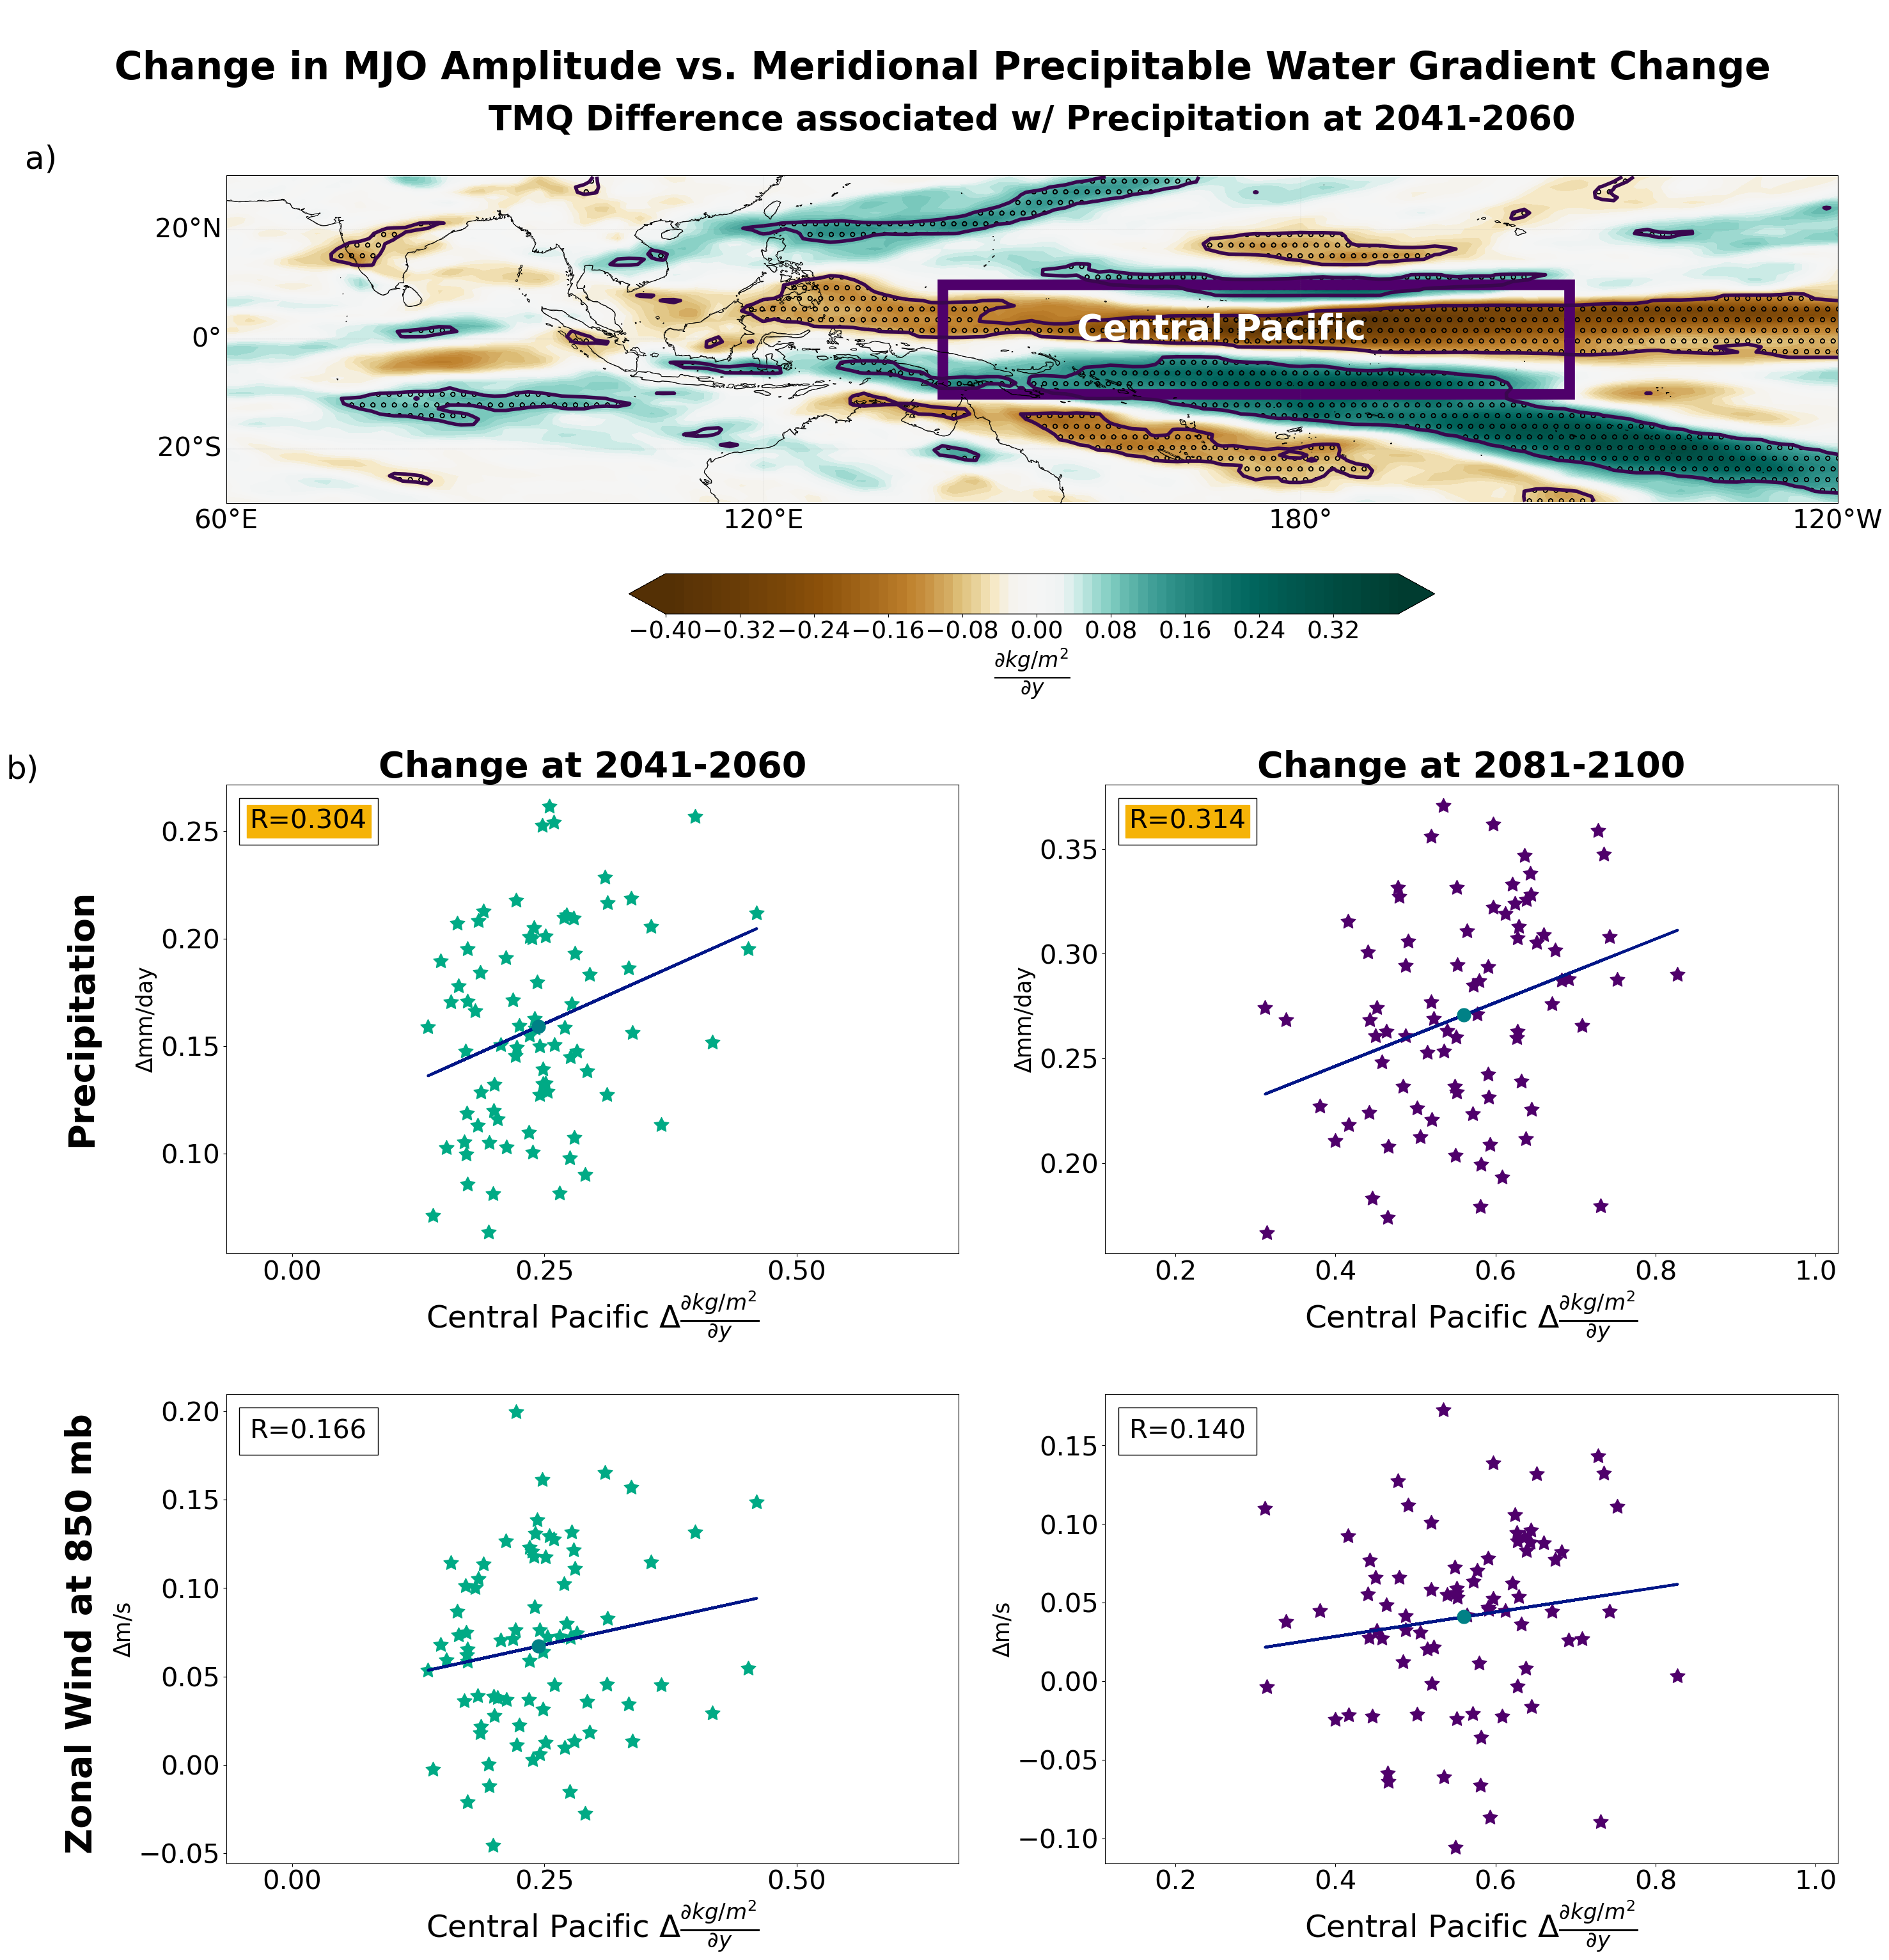

In [57]:
#Projection
plotproj = ccrs.PlateCarree(central_longitude=180)

#Figure Format
fig = plt.figure(figsize=(28.,22.),facecolor='white')
#Title
fig.suptitle('\nChange in MJO Amplitude vs. Meridional Precipitable Water Gradient Change',y=1.82,weight='bold', fontsize=43)

#Subplot format
gs = fig.add_gridspec(3,2, hspace=0.3)

#Plot projection map
ax1 = fig.add_subplot(gs[0, :],projection=plotproj)#.subplot(321,projection=plotproj)
add_cartopy_params(ax1)
ax1.set_extent([-120, 60, -30., 30.],plotproj)
clevs1 = np.arange(-0.4,0.4,0.01)
cs1 = ax1.contourf(TMQ_All_Ensembles_The_Season_mean_DP2_ch_pos66_minus_neg33_my_wPRC_ET_avg_grd_lat.lon,TMQ_All_Ensembles_The_Season_mean_DP2_ch_pos66_minus_neg33_my_wPRC_ET_avg_grd_lat.lat,TMQ_All_Ensembles_The_Season_mean_DP2_ch_pos66_minus_neg33_my_wPRC_ET_avg_grd_lat,
                   clevs1,norm=SymLogNorm(linthresh=0.03, linscale=0.03, vmin=-0.4, vmax=0.4),extend='both',cmap='BrBG', transform=ccrs.PlateCarree())
                 
#                    clevs1,extend='both',cmap='seismic', transform=ccrs.PlateCarree())
clevs1_plus_sig = np.arange(-0.05,0.05,0.04)
cs1_plus_sig = ax1.contourf(TMQ_All_Ensembles_The_Season_mean_DP2_ch_pos66_minus_neg33_my_wPRC_ET_avg_grd_lat_EM80ttest_pvalue.lon,TMQ_All_Ensembles_The_Season_mean_DP2_ch_pos66_minus_neg33_my_wPRC_ET_avg_grd_lat_EM80ttest_pvalue.lat,TMQ_All_Ensembles_The_Season_mean_DP2_ch_pos66_minus_neg33_my_wPRC_ET_avg_grd_lat_EM80ttest_pvalue,
                 clevs1_plus_sig, colors='none', hatches=['o'], transform=ccrs.PlateCarree())
cs1_plus_sig = ax1.contour(TMQ_All_Ensembles_The_Season_mean_DP2_ch_pos66_minus_neg33_my_wPRC_ET_avg_grd_lat_EM80ttest_pvalue.lon,TMQ_All_Ensembles_The_Season_mean_DP2_ch_pos66_minus_neg33_my_wPRC_ET_avg_grd_lat_EM80ttest_pvalue.lat,TMQ_All_Ensembles_The_Season_mean_DP2_ch_pos66_minus_neg33_my_wPRC_ET_avg_grd_lat_EM80ttest_pvalue,
                 clevs1_plus_sig, colors='#39074E', linewidths=4, transform=ccrs.PlateCarree())
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax1.add_patch(mpatches.Rectangle(xy=[-40, -10], width=70, height=20,
                                facecolor='None', edgecolor='#4f006b',
                                transform=plotproj, linewidth=12))
ax1.text(155, 0, 'Central Pacific', transform=ccrs.PlateCarree(), fontsize=40, color='white', fontweight='bold')#, bbox=props)
ax1.text(-0.125, 1.0, 'a)', transform=ax1.transAxes , fontsize=36, va='bottom')
#plt.colorbar(cs1,location='bottom',extend='both',aspect=65,shrink=0.85,label=r'$\frac{∂kg/m^2}{∂y}$')
plt.title('TMQ Difference associated w/ Precipitation at 2041-2060\n',fontweight="bold",fontsize=38)

ax1.set_aspect("auto")

#colorbar format
cbar_axs1 = fig.colorbar(cs1, 
#                           ax=[ax1,ax1],
#                           use_gridspec = True,
                          orientation='horizontal',
                          extend='both',
#                           aspect=65,
                          shrink=0.5,
#                           pad=0.9,
#                           anchor=(0.5, 1.3),
                          )
cbar_axs1.ax.tick_params(labelsize=27)
cbar_axs1.set_label(label=r'$\frac{∂kg/m^2}{∂y}$', fontsize=34)





#Plot scatterplot
ax6 = fig.add_subplot(gs[1, 0])#.subplot(323)
#Plot scatter
ax6.scatter(TMQ_All_Ensembles_The_Season_mean_DP2_ch_AEM_SP_avg_grd_lat_max_abs,PRC_All_Ensembles_The_Season_std_DP2_ch_ET,300,c='#00aa85',marker=(5, 1))
#Plot Line of Best Fit
ax6.plot(TMQ_All_Ensembles_The_Season_mean_DP2_ch_AEM_SP_avg_grd_lat_max_abs,TMQ_GMP_PRC_ET_All_Ensembles_SP_DP2_yline,color='#001687', linewidth=3)
#Plot mean
ax6.plot(np.nanmean(TMQ_All_Ensembles_The_Season_mean_DP2_ch_AEM_SP_avg_grd_lat_max_abs),np.nanmean(PRC_All_Ensembles_The_Season_std_DP2_ch_ET),'o',color='#008186', markersize=15)
# plt.text(np.max(TMQ_All_Ensembles_The_Season_mean_DP2_ch_AEM_SP_avg_grd_lat_max_abs)+0.25,np.max(PRC_All_Ensembles_The_Season_std_DP2_ch_ET)-0.1+0.2*0.5,'a1='+str.format('{0:.3f}',TMQ_GMP_PRC_ET_All_Ensembles_SP_DP2_a1),fontweight="bold",fontsize=26)
# plt.text(np.max(TMQ_All_Ensembles_The_Season_mean_DP2_ch_AEM_SP_avg_grd_lat_max_abs)+0.25,np.max(PRC_All_Ensembles_The_Season_std_DP2_ch_ET)-0.15+0.2*0.5,'R='+str.format('{0:.3f}',TMQ_GMP_PRC_ET_All_Ensembles_SP_DP2_r),fontweight="bold",fontsize=26)
# plt.text(np.max(TMQ_All_Ensembles_The_Season_mean_DP2_ch_AEM_SP_avg_grd_lat_max_abs)+0.25,np.max(PRC_All_Ensembles_The_Season_std_DP2_ch_ET)-0.2+0.2*0.5,'R$^2$='+str.format('{0:.3f}',TMQ_GMP_PRC_ET_All_Ensembles_SP_DP2_r_sqr*100)+'%',fontweight="bold",fontsize=26)
#Plot Pearson's correlation coefficient
at6 = AnchoredText(
    'R='+str.format('{0:.3f}',TMQ_grd_GMP_DP2_PRC_ET_DP2_pearsonr[0]), prop=dict(backgroundcolor='#F5B307'), frameon=True, loc='upper left')
ax6.add_artist(at6)
#Plot Limits
plt.xlim(np.min(TMQ_All_Ensembles_The_Season_mean_DP2_ch_AEM_SP_avg_grd_lat_max_abs)-0.2,np.max(TMQ_All_Ensembles_The_Season_mean_DP2_ch_AEM_SP_avg_grd_lat_max_abs)+0.2)
plt.ylim(np.min(PRC_All_Ensembles_The_Season_std_DP2_ch_ET)-0.2*0.05,np.max(PRC_All_Ensembles_The_Season_std_DP2_ch_ET)+0.2*0.05)
#Plot labes
plt.ylabel('Δmm/day',fontsize=25)
plt.xlabel(str(Tropical_Ocean_TMQ_Name)+r' $Δ\frac{∂kg/m^2}{∂y}$',fontsize=35)
plt.locator_params(axis='x',nbins=3)
ax6.text(np.min(TMQ_All_Ensembles_The_Season_mean_DP2_ch_AEM_SP_avg_grd_lat_max_abs)-0.36,np.min(PRC_All_Ensembles_The_Season_std_DP2_ch_ET)+0.1,"Precipitation",fontweight="bold",fontsize=40, verticalalignment='center', rotation=90)
#Plot subplot title
plt.title("Change at "+str(First_to_Last_Time_Period_DP2_Q),fontweight="bold",fontsize=40)
ax6.text(-0.3, 1.0, 'b)', transform=ax6.transAxes , fontsize=36, va='bottom')


ax8 = fig.add_subplot(gs[1, 1])#.subplot(324)
ax8.scatter(TMQ_All_Ensembles_The_Season_mean_DP4_ch_AEM_SP_avg_grd_lat_max_abs,PRC_All_Ensembles_The_Season_std_DP4_ch_ET,300,c='#4f006b',marker=(5, 1))
ax8.plot(TMQ_All_Ensembles_The_Season_mean_DP4_ch_AEM_SP_avg_grd_lat_max_abs,TMQ_GMP_PRC_ET_All_Ensembles_SP_DP4_yline,color='#001687', linewidth=3)
ax8.plot(np.nanmean(TMQ_All_Ensembles_The_Season_mean_DP4_ch_AEM_SP_avg_grd_lat_max_abs),np.nanmean(PRC_All_Ensembles_The_Season_std_DP4_ch_ET),'o',color='#008186', markersize=15)
# plt.text(np.max(TMQ_All_Ensembles_The_Season_mean_DP4_ch_AEM_SP_avg_grd_lat_max_abs)+0.25,np.max(PRC_All_Ensembles_The_Season_std_DP4_ch_ET)-0.1+0.2*0.5,'a1='+str.format('{0:.3f}',TMQ_GMP_PRC_ET_All_Ensembles_SP_DP4_a1),fontweight="bold",fontsize=26)
# plt.text(np.max(TMQ_All_Ensembles_The_Season_mean_DP4_ch_AEM_SP_avg_grd_lat_max_abs)+0.25,np.max(PRC_All_Ensembles_The_Season_std_DP4_ch_ET)-0.15+0.2*0.5,'R='+str.format('{0:.3f}',TMQ_GMP_PRC_ET_All_Ensembles_SP_DP4_r),fontweight="bold",fontsize=26)
# plt.text(np.max(TMQ_All_Ensembles_The_Season_mean_DP4_ch_AEM_SP_avg_grd_lat_max_abs)+0.25,np.max(PRC_All_Ensembles_The_Season_std_DP4_ch_ET)-0.2+0.2*0.5,'R$^2$='+str.format('{0:.3f}',TMQ_GMP_PRC_ET_All_Ensembles_SP_DP4_r_sqr*100)+'%',fontweight="bold",fontsize=26)
at8 = AnchoredText(
    'R='+str.format('{0:.3f}',TMQ_grd_GMP_DP4_PRC_ET_DP4_pearsonr[0]), prop=dict(backgroundcolor='#F5B307'), frameon=True, loc='upper left')
ax8.add_artist(at8)
plt.xlim(np.min(TMQ_All_Ensembles_The_Season_mean_DP4_ch_AEM_SP_avg_grd_lat_max_abs)-0.2,np.max(TMQ_All_Ensembles_The_Season_mean_DP4_ch_AEM_SP_avg_grd_lat_max_abs)+0.2)
plt.ylim(np.min(PRC_All_Ensembles_The_Season_std_DP4_ch_ET)-0.2*0.05,np.max(PRC_All_Ensembles_The_Season_std_DP4_ch_ET)+0.2*0.05)
plt.ylabel('Δmm/day',fontsize=25)
plt.xlabel(str(Tropical_Ocean_TMQ_Name)+r' $Δ\frac{∂kg/m^2}{∂y}$',fontsize=35)
# plt.text(np.max(TMQ_All_Ensembles_The_Season_mean_DP4_ch_AEM_SP_avg_grd_lat_max_abs)+0.05*0.15,np.max(PRC_All_Ensembles_The_Season_std_DP4_ch_ET)+0.70*0.06, str(Warm_Pool_MJO_Activity_Name)+ ' Lat: '+str(Warm_Pool_Lat_1)+', '+str(Warm_Pool_Lat_2),fontsize=22 )
# plt.text(np.max(TMQ_All_Ensembles_The_Season_mean_DP4_ch_AEM_SP_avg_grd_lat_max_abs)+0.05*0.15,np.max(PRC_All_Ensembles_The_Season_std_DP4_ch_ET)+0.55*0.06,str(Warm_Pool_MJO_Activity_Name)+ ' Lon: '+str(Warm_Pool_Lon_1)+', '+str(Warm_Pool_Lon_2),fontsize=22)
# plt.text(np.max(TMQ_All_Ensembles_The_Season_mean_DP4_ch_AEM_SP_avg_grd_lat_max_abs)+0.05*0.15,np.max(PRC_All_Ensembles_The_Season_std_DP4_ch_ET)+0.4*0.06,str(Tropical_Ocean_TMQ_Name)+ ' Lat: '+str(Tropical_Ocean_TMQ_Lat_1)+', '+str(Tropical_Ocean_TMQ_Lat_2),fontsize=22)
# plt.text(np.max(TMQ_All_Ensembles_The_Season_mean_DP4_ch_AEM_SP_avg_grd_lat_max_abs)+0.05*0.15,np.max(PRC_All_Ensembles_The_Season_std_DP4_ch_ET)+0.25*0.06,str(Tropical_Ocean_TMQ_Name)+' Lon: '+str(Tropical_Ocean_TMQ_Lon_1)+', '+str(Tropical_Ocean_TMQ_Lon_2),fontsize=22)

plt.title("Change at "+str(First_to_Last_Time_Period_DP4_Q),fontweight="bold",fontsize=40)


ax10 = fig.add_subplot(gs[2, 0])#.subplot(325)
ax10.scatter(TMQ_All_Ensembles_The_Season_mean_DP2_ch_AEM_SP_avg_grd_lat_max_abs,U850_All_Ensembles_The_Season_std_DP2_ch_ET,300,c='#00aa85',marker=(5, 1))
ax10.plot(TMQ_All_Ensembles_The_Season_mean_DP2_ch_AEM_SP_avg_grd_lat_max_abs,TMQ_GMP_U850_ET_All_Ensembles_SP_DP2_yline,'-',color='#001687', linewidth=3)
ax10.plot(np.nanmean(TMQ_All_Ensembles_The_Season_mean_DP2_ch_AEM_SP_avg_grd_lat_max_abs),np.nanmean(U850_All_Ensembles_The_Season_std_DP2_ch_ET),'o',color='#008186', markersize=15)
# plt.text(np.max(TMQ_All_Ensembles_The_Season_mean_DP2_ch_AEM_SP_avg_grd_lat_max_abs)+0.25,np.max(U850_All_Ensembles_The_Season_std_DP2_ch_ET)-0.01,'a1='+str.format('{0:.3f}',TMQ_GMP_U850_ET_All_Ensembles_SP_DP2_a1),fontweight="bold",fontsize=26)
# plt.text(np.max(TMQ_All_Ensembles_The_Season_mean_DP2_ch_AEM_SP_avg_grd_lat_max_abs)+0.25,np.max(U850_All_Ensembles_The_Season_std_DP2_ch_ET)-0.04,'R='+str.format('{0:.3f}',TMQ_GMP_U850_ET_All_Ensembles_SP_DP2_r),fontweight="bold",fontsize=26)
# plt.text(np.max(TMQ_All_Ensembles_The_Season_mean_DP2_ch_AEM_SP_avg_grd_lat_max_abs)+0.25,np.max(U850_All_Ensembles_The_Season_std_DP2_ch_ET)-0.07,'R$^2$='+str.format('{0:.3f}',TMQ_GMP_U850_ET_All_Ensembles_SP_DP2_r_sqr*100)+'%',fontweight="bold",fontsize=26)
at10 = AnchoredText(
    'R='+str.format('{0:.3f}',TMQ_grd_GMP_DP2_U850_ET_DP2_pearsonr[0]), prop=dict(backgroundcolor='#FFFFFF'), frameon=True, loc='upper left')
ax10.add_artist(at10)
plt.xlim(np.min(TMQ_All_Ensembles_The_Season_mean_DP2_ch_AEM_SP_avg_grd_lat_max_abs)-0.2,np.max(TMQ_All_Ensembles_The_Season_mean_DP2_ch_AEM_SP_avg_grd_lat_max_abs)+0.2)
plt.ylim(np.min(U850_All_Ensembles_The_Season_std_DP2_ch_ET)-0.2*0.05,np.max(U850_All_Ensembles_The_Season_std_DP2_ch_ET)+0.2*0.05)
plt.ylabel('Δm/s',fontsize=25)
plt.locator_params(axis='x',nbins=3)
plt.xlabel(str(Tropical_Ocean_TMQ_Name)+r' $Δ\frac{∂kg/m^2}{∂y}$',fontsize=35)
ax10.text(np.min(TMQ_All_Ensembles_The_Season_mean_DP2_ch_AEM_SP_avg_grd_lat_max_abs)-0.36,np.min(U850_All_Ensembles_The_Season_std_DP2_ch_ET)+0.12,"Zonal Wind at 850 mb",fontweight="bold",fontsize=40, verticalalignment='center', rotation=90)


ax12 = fig.add_subplot(gs[2, 1])#.subplot(326)
ax12.scatter(TMQ_All_Ensembles_The_Season_mean_DP4_ch_AEM_SP_avg_grd_lat_max_abs,U850_All_Ensembles_The_Season_std_DP4_ch_ET,300,c='#4f006b',marker=(5, 1))
ax12.plot(TMQ_All_Ensembles_The_Season_mean_DP4_ch_AEM_SP_avg_grd_lat_max_abs,TMQ_GMP_U850_ET_All_Ensembles_SP_DP4_yline,'-',color='#001687', linewidth=3)
ax12.plot(np.nanmean(TMQ_All_Ensembles_The_Season_mean_DP4_ch_AEM_SP_avg_grd_lat_max_abs),np.nanmean(U850_All_Ensembles_The_Season_std_DP4_ch_ET),'o',color='#008186', markersize=15)
# plt.text(np.max(TMQ_All_Ensembles_The_Season_mean_DP4_ch_AEM_SP_avg_grd_lat_max_abs)+0.25,np.max(U850_All_Ensembles_The_Season_std_DP4_ch_ET)-0.025,'a1='+str.format('{0:.3f}',TMQ_GMP_U850_ET_All_Ensembles_SP_DP4_a1),fontweight="bold",fontsize=26)
# plt.text(np.max(TMQ_All_Ensembles_The_Season_mean_DP4_ch_AEM_SP_avg_grd_lat_max_abs)+0.25,np.max(U850_All_Ensembles_The_Season_std_DP4_ch_ET)-0.05,'R='+str.format('{0:.3f}',TMQ_GMP_U850_ET_All_Ensembles_SP_DP4_r),fontweight="bold",fontsize=26)
# plt.text(np.max(TMQ_All_Ensembles_The_Season_mean_DP4_ch_AEM_SP_avg_grd_lat_max_abs)+0.25,np.max(U850_All_Ensembles_The_Season_std_DP4_ch_ET)-0.075,'R$^2$='+str.format('{0:.3f}',TMQ_GMP_U850_ET_All_Ensembles_SP_DP4_r_sqr*100)+'%',fontweight="bold",fontsize=26)
at12 = AnchoredText(
    'R='+str.format('{0:.3f}',TMQ_grd_GMP_DP4_U850_ET_DP4_pearsonr[0]), prop=dict(backgroundcolor='#FFFFFF'), frameon=True, loc='upper left')
ax12.add_artist(at12)
plt.xlim(np.min(TMQ_All_Ensembles_The_Season_mean_DP4_ch_AEM_SP_avg_grd_lat_max_abs)-0.2,np.max(TMQ_All_Ensembles_The_Season_mean_DP4_ch_AEM_SP_avg_grd_lat_max_abs)+0.2)
plt.ylim(np.min(U850_All_Ensembles_The_Season_std_DP4_ch_ET)-0.2*0.05,np.max(U850_All_Ensembles_The_Season_std_DP4_ch_ET)+0.2*0.05)
plt.ylabel('Δm/s',fontsize=25)
plt.xlabel(str(Tropical_Ocean_TMQ_Name)+r' Δ$\frac{∂kg/m^2}{∂y}$',fontsize=35)
plt.rcParams.update({'font.size': 30})

plt.subplots_adjust(left=0.1, bottom=0.5, right=1, top=1.7, wspace=0.2, hspace=0.25)

# 

# 

# 

# 

In [41]:
#Percentiles for Equotorial Specific Humidity  for the MJO minus (bottom 33%) and MJO plus (top 33%) Ensembles for each period
SHQ_All_Ensembles_The_Season_mean_DP1_ch_neg33_my_wU850=SHQ_All_Ensembles_The_Season_mean_DP1_ch[np.where(U850_All_Ensembles_The_Season_std_DP1_ch_ET <= np.tile(np.nanpercentile(U850_All_Ensembles_The_Season_std_DP1_ch_ET,33),Num_of_EM))]
SHQ_All_Ensembles_The_Season_mean_DP1_ch_pos66_my_wU850=SHQ_All_Ensembles_The_Season_mean_DP1_ch[np.where(U850_All_Ensembles_The_Season_std_DP1_ch_ET >= np.tile(np.nanpercentile(U850_All_Ensembles_The_Season_std_DP1_ch_ET,66),Num_of_EM))]

SHQ_All_Ensembles_The_Season_mean_DP1_ch_neg33_my_wPRC=SHQ_All_Ensembles_The_Season_mean_DP1_ch[np.where(PRC_All_Ensembles_The_Season_std_DP1_ch_ET <= np.tile(np.nanpercentile(PRC_All_Ensembles_The_Season_std_DP1_ch_ET,33),Num_of_EM))]
SHQ_All_Ensembles_The_Season_mean_DP1_ch_pos66_my_wPRC=SHQ_All_Ensembles_The_Season_mean_DP1_ch[np.where(PRC_All_Ensembles_The_Season_std_DP1_ch_ET >= np.tile(np.nanpercentile(PRC_All_Ensembles_The_Season_std_DP1_ch_ET,66),Num_of_EM))]


SHQ_All_Ensembles_The_Season_mean_DP2_ch_neg33_my_wU850=SHQ_All_Ensembles_The_Season_mean_DP2_ch[np.where(U850_All_Ensembles_The_Season_std_DP2_ch_ET <= np.tile(np.nanpercentile(U850_All_Ensembles_The_Season_std_DP2_ch_ET,33),Num_of_EM))]
SHQ_All_Ensembles_The_Season_mean_DP2_ch_pos66_my_wU850=SHQ_All_Ensembles_The_Season_mean_DP2_ch[np.where(U850_All_Ensembles_The_Season_std_DP2_ch_ET >= np.tile(np.nanpercentile(U850_All_Ensembles_The_Season_std_DP2_ch_ET,66),Num_of_EM))]

SHQ_All_Ensembles_The_Season_mean_DP2_ch_neg33_my_wPRC=SHQ_All_Ensembles_The_Season_mean_DP2_ch[np.where(PRC_All_Ensembles_The_Season_std_DP2_ch_ET <= np.tile(np.nanpercentile(PRC_All_Ensembles_The_Season_std_DP2_ch_ET,33),Num_of_EM))]
SHQ_All_Ensembles_The_Season_mean_DP2_ch_pos66_my_wPRC=SHQ_All_Ensembles_The_Season_mean_DP2_ch[np.where(PRC_All_Ensembles_The_Season_std_DP2_ch_ET >= np.tile(np.nanpercentile(PRC_All_Ensembles_The_Season_std_DP2_ch_ET,66),Num_of_EM))]


SHQ_All_Ensembles_The_Season_mean_DP3_ch_neg33_my_wU850=SHQ_All_Ensembles_The_Season_mean_DP3_ch[np.where(U850_All_Ensembles_The_Season_std_DP3_ch_ET <= np.tile(np.nanpercentile(U850_All_Ensembles_The_Season_std_DP3_ch_ET,33),Num_of_EM))]
SHQ_All_Ensembles_The_Season_mean_DP3_ch_pos66_my_wU850=SHQ_All_Ensembles_The_Season_mean_DP3_ch[np.where(U850_All_Ensembles_The_Season_std_DP3_ch_ET >= np.tile(np.nanpercentile(U850_All_Ensembles_The_Season_std_DP3_ch_ET,66),Num_of_EM))]

SHQ_All_Ensembles_The_Season_mean_DP3_ch_neg33_my_wPRC=SHQ_All_Ensembles_The_Season_mean_DP3_ch[np.where(PRC_All_Ensembles_The_Season_std_DP3_ch_ET <= np.tile(np.nanpercentile(PRC_All_Ensembles_The_Season_std_DP3_ch_ET,33),Num_of_EM))]
SHQ_All_Ensembles_The_Season_mean_DP3_ch_pos66_my_wPRC=SHQ_All_Ensembles_The_Season_mean_DP3_ch[np.where(PRC_All_Ensembles_The_Season_std_DP3_ch_ET >= np.tile(np.nanpercentile(PRC_All_Ensembles_The_Season_std_DP3_ch_ET,66),Num_of_EM))]


SHQ_All_Ensembles_The_Season_mean_DP4_ch_neg33_my_wU850=SHQ_All_Ensembles_The_Season_mean_DP4_ch[np.where(U850_All_Ensembles_The_Season_std_DP4_ch_ET <= np.tile(np.nanpercentile(U850_All_Ensembles_The_Season_std_DP4_ch_ET,33),Num_of_EM))]
SHQ_All_Ensembles_The_Season_mean_DP4_ch_pos66_my_wU850=SHQ_All_Ensembles_The_Season_mean_DP4_ch[np.where(U850_All_Ensembles_The_Season_std_DP4_ch_ET >= np.tile(np.nanpercentile(U850_All_Ensembles_The_Season_std_DP4_ch_ET,66),Num_of_EM))]

SHQ_All_Ensembles_The_Season_mean_DP4_ch_neg33_my_wPRC=SHQ_All_Ensembles_The_Season_mean_DP4_ch[np.where(PRC_All_Ensembles_The_Season_std_DP4_ch_ET <= np.tile(np.nanpercentile(PRC_All_Ensembles_The_Season_std_DP4_ch_ET,33),Num_of_EM))]
SHQ_All_Ensembles_The_Season_mean_DP4_ch_pos66_my_wPRC=SHQ_All_Ensembles_The_Season_mean_DP4_ch[np.where(PRC_All_Ensembles_The_Season_std_DP4_ch_ET >= np.tile(np.nanpercentile(PRC_All_Ensembles_The_Season_std_DP4_ch_ET,66),Num_of_EM))]



# ====================================================================
# ====================================================================




#MJO Activity change based on avreage ensemble members
SHQ_All_Ensembles_The_Season_mean_DP1_ch_pos66_minus_neg33_my_wU850=SHQ_All_Ensembles_The_Season_mean_DP1_ch_pos66_my_wU850.mean(["Ensemble"])-SHQ_All_Ensembles_The_Season_mean_DP1_ch_neg33_my_wU850.mean(["Ensemble"])
SHQ_All_Ensembles_The_Season_mean_DP1_ch_pos66_minus_neg33_my_wPRC=SHQ_All_Ensembles_The_Season_mean_DP1_ch_pos66_my_wPRC.mean(["Ensemble"])-SHQ_All_Ensembles_The_Season_mean_DP1_ch_neg33_my_wPRC.mean(["Ensemble"])

SHQ_All_Ensembles_The_Season_mean_DP2_ch_pos66_minus_neg33_my_wU850=SHQ_All_Ensembles_The_Season_mean_DP2_ch_pos66_my_wU850.mean(["Ensemble"])-SHQ_All_Ensembles_The_Season_mean_DP2_ch_neg33_my_wU850.mean(["Ensemble"])
SHQ_All_Ensembles_The_Season_mean_DP2_ch_pos66_minus_neg33_my_wPRC=SHQ_All_Ensembles_The_Season_mean_DP2_ch_pos66_my_wPRC.mean(["Ensemble"])-SHQ_All_Ensembles_The_Season_mean_DP2_ch_neg33_my_wPRC.mean(["Ensemble"])

SHQ_All_Ensembles_The_Season_mean_DP3_ch_pos66_minus_neg33_my_wU850=SHQ_All_Ensembles_The_Season_mean_DP3_ch_pos66_my_wU850.mean(["Ensemble"])-SHQ_All_Ensembles_The_Season_mean_DP3_ch_neg33_my_wU850.mean(["Ensemble"])
SHQ_All_Ensembles_The_Season_mean_DP3_ch_pos66_minus_neg33_my_wPRC=SHQ_All_Ensembles_The_Season_mean_DP3_ch_pos66_my_wPRC.mean(["Ensemble"])-SHQ_All_Ensembles_The_Season_mean_DP3_ch_neg33_my_wPRC.mean(["Ensemble"])

SHQ_All_Ensembles_The_Season_mean_DP4_ch_pos66_minus_neg33_my_wU850=SHQ_All_Ensembles_The_Season_mean_DP4_ch_pos66_my_wU850.mean(["Ensemble"])-SHQ_All_Ensembles_The_Season_mean_DP4_ch_neg33_my_wU850.mean(["Ensemble"])
SHQ_All_Ensembles_The_Season_mean_DP4_ch_pos66_minus_neg33_my_wPRC=SHQ_All_Ensembles_The_Season_mean_DP4_ch_pos66_my_wPRC.mean(["Ensemble"])-SHQ_All_Ensembles_The_Season_mean_DP4_ch_neg33_my_wPRC.mean(["Ensemble"])



# ====================================================================
# ====================================================================




#Load the data
SHQ_All_Ensembles_The_Season_mean_DP1_ch_pos66_minus_neg33_my_wU850=SHQ_All_Ensembles_The_Season_mean_DP1_ch_pos66_minus_neg33_my_wU850.load()
SHQ_All_Ensembles_The_Season_mean_DP1_ch_pos66_minus_neg33_my_wPRC=SHQ_All_Ensembles_The_Season_mean_DP1_ch_pos66_minus_neg33_my_wPRC.load()

SHQ_All_Ensembles_The_Season_mean_DP2_ch_pos66_minus_neg33_my_wU850=SHQ_All_Ensembles_The_Season_mean_DP2_ch_pos66_minus_neg33_my_wU850.load()
SHQ_All_Ensembles_The_Season_mean_DP2_ch_pos66_minus_neg33_my_wPRC=SHQ_All_Ensembles_The_Season_mean_DP2_ch_pos66_minus_neg33_my_wPRC.load()

SHQ_All_Ensembles_The_Season_mean_DP3_ch_pos66_minus_neg33_my_wU850=SHQ_All_Ensembles_The_Season_mean_DP3_ch_pos66_minus_neg33_my_wU850.load()
SHQ_All_Ensembles_The_Season_mean_DP3_ch_pos66_minus_neg33_my_wPRC=SHQ_All_Ensembles_The_Season_mean_DP3_ch_pos66_minus_neg33_my_wPRC.load()

SHQ_All_Ensembles_The_Season_mean_DP4_ch_pos66_minus_neg33_my_wU850=SHQ_All_Ensembles_The_Season_mean_DP4_ch_pos66_minus_neg33_my_wU850.load()
SHQ_All_Ensembles_The_Season_mean_DP4_ch_pos66_minus_neg33_my_wPRC=SHQ_All_Ensembles_The_Season_mean_DP4_ch_pos66_minus_neg33_my_wPRC.load()



# ====================================================================
# ====================================================================



#Slice Domain on the Equtorial Pacific
SHQ_All_Ensembles_The_Season_mean_DP1_ch_pos66_minus_neg33_my_wU850_CP=SHQ_All_Ensembles_The_Season_mean_DP1_ch_pos66_minus_neg33_my_wU850.loc[dict(lon=slice(Tropical_Ocean_SHQ_Lon_1,Tropical_Ocean_SHQ_Lon_2))].loc[dict(lat=slice(Tropical_Ocean_SHQ_Lat_1,Tropical_Ocean_SHQ_Lat_2))].mean(["lat","lon"])
SHQ_All_Ensembles_The_Season_mean_DP1_ch_pos66_minus_neg33_my_wPRC_CP=SHQ_All_Ensembles_The_Season_mean_DP1_ch_pos66_minus_neg33_my_wPRC.loc[dict(lon=slice(Tropical_Ocean_SHQ_Lon_1,Tropical_Ocean_SHQ_Lon_2))].loc[dict(lat=slice(Tropical_Ocean_SHQ_Lat_1,Tropical_Ocean_SHQ_Lat_2))].mean(["lat","lon"])

SHQ_All_Ensembles_The_Season_mean_DP2_ch_pos66_minus_neg33_my_wU850_CP=SHQ_All_Ensembles_The_Season_mean_DP2_ch_pos66_minus_neg33_my_wU850.loc[dict(lon=slice(Tropical_Ocean_SHQ_Lon_1,Tropical_Ocean_SHQ_Lon_2))].loc[dict(lat=slice(Tropical_Ocean_SHQ_Lat_1,Tropical_Ocean_SHQ_Lat_2))].mean(["lat","lon"])
SHQ_All_Ensembles_The_Season_mean_DP2_ch_pos66_minus_neg33_my_wPRC_CP=SHQ_All_Ensembles_The_Season_mean_DP2_ch_pos66_minus_neg33_my_wPRC.loc[dict(lon=slice(Tropical_Ocean_SHQ_Lon_1,Tropical_Ocean_SHQ_Lon_2))].loc[dict(lat=slice(Tropical_Ocean_SHQ_Lat_1,Tropical_Ocean_SHQ_Lat_2))].mean(["lat","lon"])

SHQ_All_Ensembles_The_Season_mean_DP3_ch_pos66_minus_neg33_my_wU850_CP=SHQ_All_Ensembles_The_Season_mean_DP3_ch_pos66_minus_neg33_my_wU850.loc[dict(lon=slice(Tropical_Ocean_SHQ_Lon_1,Tropical_Ocean_SHQ_Lon_2))].loc[dict(lat=slice(Tropical_Ocean_SHQ_Lat_1,Tropical_Ocean_SHQ_Lat_2))].mean(["lat","lon"])
SHQ_All_Ensembles_The_Season_mean_DP3_ch_pos66_minus_neg33_my_wPRC_CP=SHQ_All_Ensembles_The_Season_mean_DP3_ch_pos66_minus_neg33_my_wPRC.loc[dict(lon=slice(Tropical_Ocean_SHQ_Lon_1,Tropical_Ocean_SHQ_Lon_2))].loc[dict(lat=slice(Tropical_Ocean_SHQ_Lat_1,Tropical_Ocean_SHQ_Lat_2))].mean(["lat","lon"])

SHQ_All_Ensembles_The_Season_mean_DP4_ch_pos66_minus_neg33_my_wU850_CP=SHQ_All_Ensembles_The_Season_mean_DP4_ch_pos66_minus_neg33_my_wU850.loc[dict(lon=slice(Tropical_Ocean_SHQ_Lon_1,Tropical_Ocean_SHQ_Lon_2))].loc[dict(lat=slice(Tropical_Ocean_SHQ_Lat_1,Tropical_Ocean_SHQ_Lat_2))].mean(["lat","lon"])
SHQ_All_Ensembles_The_Season_mean_DP4_ch_pos66_minus_neg33_my_wPRC_CP=SHQ_All_Ensembles_The_Season_mean_DP4_ch_pos66_minus_neg33_my_wPRC.loc[dict(lon=slice(Tropical_Ocean_SHQ_Lon_1,Tropical_Ocean_SHQ_Lon_2))].loc[dict(lat=slice(Tropical_Ocean_SHQ_Lat_1,Tropical_Ocean_SHQ_Lat_2))].mean(["lat","lon"])



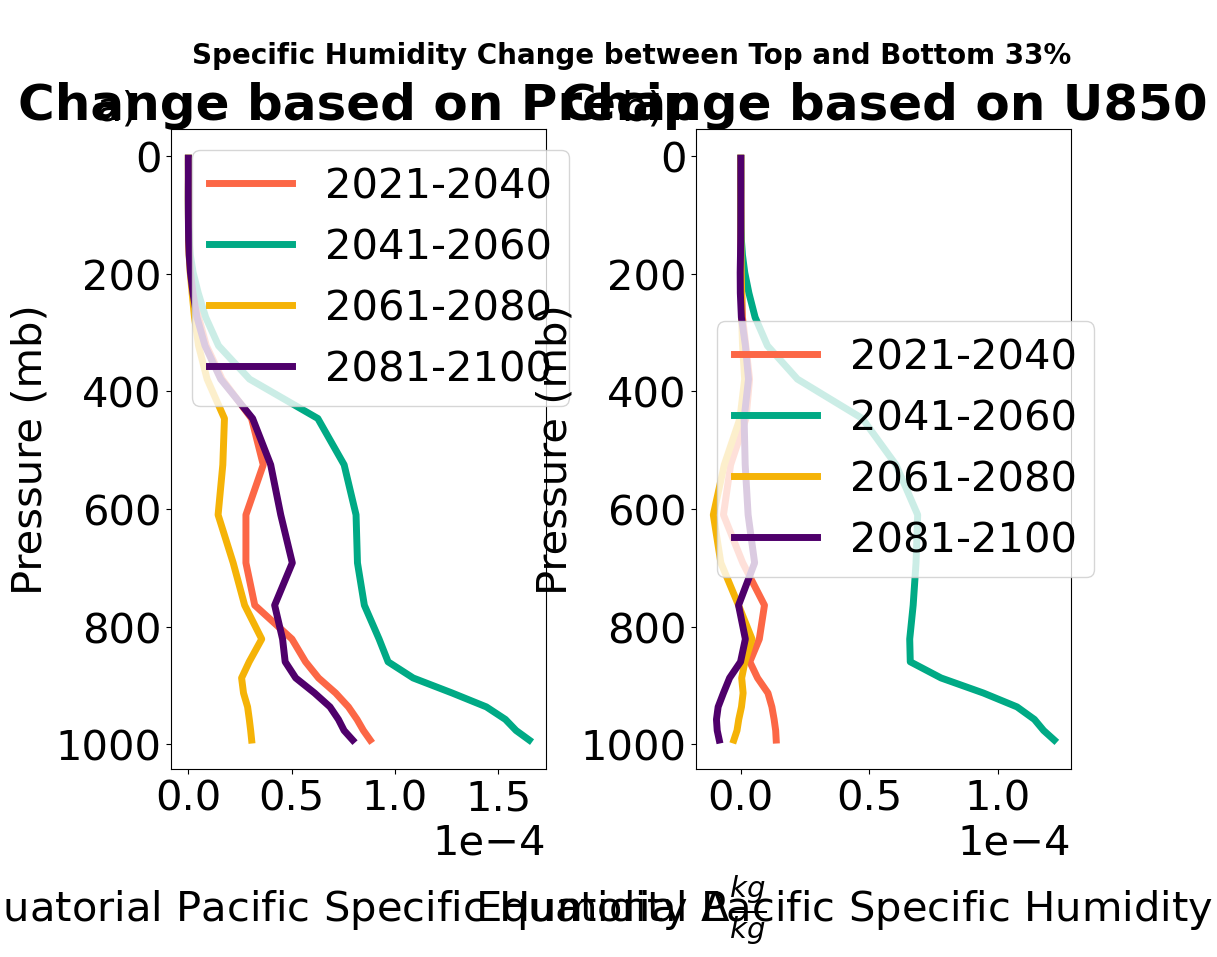

In [42]:
#Plot Profile
#Figure format
plt.figure(figsize=(10.,8.),facecolor='white')
plt.suptitle('\nSpecific Humidity Change between Top and Bottom 33%',x=0.56,y=1.45,weight='bold', fontsize=20)

#Subplot 
ax1 = plt.subplot(121)
#Plot the Profiles
#SHQ_All_Ensembles_The_Season_past_CP.mean("Ensemble").plot.line("k", y='lev',label=str(First_to_Last_Time_Period_Past))
SHQ_All_Ensembles_The_Season_mean_DP1_ch_pos66_minus_neg33_my_wPRC_CP.plot.line("#fc6746", y='lev',label=str(First_to_Last_Time_Period_DP1), linewidth=5)
SHQ_All_Ensembles_The_Season_mean_DP2_ch_pos66_minus_neg33_my_wPRC_CP.plot.line("#00aa85", y='lev',label=str(First_to_Last_Time_Period_DP2), linewidth=5)
SHQ_All_Ensembles_The_Season_mean_DP3_ch_pos66_minus_neg33_my_wPRC_CP.plot.line("#f5b307", y='lev',label=str(First_to_Last_Time_Period_DP3), linewidth=5)
SHQ_All_Ensembles_The_Season_mean_DP4_ch_pos66_minus_neg33_my_wPRC_CP.plot.line("#4f006b", y='lev',label=str(First_to_Last_Time_Period_DP4), linewidth=5)
#invert the y axis for pressure
plt.gca().invert_yaxis()
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.legend()
plt.ylabel('Pressure (mb)')
plt.xlabel('\n'+str(Tropical_Ocean_SHQ_Name)+' Specific Humidity'+r' Δ$\frac{kg}{kg}$')
plt.title("Change based on Precip",fontweight="bold")
ax1.text(-0.2, 1.0, 'a)', transform=ax1.transAxes , fontsize='medium', va='bottom')

ax2 = plt.subplot(122)
#SHQ_All_Ensembles_The_Season_past_CP.mean("Ensemble").plot.line("k", y='lev',label=str(First_to_Last_Time_Period_Past))
SHQ_All_Ensembles_The_Season_mean_DP1_ch_pos66_minus_neg33_my_wU850_CP.plot.line("#fc6746", y='lev',label=str(First_to_Last_Time_Period_DP1), linewidth=5)
SHQ_All_Ensembles_The_Season_mean_DP2_ch_pos66_minus_neg33_my_wU850_CP.plot.line("#00aa85", y='lev',label=str(First_to_Last_Time_Period_DP2), linewidth=5)
SHQ_All_Ensembles_The_Season_mean_DP3_ch_pos66_minus_neg33_my_wU850_CP.plot.line("#f5b307", y='lev',label=str(First_to_Last_Time_Period_DP3), linewidth=5)
SHQ_All_Ensembles_The_Season_mean_DP4_ch_pos66_minus_neg33_my_wU850_CP.plot.line("#4f006b", y='lev',label=str(First_to_Last_Time_Period_DP4), linewidth=5)
plt.gca().invert_yaxis()
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.legend()
plt.ylabel('Pressure (mb)')
plt.xlabel('\n'+str(Tropical_Ocean_SHQ_Name)+' Specific Humidity'+r' Δ$\frac{kg}{kg}$')
plt.title("Change based on U850",fontweight="bold")
ax2.text(-0.2, 1.0, 'b)', transform=ax2.transAxes , fontsize='medium', va='bottom')
plt.rcParams.update({'font.size': 15})

plt.subplots_adjust(left=0.1, bottom=0.5, right=1, top=1.3, wspace=0.4, hspace=0.5)



# 

# 

# 

# 

# 

In [43]:
#Slice and average the horizonal spatial domain SHQ for the Equotorial Pacific for each member
SHQ_All_Ensembles_The_Season_mean_DP1_ch_EqP=SHQ_All_Ensembles_The_Season_mean_DP1_ch.loc[dict(lon=slice(Tropical_Ocean_SHQ_Lon_1,Tropical_Ocean_SHQ_Lon_2))].loc[dict(lat=slice(Tropical_Ocean_SHQ_Lat_1,Tropical_Ocean_SHQ_Lat_2))].mean(["lat","lon"])
SHQ_All_Ensembles_The_Season_mean_DP2_ch_EqP=SHQ_All_Ensembles_The_Season_mean_DP2_ch.loc[dict(lon=slice(Tropical_Ocean_SHQ_Lon_1,Tropical_Ocean_SHQ_Lon_2))].loc[dict(lat=slice(Tropical_Ocean_SHQ_Lat_1,Tropical_Ocean_SHQ_Lat_2))].mean(["lat","lon"])
SHQ_All_Ensembles_The_Season_mean_DP3_ch_EqP=SHQ_All_Ensembles_The_Season_mean_DP3_ch.loc[dict(lon=slice(Tropical_Ocean_SHQ_Lon_1,Tropical_Ocean_SHQ_Lon_2))].loc[dict(lat=slice(Tropical_Ocean_SHQ_Lat_1,Tropical_Ocean_SHQ_Lat_2))].mean(["lat","lon"])
SHQ_All_Ensembles_The_Season_mean_DP4_ch_EqP=SHQ_All_Ensembles_The_Season_mean_DP4_ch.loc[dict(lon=slice(Tropical_Ocean_SHQ_Lon_1,Tropical_Ocean_SHQ_Lon_2))].loc[dict(lat=slice(Tropical_Ocean_SHQ_Lat_1,Tropical_Ocean_SHQ_Lat_2))].mean(["lat","lon"])

#Average the vertical spatial domain for lower troposphere
SHQ_All_Ensembles_The_Season_mean_DP1_ch_EqP_LowT=SHQ_All_Ensembles_The_Season_mean_DP1_ch_EqP.loc[dict(lev=slice(Tropical_Ocean_SHQ_Lev_1,Tropical_Ocean_SHQ_Lev_2))].mean(["lev"])
SHQ_All_Ensembles_The_Season_mean_DP2_ch_EqP_LowT=SHQ_All_Ensembles_The_Season_mean_DP2_ch_EqP.loc[dict(lev=slice(Tropical_Ocean_SHQ_Lev_1,Tropical_Ocean_SHQ_Lev_2))].mean(["lev"])
SHQ_All_Ensembles_The_Season_mean_DP3_ch_EqP_LowT=SHQ_All_Ensembles_The_Season_mean_DP3_ch_EqP.loc[dict(lev=slice(Tropical_Ocean_SHQ_Lev_1,Tropical_Ocean_SHQ_Lev_2))].mean(["lev"])
SHQ_All_Ensembles_The_Season_mean_DP4_ch_EqP_LowT=SHQ_All_Ensembles_The_Season_mean_DP4_ch_EqP.loc[dict(lev=slice(Tropical_Ocean_SHQ_Lev_1,Tropical_Ocean_SHQ_Lev_2))].mean(["lev"])

#Average the vertical spatial domain for middle troposphere
SHQ_All_Ensembles_The_Season_mean_DP1_ch_EqP_MidT=SHQ_All_Ensembles_The_Season_mean_DP1_ch_EqP.loc[dict(lev=slice(Tropical_Ocean_SHQ_Lev_3,Tropical_Ocean_SHQ_Lev_4))].mean(["lev"])
SHQ_All_Ensembles_The_Season_mean_DP2_ch_EqP_MidT=SHQ_All_Ensembles_The_Season_mean_DP2_ch_EqP.loc[dict(lev=slice(Tropical_Ocean_SHQ_Lev_3,Tropical_Ocean_SHQ_Lev_4))].mean(["lev"])
SHQ_All_Ensembles_The_Season_mean_DP3_ch_EqP_MidT=SHQ_All_Ensembles_The_Season_mean_DP3_ch_EqP.loc[dict(lev=slice(Tropical_Ocean_SHQ_Lev_3,Tropical_Ocean_SHQ_Lev_4))].mean(["lev"])
SHQ_All_Ensembles_The_Season_mean_DP4_ch_EqP_MidT=SHQ_All_Ensembles_The_Season_mean_DP4_ch_EqP.loc[dict(lev=slice(Tropical_Ocean_SHQ_Lev_3,Tropical_Ocean_SHQ_Lev_4))].mean(["lev"])

#Difference between the lower troposphere and middle troposphere for vertical gradient
SHQ_All_Ensembles_The_Season_mean_DP1_ch_EqP_Tro_grd = SHQ_All_Ensembles_The_Season_mean_DP1_ch_EqP_LowT - SHQ_All_Ensembles_The_Season_mean_DP1_ch_EqP_MidT
SHQ_All_Ensembles_The_Season_mean_DP2_ch_EqP_Tro_grd = SHQ_All_Ensembles_The_Season_mean_DP2_ch_EqP_LowT - SHQ_All_Ensembles_The_Season_mean_DP2_ch_EqP_MidT
SHQ_All_Ensembles_The_Season_mean_DP3_ch_EqP_Tro_grd = SHQ_All_Ensembles_The_Season_mean_DP3_ch_EqP_LowT - SHQ_All_Ensembles_The_Season_mean_DP3_ch_EqP_MidT
SHQ_All_Ensembles_The_Season_mean_DP4_ch_EqP_Tro_grd = SHQ_All_Ensembles_The_Season_mean_DP4_ch_EqP_LowT - SHQ_All_Ensembles_The_Season_mean_DP4_ch_EqP_MidT


In [44]:
#Load the data
SHQ_All_Ensembles_The_Season_mean_DP1_ch_EqP_LowT = SHQ_All_Ensembles_The_Season_mean_DP1_ch_EqP_LowT.load()
SHQ_All_Ensembles_The_Season_mean_DP2_ch_EqP_LowT = SHQ_All_Ensembles_The_Season_mean_DP2_ch_EqP_LowT.load()
SHQ_All_Ensembles_The_Season_mean_DP3_ch_EqP_LowT = SHQ_All_Ensembles_The_Season_mean_DP3_ch_EqP_LowT.load()
SHQ_All_Ensembles_The_Season_mean_DP4_ch_EqP_LowT = SHQ_All_Ensembles_The_Season_mean_DP4_ch_EqP_LowT.load()


SHQ_All_Ensembles_The_Season_mean_DP1_ch_EqP_Tro_grd = SHQ_All_Ensembles_The_Season_mean_DP1_ch_EqP_Tro_grd.load()
SHQ_All_Ensembles_The_Season_mean_DP2_ch_EqP_Tro_grd = SHQ_All_Ensembles_The_Season_mean_DP2_ch_EqP_Tro_grd.load()
SHQ_All_Ensembles_The_Season_mean_DP3_ch_EqP_Tro_grd = SHQ_All_Ensembles_The_Season_mean_DP3_ch_EqP_Tro_grd.load()
SHQ_All_Ensembles_The_Season_mean_DP4_ch_EqP_Tro_grd = SHQ_All_Ensembles_The_Season_mean_DP4_ch_EqP_Tro_grd.load()


In [ ]:
#Linear Regression Analysis for lower troposphere

#dependent variable
SHQ_All_Ensembles_The_Season_mean_DP1_EqP_LowT_xprime=SHQ_All_Ensembles_The_Season_mean_DP1_ch_EqP_LowT-np.nanmean(SHQ_All_Ensembles_The_Season_mean_DP1_ch_EqP_LowT,axis=0)
#independent variable
U850_All_Ensembles_SP_DP1_ET_yprime=U850_All_Ensembles_The_Season_std_DP1_ch_ET-np.nanmean(U850_All_Ensembles_The_Season_std_DP1_ch_ET,axis=0)
#Regression Coefficient
SHQ_LowT_U850_ET_All_Ensembles_SP_DP1_a1=np.nanmean(SHQ_All_Ensembles_The_Season_mean_DP1_EqP_LowT_xprime*U850_All_Ensembles_SP_DP1_ET_yprime)/np.nanmean(SHQ_All_Ensembles_The_Season_mean_DP1_EqP_LowT_xprime**2)
#correlation coefficient
SHQ_LowT_U850_ET_All_Ensembles_SP_DP1_r=SHQ_LowT_U850_ET_All_Ensembles_SP_DP1_a1*(np.nanstd(SHQ_All_Ensembles_The_Season_mean_DP1_EqP_LowT_xprime)/np.nanstd(U850_All_Ensembles_SP_DP1_ET_yprime))
#variance explained, y-intercept, and linear line of best fit
SHQ_LowT_U850_ET_All_Ensembles_SP_DP1_r_sqr=SHQ_LowT_U850_ET_All_Ensembles_SP_DP1_r**2
SHQ_LowT_U850_ET_All_Ensembles_SP_DP1_a0=np.nanmean(U850_All_Ensembles_The_Season_std_DP1_ch_ET,axis=0)-(SHQ_LowT_U850_ET_All_Ensembles_SP_DP1_a1*np.nanmean(SHQ_All_Ensembles_The_Season_mean_DP1_ch_EqP_LowT))
SHQ_LowT_U850_ET_All_Ensembles_SP_DP1_yline = SHQ_LowT_U850_ET_All_Ensembles_SP_DP1_a0+(SHQ_LowT_U850_ET_All_Ensembles_SP_DP1_a1*SHQ_All_Ensembles_The_Season_mean_DP1_ch_EqP_LowT)


#dependent variable
SHQ_All_Ensembles_The_Season_mean_DP1_EqP_LowT_xprime=SHQ_All_Ensembles_The_Season_mean_DP1_ch_EqP_LowT-np.nanmean(SHQ_All_Ensembles_The_Season_mean_DP1_ch_EqP_LowT,axis=0)
#independent variable
PRC_All_Ensembles_SP_DP1_ET_yprime=PRC_All_Ensembles_The_Season_std_DP1_ch_ET-np.nanmean(PRC_All_Ensembles_The_Season_std_DP1_ch_ET,axis=0)
#Regression Coefficient
SHQ_LowT_PRC_ET_All_Ensembles_SP_DP1_a1=np.nanmean(SHQ_All_Ensembles_The_Season_mean_DP1_EqP_LowT_xprime*PRC_All_Ensembles_SP_DP1_ET_yprime)/np.nanmean(SHQ_All_Ensembles_The_Season_mean_DP1_EqP_LowT_xprime**2)
#correlation coefficient
SHQ_LowT_PRC_ET_All_Ensembles_SP_DP1_r=SHQ_LowT_PRC_ET_All_Ensembles_SP_DP1_a1*(np.nanstd(SHQ_All_Ensembles_The_Season_mean_DP1_EqP_LowT_xprime)/np.nanstd(PRC_All_Ensembles_SP_DP1_ET_yprime))
#variance explained, y-intercept, and linear line of best fit
SHQ_LowT_PRC_ET_All_Ensembles_SP_DP1_r_sqr=SHQ_LowT_PRC_ET_All_Ensembles_SP_DP1_r**2
SHQ_LowT_PRC_ET_All_Ensembles_SP_DP1_a0=np.nanmean(PRC_All_Ensembles_The_Season_std_DP1_ch_ET,axis=0)-(SHQ_LowT_PRC_ET_All_Ensembles_SP_DP1_a1*np.nanmean(SHQ_All_Ensembles_The_Season_mean_DP1_ch_EqP_LowT))
SHQ_LowT_PRC_ET_All_Ensembles_SP_DP1_yline = SHQ_LowT_PRC_ET_All_Ensembles_SP_DP1_a0+(SHQ_LowT_PRC_ET_All_Ensembles_SP_DP1_a1*SHQ_All_Ensembles_The_Season_mean_DP1_ch_EqP_LowT)


#dependent variable
SHQ_All_Ensembles_The_Season_mean_DP2_EqP_LowT_xprime=SHQ_All_Ensembles_The_Season_mean_DP2_ch_EqP_LowT-np.nanmean(SHQ_All_Ensembles_The_Season_mean_DP2_ch_EqP_LowT,axis=0)
#independent variable
U850_All_Ensembles_SP_DP2_ET_yprime=U850_All_Ensembles_The_Season_std_DP2_ch_ET-np.nanmean(U850_All_Ensembles_The_Season_std_DP2_ch_ET,axis=0)
#Regression Coefficient
SHQ_LowT_U850_ET_All_Ensembles_SP_DP2_a1=np.nanmean(SHQ_All_Ensembles_The_Season_mean_DP2_EqP_LowT_xprime*U850_All_Ensembles_SP_DP2_ET_yprime)/np.nanmean(SHQ_All_Ensembles_The_Season_mean_DP2_EqP_LowT_xprime**2)
#correlation coefficient
SHQ_LowT_U850_ET_All_Ensembles_SP_DP2_r=SHQ_LowT_U850_ET_All_Ensembles_SP_DP2_a1*(np.nanstd(SHQ_All_Ensembles_The_Season_mean_DP2_EqP_LowT_xprime)/np.nanstd(U850_All_Ensembles_SP_DP2_ET_yprime))
#variance explained, y-intercept, and linear line of best fit
SHQ_LowT_U850_ET_All_Ensembles_SP_DP2_r_sqr=SHQ_LowT_U850_ET_All_Ensembles_SP_DP2_r**2
SHQ_LowT_U850_ET_All_Ensembles_SP_DP2_a0=np.nanmean(U850_All_Ensembles_The_Season_std_DP2_ch_ET,axis=0)-(SHQ_LowT_U850_ET_All_Ensembles_SP_DP2_a1*np.nanmean(SHQ_All_Ensembles_The_Season_mean_DP2_ch_EqP_LowT))
SHQ_LowT_U850_ET_All_Ensembles_SP_DP2_yline = SHQ_LowT_U850_ET_All_Ensembles_SP_DP2_a0+(SHQ_LowT_U850_ET_All_Ensembles_SP_DP2_a1*SHQ_All_Ensembles_The_Season_mean_DP2_ch_EqP_LowT)


#dependent variable
SHQ_All_Ensembles_The_Season_mean_DP2_EqP_LowT_xprime=SHQ_All_Ensembles_The_Season_mean_DP2_ch_EqP_LowT-np.nanmean(SHQ_All_Ensembles_The_Season_mean_DP2_ch_EqP_LowT,axis=0)
#independent variable
PRC_All_Ensembles_SP_DP2_ET_yprime=PRC_All_Ensembles_The_Season_std_DP2_ch_ET-np.nanmean(PRC_All_Ensembles_The_Season_std_DP2_ch_ET,axis=0)
#Regression Coefficient
SHQ_LowT_PRC_ET_All_Ensembles_SP_DP2_a1=np.nanmean(SHQ_All_Ensembles_The_Season_mean_DP2_EqP_LowT_xprime*PRC_All_Ensembles_SP_DP2_ET_yprime)/np.nanmean(SHQ_All_Ensembles_The_Season_mean_DP2_EqP_LowT_xprime**2)
#correlation coefficient
SHQ_LowT_PRC_ET_All_Ensembles_SP_DP2_r=SHQ_LowT_PRC_ET_All_Ensembles_SP_DP2_a1*(np.nanstd(SHQ_All_Ensembles_The_Season_mean_DP2_EqP_LowT_xprime)/np.nanstd(PRC_All_Ensembles_SP_DP2_ET_yprime))
#variance explained, y-intercept, and linear line of best fit
SHQ_LowT_PRC_ET_All_Ensembles_SP_DP2_r_sqr=SHQ_LowT_PRC_ET_All_Ensembles_SP_DP2_r**2
SHQ_LowT_PRC_ET_All_Ensembles_SP_DP2_a0=np.nanmean(PRC_All_Ensembles_The_Season_std_DP2_ch_ET,axis=0)-(SHQ_LowT_PRC_ET_All_Ensembles_SP_DP2_a1*np.nanmean(SHQ_All_Ensembles_The_Season_mean_DP2_ch_EqP_LowT))
SHQ_LowT_PRC_ET_All_Ensembles_SP_DP2_yline = SHQ_LowT_PRC_ET_All_Ensembles_SP_DP2_a0+(SHQ_LowT_PRC_ET_All_Ensembles_SP_DP2_a1*SHQ_All_Ensembles_The_Season_mean_DP2_ch_EqP_LowT)

#dependent variable
SHQ_All_Ensembles_The_Season_mean_DP3_EqP_LowT_xprime=SHQ_All_Ensembles_The_Season_mean_DP3_ch_EqP_LowT-np.nanmean(SHQ_All_Ensembles_The_Season_mean_DP3_ch_EqP_LowT,axis=0)
#independent variable
U850_All_Ensembles_SP_DP3_ET_yprime=U850_All_Ensembles_The_Season_std_DP3_ch_ET-np.nanmean(U850_All_Ensembles_The_Season_std_DP3_ch_ET,axis=0)
#Regression Coefficient
SHQ_LowT_U850_ET_All_Ensembles_SP_DP3_a1=np.nanmean(SHQ_All_Ensembles_The_Season_mean_DP3_EqP_LowT_xprime*U850_All_Ensembles_SP_DP3_ET_yprime)/np.nanmean(SHQ_All_Ensembles_The_Season_mean_DP3_EqP_LowT_xprime**2)
#correlation coefficient
SHQ_LowT_U850_ET_All_Ensembles_SP_DP3_r=SHQ_LowT_U850_ET_All_Ensembles_SP_DP3_a1*(np.nanstd(SHQ_All_Ensembles_The_Season_mean_DP3_EqP_LowT_xprime)/np.nanstd(U850_All_Ensembles_SP_DP3_ET_yprime))
#variance explained, y-intercept, and linear line of best fit
SHQ_LowT_U850_ET_All_Ensembles_SP_DP3_r_sqr=SHQ_LowT_U850_ET_All_Ensembles_SP_DP3_r**2
SHQ_LowT_U850_ET_All_Ensembles_SP_DP3_a0=np.nanmean(U850_All_Ensembles_The_Season_std_DP3_ch_ET,axis=0)-(SHQ_LowT_U850_ET_All_Ensembles_SP_DP3_a1*np.nanmean(SHQ_All_Ensembles_The_Season_mean_DP3_ch_EqP_LowT))
SHQ_LowT_U850_ET_All_Ensembles_SP_DP3_yline = SHQ_LowT_U850_ET_All_Ensembles_SP_DP3_a0+(SHQ_LowT_U850_ET_All_Ensembles_SP_DP3_a1*SHQ_All_Ensembles_The_Season_mean_DP3_ch_EqP_LowT)


#dependent variable
SHQ_All_Ensembles_The_Season_mean_DP3_EqP_LowT_xprime=SHQ_All_Ensembles_The_Season_mean_DP3_ch_EqP_LowT-np.nanmean(SHQ_All_Ensembles_The_Season_mean_DP3_ch_EqP_LowT,axis=0)
#independent variable
PRC_All_Ensembles_SP_DP3_ET_yprime=PRC_All_Ensembles_The_Season_std_DP3_ch_ET-np.nanmean(PRC_All_Ensembles_The_Season_std_DP3_ch_ET,axis=0)
#Regression Coefficient
SHQ_LowT_PRC_ET_All_Ensembles_SP_DP3_a1=np.nanmean(SHQ_All_Ensembles_The_Season_mean_DP3_EqP_LowT_xprime*PRC_All_Ensembles_SP_DP3_ET_yprime)/np.nanmean(SHQ_All_Ensembles_The_Season_mean_DP3_EqP_LowT_xprime**2)
#correlation coefficient
SHQ_LowT_PRC_ET_All_Ensembles_SP_DP3_r=SHQ_LowT_PRC_ET_All_Ensembles_SP_DP3_a1*(np.nanstd(SHQ_All_Ensembles_The_Season_mean_DP3_EqP_LowT_xprime)/np.nanstd(PRC_All_Ensembles_SP_DP3_ET_yprime))
#variance explained, y-intercept, and linear line of best fit
SHQ_LowT_PRC_ET_All_Ensembles_SP_DP3_r_sqr=SHQ_LowT_PRC_ET_All_Ensembles_SP_DP3_r**2
SHQ_LowT_PRC_ET_All_Ensembles_SP_DP3_a0=np.nanmean(PRC_All_Ensembles_The_Season_std_DP3_ch_ET,axis=0)-(SHQ_LowT_PRC_ET_All_Ensembles_SP_DP3_a1*np.nanmean(SHQ_All_Ensembles_The_Season_mean_DP3_ch_EqP_LowT))
SHQ_LowT_PRC_ET_All_Ensembles_SP_DP3_yline = SHQ_LowT_PRC_ET_All_Ensembles_SP_DP3_a0+(SHQ_LowT_PRC_ET_All_Ensembles_SP_DP3_a1*SHQ_All_Ensembles_The_Season_mean_DP3_ch_EqP_LowT)

#dependent variable
SHQ_All_Ensembles_The_Season_mean_DP4_EqP_LowT_xprime=SHQ_All_Ensembles_The_Season_mean_DP4_ch_EqP_LowT-np.nanmean(SHQ_All_Ensembles_The_Season_mean_DP4_ch_EqP_LowT,axis=0)
#independent variable
U850_All_Ensembles_SP_DP4_ET_yprime=U850_All_Ensembles_The_Season_std_DP4_ch_ET-np.nanmean(U850_All_Ensembles_The_Season_std_DP4_ch_ET,axis=0)
#Regression Coefficient
SHQ_LowT_U850_ET_All_Ensembles_SP_DP4_a1=np.nanmean(SHQ_All_Ensembles_The_Season_mean_DP4_EqP_LowT_xprime*U850_All_Ensembles_SP_DP4_ET_yprime)/np.nanmean(SHQ_All_Ensembles_The_Season_mean_DP4_EqP_LowT_xprime**2)
#correlation coefficient
SHQ_LowT_U850_ET_All_Ensembles_SP_DP4_r=SHQ_LowT_U850_ET_All_Ensembles_SP_DP4_a1*(np.nanstd(SHQ_All_Ensembles_The_Season_mean_DP4_EqP_LowT_xprime)/np.nanstd(U850_All_Ensembles_SP_DP4_ET_yprime))
#variance explained, y-intercept, and linear line of best fit
SHQ_LowT_U850_ET_All_Ensembles_SP_DP4_r_sqr=SHQ_LowT_U850_ET_All_Ensembles_SP_DP4_r**2
SHQ_LowT_U850_ET_All_Ensembles_SP_DP4_a0=np.nanmean(U850_All_Ensembles_The_Season_std_DP4_ch_ET,axis=0)-(SHQ_LowT_U850_ET_All_Ensembles_SP_DP4_a1*np.nanmean(SHQ_All_Ensembles_The_Season_mean_DP4_ch_EqP_LowT))
SHQ_LowT_U850_ET_All_Ensembles_SP_DP4_yline = SHQ_LowT_U850_ET_All_Ensembles_SP_DP4_a0+(SHQ_LowT_U850_ET_All_Ensembles_SP_DP4_a1*SHQ_All_Ensembles_The_Season_mean_DP4_ch_EqP_LowT)


#dependent variable
SHQ_All_Ensembles_The_Season_mean_DP4_EqP_LowT_xprime=SHQ_All_Ensembles_The_Season_mean_DP4_ch_EqP_LowT-np.nanmean(SHQ_All_Ensembles_The_Season_mean_DP4_ch_EqP_LowT,axis=0)
#independent variable
PRC_All_Ensembles_SP_DP4_ET_yprime=PRC_All_Ensembles_The_Season_std_DP4_ch_ET-np.nanmean(PRC_All_Ensembles_The_Season_std_DP4_ch_ET,axis=0)
#Regression Coefficient
SHQ_LowT_PRC_ET_All_Ensembles_SP_DP4_a1=np.nanmean(SHQ_All_Ensembles_The_Season_mean_DP4_EqP_LowT_xprime*PRC_All_Ensembles_SP_DP4_ET_yprime)/np.nanmean(SHQ_All_Ensembles_The_Season_mean_DP4_EqP_LowT_xprime**2)
#correlation coefficient
SHQ_LowT_PRC_ET_All_Ensembles_SP_DP4_r=SHQ_LowT_PRC_ET_All_Ensembles_SP_DP4_a1*(np.nanstd(SHQ_All_Ensembles_The_Season_mean_DP4_EqP_LowT_xprime)/np.nanstd(PRC_All_Ensembles_SP_DP4_ET_yprime))
#variance explained, y-intercept, and linear line of best fit
SHQ_LowT_PRC_ET_All_Ensembles_SP_DP4_r_sqr=SHQ_LowT_PRC_ET_All_Ensembles_SP_DP4_r**2
SHQ_LowT_PRC_ET_All_Ensembles_SP_DP4_a0=np.nanmean(PRC_All_Ensembles_The_Season_std_DP4_ch_ET,axis=0)-(SHQ_LowT_PRC_ET_All_Ensembles_SP_DP4_a1*np.nanmean(SHQ_All_Ensembles_The_Season_mean_DP4_ch_EqP_LowT))
SHQ_LowT_PRC_ET_All_Ensembles_SP_DP4_yline = SHQ_LowT_PRC_ET_All_Ensembles_SP_DP4_a0+(SHQ_LowT_PRC_ET_All_Ensembles_SP_DP4_a1*SHQ_All_Ensembles_The_Season_mean_DP4_ch_EqP_LowT)



In [ ]:
#Linear Regression for vertical gradient

#dependent variable
SHQ_All_Ensembles_The_Season_mean_DP1_EqP_Tro_grd_xprime=SHQ_All_Ensembles_The_Season_mean_DP1_ch_EqP_Tro_grd-np.nanmean(SHQ_All_Ensembles_The_Season_mean_DP1_ch_EqP_Tro_grd,axis=0)
#independent variable
U850_All_Ensembles_SP_DP1_ET_yprime=U850_All_Ensembles_The_Season_std_DP1_ch_ET-np.nanmean(U850_All_Ensembles_The_Season_std_DP1_ch_ET,axis=0)
#Regression Coefficient
SHQ_Tro_grd_U850_ET_All_Ensembles_SP_DP1_a1=np.nanmean(SHQ_All_Ensembles_The_Season_mean_DP1_EqP_Tro_grd_xprime*U850_All_Ensembles_SP_DP1_ET_yprime)/np.nanmean(SHQ_All_Ensembles_The_Season_mean_DP1_EqP_Tro_grd_xprime**2)
#correlation coefficient
SHQ_Tro_grd_U850_ET_All_Ensembles_SP_DP1_r=SHQ_Tro_grd_U850_ET_All_Ensembles_SP_DP1_a1*(np.nanstd(SHQ_All_Ensembles_The_Season_mean_DP1_EqP_Tro_grd_xprime)/np.nanstd(U850_All_Ensembles_SP_DP1_ET_yprime))
#variance explained, y-intercept, and linear line of best fit
SHQ_Tro_grd_U850_ET_All_Ensembles_SP_DP1_r_sqr=SHQ_Tro_grd_U850_ET_All_Ensembles_SP_DP1_r**2
SHQ_Tro_grd_U850_ET_All_Ensembles_SP_DP1_a0=np.nanmean(U850_All_Ensembles_The_Season_std_DP1_ch_ET,axis=0)-(SHQ_Tro_grd_U850_ET_All_Ensembles_SP_DP1_a1*np.nanmean(SHQ_All_Ensembles_The_Season_mean_DP1_ch_EqP_Tro_grd))
SHQ_Tro_grd_U850_ET_All_Ensembles_SP_DP1_yline = SHQ_Tro_grd_U850_ET_All_Ensembles_SP_DP1_a0+(SHQ_Tro_grd_U850_ET_All_Ensembles_SP_DP1_a1*SHQ_All_Ensembles_The_Season_mean_DP1_ch_EqP_Tro_grd)


#dependent variable
SHQ_All_Ensembles_The_Season_mean_DP1_EqP_Tro_grd_xprime=SHQ_All_Ensembles_The_Season_mean_DP1_ch_EqP_Tro_grd-np.nanmean(SHQ_All_Ensembles_The_Season_mean_DP1_ch_EqP_Tro_grd,axis=0)
#independent variable
PRC_All_Ensembles_SP_DP1_ET_yprime=PRC_All_Ensembles_The_Season_std_DP1_ch_ET-np.nanmean(PRC_All_Ensembles_The_Season_std_DP1_ch_ET,axis=0)
#Regression Coefficient
SHQ_Tro_grd_PRC_ET_All_Ensembles_SP_DP1_a1=np.nanmean(SHQ_All_Ensembles_The_Season_mean_DP1_EqP_Tro_grd_xprime*PRC_All_Ensembles_SP_DP1_ET_yprime)/np.nanmean(SHQ_All_Ensembles_The_Season_mean_DP1_EqP_Tro_grd_xprime**2)
#correlation coefficient
SHQ_Tro_grd_PRC_ET_All_Ensembles_SP_DP1_r=SHQ_Tro_grd_PRC_ET_All_Ensembles_SP_DP1_a1*(np.nanstd(SHQ_All_Ensembles_The_Season_mean_DP1_EqP_Tro_grd_xprime)/np.nanstd(PRC_All_Ensembles_SP_DP1_ET_yprime))
#variance explained, y-intercept, and linear line of best fit
SHQ_Tro_grd_PRC_ET_All_Ensembles_SP_DP1_r_sqr=SHQ_Tro_grd_PRC_ET_All_Ensembles_SP_DP1_r**2
SHQ_Tro_grd_PRC_ET_All_Ensembles_SP_DP1_a0=np.nanmean(PRC_All_Ensembles_The_Season_std_DP1_ch_ET,axis=0)-(SHQ_Tro_grd_PRC_ET_All_Ensembles_SP_DP1_a1*np.nanmean(SHQ_All_Ensembles_The_Season_mean_DP1_ch_EqP_Tro_grd))
SHQ_Tro_grd_PRC_ET_All_Ensembles_SP_DP1_yline = SHQ_Tro_grd_PRC_ET_All_Ensembles_SP_DP1_a0+(SHQ_Tro_grd_PRC_ET_All_Ensembles_SP_DP1_a1*SHQ_All_Ensembles_The_Season_mean_DP1_ch_EqP_Tro_grd)


#dependent variable
SHQ_All_Ensembles_The_Season_mean_DP2_EqP_Tro_grd_xprime=SHQ_All_Ensembles_The_Season_mean_DP2_ch_EqP_Tro_grd-np.nanmean(SHQ_All_Ensembles_The_Season_mean_DP2_ch_EqP_Tro_grd,axis=0)
#independent variable
U850_All_Ensembles_SP_DP2_ET_yprime=U850_All_Ensembles_The_Season_std_DP2_ch_ET-np.nanmean(U850_All_Ensembles_The_Season_std_DP2_ch_ET,axis=0)
#Regression Coefficient
SHQ_Tro_grd_U850_ET_All_Ensembles_SP_DP2_a1=np.nanmean(SHQ_All_Ensembles_The_Season_mean_DP2_EqP_Tro_grd_xprime*U850_All_Ensembles_SP_DP2_ET_yprime)/np.nanmean(SHQ_All_Ensembles_The_Season_mean_DP2_EqP_Tro_grd_xprime**2)
#correlation coefficient
SHQ_Tro_grd_U850_ET_All_Ensembles_SP_DP2_r=SHQ_Tro_grd_U850_ET_All_Ensembles_SP_DP2_a1*(np.nanstd(SHQ_All_Ensembles_The_Season_mean_DP2_EqP_Tro_grd_xprime)/np.nanstd(U850_All_Ensembles_SP_DP2_ET_yprime))
#variance explained, y-intercept, and linear line of best fit
SHQ_Tro_grd_U850_ET_All_Ensembles_SP_DP2_r_sqr=SHQ_Tro_grd_U850_ET_All_Ensembles_SP_DP2_r**2
SHQ_Tro_grd_U850_ET_All_Ensembles_SP_DP2_a0=np.nanmean(U850_All_Ensembles_The_Season_std_DP2_ch_ET,axis=0)-(SHQ_Tro_grd_U850_ET_All_Ensembles_SP_DP2_a1*np.nanmean(SHQ_All_Ensembles_The_Season_mean_DP2_ch_EqP_Tro_grd))
SHQ_Tro_grd_U850_ET_All_Ensembles_SP_DP2_yline = SHQ_Tro_grd_U850_ET_All_Ensembles_SP_DP2_a0+(SHQ_Tro_grd_U850_ET_All_Ensembles_SP_DP2_a1*SHQ_All_Ensembles_The_Season_mean_DP2_ch_EqP_Tro_grd)


#dependent variable
SHQ_All_Ensembles_The_Season_mean_DP2_EqP_Tro_grd_xprime=SHQ_All_Ensembles_The_Season_mean_DP2_ch_EqP_Tro_grd-np.nanmean(SHQ_All_Ensembles_The_Season_mean_DP2_ch_EqP_Tro_grd,axis=0)
#independent variable
PRC_All_Ensembles_SP_DP2_ET_yprime=PRC_All_Ensembles_The_Season_std_DP2_ch_ET-np.nanmean(PRC_All_Ensembles_The_Season_std_DP2_ch_ET,axis=0)
#Regression Coefficient
SHQ_Tro_grd_PRC_ET_All_Ensembles_SP_DP2_a1=np.nanmean(SHQ_All_Ensembles_The_Season_mean_DP2_EqP_Tro_grd_xprime*PRC_All_Ensembles_SP_DP2_ET_yprime)/np.nanmean(SHQ_All_Ensembles_The_Season_mean_DP2_EqP_Tro_grd_xprime**2)
#correlation coefficient
SHQ_Tro_grd_PRC_ET_All_Ensembles_SP_DP2_r=SHQ_Tro_grd_PRC_ET_All_Ensembles_SP_DP2_a1*(np.nanstd(SHQ_All_Ensembles_The_Season_mean_DP2_EqP_Tro_grd_xprime)/np.nanstd(PRC_All_Ensembles_SP_DP2_ET_yprime))
#variance explained, y-intercept, and linear line of best fit
SHQ_Tro_grd_PRC_ET_All_Ensembles_SP_DP2_r_sqr=SHQ_Tro_grd_PRC_ET_All_Ensembles_SP_DP2_r**2
SHQ_Tro_grd_PRC_ET_All_Ensembles_SP_DP2_a0=np.nanmean(PRC_All_Ensembles_The_Season_std_DP2_ch_ET,axis=0)-(SHQ_Tro_grd_PRC_ET_All_Ensembles_SP_DP2_a1*np.nanmean(SHQ_All_Ensembles_The_Season_mean_DP2_ch_EqP_Tro_grd))
SHQ_Tro_grd_PRC_ET_All_Ensembles_SP_DP2_yline = SHQ_Tro_grd_PRC_ET_All_Ensembles_SP_DP2_a0+(SHQ_Tro_grd_PRC_ET_All_Ensembles_SP_DP2_a1*SHQ_All_Ensembles_The_Season_mean_DP2_ch_EqP_Tro_grd)

#dependent variable
SHQ_All_Ensembles_The_Season_mean_DP3_EqP_Tro_grd_xprime=SHQ_All_Ensembles_The_Season_mean_DP3_ch_EqP_Tro_grd-np.nanmean(SHQ_All_Ensembles_The_Season_mean_DP3_ch_EqP_Tro_grd,axis=0)
#independent variable
U850_All_Ensembles_SP_DP3_ET_yprime=U850_All_Ensembles_The_Season_std_DP3_ch_ET-np.nanmean(U850_All_Ensembles_The_Season_std_DP3_ch_ET,axis=0)
#Regression Coefficient
SHQ_Tro_grd_U850_ET_All_Ensembles_SP_DP3_a1=np.nanmean(SHQ_All_Ensembles_The_Season_mean_DP3_EqP_Tro_grd_xprime*U850_All_Ensembles_SP_DP3_ET_yprime)/np.nanmean(SHQ_All_Ensembles_The_Season_mean_DP3_EqP_Tro_grd_xprime**2)
#correlation coefficient
SHQ_Tro_grd_U850_ET_All_Ensembles_SP_DP3_r=SHQ_Tro_grd_U850_ET_All_Ensembles_SP_DP3_a1*(np.nanstd(SHQ_All_Ensembles_The_Season_mean_DP3_EqP_Tro_grd_xprime)/np.nanstd(U850_All_Ensembles_SP_DP3_ET_yprime))
#variance explained, y-intercept, and linear line of best fit
SHQ_Tro_grd_U850_ET_All_Ensembles_SP_DP3_r_sqr=SHQ_Tro_grd_U850_ET_All_Ensembles_SP_DP3_r**2
SHQ_Tro_grd_U850_ET_All_Ensembles_SP_DP3_a0=np.nanmean(U850_All_Ensembles_The_Season_std_DP3_ch_ET,axis=0)-(SHQ_Tro_grd_U850_ET_All_Ensembles_SP_DP3_a1*np.nanmean(SHQ_All_Ensembles_The_Season_mean_DP3_ch_EqP_Tro_grd))
SHQ_Tro_grd_U850_ET_All_Ensembles_SP_DP3_yline = SHQ_Tro_grd_U850_ET_All_Ensembles_SP_DP3_a0+(SHQ_Tro_grd_U850_ET_All_Ensembles_SP_DP3_a1*SHQ_All_Ensembles_The_Season_mean_DP3_ch_EqP_Tro_grd)


#dependent variable
SHQ_All_Ensembles_The_Season_mean_DP3_EqP_Tro_grd_xprime=SHQ_All_Ensembles_The_Season_mean_DP3_ch_EqP_Tro_grd-np.nanmean(SHQ_All_Ensembles_The_Season_mean_DP3_ch_EqP_Tro_grd,axis=0)
#independent variable
PRC_All_Ensembles_SP_DP3_ET_yprime=PRC_All_Ensembles_The_Season_std_DP3_ch_ET-np.nanmean(PRC_All_Ensembles_The_Season_std_DP3_ch_ET,axis=0)
#Regression Coefficient
SHQ_Tro_grd_PRC_ET_All_Ensembles_SP_DP3_a1=np.nanmean(SHQ_All_Ensembles_The_Season_mean_DP3_EqP_Tro_grd_xprime*PRC_All_Ensembles_SP_DP3_ET_yprime)/np.nanmean(SHQ_All_Ensembles_The_Season_mean_DP3_EqP_Tro_grd_xprime**2)
#correlation coefficient
SHQ_Tro_grd_PRC_ET_All_Ensembles_SP_DP3_r=SHQ_Tro_grd_PRC_ET_All_Ensembles_SP_DP3_a1*(np.nanstd(SHQ_All_Ensembles_The_Season_mean_DP3_EqP_Tro_grd_xprime)/np.nanstd(PRC_All_Ensembles_SP_DP3_ET_yprime))
#variance explained, y-intercept, and linear line of best fit
SHQ_Tro_grd_PRC_ET_All_Ensembles_SP_DP3_r_sqr=SHQ_Tro_grd_PRC_ET_All_Ensembles_SP_DP3_r**2
SHQ_Tro_grd_PRC_ET_All_Ensembles_SP_DP3_a0=np.nanmean(PRC_All_Ensembles_The_Season_std_DP3_ch_ET,axis=0)-(SHQ_Tro_grd_PRC_ET_All_Ensembles_SP_DP3_a1*np.nanmean(SHQ_All_Ensembles_The_Season_mean_DP3_ch_EqP_Tro_grd))
SHQ_Tro_grd_PRC_ET_All_Ensembles_SP_DP3_yline = SHQ_Tro_grd_PRC_ET_All_Ensembles_SP_DP3_a0+(SHQ_Tro_grd_PRC_ET_All_Ensembles_SP_DP3_a1*SHQ_All_Ensembles_The_Season_mean_DP3_ch_EqP_Tro_grd)

#dependent variable
SHQ_All_Ensembles_The_Season_mean_DP4_EqP_Tro_grd_xprime=SHQ_All_Ensembles_The_Season_mean_DP4_ch_EqP_Tro_grd-np.nanmean(SHQ_All_Ensembles_The_Season_mean_DP4_ch_EqP_Tro_grd,axis=0)
#independent variable
U850_All_Ensembles_SP_DP4_ET_yprime=U850_All_Ensembles_The_Season_std_DP4_ch_ET-np.nanmean(U850_All_Ensembles_The_Season_std_DP4_ch_ET,axis=0)
#Regression Coefficient
SHQ_Tro_grd_U850_ET_All_Ensembles_SP_DP4_a1=np.nanmean(SHQ_All_Ensembles_The_Season_mean_DP4_EqP_Tro_grd_xprime*U850_All_Ensembles_SP_DP4_ET_yprime)/np.nanmean(SHQ_All_Ensembles_The_Season_mean_DP4_EqP_Tro_grd_xprime**2)
#correlation coefficient
SHQ_Tro_grd_U850_ET_All_Ensembles_SP_DP4_r=SHQ_Tro_grd_U850_ET_All_Ensembles_SP_DP4_a1*(np.nanstd(SHQ_All_Ensembles_The_Season_mean_DP4_EqP_Tro_grd_xprime)/np.nanstd(U850_All_Ensembles_SP_DP4_ET_yprime))
#variance explained, y-intercept, and linear line of best fit
SHQ_Tro_grd_U850_ET_All_Ensembles_SP_DP4_r_sqr=SHQ_Tro_grd_U850_ET_All_Ensembles_SP_DP4_r**2
SHQ_Tro_grd_U850_ET_All_Ensembles_SP_DP4_a0=np.nanmean(U850_All_Ensembles_The_Season_std_DP4_ch_ET,axis=0)-(SHQ_Tro_grd_U850_ET_All_Ensembles_SP_DP4_a1*np.nanmean(SHQ_All_Ensembles_The_Season_mean_DP4_ch_EqP_Tro_grd))
SHQ_Tro_grd_U850_ET_All_Ensembles_SP_DP4_yline = SHQ_Tro_grd_U850_ET_All_Ensembles_SP_DP4_a0+(SHQ_Tro_grd_U850_ET_All_Ensembles_SP_DP4_a1*SHQ_All_Ensembles_The_Season_mean_DP4_ch_EqP_Tro_grd)


#dependent variable
SHQ_All_Ensembles_The_Season_mean_DP4_EqP_Tro_grd_xprime=SHQ_All_Ensembles_The_Season_mean_DP4_ch_EqP_Tro_grd-np.nanmean(SHQ_All_Ensembles_The_Season_mean_DP4_ch_EqP_Tro_grd,axis=0)
#independent variable
PRC_All_Ensembles_SP_DP4_ET_yprime=PRC_All_Ensembles_The_Season_std_DP4_ch_ET-np.nanmean(PRC_All_Ensembles_The_Season_std_DP4_ch_ET,axis=0)
#Regression Coefficient
SHQ_Tro_grd_PRC_ET_All_Ensembles_SP_DP4_a1=np.nanmean(SHQ_All_Ensembles_The_Season_mean_DP4_EqP_Tro_grd_xprime*PRC_All_Ensembles_SP_DP4_ET_yprime)/np.nanmean(SHQ_All_Ensembles_The_Season_mean_DP4_EqP_Tro_grd_xprime**2)
#correlation coefficient
SHQ_Tro_grd_PRC_ET_All_Ensembles_SP_DP4_r=SHQ_Tro_grd_PRC_ET_All_Ensembles_SP_DP4_a1*(np.nanstd(SHQ_All_Ensembles_The_Season_mean_DP4_EqP_Tro_grd_xprime)/np.nanstd(PRC_All_Ensembles_SP_DP4_ET_yprime))
#variance explained, y-intercept, and linear line of best fit
SHQ_Tro_grd_PRC_ET_All_Ensembles_SP_DP4_r_sqr=SHQ_Tro_grd_PRC_ET_All_Ensembles_SP_DP4_r**2
SHQ_Tro_grd_PRC_ET_All_Ensembles_SP_DP4_a0=np.nanmean(PRC_All_Ensembles_The_Season_std_DP4_ch_ET,axis=0)-(SHQ_Tro_grd_PRC_ET_All_Ensembles_SP_DP4_a1*np.nanmean(SHQ_All_Ensembles_The_Season_mean_DP4_ch_EqP_Tro_grd))
SHQ_Tro_grd_PRC_ET_All_Ensembles_SP_DP4_yline = SHQ_Tro_grd_PRC_ET_All_Ensembles_SP_DP4_a0+(SHQ_Tro_grd_PRC_ET_All_Ensembles_SP_DP4_a1*SHQ_All_Ensembles_The_Season_mean_DP4_ch_EqP_Tro_grd)



In [ ]:
#SHQ statitical test (Pearson, Spearman) for lower troposphere
SHQ_LowT_DP1_PRC_ET_DP1_spearmanr=sp.stats.spearmanr(SHQ_All_Ensembles_The_Season_mean_DP1_ch_EqP_LowT,PRC_All_Ensembles_The_Season_std_DP1_ch_ET)
SHQ_LowT_DP1_PRC_ET_DP1_pearsonr=sp.stats.pearsonr(SHQ_All_Ensembles_The_Season_mean_DP1_ch_EqP_LowT,PRC_All_Ensembles_The_Season_std_DP1_ch_ET)

SHQ_LowT_DP2_PRC_ET_DP2_spearmanr=sp.stats.spearmanr(SHQ_All_Ensembles_The_Season_mean_DP2_ch_EqP_LowT,PRC_All_Ensembles_The_Season_std_DP2_ch_ET)
SHQ_LowT_DP2_PRC_ET_DP2_pearsonr=sp.stats.pearsonr(SHQ_All_Ensembles_The_Season_mean_DP2_ch_EqP_LowT,PRC_All_Ensembles_The_Season_std_DP2_ch_ET)

SHQ_LowT_DP3_PRC_ET_DP3_spearmanr=sp.stats.spearmanr(SHQ_All_Ensembles_The_Season_mean_DP3_ch_EqP_LowT,PRC_All_Ensembles_The_Season_std_DP3_ch_ET)
SHQ_LowT_DP3_PRC_ET_DP3_pearsonr=sp.stats.pearsonr(SHQ_All_Ensembles_The_Season_mean_DP3_ch_EqP_LowT,PRC_All_Ensembles_The_Season_std_DP3_ch_ET)

SHQ_LowT_DP4_PRC_ET_DP4_spearmanr=sp.stats.spearmanr(SHQ_All_Ensembles_The_Season_mean_DP4_ch_EqP_LowT,PRC_All_Ensembles_The_Season_std_DP4_ch_ET)
SHQ_LowT_DP4_PRC_ET_DP4_pearsonr=sp.stats.pearsonr(SHQ_All_Ensembles_The_Season_mean_DP4_ch_EqP_LowT,PRC_All_Ensembles_The_Season_std_DP4_ch_ET)


SHQ_LowT_DP1_U850_ET_DP1_spearmanr=sp.stats.spearmanr(SHQ_All_Ensembles_The_Season_mean_DP1_ch_EqP_LowT,U850_All_Ensembles_The_Season_std_DP1_ch_ET)
SHQ_LowT_DP1_U850_ET_DP1_pearsonr=sp.stats.pearsonr(SHQ_All_Ensembles_The_Season_mean_DP1_ch_EqP_LowT,U850_All_Ensembles_The_Season_std_DP1_ch_ET)

SHQ_LowT_DP2_U850_ET_DP2_spearmanr=sp.stats.spearmanr(SHQ_All_Ensembles_The_Season_mean_DP2_ch_EqP_LowT,U850_All_Ensembles_The_Season_std_DP2_ch_ET)
SHQ_LowT_DP2_U850_ET_DP2_pearsonr=sp.stats.pearsonr(SHQ_All_Ensembles_The_Season_mean_DP2_ch_EqP_LowT,U850_All_Ensembles_The_Season_std_DP2_ch_ET)

SHQ_LowT_DP3_U850_ET_DP3_spearmanr=sp.stats.spearmanr(SHQ_All_Ensembles_The_Season_mean_DP3_ch_EqP_LowT,U850_All_Ensembles_The_Season_std_DP3_ch_ET)
SHQ_LowT_DP3_U850_ET_DP3_pearsonr=sp.stats.pearsonr(SHQ_All_Ensembles_The_Season_mean_DP3_ch_EqP_LowT,U850_All_Ensembles_The_Season_std_DP3_ch_ET)

SHQ_LowT_DP4_U850_ET_DP4_spearmanr=sp.stats.spearmanr(SHQ_All_Ensembles_The_Season_mean_DP4_ch_EqP_LowT,U850_All_Ensembles_The_Season_std_DP4_ch_ET)
SHQ_LowT_DP4_U850_ET_DP4_pearsonr=sp.stats.pearsonr(SHQ_All_Ensembles_The_Season_mean_DP4_ch_EqP_LowT,U850_All_Ensembles_The_Season_std_DP4_ch_ET)



# ====================================================================
# ====================================================================



#SHQ statitical test (Pearson, Spearman) for vertical gradient
SHQ_Tro_grd_DP1_PRC_ET_DP1_spearmanr=sp.stats.spearmanr(SHQ_All_Ensembles_The_Season_mean_DP1_ch_EqP_Tro_grd,PRC_All_Ensembles_The_Season_std_DP1_ch_ET)
SHQ_Tro_grd_DP1_PRC_ET_DP1_pearsonr=sp.stats.pearsonr(SHQ_All_Ensembles_The_Season_mean_DP1_ch_EqP_Tro_grd,PRC_All_Ensembles_The_Season_std_DP1_ch_ET)

SHQ_Tro_grd_DP2_PRC_ET_DP2_spearmanr=sp.stats.spearmanr(SHQ_All_Ensembles_The_Season_mean_DP2_ch_EqP_Tro_grd,PRC_All_Ensembles_The_Season_std_DP2_ch_ET)
SHQ_Tro_grd_DP2_PRC_ET_DP2_pearsonr=sp.stats.pearsonr(SHQ_All_Ensembles_The_Season_mean_DP2_ch_EqP_Tro_grd,PRC_All_Ensembles_The_Season_std_DP2_ch_ET)

SHQ_Tro_grd_DP3_PRC_ET_DP3_spearmanr=sp.stats.spearmanr(SHQ_All_Ensembles_The_Season_mean_DP3_ch_EqP_Tro_grd,PRC_All_Ensembles_The_Season_std_DP3_ch_ET)
SHQ_Tro_grd_DP3_PRC_ET_DP3_pearsonr=sp.stats.pearsonr(SHQ_All_Ensembles_The_Season_mean_DP3_ch_EqP_Tro_grd,PRC_All_Ensembles_The_Season_std_DP3_ch_ET)

SHQ_Tro_grd_DP4_PRC_ET_DP4_spearmanr=sp.stats.spearmanr(SHQ_All_Ensembles_The_Season_mean_DP4_ch_EqP_Tro_grd,PRC_All_Ensembles_The_Season_std_DP4_ch_ET)
SHQ_Tro_grd_DP4_PRC_ET_DP4_pearsonr=sp.stats.pearsonr(SHQ_All_Ensembles_The_Season_mean_DP4_ch_EqP_Tro_grd,PRC_All_Ensembles_The_Season_std_DP4_ch_ET)


SHQ_Tro_grd_DP1_U850_ET_DP1_spearmanr=sp.stats.spearmanr(SHQ_All_Ensembles_The_Season_mean_DP1_ch_EqP_Tro_grd,U850_All_Ensembles_The_Season_std_DP1_ch_ET)
SHQ_Tro_grd_DP1_U850_ET_DP1_pearsonr=sp.stats.pearsonr(SHQ_All_Ensembles_The_Season_mean_DP1_ch_EqP_Tro_grd,U850_All_Ensembles_The_Season_std_DP1_ch_ET)

SHQ_Tro_grd_DP2_U850_ET_DP2_spearmanr=sp.stats.spearmanr(SHQ_All_Ensembles_The_Season_mean_DP2_ch_EqP_Tro_grd,U850_All_Ensembles_The_Season_std_DP2_ch_ET)
SHQ_Tro_grd_DP2_U850_ET_DP2_pearsonr=sp.stats.pearsonr(SHQ_All_Ensembles_The_Season_mean_DP2_ch_EqP_Tro_grd,U850_All_Ensembles_The_Season_std_DP2_ch_ET)

SHQ_Tro_grd_DP3_U850_ET_DP3_spearmanr=sp.stats.spearmanr(SHQ_All_Ensembles_The_Season_mean_DP3_ch_EqP_Tro_grd,U850_All_Ensembles_The_Season_std_DP3_ch_ET)
SHQ_Tro_grd_DP3_U850_ET_DP3_pearsonr=sp.stats.pearsonr(SHQ_All_Ensembles_The_Season_mean_DP3_ch_EqP_Tro_grd,U850_All_Ensembles_The_Season_std_DP3_ch_ET)

SHQ_Tro_grd_DP4_U850_ET_DP4_spearmanr=sp.stats.spearmanr(SHQ_All_Ensembles_The_Season_mean_DP4_ch_EqP_Tro_grd,U850_All_Ensembles_The_Season_std_DP4_ch_ET)
SHQ_Tro_grd_DP4_U850_ET_DP4_pearsonr=sp.stats.pearsonr(SHQ_All_Ensembles_The_Season_mean_DP4_ch_EqP_Tro_grd,U850_All_Ensembles_The_Season_std_DP4_ch_ET)


In [ ]:
#ScatterplotsSHQ Region of Interest vs MJO Activity Change
#Colorscheme: 'color' => ['#008186', '#f5b307','#f5b307','#001687']

#Figure Format
plt.figure(figsize=(50.,45.),facecolor='white')
#Title
plt.suptitle('Change in MJO Amplitude vs. Specific Humidity in the '+str(Tropical_Ocean_SHQ_Name),x=0.56,y=1.36,weight='bold', fontsize=55)


#Subplot
ax6 = plt.subplot(241)
#Plot scatterplot
ax6.scatter(SHQ_All_Ensembles_The_Season_mean_DP2_ch_EqP_LowT,PRC_All_Ensembles_The_Season_std_DP2_ch_ET,300,c='#00aa85',marker=(5, 1))
#Plot line of best fit
ax6.plot(SHQ_All_Ensembles_The_Season_mean_DP2_ch_EqP_LowT,SHQ_LowT_PRC_ET_All_Ensembles_SP_DP2_yline,color='#001687', linewidth=3)
#Plot Mean
ax6.plot(np.nanmean(SHQ_All_Ensembles_The_Season_mean_DP2_ch_EqP_LowT),np.nanmean(PRC_All_Ensembles_The_Season_std_DP2_ch_ET),'o',color='#008186', markersize=15)
# plt.text(np.max(SHQ_All_Ensembles_The_Season_mean_DP2_ch_EqP_LowT)+0.25,np.max(PRC_All_Ensembles_The_Season_std_DP2_ch_ET)-0.1+0.2*0.5,'a1='+str.format('{0:.3f}',SHQ_LowT_PRC_ET_All_Ensembles_SP_DP2_a1),fontweight="bold",fontsize=26)
# plt.text(np.max(SHQ_All_Ensembles_The_Season_mean_DP2_ch_EqP_LowT)+0.25,np.max(PRC_All_Ensembles_The_Season_std_DP2_ch_ET)-0.15+0.2*0.5,'R='+str.format('{0:.3f}',SHQ_LowT_PRC_ET_All_Ensembles_SP_DP2_r),fontweight="bold",fontsize=26)
# plt.text(np.max(SHQ_All_Ensembles_The_Season_mean_DP2_ch_EqP_LowT)+0.25,np.max(PRC_All_Ensembles_The_Season_std_DP2_ch_ET)-0.2+0.2*0.5,'R$^2$='+str.format('{0:.3f}',SHQ_LowT_PRC_ET_All_Ensembles_SP_DP2_r_sqr*100)+'%',fontweight="bold",fontsize=26)
#Pearson's correlation coefficient
at6 = AnchoredText(
    'R='+str.format('{0:.3f}',SHQ_LowT_DP2_PRC_ET_DP2_pearsonr[0]), prop=dict(backgroundcolor='#F5B307'), frameon=True, loc='upper left')
ax6.add_artist(at6)
#Limit the plot
plt.xlim(np.min(SHQ_All_Ensembles_The_Season_mean_DP2_ch_EqP_LowT)-0.00025,np.max(SHQ_All_Ensembles_The_Season_mean_DP2_ch_EqP_LowT)+0.00025)
plt.ylim(np.min(PRC_All_Ensembles_The_Season_std_DP2_ch_ET)-0.2*0.05,np.max(PRC_All_Ensembles_The_Season_std_DP2_ch_ET)+0.2*0.05)
#Plot labels
plt.ylabel('Δmm/day',fontsize=25)
plt.xlabel('Lower Troposphere '+r' Δ$\frac{kg}{kg}$',fontsize=35)
plt.xticks(fontsize=30)
plt.locator_params(axis='x', nbins=5)
# plt.xlabel('Lower Troposphere '+str(Tropical_Ocean_SHQ_Name)+r' $Δ\frac{kg}{kg}$',fontsize=35)
ax6.text(np.min(SHQ_All_Ensembles_The_Season_mean_DP2_ch_EqP_LowT)-0.0006,np.min(PRC_All_Ensembles_The_Season_std_DP2_ch_ET)+0.1,"Precipitation",fontweight="bold",fontsize=40, verticalalignment='center', rotation=90)
#plot subplot title
plt.title("Change at "+str(First_to_Last_Time_Period_DP2_Q),fontweight="bold",fontsize=40)
ax6.text(-0.2, 1.0, 'a)', transform=ax6.transAxes , fontsize= 52, va='bottom')


ax8 = plt.subplot(242)
ax8.scatter(SHQ_All_Ensembles_The_Season_mean_DP4_ch_EqP_LowT,PRC_All_Ensembles_The_Season_std_DP4_ch_ET,300,c='#4f006b',marker=(5, 1))
ax8.plot(SHQ_All_Ensembles_The_Season_mean_DP4_ch_EqP_LowT,SHQ_LowT_PRC_ET_All_Ensembles_SP_DP4_yline,color='#001687', linewidth=3)
ax8.plot(np.nanmean(SHQ_All_Ensembles_The_Season_mean_DP4_ch_EqP_LowT),np.nanmean(PRC_All_Ensembles_The_Season_std_DP4_ch_ET),'o',color='#008186', markersize=15)
# plt.text(np.max(SHQ_All_Ensembles_The_Season_mean_DP4_ch_EqP_LowT)+0.25,np.max(PRC_All_Ensembles_The_Season_std_DP4_ch_ET)-0.1+0.2*0.5,'a1='+str.format('{0:.3f}',SHQ_LowT_PRC_ET_All_Ensembles_SP_DP4_a1),fontweight="bold",fontsize=26)
# plt.text(np.max(SHQ_All_Ensembles_The_Season_mean_DP4_ch_EqP_LowT)+0.25,np.max(PRC_All_Ensembles_The_Season_std_DP4_ch_ET)-0.15+0.2*0.5,'R='+str.format('{0:.3f}',SHQ_LowT_PRC_ET_All_Ensembles_SP_DP4_r),fontweight="bold",fontsize=26)
# plt.text(np.max(SHQ_All_Ensembles_The_Season_mean_DP4_ch_EqP_LowT)+0.25,np.max(PRC_All_Ensembles_The_Season_std_DP4_ch_ET)-0.2+0.2*0.5,'R$^2$='+str.format('{0:.3f}',SHQ_LowT_PRC_ET_All_Ensembles_SP_DP4_r_sqr*100)+'%',fontweight="bold",fontsize=26)
at8 = AnchoredText(
    'R='+str.format('{0:.3f}',SHQ_LowT_DP4_PRC_ET_DP4_pearsonr[0]), prop=dict(backgroundcolor='#F5B307'), frameon=True, loc='upper left')
ax8.add_artist(at8)
plt.xlim(np.min(SHQ_All_Ensembles_The_Season_mean_DP4_ch_EqP_LowT)-0.00025,np.max(SHQ_All_Ensembles_The_Season_mean_DP4_ch_EqP_LowT)+0.00025)
plt.ylim(np.min(PRC_All_Ensembles_The_Season_std_DP4_ch_ET)-0.2*0.05,np.max(PRC_All_Ensembles_The_Season_std_DP4_ch_ET)+0.2*0.05)
plt.ylabel('Δmm/day',fontsize=25)
plt.xlabel('Lower Troposphere '+r' Δ$\frac{kg}{kg}$',fontsize=35)
plt.xticks(fontsize=32)
plt.locator_params(axis='x', nbins=5)
# plt.xlabel('Lower Troposphere '+str(Tropical_Ocean_SHQ_Name)+r' $Δ\frac{kg}{kg}$',fontsize=35)
# plt.text(np.max(SHQ_All_Ensembles_The_Season_mean_DP4_ch_EqP_LowT)+0.05*0.15,np.max(PRC_All_Ensembles_The_Season_std_DP4_ch_ET)+0.70*0.06, str(Warm_Pool_MJO_Activity_Name)+ ' Lat: '+str(Warm_Pool_Lat_1)+', '+str(Warm_Pool_Lat_2),fontsize=22 )
# plt.text(np.max(SHQ_All_Ensembles_The_Season_mean_DP4_ch_EqP_LowT)+0.05*0.15,np.max(PRC_All_Ensembles_The_Season_std_DP4_ch_ET)+0.55*0.06,str(Warm_Pool_MJO_Activity_Name)+ ' Lon: '+str(Warm_Pool_Lon_1)+', '+str(Warm_Pool_Lon_2),fontsize=22)
# plt.text(np.max(SHQ_All_Ensembles_The_Season_mean_DP4_ch_EqP_LowT)+0.05*0.15,np.max(PRC_All_Ensembles_The_Season_std_DP4_ch_ET)+0.4*0.06,str(Tropical_Ocean_SHQ_Name)+ ' Lat: '+str(Tropical_Ocean_SHQ_Lat_1)+', '+str(Tropical_Ocean_SHQ_Lat_2),fontsize=22)
# plt.text(np.max(SHQ_All_Ensembles_The_Season_mean_DP4_ch_EqP_LowT)+0.05*0.15,np.max(PRC_All_Ensembles_The_Season_std_DP4_ch_ET)+0.25*0.06,str(Tropical_Ocean_SHQ_Name)+' Lon: '+str(Tropical_Ocean_SHQ_Lon_1)+', '+str(Tropical_Ocean_SHQ_Lon_2),fontsize=22)

plt.title("Change at "+str(First_to_Last_Time_Period_DP4_Q),fontweight="bold",fontsize=40)


ax10 = plt.subplot(245)
ax10.scatter(SHQ_All_Ensembles_The_Season_mean_DP2_ch_EqP_LowT,U850_All_Ensembles_The_Season_std_DP2_ch_ET,300,c='#00aa85',marker=(5, 1))
ax10.plot(SHQ_All_Ensembles_The_Season_mean_DP2_ch_EqP_LowT,SHQ_LowT_U850_ET_All_Ensembles_SP_DP2_yline,'-',color='#001687', linewidth=3)
ax10.plot(np.nanmean(SHQ_All_Ensembles_The_Season_mean_DP2_ch_EqP_LowT),np.nanmean(U850_All_Ensembles_The_Season_std_DP2_ch_ET),'o',color='#008186', markersize=15)
# plt.text(np.max(SHQ_All_Ensembles_The_Season_mean_DP2_ch_EqP_LowT)+0.25,np.max(U850_All_Ensembles_The_Season_std_DP2_ch_ET)-0.01,'a1='+str.format('{0:.3f}',SHQ_LowT_U850_ET_All_Ensembles_SP_DP2_a1),fontweight="bold",fontsize=26)
# plt.text(np.max(SHQ_All_Ensembles_The_Season_mean_DP2_ch_EqP_LowT)+0.25,np.max(U850_All_Ensembles_The_Season_std_DP2_ch_ET)-0.04,'R='+str.format('{0:.3f}',SHQ_LowT_U850_ET_All_Ensembles_SP_DP2_r),fontweight="bold",fontsize=26)
# plt.text(np.max(SHQ_All_Ensembles_The_Season_mean_DP2_ch_EqP_LowT)+0.25,np.max(U850_All_Ensembles_The_Season_std_DP2_ch_ET)-0.07,'R$^2$='+str.format('{0:.3f}',SHQ_LowT_U850_ET_All_Ensembles_SP_DP2_r_sqr*100)+'%',fontweight="bold",fontsize=26)
at10 = AnchoredText(
    'R='+str.format('{0:.3f}',SHQ_LowT_DP2_U850_ET_DP2_pearsonr[0]), prop=dict(backgroundcolor='#F5B307'), frameon=True, loc='upper left')
ax10.add_artist(at10)
plt.xlim(np.min(SHQ_All_Ensembles_The_Season_mean_DP2_ch_EqP_LowT)-0.00025,np.max(SHQ_All_Ensembles_The_Season_mean_DP2_ch_EqP_LowT)+0.00025)
plt.ylim(np.min(U850_All_Ensembles_The_Season_std_DP2_ch_ET)-0.2*0.05,np.max(U850_All_Ensembles_The_Season_std_DP2_ch_ET)+0.2*0.05)
plt.ylabel('Δm/s',fontsize=25)
plt.xlabel('Lower Troposphere '+r' Δ$\frac{kg}{kg}$',fontsize=35)
plt.xticks(fontsize=30)
plt.locator_params(axis='x', nbins=5)
# plt.xlabel('Lower Troposphere '+str(Tropical_Ocean_SHQ_Name)+r' $Δ\frac{kg}{kg}$',fontsize=35)
ax10.text(np.min(SHQ_All_Ensembles_The_Season_mean_DP2_ch_EqP_LowT)-0.0006,np.min(U850_All_Ensembles_The_Season_std_DP2_ch_ET)+0.13,"Zonal Wind at 850 mb",fontweight="bold",fontsize=40, verticalalignment='center', rotation=90)


ax12 = plt.subplot(246)
ax12.scatter(SHQ_All_Ensembles_The_Season_mean_DP4_ch_EqP_LowT,U850_All_Ensembles_The_Season_std_DP4_ch_ET,300,c='#4f006b',marker=(5, 1))
ax12.plot(SHQ_All_Ensembles_The_Season_mean_DP4_ch_EqP_LowT,SHQ_LowT_U850_ET_All_Ensembles_SP_DP4_yline,'-',color='#001687', linewidth=3)
ax12.plot(np.nanmean(SHQ_All_Ensembles_The_Season_mean_DP4_ch_EqP_LowT),np.nanmean(U850_All_Ensembles_The_Season_std_DP4_ch_ET),'o',color='#008186', markersize=15)
# plt.text(np.max(SHQ_All_Ensembles_The_Season_mean_DP4_ch_EqP_LowT)+0.25,np.max(U850_All_Ensembles_The_Season_std_DP4_ch_ET)-0.025,'a1='+str.format('{0:.3f}',SHQ_LowT_U850_ET_All_Ensembles_SP_DP4_a1),fontweight="bold",fontsize=26)
# plt.text(np.max(SHQ_All_Ensembles_The_Season_mean_DP4_ch_EqP_LowT)+0.25,np.max(U850_All_Ensembles_The_Season_std_DP4_ch_ET)-0.05,'R='+str.format('{0:.3f}',SHQ_LowT_U850_ET_All_Ensembles_SP_DP4_r),fontweight="bold",fontsize=26)
# plt.text(np.max(SHQ_All_Ensembles_The_Season_mean_DP4_ch_EqP_LowT)+0.25,np.max(U850_All_Ensembles_The_Season_std_DP4_ch_ET)-0.075,'R$^2$='+str.format('{0:.3f}',SHQ_LowT_U850_ET_All_Ensembles_SP_DP4_r_sqr*100)+'%',fontweight="bold",fontsize=26)
at12 = AnchoredText(
    'R='+str.format('{0:.3f}',SHQ_LowT_DP4_U850_ET_DP4_pearsonr[0]), prop=dict(backgroundcolor='#FFFFFF'), frameon=True, loc='upper left')
ax12.add_artist(at12)
plt.xlim(np.min(SHQ_All_Ensembles_The_Season_mean_DP4_ch_EqP_LowT)-0.00025,np.max(SHQ_All_Ensembles_The_Season_mean_DP4_ch_EqP_LowT)+0.00025)
plt.ylim(np.min(U850_All_Ensembles_The_Season_std_DP4_ch_ET)-0.2*0.05,np.max(U850_All_Ensembles_The_Season_std_DP4_ch_ET)+0.2*0.05)
plt.ylabel('Δm/s',fontsize=25)
plt.xlabel('Lower Troposphere '+r' Δ$\frac{kg}{kg}$',fontsize=35)
plt.xticks(fontsize=32)
plt.locator_params(axis='x', nbins=5)


#plt.title('Change at '+str(First_to_Last_Time_Period_DP4),fontsize=10)

ax1 = plt.subplot(243)
ax1.scatter(SHQ_All_Ensembles_The_Season_mean_DP2_ch_EqP_Tro_grd,PRC_All_Ensembles_The_Season_std_DP2_ch_ET,300,c='#00aa85',marker=(5, 1))
ax1.plot(SHQ_All_Ensembles_The_Season_mean_DP2_ch_EqP_Tro_grd,SHQ_Tro_grd_PRC_ET_All_Ensembles_SP_DP2_yline,color='#001687', linewidth=3)
ax1.plot(np.nanmean(SHQ_All_Ensembles_The_Season_mean_DP2_ch_EqP_Tro_grd),np.nanmean(PRC_All_Ensembles_The_Season_std_DP2_ch_ET),'o',color='#008186', markersize=15)
# plt.text(np.max(SHQ_All_Ensembles_The_Season_mean_DP2_ch_EqP_Tro_grd)+0.25,np.max(PRC_All_Ensembles_The_Season_std_DP2_ch_ET)-0.1+0.2*0.5,'a1='+str.format('{0:.3f}',SHQ_Tro_grd_PRC_ET_All_Ensembles_SP_DP2_a1),fontweight="bold",fontsize=26)
# plt.text(np.max(SHQ_All_Ensembles_The_Season_mean_DP2_ch_EqP_Tro_grd)+0.25,np.max(PRC_All_Ensembles_The_Season_std_DP2_ch_ET)-0.15+0.2*0.5,'R='+str.format('{0:.3f}',SHQ_Tro_grd_PRC_ET_All_Ensembles_SP_DP2_r),fontweight="bold",fontsize=26)
# plt.text(np.max(SHQ_All_Ensembles_The_Season_mean_DP2_ch_EqP_Tro_grd)+0.25,np.max(PRC_All_Ensembles_The_Season_std_DP2_ch_ET)-0.2+0.2*0.5,'R$^2$='+str.format('{0:.3f}',SHQ_Tro_grd_PRC_ET_All_Ensembles_SP_DP2_r_sqr*100)+'%',fontweight="bold",fontsize=26)
at1 = AnchoredText(
    'R='+str.format('{0:.3f}',SHQ_Tro_grd_DP2_PRC_ET_DP2_pearsonr[0]), prop=dict(backgroundcolor='#F5B307'), frameon=True, loc='upper left')
ax1.add_artist(at1)
plt.xlim(np.min(SHQ_All_Ensembles_The_Season_mean_DP2_ch_EqP_Tro_grd)-0.0001,np.max(SHQ_All_Ensembles_The_Season_mean_DP2_ch_EqP_Tro_grd)+0.0001)
plt.ylim(np.min(PRC_All_Ensembles_The_Season_std_DP2_ch_ET)-0.2*0.05,np.max(PRC_All_Ensembles_The_Season_std_DP2_ch_ET)+0.2*0.05)
plt.ylabel('Δmm/day',fontsize=25)
plt.xlabel('Vertical Gradient '+r' $Δ\frac{kg}{kg}$',fontsize=35)
# plt.xlabel('Vertical Gradient in the '+str(Tropical_Ocean_SHQ_Name)+r' $Δ\frac{kg}{kg}$',fontsize=35)
# ax1.text(np.min(SHQ_All_Ensembles_The_Season_mean_DP2_ch_EqP_Tro_grd)-0.0002,np.min(PRC_All_Ensembles_The_Season_std_DP2_ch_ET)+0.1,"Precipitation",fontweight="bold",fontsize=40, verticalalignment='center', rotation=90)
plt.title("Change at "+str(First_to_Last_Time_Period_DP2_Q),fontweight="bold",fontsize=40)
ax1.text(-0.2, 1.0, 'b)', transform=ax1.transAxes , fontsize=52, va='bottom')

ax2 = plt.subplot(244)
ax2.scatter(SHQ_All_Ensembles_The_Season_mean_DP4_ch_EqP_Tro_grd,PRC_All_Ensembles_The_Season_std_DP4_ch_ET,300,c='#4f006b',marker=(5, 1))
ax2.plot(SHQ_All_Ensembles_The_Season_mean_DP4_ch_EqP_Tro_grd,SHQ_Tro_grd_PRC_ET_All_Ensembles_SP_DP4_yline,color='#001687', linewidth=3)
ax2.plot(np.nanmean(SHQ_All_Ensembles_The_Season_mean_DP4_ch_EqP_Tro_grd),np.nanmean(PRC_All_Ensembles_The_Season_std_DP4_ch_ET),'o',color='#008186', markersize=15)
# plt.text(np.max(SHQ_All_Ensembles_The_Season_mean_DP4_ch_EqP_Tro_grd)+0.25,np.max(PRC_All_Ensembles_The_Season_std_DP4_ch_ET)-0.1+0.2*0.5,'a1='+str.format('{0:.3f}',SHQ_Tro_grd_PRC_ET_All_Ensembles_SP_DP4_a1),fontweight="bold",fontsize=26)
# plt.text(np.max(SHQ_All_Ensembles_The_Season_mean_DP4_ch_EqP_Tro_grd)+0.25,np.max(PRC_All_Ensembles_The_Season_std_DP4_ch_ET)-0.15+0.2*0.5,'R='+str.format('{0:.3f}',SHQ_Tro_grd_PRC_ET_All_Ensembles_SP_DP4_r),fontweight="bold",fontsize=26)
# plt.text(np.max(SHQ_All_Ensembles_The_Season_mean_DP4_ch_EqP_Tro_grd)+0.25,np.max(PRC_All_Ensembles_The_Season_std_DP4_ch_ET)-0.2+0.2*0.5,'R$^2$='+str.format('{0:.3f}',SHQ_Tro_grd_PRC_ET_All_Ensembles_SP_DP4_r_sqr*100)+'%',fontweight="bold",fontsize=26)
at2 = AnchoredText(
    'R='+str.format('{0:.3f}',SHQ_Tro_grd_DP4_PRC_ET_DP4_pearsonr[0]), prop=dict(backgroundcolor='#FFFFFF'), frameon=True, loc='upper left')
ax2.add_artist(at2)
plt.xlim(np.min(SHQ_All_Ensembles_The_Season_mean_DP4_ch_EqP_Tro_grd)-0.0001,np.max(SHQ_All_Ensembles_The_Season_mean_DP4_ch_EqP_Tro_grd)+0.0001)
plt.ylim(np.min(PRC_All_Ensembles_The_Season_std_DP4_ch_ET)-0.2*0.05,np.max(PRC_All_Ensembles_The_Season_std_DP4_ch_ET)+0.2*0.05)
plt.ylabel('Δmm/day',fontsize=25)
plt.xlabel('Vertical Gradient '+r' $Δ\frac{kg}{kg}$',fontsize=35)
# plt.xlabel('Vertical Gradient in the '+str(Tropical_Ocean_SHQ_Name)+r' $Δ\frac{kg}{kg}$',fontsize=35)
# plt.text(np.max(SHQ_All_Ensembles_The_Season_mean_DP4_ch_EqP_Tro_grd)+0.05*0.15,np.max(PRC_All_Ensembles_The_Season_std_DP4_ch_ET)+0.70*0.06, str(Warm_Pool_MJO_Activity_Name)+ ' Lat: '+str(Warm_Pool_Lat_1)+', '+str(Warm_Pool_Lat_2),fontsize=22 )
# plt.text(np.max(SHQ_All_Ensembles_The_Season_mean_DP4_ch_EqP_Tro_grd)+0.05*0.15,np.max(PRC_All_Ensembles_The_Season_std_DP4_ch_ET)+0.55*0.06,str(Warm_Pool_MJO_Activity_Name)+ ' Lon: '+str(Warm_Pool_Lon_1)+', '+str(Warm_Pool_Lon_2),fontsize=22)
# plt.text(np.max(SHQ_All_Ensembles_The_Season_mean_DP4_ch_EqP_Tro_grd)+0.05*0.15,np.max(PRC_All_Ensembles_The_Season_std_DP4_ch_ET)+0.4*0.06,str(Tropical_Ocean_SHQ_Name)+ ' Lat: '+str(Tropical_Ocean_SHQ_Lat_1)+', '+str(Tropical_Ocean_SHQ_Lat_2),fontsize=22)
# plt.text(np.max(SHQ_All_Ensembles_The_Season_mean_DP4_ch_EqP_Tro_grd)+0.05*0.15,np.max(PRC_All_Ensembles_The_Season_std_DP4_ch_ET)+0.25*0.06,str(Tropical_Ocean_SHQ_Name)+' Lon: '+str(Tropical_Ocean_SHQ_Lon_1)+', '+str(Tropical_Ocean_SHQ_Lon_2),fontsize=22)

plt.title("Change at "+str(First_to_Last_Time_Period_DP4_Q),fontweight="bold",fontsize=40)


ax3 = plt.subplot(247)
ax3.scatter(SHQ_All_Ensembles_The_Season_mean_DP2_ch_EqP_Tro_grd,U850_All_Ensembles_The_Season_std_DP2_ch_ET,300,c='#00aa85',marker=(5, 1))
ax3.plot(SHQ_All_Ensembles_The_Season_mean_DP2_ch_EqP_Tro_grd,SHQ_Tro_grd_U850_ET_All_Ensembles_SP_DP2_yline,'-',color='#001687', linewidth=3)
ax3.plot(np.nanmean(SHQ_All_Ensembles_The_Season_mean_DP2_ch_EqP_Tro_grd),np.nanmean(U850_All_Ensembles_The_Season_std_DP2_ch_ET),'o',color='#008186', markersize=15)
# plt.text(np.max(SHQ_All_Ensembles_The_Season_mean_DP2_ch_EqP_Tro_grd)+0.25,np.max(U850_All_Ensembles_The_Season_std_DP2_ch_ET)-0.01,'a1='+str.format('{0:.3f}',SHQ_Tro_grd_U850_ET_All_Ensembles_SP_DP2_a1),fontweight="bold",fontsize=26)
# plt.text(np.max(SHQ_All_Ensembles_The_Season_mean_DP2_ch_EqP_Tro_grd)+0.25,np.max(U850_All_Ensembles_The_Season_std_DP2_ch_ET)-0.04,'R='+str.format('{0:.3f}',SHQ_Tro_grd_U850_ET_All_Ensembles_SP_DP2_r),fontweight="bold",fontsize=26)
# plt.text(np.max(SHQ_All_Ensembles_The_Season_mean_DP2_ch_EqP_Tro_grd)+0.25,np.max(U850_All_Ensembles_The_Season_std_DP2_ch_ET)-0.07,'R$^2$='+str.format('{0:.3f}',SHQ_Tro_grd_U850_ET_All_Ensembles_SP_DP2_r_sqr*100)+'%',fontweight="bold",fontsize=26)
at3 = AnchoredText(
    'R='+str.format('{0:.3f}',SHQ_Tro_grd_DP2_U850_ET_DP2_pearsonr[0]), prop=dict(backgroundcolor='#F5B307'), frameon=True, loc='upper left')
ax3.add_artist(at3)
plt.xlim(np.min(SHQ_All_Ensembles_The_Season_mean_DP2_ch_EqP_Tro_grd)-0.0001,np.max(SHQ_All_Ensembles_The_Season_mean_DP2_ch_EqP_Tro_grd)+0.0001)
plt.ylim(np.min(U850_All_Ensembles_The_Season_std_DP2_ch_ET)-0.2*0.05,np.max(U850_All_Ensembles_The_Season_std_DP2_ch_ET)+0.2*0.05)
plt.ylabel('Δm/s',fontsize=25)
plt.xlabel('Vertical Gradient '+r' $Δ\frac{kg}{kg}$',fontsize=35)
# ax3.text(np.min(SHQ_All_Ensembles_The_Season_mean_DP2_ch_EqP_Tro_grd)-0.0002,np.min(U850_All_Ensembles_The_Season_std_DP2_ch_ET)+0.13,"Zonal Wind at 850 mb",fontweight="bold",fontsize=40, verticalalignment='center', rotation=90)


ax4 = plt.subplot(248)
ax4.scatter(SHQ_All_Ensembles_The_Season_mean_DP4_ch_EqP_Tro_grd,U850_All_Ensembles_The_Season_std_DP4_ch_ET,300,c='#4f006b',marker=(5, 1))
ax4.plot(SHQ_All_Ensembles_The_Season_mean_DP4_ch_EqP_Tro_grd,SHQ_Tro_grd_U850_ET_All_Ensembles_SP_DP4_yline,'-',color='#001687', linewidth=3)
ax4.plot(np.nanmean(SHQ_All_Ensembles_The_Season_mean_DP4_ch_EqP_Tro_grd),np.nanmean(U850_All_Ensembles_The_Season_std_DP4_ch_ET),'o',color='#008186', markersize=15)
# plt.text(np.max(SHQ_All_Ensembles_The_Season_mean_DP4_ch_EqP_Tro_grd)+0.25,np.max(U850_All_Ensembles_The_Season_std_DP4_ch_ET)-0.025,'a1='+str.format('{0:.3f}',SHQ_Tro_grd_U850_ET_All_Ensembles_SP_DP4_a1),fontweight="bold",fontsize=26)
# plt.text(np.max(SHQ_All_Ensembles_The_Season_mean_DP4_ch_EqP_Tro_grd)+0.25,np.max(U850_All_Ensembles_The_Season_std_DP4_ch_ET)-0.05,'R='+str.format('{0:.3f}',SHQ_Tro_grd_U850_ET_All_Ensembles_SP_DP4_r),fontweight="bold",fontsize=26)
# plt.text(np.max(SHQ_All_Ensembles_The_Season_mean_DP4_ch_EqP_Tro_grd)+0.25,np.max(U850_All_Ensembles_The_Season_std_DP4_ch_ET)-0.075,'R$^2$='+str.format('{0:.3f}',SHQ_Tro_grd_U850_ET_All_Ensembles_SP_DP4_r_sqr*100)+'%',fontweight="bold",fontsize=26)
at4 = AnchoredText(
    'R='+str.format('{0:.3f}',SHQ_Tro_grd_DP4_U850_ET_DP4_pearsonr[0]), prop=dict(backgroundcolor='#FFFFFF'), frameon=True, loc='upper left')
ax4.add_artist(at4)
plt.xlim(np.min(SHQ_All_Ensembles_The_Season_mean_DP4_ch_EqP_Tro_grd)-0.0001,np.max(SHQ_All_Ensembles_The_Season_mean_DP4_ch_EqP_Tro_grd)+0.0001)
plt.ylim(np.min(U850_All_Ensembles_The_Season_std_DP4_ch_ET)-0.2*0.05,np.max(U850_All_Ensembles_The_Season_std_DP4_ch_ET)+0.2*0.05)
plt.ylabel('Δm/s',fontsize=25)
plt.xlabel('Vertical Gradient '+r' $Δ\frac{kg}{kg}$',fontsize=35)
# plt.xlabel('Vertical Gradient in the '+str(Tropical_Ocean_SHQ_Name)+r' Δ$\frac{kg}{kg}$',fontsize=35)
plt.rcParams.update({'font.size': 33})

plt.subplots_adjust(left=0.1, bottom=0.9, right=1, top=1.3, wspace=0.35, hspace=0.25)

# 

# 

# 